<a href="https://colab.research.google.com/github/plumwiserim/data-analysis/blob/main/part3(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 병원 주변에 제일 많은 상권 업종
## 가설 및 정의
병원주변에는 약국이 제일 많을 것이다
* 병원은 상권업종중분류명이 '병원' 인 것으로 정한다
* 주변은 반경 1 km 내로 정한다
(약국은 상권업종중분류명이 ‘약국/한약방’인 것으로 정한다)

## 가설 검증 결과
병원 주변에는 ooo이 제일 많다
## 검증 데이터 : 

In [ ]:
# 1. 라이브러리 호출
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2. 시각화 설정
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# 3. 한글폰트를 설정(한글을 사용한다면 반드시해야 함)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
#rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 4. 해상도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
df_hospital = pd.read_csv("data/부산광역시_종합병원현황_2019년 4분기..csv",  encoding = 'euc-kr')
#df_hospital = df_hospital.sort_values(by='병상수 (계)', ascending=False)

In [ ]:
df_store = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|')

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df_store = df_store[columns].copy()

df_pusan = df_store[df_store["시도명"] == "부산광역시"].copy()
df_pusan

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
28,동해제일산오징어,음식,일식/수산물,낙지/오징어,부산광역시,동래구,온천3동,온천동,부산광역시 동래구 아시아드대로220번길 30,129.068324,35.202902
29,리지호프소주,음식,양식,정통양식/경양식,부산광역시,부산진구,범천1동,범천동,부산광역시 부산진구 범일로 166,129.059574,35.144776
31,마니쩜,음식,유흥주점,호프/맥주,부산광역시,부산진구,가야1동,가야동,부산광역시 부산진구 대학로 64-1,129.034302,35.150069
32,경주아구찜,음식,일식/수산물,아구전문,부산광역시,수영구,남천1동,남천동,부산광역시 수영구 수영로 381-8,129.106330,35.141176
...,...,...,...,...,...,...,...,...,...,...,...
573653,간단하지만특별한화피디Cafe,학문/교육,도서관/독서실,독서실,부산광역시,영도구,동삼1동,동삼동,부산광역시 영도구 중리로 35,129.068056,35.074041
573657,한국비상영재교육,학문/교육,학원기타,학원(종합),부산광역시,서구,동대신1동,동대신동1가,부산광역시 서구 구덕로 258,129.020431,35.107893
573665,엘샤론염색방,생활서비스,이/미용/건강,남성미용실,부산광역시,사상구,엄궁동,엄궁동,부산광역시 사상구 엄궁남로 19,128.970343,35.125287
573666,더바램,생활서비스,이/미용/건강,여성미용실,부산광역시,남구,대연3동,대연동,부산광역시 남구 수영로325번길 61,129.100028,35.140927


In [ ]:
df_pusan_hospital = df_pusan[df_pusan["상권업종중분류명"] == "병원"].copy()
index = []
for i in range(len(df_pusan_hospital)):
    index.append(i)
df_pusan_hospital[''] = index
df_pusan_hospital = df_pusan_hospital.set_index('')
df_pusan_hospital

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
,,,,,,,,,,,
0,한귀원정신과의원,의료,병원,기타병원,부산광역시,수영구,광안3동,광안동,부산광역시 수영구 수영로 688,129.115438,35.166872
1,다사랑요양병원,의료,병원,노인/치매병원,부산광역시,북구,만덕2동,만덕동,부산광역시 북구 덕천로 339,129.040773,35.209154
2,김한규치과의원,의료,병원,치과의원,부산광역시,중구,중앙동,중앙동4가,부산광역시 중구 충장대로9번길 23-2,129.037517,35.107595
3,최시열한의원,의료,병원,한의원,부산광역시,부산진구,범천1동,범천동,부산광역시 부산진구 중앙대로 611,129.058533,35.147417
4,부산혜민요양병원,의료,병원,종합병원,부산광역시,동구,범일1동,범일동,부산광역시 동구 중앙대로 524,129.056956,35.140030
...,...,...,...,...,...,...,...,...,...,...,...
4619,넬의원,의료,병원,내과/외과,부산광역시,부산진구,부전2동,부전동,부산광역시 부산진구 서면로 60,129.058054,35.156147
4620,온정신건강의학과의원,의료,병원,내과/외과,부산광역시,금정구,장전3동,장전동,부산광역시 금정구 온천장로 131,129.085022,35.222349
4621,유앤그린여성한의원,의료,병원,한의원,부산광역시,북구,덕천2동,덕천동,부산광역시 북구 백양대로 1200,129.005861,35.209350


In [ ]:
i_list = []
j_list = []
for i in range(len(df_hospital)):
    #print(df_hospital.iloc[i,1])
    for j in range(len(df_pusan_hospital)):
        #print(df_pusan_hospital.iloc[j,0])
        if df_hospital.iloc[i,1] in df_pusan_hospital.iloc[j,0]:
            i_list.append(i)
            j_list.append(j)
            print(df_hospital.iloc[i,1], '\n', df_pusan_hospital.iloc[j,:])

for i in range(len(df_hospital)):
    #print(df_hospital.iloc[i,1])
    for j in range(len(df_pusan_hospital)):
        #print(df_pusan_hospital.iloc[j,0])
        if df_hospital.iloc[i,1] in df_pusan_hospital.iloc[j,0]:        
            print(j, ' ', df_hospital.iloc[i,1], df_pusan_hospital.iloc[j,0])
print(i_list)
print(j_list)

메리놀병원 
 상호명                    메리놀병원
상권업종대분류명                  의료
상권업종중분류명                  병원
상권업종소분류명                일반병원
시도명                    부산광역시
시군구명                      중구
행정동명                     대청동
법정동명                   대청동4가
도로명주소       부산광역시 중구 중구로 121
경도                   129.033
위도                   35.1077
Name: 74, dtype: object
메리놀병원 
 상호명                         메리놀병원
상권업종대분류명                       의료
상권업종중분류명                       병원
상권업종소분류명                     일반병원
시도명                         부산광역시
시군구명                         해운대구
행정동명                         반송1동
법정동명                          반송동
도로명주소       부산광역시 해운대구 아랫반송로 25-1
경도                        129.149
위도                         35.225
Name: 1008, dtype: object
일신기독병원 
 상호명                   일신기독병원
상권업종대분류명                  의료
상권업종중분류명                  병원
상권업종소분류명                일반병원
시도명                    부산광역시
시군구명                      동구
행정동명                     좌천동
법정동명                     좌천동


In [ ]:
i_list = list(set(i_list))
j_list.remove(3519)
j_list.remove(998)
j_list.remove(4553)
j_list.remove(3582)
print(i_list)
print(j_list)

[0, 5, 6, 8, 19, 20, 21, 22, 23, 25]
[74, 1008, 3458, 1048, 542, 1688, 4375, 963, 471, 4538]


In [ ]:
df_hospital = df_hospital.iloc[i_list,:]
df_hospital

,연번,의료기관명,대표자,주 소,전화번호,병상수 (계),병상수 (일반),병상수 (정신),병상수 (요양),개설일자
0,1,메리놀병원,손삼석,부산광역시 중구로121(대청동 4가),051-465-8801,370,370,NaN,NaN,1974.04.30.
5,6,일신기독병원,인명진,부산광역시 동구 정공단로 27 (좌천동),051-630-0300,150,150,NaN,NaN,1984.07.02.
6,7,김원묵기념봉생병원,김남희,부산광역시 동구 중앙대로 401 (좌천동),051-646-9955,412,375,37,NaN,1985.01.05.
8,9,해동병원,조평래,부산광역시 영도구 태종로 133(봉래동3가),051-412-6161,297,297,NaN,NaN,1984.07.05.
19,20,해운대백병원,이혁상,부산광역시 해운대구 해운대로 875,051-703-0433,921,906,15,NaN,2010.02.10.
20,21,해운대부민병원,정흥태,부산광역시 해운대구 해운대로 584(우동),051-602-8000,357,357,NaN,NaN,2015.07.09.
21,22,부산성모병원,황철수,부산광역시 남구용호로 232번길25-14,051-933-7000,401,405,NaN,NaN,2006.06.02.
22,23,왈레스기념침례병원,유병호,부산광역시 금정구 금단로 200 (남산동),051-580-2000,374,374,휴업(2017.9.1.~2019.8.31.),2021.8.31),1999.11.23.
23,24,부산광역시의료원,NaN,부산광역시 연제구 월드컵대로 359 (거제동),051-507-3000,555,523,32,NaN,1982.06.30.
25,26,좋은강안병원,구정회,부산광역시 수영구 수영로 493 (남천동),051-625-0900,400,400,NaN,NaN,2005.02.23.


In [ ]:
df_pusan_hospital = df_pusan_hospital.iloc[j_list,:]
df_pusan_hospital

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
,,,,,,,,,,,
74,메리놀병원,의료,병원,일반병원,부산광역시,중구,대청동,대청동4가,부산광역시 중구 중구로 121,129.033020,35.107678
1008,메리놀병원,의료,병원,일반병원,부산광역시,해운대구,반송1동,반송동,부산광역시 해운대구 아랫반송로 25-1,129.148923,35.224978
3458,일신기독병원,의료,병원,일반병원,부산광역시,동구,좌천동,좌천동,부산광역시 동구 정공단로 34,129.054714,35.135516
1048,해동병원,의료,병원,기타병원,부산광역시,영도구,봉래1동,봉래동3가,부산광역시 영도구 절영로13번길 59,129.043386,35.092203
542,해운대백병원,의료,병원,종합병원,부산광역시,해운대구,좌4동,좌동,부산광역시 해운대구 해운대로 875,129.182193,35.173279
1688,인단의료재단해운대부민병원,의료,병원,일반병원,부산광역시,해운대구,우1동,우동,부산광역시 해운대구 해운대로 584,129.155712,35.161474
4375,천주교부산교구유지재단부산성모병원,의료,병원,종합병원,부산광역시,남구,용호4동,용호동,부산광역시 남구 용호로232번길 25-14,129.109217,35.110529
963,왈레스기념침례병원,의료,병원,일반병원,부산광역시,금정구,남산동,남산동,부산광역시 금정구 금단로 200,129.093611,35.267278
471,지방공사부산광역시의료원,의료,병원,종합병원,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 월드컵대로 359,129.060073,35.187434


In [ ]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from haversine import haversine

In [ ]:
df_near = pd.DataFrame(columns = columns)
for i in range(len(df_pusan_hospital)):
    for j in range(len(df_pusan)):
        if (haversine((df_pusan_hospital.iloc[i,-2], df_pusan_hospital.iloc[i,-1]), (df_pusan.iloc[j,-2], df_pusan.iloc[j,-1])))<=0.1 :
            df_near = df_near.append(pd.DataFrame([df_pusan.iloc[j,:]], columns = columns))
near = list(df_near['상권업종중분류명'])
near_list = list(set(near))

count = []
for i in near_list :
    n = near.count(i)
    count.append(n)

df_near_list = pd.DataFrame(near_list)
df_near_list.columns = ['상권업종중분류명']
df_near_list['가겟수'] = count
df_near_list = df_near_list.sort_values(by='가겟수', ascending=False)
df_near_list

,상권업종중분류명,가겟수
26,한식,100
20,종합소매점,48
38,병원,39
27,분식,38
62,이/미용/건강,37
...,...,...
52,가전제품소매,1
41,시계/귀금속소매,1
42,중고품소매/교환,1
45,행사/이벤트,1


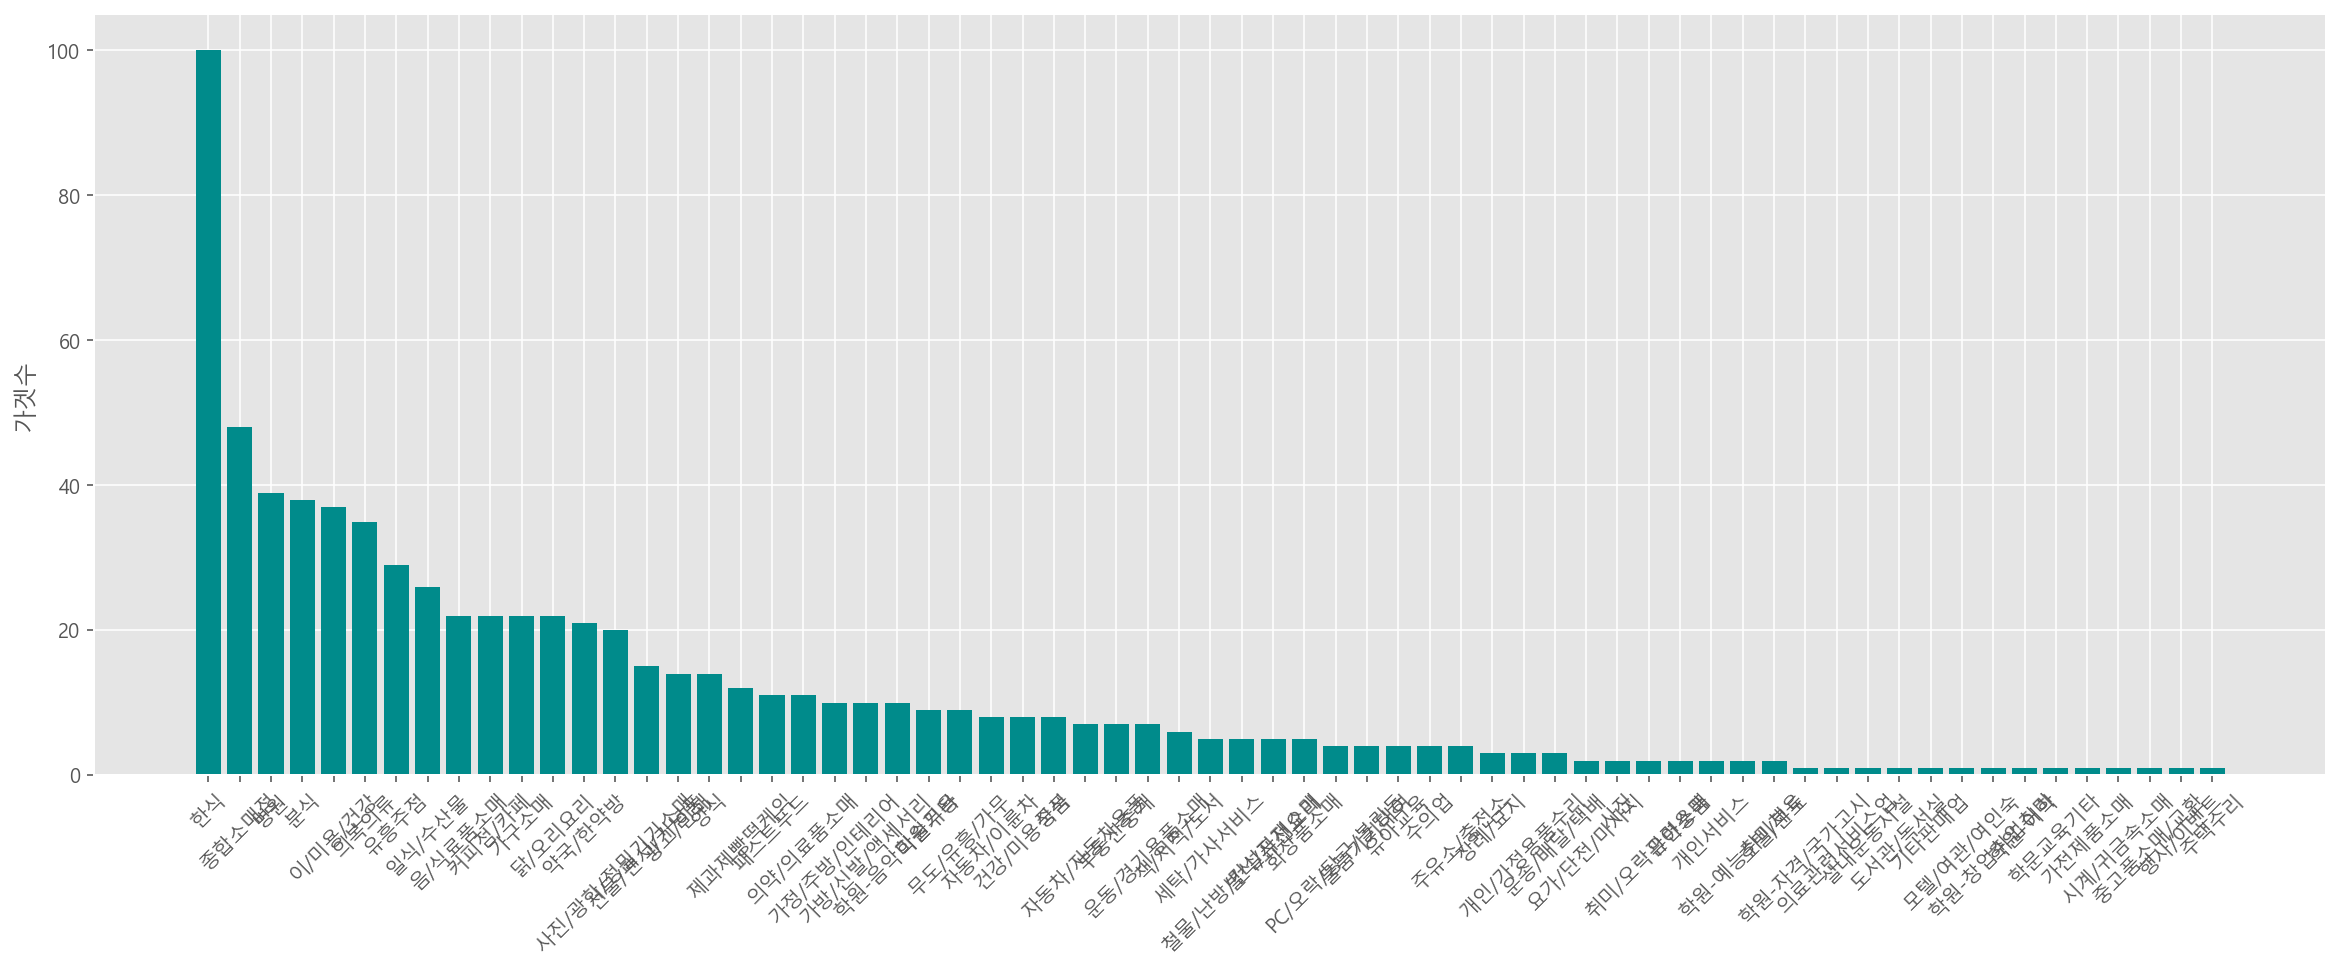

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(df_near_list['상권업종중분류명'], df_near_list['가겟수'], color = 'darkcyan')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('가겟수')     
#plt.axhline(y=job_sido['고용자수'].mean(), color='y', linestyle='--')
plt.show()

In [ ]:
import folium
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACSQAAAPLCAYAAABMtxXXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzde4xnZX3H8c/CZNFWreBC4vqPlypUK39A2zRUWjVYSUzTGPVJo8ZiK5pKxQLS1CuosVFrhGIbaYlmMa1pnkibqPGCeKFovESbtkpqsRrS4A03ClpENgvTP+Y3cbKZgb18Z5+ZfV6vhMxyfud3Pmf3/PvOmR3Ly8sBAAAAAAAAAACocNzoGwAAAAAAAAAAAI4dgiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKLI2+gUktj74BAAAAAAAAAAA4CDsO9QvekAQAAAAAAAAAAJTxhqSBvvOd74y+BY7Arl27kiR79+6dbn/W7dH7s26P3p91e/S+bc98lu3R+7Nuj96fdXv0/qzbo/dte+azbI/en3V79P6s26P3Z90evW/bM59le/T+rNuj92fdHr0/6/bofdue+Szb1Nm9e/dhf9cbkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAyiyNvoFqrbUXJXlH7/2UDT5/cZJXJjk1yR1Jrkvy6t77T47kXAAAAAAAAAAA4Bh6Q1Jr7czW2vVJrk3yCxucc3mS9ya5JcnFST6Q5GVJPt5aWzrccwEAAAAAAAAAgBXHRFjTWrsxyW8n+V6Sf8vKG40OPOe0JK9PckXv/eI1x29O8u4kL0yy51DPBQAAAAAAAAAAfu5YeUPSKUnelJUQ6asbnHN+kn2L89a6Jish0wsO81wAAAAAAAAAAGDhWAmSnth7v6z3/uP7OeecJF/ovd+x9mDv/d4kn05yVmttx2GcCwAAAAAAAAAALOxYXl4efQ+lWmt7kjy39/6QNceOS/LTJO/pvV+wzncuS3J5kt1Jvn+w5/bev/sA9/KV9Y733s9Ikn379h3U34mtaWlp5Tce7t+/f7r9WbdH78+6PXp/1u3R+7Y981m2R+/Puj16f9bt0fuzbo/et+2Zz7I9en/W7dH7s26P3p91e/S+bc98lu3R+7Nuj96fdXv0/qzbo/dte+azbFNn586dq3885Jf2LNXeypZ1YpITsvLr1tZz+5rz9h3CufcbJLH9nHDVVZu+cc+FF276BgAAAAAAAADAKLMESQ9e/Lxng89Xj+88xHPvV+/9zA0+Wk6SvXv3PtAlOAZVPfddu3aVXs/21t+fdXv0/qzbo/dte+azbI/en3V79P6s26P3Z90evW/bM59le/T+rNuj92fdHr0/6/bofdue+Szbo/dn3R69P+v26P1Zt0fv2/bMZ9mmzu7duw/7u8cV3sdWtvoOsI0CrNW46O5DPBcAAAAAAAAAAFhjljck3bn4edIGnz9i8fMH+XlodDDnAgAAAAAAAAAAa0zxhqTe+91JbkvyhA1OOTXJ93vvPzyUc+vvFAAAAAAAAAAAtrcpgqSFm5Kc3Vp70NqDrbXjkzw9yQ2HeS4AAAAAAAAAALAwU5C0J8nDk1x0wPHzkzwqydWHeS4AAAAAAAAAALCwNPoGjpbe+/WtteuSvKW19vgkX0pyepKXJrm69/7ZwzkXAAAAAAAAAAD4uWmCpIXnJ3lDkhct/vytJJckueoIzwUAAAAAAAAAAHIMBkm99/OSnLfBZ/uSvG7x3wNd56DPBQAAAAAAAAAAVhw3+gYAAAAAAAAAAIBjhyAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoIwgCQAAAAAAAAAAKCNIAgAAAAAAAAAAygiSAAAAAAAAAACAMoIkAAAAAAAAAACgjCAJAAAAAAAAAAAoI0gCAAAAAAAAAADKCJIAAAAAAAAAAIAygiQAAAAAAAAAAKCMIAkAAAAAAAAAACgjSAIAAAAAAAAAAMoIkgAAAAAAAAAAgDKCJAAAAAAAAAAAoMzS6Bs42lprS0lemeSPkzwmybeTfDjJG3vvP1rn/N9L8pokpye5O8lHk1zae//eUbtpAAAAAAAAAADYJmZ8Q9K1Sd6R5GtJXpWVGOllSb7YWnvY2hNba+cl+WCS/0tyaZJrkjw7yU2ttV86ivcMAAAAAAAAAADbwlRvSGqtnZ7k+Umu7L1ftOb4Z5L8S5KXJHnn4thJSa5K8s9Jntt7X14c/9ckH0lyUZLLj+LtAwAAAAAAAADAljfbG5J+ZfHzgwcc/3CS+5I8fs2xFyR5aJLXrsZISdJ7/2iSLy8+BwAAAAAAAAAA1pgtSLp58fP0A44/KSv/Fv+55tg5SW7tvX99net8Iskvt9ZOqb9FAAAAAAAAAADYvnYsLy8/8FnHkNba1Vl5u9HFST6V5NQkVyb5cZKn9N5/tjjvliTf6L0/a51r/GGSPUnO6r1//n62vrLe8d77GUmyb9++I/q7UO+Eq67a9I17Lryw5DpLSyu/cXH//v0l17O99fdn3R69P+v26H3bnvks26P3Z90evT/r9uj9WbdH79v2zGfZHr0/6/bo/Vm3R+/Puj1637ZnPsv26P1Zt0fvz7o9en/W7dH7tj3zWbaps3PnztU/7jjU7y7V3sq2cEGSRyf5+zXHvp01MdLCI5PctME1bl/8PLH87gAAAAAAAAAAYBubKkhqrR2fpCf5nSRvS/LlrMRJFye5sbV2du997+L0Bye5Z4NLrR7fucHnSZLe+5kbfLScJHv37t3gY45lVc99165dpdezvfX3Z90evT/r9uh92575LNuj92fdHr0/6/bo/Vm3R+/b9sxn2R69P+v26P1Zt0fvz7o9et+2Zz7L9uj9WbdH78+6PXp/1u3R+7Y981m2qbN79+7D/u5UQVKSVyR5dpKn9d5vXD3YWntfkq8leXeS5y0O78/G/z6rIdLdm3SfAAAAAAAAAACwLR03+gaOsvOTfGZtjJQkvffbk/xtkue01k5eHL4jyUkbXOcRi5+3b/A5AAAAAAAAAABMabYg6XFJbt3gs1uT7Ejy2MX/fyPJEzY499Qk9yW5pfDeAAAAAAAAAABg25stSNqb5PEbfHbamnOS5KYkT2qtrfcL8Z6R5PO997uK7w8AAAAAAAAAALa12YKk65I8pbV27tqDrbXHJPmTJF/tvX9zcfh9i5+XHXDuuUl+M8nVm3yvAAAAAAAAAACw7SyNvoGj7PIk5yT5UGttT5J/T/LoJOcnOT7JS1ZP7L1/vbV2RZJLWmsnJ7k+K7/O7U+TfCTJ+4/mjQMAAAAAAAAAwHYw1RuSeu8/SnJWkiuzEiZdkeS8JB9L8uu99y8d8JVLk1yS5MlJ/jrJc5O8Pcmze+/3HaXbBgAAAAAAAACAbWO2NySl935nVkKjSw/i3OUk71z8BwAAAAAAAAAAPICp3pAEAAAAAAAAAABsLkESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQJml0TcwUmvthUlenuRJWfm3+GaS83vvX1xzzouTvDLJqUnuSHJdklf33n9y9O8YAAAAAAAAAAC2tmnfkNRauybJtUluS/LaJH+R5HNJHrbmnMuTvDfJLUkuTvKBJC9L8vHW2tQxFwAAAAAAAAAArGfKqKa19tIkL0ryrN77xzY457Qkr09yRe/94jXHb07y7iQvTLJn8+8WAAAAAAAAAAC2j+nekNRaOyHJm5L81UYx0sL5SfYtzl3rmiTfS/KCzblDAAAAAAAAAADYvqYLkpKcm+TkJH+TrARKrbWHrHPeOUm+0Hu/Y+3B3vu9ST6d5KzW2o7NvlkAAAAAAAAAANhOdiwvL4++h6OqtfauJM9I8swk703ytCQ7ktyc5FW994+11o5L8tMk7+m9X7DONS5LcnmS3b33797P1lfWO957PyNJ9u3bd2R/GcqdcNVVm75xz4UXllxnaWnlNy7u37+/5Hq2t/7+rNuj92fdHr1v2zOfZXv0/qzbo/dn3R69P+v26H3bnvks26P3Z90evT/r9uj9WbdH79v2zGfZHr0/6/bo/Vm3R+/Puj1637ZnPss2dXbu3Ln6x0N+Yc+Mb0j61SR7k3wiye1Z+dVrf5bkYUk+1Fp7apITk5yQlV/Ntp7bFz9P3NQ7BQAAAAAAAACAbWZp9A0McHKSJyZ5R+/9z1cPttZ6kluSvC3JcxaH79ngGqvHd27weZKk937mBh8tJ8nevXsP8pY5llQ99127dpVez/bW3591e/T+rNuj92175rNsj96fdXv0/qzbo/dn3R69b9szn2V79P6s26P3Z90evT/r9uh92575LNuj92fdHr0/6/bo/Vm3R+/b9sxn2abO7t27D/u7M74h6UFJ7k3yxrUHF7967R+T/EYWwVA2DrZWQ6S7N+MGAQAAAAAAAABgu5oxSLoryf/23u9a57P/Wvw86YCfB3rE4ucPKm8MAAAAAAAAAAC2uxmDpFuz8mvb1rP6RqSfJbktyRM2OO/UJN/vvf+w9tYAAAAAAAAAAGB7mzFI+lySh7bWzlzns19L8pMk30pyU5KzW2sPWntCa+34JE9PcsNm3ygAAAAAAAAAAGw3MwZJ709yT5I3t9Z2rB5srZ2e5HlJru2935tkT5KHJ7nogO+fn+RRSa4+KncLAAAAAAAAAADbyNIDn3Js6b3f1lp7Q5K3JflUa60nOSXJhUn+J8nrFudd31q7LslbWmuPT/KlJKcneWmSq3vvnx3yFwAAAAAAAAAAgC1sxjckpff+9iQvTnJikiuSvDzJB5I8pfd+55pTn5/kL5Ock+TKJE9NcsnifAAAAAAAAAAA4ADTvSFpVe99T1Z+Ldv9nbMvK29Met1RuCUAAAAAAAAAANj2pnxDEgAAAAAAAAAAsDkESQAAAAAAAAAAQBlBEgAAAAAAAAAAUEaQBAAAAAAAAAAAlBEkAQAAAAAAAAAAZQRJAAAAAAAAAABAGUESAAAAAAAAAABQRpAEAAAAAAAAAACUESQBAAAAAAAAAABlBEkAAAAAAAAAAEAZQRIAAAAAAAAAAFBGkAQAAAAAAAAAAJQRJAEAAAAAAAAAAGUESQAAAAAAAAAAQJmjEiS11s5prb3maGwBAAAAAAAAAADjbEqQ1Fr73QMOPSvJmzdjCwAAAAAAAAAA2Do26w1J/9Rae/0mXRsAAAAAAAAAANiiyoOk1tpjkzw8yV3V1wYAAAAAAAAAALa2zXhD0rlJlpN8chOuDQAAAAAAAAAAbGGbEST9UZL/7r3/xyZcGwAAAAAAAAAA2MKWKi/WWntmkjOSXFB5XQAAAAAAAAAAYHsoe0NSa+0Xk7wrybeSXFN1XQAAAAAAAAAAYPsoeUNSa+34JP+Q5HFJntl7319xXQAAAAAAAAAAYHs54jcktdaenOSGJL+f5K299xuO+K4AAAAAAAAAAIBt6bDfkNRauzHJaUl2JVlO8vbe+2vv5ys7Wmu3PMBll3vvpx7uPQEAAAAAAAAAAGMdya9se2iShyTZkeS+JD8+yO8AAAAAAAAAAADHqMMOknrvZyRJa+3sJO9M8ubW2n2997du8JXl3vsjD3cPAAAAAAAAAADY+o470gv03m9KcnaST2YlSvqtI74rAAAAAAAAAABgWzriIClJeu8/S/K8JLcl+bvW2o6K6wIAAAAAAAAAANtLSZCUJL33O5O8IskTk/xB1XUBAP6fvfuPtTyv7zr+mvG6yK4VWbY/2BsBW1JaatEA/YUKKCKIIYa0foQDCK3WuJUuELotVIQSrYYVunYVFlKQDS0H+sZghe2ikCbI+qMakCabWFqSLm1zWX6sQEkp7rLs+MfcMdPpvbMz976/93vufB+PZHOGc77nvD6zZ/988j0AAAAAAADA8dEWJCVJVd2S5CNJXtn5uQAAAAAAAAAAwPHQGiTtuinJt40xvnuCzwYAAAAAAAAAADbYFEHS+5KcSvK0CT4bAAAAAAAAAADYYO1BUlXdleQTSR7W/dkAAAAAAAAAAMBm25roc1+S5IMTfTYAAAAAAAAAALChJgmSquo/nfPUf0zyxSm2AAAAAAAAAACAzTHVHZL+kN1A6dxICQAAAAAAAAAAuMScnPsAAAAAAAAAAADApUOQBAAAAAAAAAAAtDmSn2y7P2OMv5Dk+iQvrKpPzX0eAAAAAAAAAADgYA4UJI0xXpnkrx7graeq6il7PP/EJE9J8pgkgiQAAAAAAAAAADimDnqHpO9I8uQDvO/UPs8/P8nnk/zKAc8DAAAAAAAAAABsgAMFSVX1nCTP6TjAGOOvJ3lckp+uqq92fCYAAAAAAAAAADCPk3OOjzEuT/Kvknw2yevmPAsAAAAAAAAAAHB4B7pD0hjj4UlefZFv+0BVveuc534uyaOSPLuqfu8gZwEAAAAAAAAAADbHgYKkJFcleeE+r51KcmKP57+Y5F1JMsb4Y0luyumffbupqt59wHMAAAAAAAAAAAAb5KBB0q8leegezz8xyS/mdGj0oXNe+/LuT7Q9Kclrkjw+SSV50QHPAAAAAAAAAAAAbJgDBUlV9bUknzn3+THG53P6DklfqKrPnPPa9+d0gJTda16V5Ker6tRBzgAAAAAAAAAAAGyeg94h6czPrn1bkjur6vNnvbTXz7UlyeeSfCzJo5P8iSR/Jclbknz6oGcAAAAAAAAAAAA2y8lDvPdPJ7k9yefGGL87xnh7ku9M8vYkO+deXFUfrqrHJ9lO8rNJnpzkV8cYDzvEGQAAAAAAAAAAgA1ymCDpjN9IcneS5yV5fZLHJ/nG/S6uqi9U1UuTPD+n46RbxxhXNJwDAAAAAAAAAACYWUeQ9NO7iXAAACAASURBVJaqemRO/xTbjUm+JckHxxg/O8bY9/Orap3k2t333dBwDgAAAAAAAAAAYGYdQVKSpKo+vnvno29P8t+S/GiSXx5j/PHzvOemJP8+yd8bY3x311kAAAAAAAAAAIB5tAVJZ1TVJ5M8KcmbkzwtyS+OMU6c5y0vS3Jvkld3nwUAAAAAAAAAADha7UFSklTVfVV1TZI3JvlbSV51nms/meR9SZ42xvgzU5wHAAAAAAAAAAA4GpMESWe5NsmHkrxyjPGE81z37t2zPGbi8wAAAAAAAAAAABOaNEiqqvuS/FCSu5O84Tw/3fbhJD9QVb885XkAAAAAAAAAAIBpHSZIujvJf0jyifNdVFW/neRnkvz5JH9jn2vurKr3HOIsAAAAAAAAAADABtg66Bur6veTPOsCL//XSS6vqlsPugcAAAAAAAAAAGy+AwdJF6OqPpfkx45iCwAAAAAAAAAAmM9kQdIY44okD09yR1V9ZaodAAAAAAAAAABgc5yc8LOfnOT2JN834QYAAAAAAAAAALBBpgySkuTExJ8PAAAAAAAAAABskKmDpFMTfz4AAAAAAAAAALBBtg7ypjHGg5N83f1c9g1nHscYD7vQz66q3znImQAAAAAAAAAAgPkdKEhKcn2SH7qA604kecdFfO6pHPxMAAAAAAAAAADAzA4a//zXQ7wXAAAAAAAAAAC4RB0oKqqqm5Pc3HoSAAAAAAAAAADg2Ds59wEAAAAAAAAAAIBLhyAJAAAAAAAAAABoc6CfbDtjjPGMJN+c5M4kH6uq32o5FQAAAAAAAAAAcCwdKkhK8swk/+DM/xhjfCbJe5K8tao+dsjPBgAAAAAAAAAAjpmOn2z7apIfS/ILu3/+kSQfGWO8f4zx6IbPBwAAAAAAAAAAjomOIOm+qrqhql5QVQ9P8qQk703ytCS/Nsb4Jw0bAAAAAAAAAADAMdARJP0hVXVbVT0ryROS3JHkp8YYt4wxLu/eAgAAAAAAAAAANkt7kHRGVf1qkscmeXeSZyS5VZQEAAAAAAAAAACXtsmCpCSpqi9X1bOTvCnJE5P80hjjxJSbAAAAAAAAAADAfLaOYqSqfmSMcUWS5yV5bZIfP4pdOE621+vJN3ZWq8k3AAAAAAAAAIBlm/QOSef4+0n+R5KXjTGecYS7AAAAAAAAAADAETmyIKmqvprkBUn+b5I3jjEuP6ptAAAAAAAAAADgaBw2SDqx+88FqapPJLk+ycOSXHPIbQAAAAAAAAAAYMMcNki6JskVF/meG5K8M8m/OeQ2AAAAAAAAAACwYbYO8+aqOpXk1EW+50tJnnuYXQAAAAAAAAAAYDMd9g5JAAAAAAAAAAAA/58gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGizNfcBNsEY4zVJXpXkuqp63VnPn0zy0iQ/nOQRST6d5OeT/NOqumeGowIAAAAAAAAAwEZb/B2SxhgPTvLifV7+t0muT3JbTodJ/znJK5O842hOBwAAAAAAAAAAx4s7JCWvSHLvuU+OMZ6a5AVJXlxVN+4+fdMY484kPzHGeHJVfejojgkAAAAAAAAAAJtv0XdIGmP8uSQvSfKTe7z8D5N8Kskbznn+tUnuSfLcaU8HAAAAAAAAAADHz2KDpDHGiSRvSvLeJB/Y45KnJPlAVX3t7Cer6gtJPprkL05+SAAAAAAAAAAAOGZOnDp1au4zzGKMcV2SVyd5dE6HWXckua6qXjfGuDrJTpIfr6p/ucd735bkOUkeWFX7/gscY3x0r+er6rFJcs899xz670GvB9x44/1fdEh3X3vtxm1frK2t07/2eO+9f+TXDic35/bc+0vdnnt/qdtz79v2nS9le+79pW7Pvb/U7bn3l7o9975t3/lStufeX+r23PtL3Z57f6nbc+/b9p0vZXvu/aVuz72/1O2595e6Pfe+bd/5Urbpc9lll53544mLfe8i75A0xnhskn+W5MVV9Tt7XPLQ3cdP7/MRn03ygCQPnOB4AAAAAAAAAABwbG3NfYCjNsb4U0nemeSWqnrrPpedCY3u3uf1M89fluQP9tuqqsft89KpJLnrrrvOf1guSXN+713bV111VevnHZftufeXuj33/lK359637Ttfyvbc+0vdnnt/qdtz7y91e+59277zpWzPvb/U7bn3l7o99/5St+fet+07X8r23PtL3Z57f6nbc+8vdXvufdu+86Vs0+fqq68+8HsXdYekMcaJJL+Q5PIkP3yeS8/cM2y/YOvMPam+0nQ0AAAAAAAAAAC4JCztDkmvSfLMJM9PcuUY48rd57d3Hx8yxnhkkt/b/d9XZm8PSfKlqtrvDkoAAAAAAAAAALBISwuS/u7u48/v8/rLd/95epKvJfnWfa57VJJf7z0aAAAAAAAAAAAcf0sLkq5JcsUez399kjcmeXuS9yX5X0n+Z5KnnnvhGONBSb4ryeunOyYAAAAAAAAAABxPiwqSqur9ez0/xnjE7h9vr6p/t/vczUnePMZ4TlW986zLX5HT/97eOuFRAQAAAAAAAADgWFpUkHSR3pbkhUluHmN8T5KPJ/nLSVZJXl5Vd8x4NgAAAAAAAAAA2EiCpH1U1VfHGE9P8i+SPDvJg5L8epLnVdU7Zj0cNNter49kZ2e1OpIdAAAAAAAAAGA+gqQkVfXJJCf2eP5LSf7R7j8AAAAAAAAAAMD9ODn3AQAAAAAAAAAAgEuHIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoM3W3AcA2F6vJ9/YWa0m3wAAAAAAAAAA3CEJAAAAAAAAAABoJEgCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANpszX0AgDltr9eTb+ysVpNvAAAAAAAAAMCmcIckAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoszX3AQCWanu9nnxjZ7WafAMAAAAAAAAAzuYOSQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQZmvuAwAwj+31evKNndVq8g0AAAAAAAAANos7JAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABttuY+AADLs71eT76xs1pNvgEAAAAAAADAH+UOSQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbbbmPgAAHKXt9XryjZ3VaiP3l7oNAAAAAAAAHC13SAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANltzH+CojTG+J8krkvylJF+X5I4kb03y+qq675xrn5nkJ5M8JslXkrw/yXVV9ekjPTQAcCjb6/XkGzur1eQbAAAAAAAAcBws6g5JY4wnJPkvSb4pyWuTvDzJnUmuT/KWc659YZL3Jvn9JNcl+bkkz0py2xjjQUd3agAAAAAAAAAAOD6Wdoekb0zyo1X1prOeu2GM8a4kPzjGuKGqbh9jXJnkxiTvSfIDVXUqScYYH05ya5KXJvmpoz06AAAAAAAAAABsvkXdISnJe8+Jkc54w+7j9+0+Pjenf87tH5+JkZKkqt6f5CO7rwMAAAAAAAAAAOdYVJBUVV/b56Uv7D6eiY/+WpJPVtXH97j2g0keOcb4hu7zAQAAAAAAAADAcbeoIOk8Hrv7+Ju7j9+e5H/vc+1v7D5+y6QnAgAAAAAAAACAY2hr7gPMbYxxRZKfSPJbSW7bffqhZ/35XJ/dfXzwBXz2R/d6vqqSJFddddXFHJVLxJzf+9z/zS31777U7bn3l7o99/5St7v2t7a22j7ruO0vdXvu/aVuz72/1O2595e6Pfe+bd/5Urbn3l/q9tz7S92ee3+p23Pv2/adL2V77v2lbs+9v9TtufeXuj33vm3f+VK22QyLDpLGGH8yybuTfGuSp1fVfbsvPTDJ3fu87czzl018PADgEvCAG2+cfOPua6+dfAMAAAAAAAAu1GKDpDHGo5K8J8kjkvztqvqVs16+N/v/uzkTIn3l/jaq6nH7vHQqSe66664LOiuXljm/97n/m1vq332p23PvL3V77v2lbs+937V95v+lMMffZanbc+8vdXvu/aVuz72/1O259237zpeyPff+Urfn3l/q9tz7S92ee9+273wp23PvL3V77v2lbs+9v9Ttufdt+86Xsk2fq6+++sDvPdl4jmNjjPH9ST6S5ESS762qXzrnki8muXKftz9k9/Gz+7wOAAAAAAAAAACLtbggaYzxg0kqyfuSPL6qbt/jsk/k9M+47eVRSe5L8pvTnBAAAAAAAAAAAI6vRQVJY4zvTPLmJDcneW5V/cE+l96W5DvGGHvde+qpSf57VX15mlMCAAAAAAAAAMDxtaggKclLknw5yYuq6tR5rnv77uOrz35yjPH0JN+b5E3THA8AAAAAAAAAAI63rbkPcMQel+T/JPk7Y4y9Xr+rqm6pqo+PMW5I8rIxxtcn+UCSb07yoiS3Jlkf1YEBAAAAAAAAAOA4WVqQ9KAkj0jytn1e/2iSW3b/fF2STyW5JsnfTLKT5Pok/7yq7pv2mAAAAAAAAAAAcDwtKkiqqj97EdeeSvIzu/8AAAAAAAAAAAAX4OTcBwAAAAAAAAAAAC4dgiQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGizNfcBAACYxvZ6PfnGzmo1+QYAAAAAAADHizskAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBma+4DAABwadperyff2FmtNm4bAAAAAABg6dwhCQAAAAAAAAAAaCNIAgAAAAAAAAAA2giSAAAAAAAAAACANoIkAAAAAAAAAACgjSAJAAAAAAAAAABoI0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaLM19wEAAOBSsr1eT76xs1pNvgEAAAAAAHBQ7pAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG225j4AAADQY3u9PpKdndVqtv39tgEAAAAAgM3hDkkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtNma+wAAAACHtb1eT76xs1pt3PYm7AMAAAAAwLncIQkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDaCJAAAAAAAAAAAoI0gCQAAAAAAAAAAaCNIAgAAAAAAAAAA2mzNfQAAAACOp+31evKNndVq47YBAAAAADg/d0gCAAAAAAAAAADaCJIAAAAAAAAAAIA2giQAAAAAAAAAAKCNIAkAAAAAAAAAAGgjSAIAAAAAAAAAANoIkgAAAAAAAAAAgDZbcx8AAAAAjpvt9XryjZ3VyjYAAAAAcCy5QxIAAAAAAAAAANBGkAQAAAAAAAAAALQRJAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtNma+wAAAAAAF2J7vZ58Y2e1sg0AAAAAh+QOSQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQRpAEAAAAAAAAAAC02Zr7AAAAAABsru31evKNndVq8g0AAAAAjo47JAEAAAAAAAAAAG0ESQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAm625DwAAAAAAe9leryff2FmtNm577v25/+4AAADA8ecOSQAAAAAAAAAAQBtBEgAAAAAAAAAA0EaQBAAAAAAAAAAAtBEkAQAAAAAAAAAAbQRJAAAAAAAAAABAG0ESAAAAAAAAAADQZmvuAwAAAAAAJMn2ej35xs5qtXHbc+8vdRsAAIDpuEMSAAAAAAAAAADQRpAEAAAAAAAAAAC0ESQBAAAAAAAAAABtBEkAAAAAAAAAAEAbQRIAAAAAAAAAANBGkAQAAPD/2DvvMKuqqw+/VDuKvcYWxaiJvWGL2I2iUVkq2HtBRUBQUAFRQRQExd6INS5Fxd4gVjSWRL9EjZrYEjX2HooC3x+/fbhnLsMwM9yZe2dmvc/DA9xyzr7n7LP3Kr+9dhAEQRAEQRAEQRAEQRAEQRAEJaNtuRsQBEEQBEEQBEEQBEEQBEEQBOVgpdtua/BzfNS9e5w7CIIgCIIgCIIWR1RICoIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIKgZIQgKQiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCkhGCpCAIgiAIgiAIgiAIgiAIgiAIgiAIgiAIgiAISkYIkoIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgKBkhSAqCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCoGSEICkIgiAIgiAIgiAIgiAIgiAIgiAIgiAIgiAIgpIRgqQgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCEpG23I3IAiCIAiCIAiCIAiCIAiCIAiClsNKt93W4Of4qHv3OHcFnb+lnrsSzh8EQRAEQVAuokJSEARBEARBEARBEARBEARBEARBEARBEARBEAQlIwRJQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRCUjBAkBUEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEFQMkKQFARBEARBEARBEARBEARBEARBEARBEARBEARByQhBUhAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEJSMESUEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQlIy25W5AU8DMjgBOBToB3wDjgTPd/fuyNiwIgiAIgiAIgiAIgiAIgiAIgiAIqmGl225r8HN81L17izx3uc8f566s87fUc5f7/C313OU+f7l/e9C0iApJ88DMBgM3AG8DvYG7gOOAR80sBF1BEARBEARBEARBEARBEARBEARBEARBEARBkCMENTVgZusAZwOXuHvv3OuvA1cCBwPjytO6IAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIKg8okJSzRwDTAfOLXr9WuC/QI9Gb1EQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQVDAhSKqZnYAX3P2b/IvuPgP4E9DZzFqVpWVBEARBEARBEARBEARBEARBEARBEARBEARBUIGEIGkumFlroBPwxlw+8hawMLB8ozUqCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCCqcVrNmzSp3GyoSM1sK+AI4x92HVvP+CcAVwHruXq1oycxeqe51d9+4lG0NgiAIgiAIgiAIgiAIgiAIgiAIgiAIgiAIggaizruHRYWkubNQ+nvaXN7PXm/fCG0JgiAIgiAIgiAIgiAIgiAIgiAIgiAIgiAIgiZB23I3oIL5Of09t2uUCZGmzO0A7r5JSVsUVBRZBaxy3edynr+lnrvc52+p5y73+Vvquct9/jh33POWcu5yn7+lnrvc52+p5y73+Vvquct9/jh33POWcu5yn7+lnrvc52+p5y73+Vvquct9/jh33POWcu5yn7+lnrvc52+p5y73+Vvquct9/jh33POWcu6gMogKSXPn2/T3knN5f6n09+eN0JYgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgaBKEIGkuuPsU4D/A2nP5SCfgU3f/qvFaFQRBEARBEARBEARBEARBEARBEARBEARBEASVTQiSauYZYFszWzD/opm1AboAT5SlVUEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEFQoYQgqWbGAUsApxW9fgywEnBVYzcoCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCCqZtuVuQCXj7o+Z2XjgfDNbC3gR+A1wLHCVuz9b1gYGQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQYXRatasWeVuQ0VjZu2Bc4BDgWWBd4GrgUvdPS5eEARBEARBEARBEARBEARBEARBEARBEARBEOQIQVIQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBCWjdbkbEARBEARBEARBEARBEARBEARBEARBEARBEARB8yEESUEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQlIwQzApqZwAAIABJREFUJAVBEARBEARBEARBEARBEARBEARBEARBEARBUDJCkBQEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQckIQVIQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBCUjBElBEARBEARBEARBEARBEARBEARBEARBEARBEJSMECQFQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQVAyQpAUBEGNmFmrcrchCIIgCIIgCIIgCIIgCILmQcQbgyBojsTYFpQDM4tcfxAEFU0MUkFQQsysffq7yT9bZraQmbV291mVbkg3p+s+Lyr9XsyL7F6lfzfp31IuzKxDAx9/qYY8fhDUFjNbKf09X2OFmS1Yz++1n/enWhYtedw2szXK3YagKi25P5aCcl6/lmS7l5qW1u/NbIf69BMz26Ah2hPUjVLZckXH3N7M1izV8ZoTlT6mZvetpY1jdaWlXB8zW6gh4o2Nef0yP7M2z15Lua81Ud85PQiaGmlsm6++Xu4xo6GfVTNr05DHb2mY2XLuPrMpjrFm1rbM51+onOefFxGLrJlyj5VB3WhyA1QQVCpmZsB1ZtaxqRoAGWa2CHADMLouoqRy/ObmdN1rIjOOSuHUlAszWxS4ysyOgdm/paKNhkprn5ndD9xpZks30PEfA0aa2YolPu6+KXnQJPtuYxJOuTCza4B/mdkvazNWzK1vpWfmmDSv1eX8s+eWunyvOWJmx5jZAGga43ZDYGbXAy+Z2W/K3ZaaMLPDs+Rvcz+3mf0qs4libqk7yW4ui02ZG1/Xbs62e6kxsy2z5G017/Uwsz2a27VMc89E/bP2c4+Z3Qr8wcx+21BtC+ZN3pZL/59v+yEd60/AeWa22vwer6kxt2toZruaWac0plaknWZmewLvmNkB1Y1jAZjZXmbWtiXY22Z2GzDIzBYr1e81s7FmtnRjXT8zOxK43cyWqsmeMbOdGkp81ZSo75welI7mZifWBTObaGY9G+E8J5rZwwD19XPMbE8zW6OcY4aZLQ4MNbNtGuDYB5hZO3efEfHP0pBs7vfMbNXU75rEQmMzGwTg7j+Xqy+Y2dHARWa2QjnOPy/KFYs0s45pPFu4Mc9bFzIfs6XbV02NFmuIBEEDsCOwE3B+MxDHtAY6ALsB585LlGRmR5pZlzL95uZ03avFzBYDbjCzc2C2U7NA0WfqEqRfKP3d2NfpF8BWwAlmdjBUrtFgZp1A7St3W4qYgK7hpQ0kSpoMHAycXipRUnJkr0l/tqzU59PMrjKzo8p07sPN7AKA5JTXq6JPM8OBfwCPmdlacxsrzKyVmfUGfjuX4ywMnA8cUEdRUpW5pW5Nbz6YKrJ1QYm/02D+x+1KHPNrwdXAx8BtlSpKMol9bwCOM7Plm/O5zWwk8LqZHejuMxv6fA2NmbUxs2Ua8XzjgLusfKsodwT2Be4ws2Wbo+1eStI8dx0wGpijcl+y608Gbge6NLNreT3wR+A64MA6zB8PI192oJnt0FCNC+aJAx8CjwG1EpjXhJm1cfd/AkcD+wBDzGz10jS1sknjwEBgDl/FzNZHz8oVVkshf/GxS9jUmvgUeAS40cy6NdI5mwxmNgq4FS2kaFOpcZISsgJwEHByKURJZrYlcDzwgJkt2UjXb11gU7SQs1pRkpmNQWPgfma2YAu4rzVxPWkMoG5zelBP0tyxQea/Nge/qT6Y2SrAVBRHPaIBz9Me6AjsZGYOdRclmdkWyO4dZWarlXHM2AI4E+htZpuX6qBmti4aC14MUVJJmQi8BUwyszuAW1O/BypTjGhm+yNh8p0wOxZejr6wInAi0Kux42i1pFyxyJ2AscBgK2EFqVKNZ2a2F/ComR0OlZtfDOak4gajIGjCnIgCprsBw5uqOMbMWrn798AhwIvAASgRWW1QxMyWBU4AnjCzbcvwm5vFdZ8HHZGB1D0l3nH3aTC78kzb2gpnzGw74G4z26ixr5O7vwEcAfwP6FupoiTTapZbSul0zS9mtnUKYF2HAm17A5eVSpRkZmeb2RLuPhg4AzgV6De/oiQzW9jdvwW2BVoBVwJbVdrzaWYrA78HTjSzgxr53AugpNnRZvYHAHefmt7rZxIkthjM7KDU159ACdYfgMerEyUlZ3UscDHwftFxtgdw9x1RYvIyFPisrShpjrll/n5Z08TdvwMGo6DYSDPrk16va7JrITPbKvtuQ7S1ITCzA5No40XgUOQ7/bESRUnufi1wEXAW0LMxgymNeW4zOxvYBs0pt5vZc8AypkpJTS6YmdrcHxhjZus10mm/BFZCdkSjipJM5dinIrHo0mjlbXO03UtC6h8XAQcCh7r7t0Xz4GLuPgXZMH9Gyeydmvq1NLP+ZvYbd/8UOAV4ACUvapXAdPdbgL7A2oQoqdHJbDngMCSia8VcbLk6HHMv4LDkW9wAHAf0QEHyZi1KStfrcuAcVB2qCu7+d2AMsCxKtmaipFqNA+mzi5vZsma2ZDpnyccQd38JGAQ8iJIqe5f6HE2cYcArQC8k8G6WoqRc3+qC4o0nAKfY/IuSXkZCxRVRgqoxREn9gHFowdhlVo0oyd1PBZ4DRgHdWqIoKZvTgfWB7YC/UYc5PagfZnYWcB/wF+AFM3vMzH5hZhtaC6sg6e7/BvogO/l6ayBRkrtPB64ABgC7mtnd6fVa+znu/mfgKmAdYISVSZTk7o+h+MdWwIASxsffBXoDywDPhihp/sj6hbvfgWysH4HtKcxLq6Q838z0+bJujVbERPRcdjGz8TBblLRAzV8rDenatHH3c1E85nSUq6oIUVIFxCIfAk5Lf4bafBQ3MFWKvBpKGg/+GvgKxR8rMr8YVE+TDlQFQaWQJrAZKPB5H7AzTVAcY7ltANz9K3c/GHgbBROHVBcUcffP0OQ0CZhoZts31m9uLte9JpLh+CFwLPAmqi50UnrvCWQwrVbLY3UB7kXG6bVmtkFjlHU3rRIBwN1fAI4EZgL9zaxHer0ijAYz+yuwCbA4CnBvkXuvXKVye6HnKwtg3QYcA3SlBKKk5FgeDjxlEiVdjIJrpzAfoiQz2w8428xWd/c3U3s7IAe9YkRJ6Rn7DwqOtUW/udFESUlceCtwLUoiXpPa9SSqIFER16kxMLNd0bU4N81HzwAnAd9RlMhK/edCtEp+fXd/N3NczexM4HJTGX3c/QDkTF2KAp+LzqMdc51bGuJ3Vyq54MZbSPR1IyplXCdRUrredyNxc5Ppz2a2B3Ab0MdUxeWvKPkJFSZKygJ47t4fGImCoD2tEcpO13DukgdyzOxxVF3nEWT/vIOCbX9w95lZAMvMfpv1tUoObqbn5zLgPGBPtAJ13QY8X2sAd++D+vbGwFgriJLaNdS50/lbobGkJ7AfMJ5maLuXinS9LkHJ6THu/nZ6q016vwfaCnl9d/8ELSb5G3AzTViUZCq9PhTNN7929y9Qn7mPWiQwc3PX3SjIvRZwloUoqVHI23KoatfPwLfALOZPlHQMEmwcYhIl3YQWunSnGVdKStdpLLI/NnL3f+XnNVOFvTbufhESj6+NBK5r1mZMNW31NhpVJf0/lBzcshQxAitaRJDa+RIwBJgC3GNm+87POZoLporkn6O58VOasSgp9a1sQZ0hMe3x1FOUZGY3m1k/FF96GPmOy9MAoqTsOGa2pJmtnBK8g4A7gM0pEiXlbORtkc3a4kRJuTn9OmT3XQXsQdGc3lRtlkrFzB5Dor9XgF3QgsNNkYDuKWQbFX+nYn2m+SFnF/4DuAD5QCUVJeXGhlbu/jV61gcB+5jZLen8tZmTszFjMBpXOgMXWiOLknI+4y0oNlwSUVKa66aie3A6sDLKIzVpUVLxfbFGFP0UiTvuB84GPkN2VhckaP9FatcxwJ0N7fPXhtQXvkZj0gVUFSVNM7NFzKyXqQpoQ5x/F7QDheXs6AFILNenIWJZdWxf2WKRWf919x/dfQxatN4LiZIWzeJG6RrW5ng7oFzkj6Vsp7s/i2IEU6ngogfBnITBFwQlIDOckkPamyYojjGthrvCzC7JJXFWQc58GzTxDc0MRKsqSnoWBZYmo0Bjo4iSmsN1nxc5gdhbqFzq68CpZvY28BtgOPDRvI5jEiPdj0o9dkHB4QfNbJWGrFaR+tVoMzss9/IPwEJodX6/SjEazOwvyGhfAW3xtBYqH5o5XWXpS+4+GiVfx6qZs0VJxwF7ocDXsvNxileAgUgs9KSVTpS0DkoE9UwO9D+A3akwUVLqd23SM2aUR5T0JQpa3AjsZWZfAksCu7kqTLUI3P1R1Gf6oORSJko6Ba1+eDwFNUFJ/JNQUHPvFNielt77HPgC9b1MlNQNiZLGMI/t2+Y1t5T2V1cWRXP7rNy/3wZGUEdRkkmMdCfQCdjLm1CZeHd/CM27fZGDmwUCDkFJj9vNbINytjEjH8Bz99MpCINOsgYWJXlum8mic5dUEGVmLwOLpmNfkOapE1D56p3NbIfUF89BgbfD0rgwo1RtKCVWSDIfguyOnmhO72cNJErKkoDp3+cCNwEbIlHSiu7+U2rbQFNFzZKR+73HoKDWScCTFMbX+8xs/1wSr0bhaHPHChVRjkDVj9ZKzwDu/rNpG+fuaLubwWa2G5r7egB/pyBKanLBONeWXF1QEmakFURJp6Jk5vUooVttsD8nXG7l7neha7geSqR0aZxfMXfy9kc1CYzWuX+XrDR+Y1Jky/0W+SuLA98DM0i2XG38vqL390Z9+xwkSlrE3W9G9/cgtAjil9UcpsmSGzcPBbZy9zesIJrHzLqiOE1mr72I/KxtkH/4y5riIWZ2IhLrd0CJ02HANLSl50rzGyNI93hhU7XXxXPz8Si02OAFtHXnfrnf2ySpbdur+5xJhDMTtCgQjfn/pRmKklKCsXWaxzJRUjfqKUpKtu9nKHbTCz0LD6FKtyugrb9LIkpKc8osUzXL54CtTUn0mSgBXEWUBCxCbptVd98aLfZsUaKkNKf3BTZD1fLeSHN6b3JzOo0ca6tm/q32PjTF+2NmL6H+1xMY5u4T0dbak9Di1Jtc1W2zz/+2kn2m+aUopvEmGi9KKkrKxe2zv2egim3foNhTJrSoMUeRm99bAa8CCwA7oEpJqzfWmJEXJSdbqy/1FCUVxZeyue4Hd78dVTfZBnjazNo3BVGS5ar3mFnbbI5O/1/RzAYB+zdSW5ZMMZBsbp0FPIG2+f4M7U6xPTDMzE5FNt+HqFJx2Uh24TomccvXSLA6FImS7kgfOxHFC7o1UJ9/GT1f56RztHH34Sg30gfF/xp8cd/cKFcsMs0FP5vZCmZ2rynXdGlqRy80BixOocL3PvM4XpaLHOvuvUvdXldFub4ozxiipCZCq1mzmsyuCUFQ8WQBomRgjkIVQR4HznD3r5OBUHHJuJRgHYOqcezs7s8nR/s6lNS9Ba3c3gptYTMIaAdkCahv0nG2Q6shO6fjPNUYv7mpXvd5YWZ7Am3cfULutXWQCGlH4G53Pyy93tbdf57LcTID4Ep372tSw/8b+CuwZ0M5npbESGilXxd3/7NJ3X4dWvn3NHLSFgMucvdbG6IdtWzrX5Gqem9X1S9MgpRByIk8IjmvWfD2XXd/pBHatZxruwrM7H7kTPQExrv7j2Z2KFpRcB1wVtb2Ohx/dZQg+BJtB3J++v/27v6NmfVFIoRLgRHu/vE8jtcq7/CbWRYcvBq41N3fN7O1UaDwaxSImlyu4IeZLeCF7Q+zcaQTcBcS7Y1IjnJDnHt7lFwYnnttKVRx7nDg+SSiqfH5bi6Yts37yt3/ZxK7jEDChiGpr3dBQctPUNnxvVHwYjk0L93v7oeZ2RCUkD0ROUmrAI+7+0kpuHEbSvqfhMbQuQq+5jW3NMBlqAiS470FShx+lpy87L1OSKx4BNAviULmePbTa4uiZ2kt4Nfp3jaJvmxmqwIfJkf2TDQ2jgRGufsnKRD3GKpceLy7v1aGNlZ3zdu7SsVjZoNRgGUocK2rElwpz780qix3XwpaLOiF7SYvRKseh6Hgwyfzea4nkBjpXrTN14jcXH0vWvk7Nb2/OhJm7A+c5lrVVVFY1SRzZ3f/W3r9NBR4uh/1tddLfN7WyI7YFFXcmZ6Cpgcjm/Bg1Gf6A+bu95TovPnfuxnwHtqyZytgV2TXdkaV1I5JbdwH3b9mO9bOjaLrtam7v2Vmx6LVo5NQJZOzgK3RFk33INvtSHcfb1rReStauNADmNQUxl2AZCP+6O4fmdm2qNrFZOB0d3/NJJB/HC2YOR7Zw9kWBLPHxHQNW6WEypaoby2Mgs/nu/sc2141Bsm32wWNi2/X8LlDgdbuPq6x2lYKarDlHgeuQf10deSHdnX3f1Y3l6VjZcn/hYG13f3VdF8nIpHzecA4d59iZsPQuHUVcLG7v9sIP7dBKRoHtvAkRgJmpusyHFUJ3cJVNelY5K/9E9nFPdBYe0p11zndnyHIHn7IVZ0HMzsEiSG3cff/y31+CaBT3iacR/t3QbGlfZDQ4CtkExwE/Ao4gFQxGQlwDnJtN9JkSDGV1YD/pH6YJXHaALPy8aeUvPmuGrttSeTbb478k7bu/lPyCe9BY91o4Orkk1T7vDQFUszxSOS7nZVskOyatUILGLZAz/Gl7v59bX+vmV2MYg790PVqi4St16HxZk93/7K+1y83Hq2Dtk18CzjY3f+TxRqTjTUU9e1XkYByc2SP/pyzz59Dlcx6A3e6+9SmfF9rIs3pG6IFLRPQeLAAcFXyzXdBW7JOBY5CifS1azvOlKB9iwFruvur6f+t0Hg1K7un6e9lgYXc/YPGaNf8YKomuzDw+3xsMMVSHkUihVVyffb36Nk70N29HG0uB+lZHojmymPc/fp6HmczNG51RTHVN5Ff8yCKgfQE1kULap52967pe3N95pPdsxeaH19CW5wdjRaSnunu79WnrfWhyLY+BG0j/Rww0t0n1/IYywAd0fX4wd2fSq8/hhax3oZ25XgfxaGnV+qYaFo0tB3wqmv3h2zcaI9EERsj37aru08yVYZZyrVAotRtWQKJU3ojgfexSPQ5Iv39DJoTl0X5u47ITjw/s/nKQWr30UiIelxu/F0czQNnozzkFyhndKFLrF2Kc2dzefvUz5ZBfsUCKPczPtlgvZD/MgzNVyWNo9WinWWNRaZYwjNo4d8Rrt0IFkaLTC5C8fgpKH50lrv/MJfj5MVI/dNrrVCO8K0sBlbHtrVG2z1+m8Ue0+tbokrciyJf8JbsfJU4lrR0yl6ZIAiaGmbWMU1ac+DVV1XYiVzFnsZsa21Iv2UUSu7u4hIjrYGSiN+i4McdaBX68yiI8AjwGnKyJ1jaQszdn0YB8pJXSmpu131eJAPoPuBoM+tgqYyxq8pMP2Q0bW1mp8Ds1dJzXOecAXC5S4y0GFo9+R6qVpGtwOhkuSo7ydiYn/YvjYJB+6B+9Wcz+xXgKCB5jbuPROKL75HK+rC5HrABsYIYaU93/8zSFnMuIcoSSDjzQfrsJcjBnK/kai3btQlaydAztWcvVF55LLCnmXVAK47fRwb9aKvD9m3JeR6OhBvtUCDiLLRK9mmrY6WkfOLAzH6X2jwQiR2PR5W9Vk0JmCHIWRtKmSolpQDwMVZQ0GfjyFsocNhglZJSAHsjtAr0iux1V6WkS5DIbBszG5dez4LbzRIz2xSJWbMxeyTqd33Q2NABJVY/REGL7ihZ/hpyhq4BOpvZ6yiZf7Rrz/tHUOBjdzM7xt1nuLZv+xD1wX3NbOX6zi0NdDnKhpn9wiSIeAttIXgn8JyZXZECylm1vgvRKssRZnZGer1OYiSr4NUq2diLtkJq7e7DKKyU6mlKuG6Oxt5NgdusPNu3LWJmK5nZVma2Rmrr9NwcNhj4CVUVOd5KW61oCSRivQv4P9MK8alWqJTUHwUrzmQ+KyWZhFULIrvnPBTs/TzZRR3RCuBvkF1zKPrNe6CA2+X1PW9DYXMmmf9maaWlu19CGpvQ1pXLFX23ztfRzPbK/Xc7NMccQooDuPsQtPBgQ2TX90PJtEfreq5qzp3Z7tnv3dLd/+ESAp8DPIsCjRsjwelGaNy5G3jJW64Y6XIK/eOt9NZtqP/vj2zn05AvtmB6fzGgh5mt5+7/BX6HgoiXotWmFR/3SbbAUODW9DueQZU1t0Lz7sYoeP09es7HoVXnHaHqSkh3z5KJe6CE9L1oXP8lMNDKt33bBkgAcpOZ7Wdmm5jZ4ma2jpltYGaDzWxianPZVuXWh5wtd4mZ/abIlvst8gVWQkmSTtSwfZtVFSP1Be42s+OSrbEjslPOQvd/F7Tlx4coUN7kt2+rZp54w6qKkYYhu3QgsKSpwsNVSIy7tbufh2zjNYBLc9c5q4J9HDAYOMzd/+Dun+fuwX9QJeO8mGYZZFOfUsv2H4T8v9VIi1rQeHUjqoh3OPCiu7+IfNFHge1TDKopsSmqijPUzDpkNm7yNzKhZBdTRbsH0P2YTfJFD0d22t/SuPVT8j2+pBlVSkp2YyZ67gvcmGzHeldKMrPOZtYzfb8v6nMXITHzdCQcGofEAuNNW6nV+frlxqNOyGb5K3BolqDMC1dQIvVeNOadCbzm7v8DfrZChcoWUSkpzQlXo607b3f37qhPzwBOMLMbkB/xDariMQ7FKWs1zpSgfe2QTXyDme0Os22H2c8vsFKaY+5H97SiST5TWxQLKRYjPYDmybG5GP2+6P70bq5ipLnF0FJc/Xwk4L/WzI6qx7EPQnPvqahfr4EW5EwBfo3GiQdQdfjhwB5p/s1s1tZFx2uVxol90Bz9srsf5+4Xoqq2WyEbq9Yx3zr8lvwWq7PbVWRbZ5WS9gCOnVsMrei4+6Jn+1UUS3vczF4xCTM7oXF/KBJfrQ28WOFz3ULofj5iZg+bFg2/gnzobmhHiw2TGOlAFL8oeRw3zamHIrt7CrJHrkI5mA3QHHM7he3bfkIxlF+h2H9ZyLX7HOCxnBiplWuh6PXI322HfIaB7v6V5apSzce5877FyWa2XRJm7QRMpxCDAc31/0J+zMnWiNu3lSMWaWYLmNkEM1stxfMmo99/tKdFHsmWuQ7ZpOsDSyFx2w/VxRls7mKkC1FecEo92tka2Bb19aPy/cIlEIxKSU2EqJAUBHXAVDq9OyqZOdJVLm+28eYF5Xh+ddRIpP68AVV6yDusZSUZsmcDJwP7u/vdpkTWqkhd/YK7j899/ndo4F8AKf7fQo7ZRsCxnir5mFlntIq3JJWSmtt1nxdmdjoyLP+Ikkb7u/u9+d9rWtExDCXpr3Ltd1t8nLwYqV8yvJ5HDv82OTHSQeg6be/uL5qEQ6PRauT/Kz5uLdq/DAoSnwxs6+7PJaNmcxQoHu/ud+c+3zmd70lguCf1uzWCktmqipG+tKpl8J9Fgp/tXJW2RqKV+13d/ckGbtdmKNm0LUq2DsvusZk9gKoHTEBO7xtoRcRodL9PdpXBrun4m6JA9gbAeZ6qAKVnbSe0HdZnwE7u/p3No1JSkXHfCwWSJrp7j/T+BchRvwwJSLqilUKroEDr8agiUKM8n7mg6MVoNcvsKhrWSJWSzGwlJPA8FbjRtdVR9l5WKelI4FF3L9n+9pVGrq93Rqv57qFQ3a43Ciw/j5LnHdH+5++j5+J37v66aTXNSyh5lwlrD0SBmzEo2d0RzUsrUggUrYDu8YLoHtdrbmnAy9NopGeiL1q5fjPwB7QqezsKwfVDcwmWtdLrXYFu7v54er0Vujc1ipHSeNEerYj/Q64dVSpcNPQcUEyuP26OKvHcjxJ2M62wOukZZAf9HV2ny1Hw98D6zJn1bOeOyD7YF41h3wHvoFWTT6dn4i9IpPMBqmhVqmpFS6BVjOeiqhcbpfNvnhJpJauUlOaUB9F+89ujYO4FucDC2Sg48zGar79BgbZb3f3gSrP7rPokcza+ZKuwf4mCiENcYqHsu/2RzXei13IrTzMbhea6QSgZPBoFzLu4qjm088I2becg2/8TZHd+UALb/WB0f1YBNku/dwFgerqHdwG7IV/ir+h52x2t+Nu9KdnupSDNMReiRSAbufvbKTExE21Dk21TeDsaX/+J+lI/9PxPQMH+k9E1fwzZMFPT556o1GuZxt5eyC5dEiXNjkpz/LaosuaXaLXs/6Fg9SAknnsWzeGPpWNlc8yOSADxBPKFXjGz36Pn4B3KVCnJJEQ/Pv33a5Qk6IACqO+icXsYqlD43/Sdin4OcnPnNsjeAujl7tcX2XKLI5HKB2gebYfstrdz9y37e5F0zN2RPbIKcKq7X5nG0klISPkvlEjogyqv3ImekUHeiFUESkUKtl9GYZu2v1tVMdJI5Dt8gKpN/Yyu4wxgE8+tkk7X/qj02ZNdlZS2R/7cpV5UEcKUoB8AbAkckHzAZVAiu527b1yL9m+ExFCT0cK2N9LriyBb5FJgX3e/N/edXyC/8DQU17inHDZgXUnz2XPIz3gL/eZv0Ji7Gkqm/RrZKHe7+6Dcd5emkJS7yN3PT69n/T/zR5t8paSc3XgeEuH8BYkAJiAbOxMl1bpSUnomzkLX8F6gf/p+9nycgebI3mi1/ArAR2i8+aq218+qipEeRD7O9p4q3BXZUe3QGHcY8hd+RGK7nmisb4Uq32X+ULOtlJTmhGGoStWPKEmfzel7IeF5WxRvehD565PQ/NED+GNjXAcz64H8uA5IXDgF+XeroJj4Oij2MBFVFp1UzTEq4p4ln2kCuo4X5/plFhN+DcVBdkHPxn5orhzg7iPMbGs0h1xajvaXEjPbCviNu1+d/j87xlvNZ+tVKSnZmJchW/u2FEdfDG0RfCmwsLuvn/t8R1Ql9hfAyq6FQ5i2XFrctbg7swGOAnZwifjy5xyM4mVjgE/z/mNt2lzDb2mL5uf/edq1IB//SnPO7POYWbfUjruBBX0u1XbMbH80DjyDKp6+gERVx6HczpGeKoHm/Ma1kDB1Qv788/P7SkVuPsi4gjDBAAAgAElEQVQW9L+GRNz/At73qjtbZLHIM9x9VInbkc2pg4G/Idv7biT4noau+RgvbLvXFYm+lkWCqkko/v1+KdtVh3afh6oenZder1JB3QrVFAci0dKB6fV694Ui3+JUtKB7FWSP3m9anJ+JxxzZbh1RhcVDkO1yceaXNRTlikWa2a/RArVfIBv2SWSDfYnGrR/dJVpNccaD0Tg0HOXwfig63tzESNkOGju7+3Pp9SWApV3bu9bUxtbIPxmZrs8sdC+v87TrRfpcVEpqAlT8SrkgqCTcfQoK9myNVt9tll6fVTywpcFuBkrwXYmMkS0sVeyxMq9UNa3IGoWC1v9Fq3N+5e7T3f0d5NSPzz5rZquhROWLaIK8ADnWvVAgbLPs2K7SnWeiwON8V0pqTtd9XpjESBcgh+h4ZIz3TQ7mbHWva0XHACRG2SEZENkxWiUD4D7mLUbqhoL1g5ITtS4yUL+qjzGTjMeLKPSrHU3lMKcmJ+tET2KkZAxm/aUHUlsvblqF1OBKZtPe6j8ggVGxGOk5FJjYxgtipOPRlm5P5o5R8vbljNClkSF1P6oudDqAu++Jglvd0bM3wN2vQ0mqrsBlVsOqGZMYqQ8K/PZCwjfSsacgA3c6Uts/nZ6di1FS+RSgv+UqJRUZ973Ripl/AXub2W3puAOQY94b9e+1UWWm9ZGheAWNVCkp5wgNQ4HdwWilUa/U1nylpP2QU9LfzLrP5ZD1aUNbd/8IJWAXQqsEZ1fycK2KHYWeCTOzOQSHzYFcX18G9Y3rkSN9Yep3o1Af3QKJDNZC88BJSADxkKlyzwCUlNnJJUY6CDlUZ7uEXqeh+Wo0coBHI6HNg+g52gk4r75zS4NcnEYiN4ZtiK71Re4+2N3fc/fnXSvyepKqUmXfS3bCEDTW/9vMNkxv1VaM1A6tXD43/TsLMszKnaNcYqRlUKJ7JOonN1lhdVI/JBTtiJzvZ1DABOCP1giVkkwlmgekNvRHjvkoNFY9ZKqckAXIjnX3o5CgtBTVivKBpGHuvj9K+iyPVjRmlZKyij/zWylpG3S9d0i/YVjqPwugcWAQSpr+CiUB10EJpz1SMAIza10Jtp8peXYphUpBb+SfDS9sLfVnFFjJi5H6oTnrFq+lGClxJbIT+6AKO7PQFnHZ1jI/ZdfG3c9FSeQlgIvMbPn5tJunomo+nZDAapF0zmnpHg5BNsvuaGVpN5QkeQTZB7PH10q4fw1NGovHIDvrWpTAJvWPWeiZOxklatdBY/YRwGXuPsrd70fXsytKqj2C5sFNUcDyZmCnSryWubF3OTSe9EK20Y1WqJS0G7LL10JbUL6Lxr/HUcLzCjPbFWb7D21RrGsCEji8kt67B9kba9HIlZKssEr/FiQ66o0qzZ2EnoMd3X1LoHvywbItm9ulZ3E5M9u5sdpbW3L3bwV0P9oioffVZnZkkS23IPL5FkGJ35koVrC2Vy9G2g0FxfdHfXi0mZ2Q7IMuKLm1Maoi8LxL5HI0ilk0uUpJJqH2KDRPbO4SI7V3VeyYZWYjUPD970gk1BuJHP6GkiZ/MC0syuytUciv3xr5h79Eds17KImanTcbFzZA1+9RL4iRHkZbyG+cPtt2Hj9jQ2QT3OFJjJT4H0qYvQnsk+bmNgDu/iESCX6NKtns19BxgPkl2azTUMWXD1Ci75dIKL47qlr3SvZ/T2KkFKdZCj0HZwI3eUGMNNsOzvmjTbpSUpHdOCJdh0fR870nsrHbex0rJSWfbAwaA/ZFVaXbunsf5OeNQALwqWj7nANRv3zUzJaszfXLjUfroPhIWySYPcYKlWN/yn2lA4X7Og4l8zZBi1iWcPeZ2e9M322WlZKsIEbKFtAdheb0cWa2Hhp/pqN7syASxdyI7HdH8YAeDRwHzBYf3Yr8PZCA8Dco0boxhYoZu7j73p7ESMVjYAUlODdCAv97kn2fjwm/hOL1PZAYaU8UZzrdC2KkJ4FVa7ruTaFvJh9xc2CQaWHM7PG0us97HSsl5a7BXqgq4XWuan+4+/coXzIMWNdUHSgbS75G1/hrFPu7L/k5Q4GxZrZbOsZMd7/WkxjJzFbN+WqDUSx1UWTjrOkF0cn8sATyFfub2ZHpXLMr/pkWF+fzPXei67UfsvU6V3OdVkLCoz+hmMmd7v5vd3e0yPd19Kxl12cKGgeuRzGniZn9M7d7V0Z+RDZNN3c/xd3HeFUxUjdk6/dPdljJnh2rKka6CAlzX0Lz4A8oHrQRcLBpN41DUtuySklTUBXdISZhSaOQzpW3BTIxUjb/L5J9Nj0r16XP7mpm49Pr9eoL1fgWuyMB+SRUlXcvV0W5HdEikbNRruRidz8Mxd16o7xcg1VKKmcs0rV12kAkqr4dxcn7on58GXCLmd2UPvstsmtOR774EJOgMPsd+cIIxWKkPihmn4mRlkVj5oAarksrK4iRxiAx1nLIzhuNdpWJSklNjKiQFAT1wMyOR4ZgK6QI/RgllpdEjujuaAX3R7nvnJ4++wdUEvUbK9NqR5MY6RIU3OiS/gxHW7Tdkv5+BwVSNkfO9x9RYuME5MQ4sCZyoHdFwYCTkVO5GTK026NJdCuk8J88P7+5qV/3eWGqQnMBUjZnop1hyGBf23P75lphJf2KwBru/mzuvR2R83+Fz1uMdDtyRC8xiZEmAk95QYVe62tV1K8OQAnsHmjl4N0oOfo5MiC6oD1fL8h9f10UbF4B6OcNqGQ2sxdQMmIr16rc/Oq2vBjpW5MY6QRURWmSKRncPrvmpWyfFVaIr4hWBN6Trss5KDE7xguVkhyJfw4HHnGVyuyOEln3UU2lJCuIkdZGBtwE9Gy/lguUvocqJDySjv0DWgn4tZn1QY7PZWgV/yfVJA6ybeUOQkGc+3MO9SBkXE8ADk/X91do5ft3KAnZYJWSrJpVGSbx1kCUBOzr2jJn9gqMFHC8CyVNRrj7bfPZhmy/6s5oRedN6diHouphJ+U+uxxy9D/1XLW65kDqi1kC6wpP+6qb2RiUUH0cOfFfm9nTyPH6MwrcDkZBw7Fo9eIiKFD/fxQCmdlqvwXQHPUacpzWBi7JBQfuTOf7Kf2p99xS+qvUOCTH/k6go7vvkL2WmyuWQxUoHnb3U6yqwGhBdD/6pb83Q2PrJu7+o829MtJjKPi1TRq78mPwGOANT6saG+ka5Mfese4+3rTKcQCay54hVYgyVRy4GDnVV7r7x6aKALemwzVopaTU9w4DenpRtT4rVN74BAXJJufem99qRVmJ7fPRWDg0vb4YCoBfm867mRetaKzPuVOQtg8an+9z973T60tSECO9i4JHS6LxYRQaOwajlW2HuVa9ldXuS8/YxUjct4W7/yXf59NnNkPz7l3uflzu9f7INvyduz9Sm9+St0tMq7+vRAHKAV6oBphf6Zr/9yAUIH4V9bFP63P9zGwsSkLdhRKBM1DfeR9VxDsKBVFXRUHpSymM2/3Q+JptGf0dKEhflzY0JdIz0hMlOH6HRAH7Ibt8MEpw3o58rw9RsP5bFEw9AAnOJiMf7QEUdN7btWXycun99dEqz4qplJSzBZZH42lmCxyF7LJpwBGuqgqdUSL7aTQu/B969m9G8/y7yKe5Jx2jPbBICmwXz2v7ofGi0SslpbH0v2iRxg3VvJ+viJutUF8NJRxGuvvwxmrrvMjdv1VQ3+uG/IPl0Ty1MCr3f6NpC+oxaDx7Bm3l8x2KN7RBq2XfTn5rHyQWf5lC5ZPfoHnEUPWlrFLSY0j4eAGqjve9mR2CbL4mVSnJtA3D+6hvdwU+zo3NwyhUBLwBVZm5G/kzZ5vZ4Uis9AtkW71pqhIxBlVQWgJV8VkH2StnA7Nyc8WaaAyZ4O7HmkQztwCd3H2N9Jl2nhLdxb5vzsb7I/ALd++cfz33uYmkrVWLx6H0+69DixP281wVpUok9b8lkN3xlLv3MW1ZPNVzq/2LPt8RiUkHoqTy80g8/lZ1c6014UpJObvxPLTgIbMbs75yLBLtnAucm2zs7PfWWCkpNzYuifr4NunzA9Lr5yIbY5C7D03+ys5oEdR/gV29FpWSrLBY7xXkJxiyP/+JEu1Pom1EF0Fxme7oeRuP7JgeKO7V31M12XTcvH/UbColpTnhQpREfRfd+6fQHN0TxZVXRNfnBjSnz0QxpXVSXOba9Pmj0VZvDXIdrBBP3RHNR4ei53Hh5MMWj12tgLbl9FdrwszWR/PC8e5+g6ka3gQkWN0CVXR5FPXhG1FM9iFkm09EPsgBxWN8ivNt5e5PNPZvqi+mqnv9kJh5nLufUYvv1LpSUrIv30KVvM5Mr+WvWVbps6+7X1X03aVQvHwMmsPvRWPKqih38h4SHa+J4l9rAce5+7/T99dF93VN5Ced6e7vz++YkfrP3UhY+3Bq/7dokey2yPY4wSXgwgrVWqYi8cFod38+d7yNUPyouxd20sieuVYoJnAAsKlLeJt9rx3yG4chofV2XtjKtKyVknLtPwXlaLZE8/2M3Ge6IZ8rL0aaIx5Wz/MvTSHGPtLdz08283h0n+5DItjd0Lg6Bdlbz7n7fma2NxLALYNyAMOBKe7+XX3aU4d2ZyLsoand56bXs7j4Muh5GurKS2Xz/BJIbHMO2n1hv/S9WvcFm1OMtBvwrLufYVrUPwL174NSzGhpNBaujGIVjySb5AzkZzRIpaRyxSJzttTSyM+chHyBQcjmfAzF2E5HNs4uWRzPtNBwH2STXpM+0xnZYtfkx0YKYqQdPMUnTWKk+4FW7r55UbsWReP3nagfZ2KkNmhr6ilpnD0H5ZB6Aze4tpXLjhGVkiqYilshFwSVjBWU6VchZ3ZxJMK5ADmjj6HAzcbI6M++NxIFk+9DK9Sy6g+NXrEnGXjnI0dkd3d/2d1HoMlmcWQIH4QG9pOQuvptlBB4HznfjyMHcxwKPG4IvJMG9Q1Q8O9g12rUyUhANMm0R2udFfzN4brPCzM7FRlDB7i2zsuU3xPRBDo3pXNbYDUze8jMnjCzK1EA+BrgjGSgvoAm8XmJkSYAf/KCGKltbRMWJkX0aAqrAB9Gaun30bXfBwkv7kWBxiOBjsmIyByrx5Fo6u9A7xRMbigl83soWLS3mS3nc4qRtnWJZUaglR17ucRI+yCB1WWmLSRKtioqBdr7oGfwPE8JFdfq0qHIoctXSjLU/28E9jWtqruNtK0cRZWSkpHbBwWiL3T3O5BocCHgEDPrbVo5ey9SlA9HK9UXAZ5Kz85IZGiejO7vCqmP9UaJgxeQI/EJeiYvAPayQqWkIWj82RmtWlrD3d9Ego8ONGClpKKg6AhPqzKAr1Dw4TJgpJkdkNqalSZ+GxnDrYF+Vo9KSWbW2cwOT8bvdDPbBj1vV7p7XxR8GAd0NbOr0ndau/unKFj3pZkdY2ZnmBKLNMAz0Wgk568fCrCMcPe7cmPeaejaZJWSjkZj+8VI7NIVJSO/RUG3Duge3of60Tjk0C5pqiz1BeqLW6JEzdto1eWR6Rp3S99tj+aWU6jn3FLKa9SYpHlhKSQYzZy0Gbl/f5reWzh9ZbaIAZUIPgElwAejRPpRKZDbrjj4YgUx0lIUxEjtc2PwLSgI9XQj/HTSOddFY9g6aPwan/rG96SqNChQcXMKgIxCY8ZANFct59rurzuqZHKHqfx6Q7S1PQre/cOTGMnM2lghgX0iGmNXIK1kTN+Zr2pFKSByJHo2LswllRZM1+kplDheAdkB2RiarQLvj8a5Wp07BY26oznrHWAjMxtiZucjweHpKDD6PSqNPxkFIQa4hAXvINtzgpk9g1b8ti7juDkLze0AS5hW+1cnRhrv1YuR9vRaipFgtt3Uxsx+ixJA76Eg02EmUUBWkal1ejZnWqGq1RAk8NgIrdhdrq52s2lLx9+gbccOQfdnATTuZ6K5WSjIlm0T28clRhqJnrtWKPA1Bo3N1KUNTZDvgQ1dK/DHoft1M5pnzkDCrtVQBYF90bNxHAqsZgKlI1EAdQ9UraO/ma2bxvDuKClVMZWSUj85DfW1i/K2QEoEjUb9JquUNBnNMdshn2k9tADmEJRkWzN9dljyS2Z4EiOlY87IHX88ZaiUlM7/PVqksVDutdl4qtJohSDxqqg/PIpsoYogZ8utg0SF3VDA9zxkS41Hft31Zna4u49Nnx+AbLyjkQ33PRIsPm5apHAEEkX+xd37pGvQKgXXhyPheb5SUrb9zDlAdzNbxN1vRs9Dk6qU5O7/Qdfml8i/2xAgzX1ZAmJpZMvejRL/2TZgi1BY+PMnU7XQ0cgmPhYlUVZDgpi10udamdkiJrHf88DjLjHS4sgW3xX42ApVMDcws06pf1YZQ3L+8EfAUqZEQ3774zbpuWwL/D0/l2V2Cqr8uykSVN6Z4hUV6/OkZ/VrVBl4i9TOaV5165H8890RLfY5C1V1/A9a5X2LmW1QdE2y+NeMNBY0qUpJ6Z7uS6pWlLMbF8j1n/WQ7TiNQm4iEyVllZJeQn7GKWa2CbBGGg9+Tv7DV8nOyLYwPT9dr3NQnx+UYifTkfjiRGpZKSnFURxVmjzBVR32JpQY/AUSGl2M4qi3o7HrGxRH6Zzem5Da/1I6ZjYH/WypQqyrUtI7NPFKSWlOH4Tm6AmouuklyO54AV2nTihBfgm6rv9Fsc4P05xyOBr3nkYxw4Ma6jrknrd/ooVOy6Z+NyW9Xxzja11Of7UW/IBiI4OTLf0gGm/XQIs3HkPP1K0ottgN3atn0b3YB7gr+RqzTFUpOiAf/8Sm1B9dVfdGINu5j5ldbWYrWq6KRjXf+QfyP+ZZKcndp6MxpV3utXx/WQwJrj/Lfy/FRr5ECf6ZSKTRA83li6F5vj8SBVyC5uC/Ilspi1k8gcaTnsjXus5U1XZ+xEit3f3vyD+bjiqPL4Oe4SWR/Xkh8icz//Q8tPB8t9TOIVa1esy6aFx/IneOmblr9TEFQfps3P2nZMONQvG3SVY5lZKyeWoz4CV3/9GripGybRBP94IYaWHgcNP2dfXObaTfvgOaU291iZE6ouu0KBJuvI38vw+RPTgJxU22NLNNvVAp6XNkTwxEFa5Wqmt76tDudmiuvAhVzMnESAt4QYz0AvJR70tfy+yfb1DcYAjaeaPOlZLS9V4I+c27ohjveem9v6VjPw3cbqqU9AWKKX+Orq0lm2Q4DVQpycoUi0zn+Dn9lslorHkQjS2OKpM/mK7J/9BY8L/03SOQLXonsml7oOs7Ds3x5+f6+QVUL0Z6AFVg3Ty9llXN74DstcOR4LEzGg/zYqTM/uuF5rCzgU3zz5ZXrZR0ukWlpIqi7IGoIGhKFAXkr0YD9hhkKO2CAqqbomoiWYWbi5Bht6W7/x4ZczujssKZOKbRBsPkRD2KlObP5QJAtyIhyEAkKto093uGogBRayQamezuXdNnF0RG60omMcMNwCvu3j8ZXZujJMsrwJMpoFwnY7k5XPeaSBPupmglcyZCyQzbb5AjmS+BmCWPdkWrIk5H92YaCoQs6O69UfL4cRQY29JrFiPdiwL5mYFQZR/feeEqsfoBaS/YZCB8jJLVLyF1+XpIsb8ZsJa7n+5ambYucpCfdfdt0+/5AeiVNxpqfUFrIBfcOwg5qFnweklTFZasMtI3ZjYQGTAnufvEdN3Gpz9fASNMyb5SsQ7q0zOQ6CmfSH6d6kVJeyKjeqw+Xr0oybSy+mT0bPd1d0/PwXcokfMeSmx1AQa6++TkaN+LjLvFmLso6VhkgP7H3fu6VvW1c5U9vYY5RUlno0oIx6PE9GopANBgoiTTqsgeyKkYXhQUnYmenfZoG4GV8ue2gijJkBHcz+ogSrKCgOB0VOJ9S5REuBKtCMWVLByBVkQfa2abeSFB7CQRAErkPGVKtjRlVX9bNDcsSGFbmhmp38xEDlkmStocVVw5HSVlF0MBnFdRomn2tqPIAZuJEmOGnKlZKGHZEyV4TkPj6snAEVYQJT2WPvscqvZSr7mlAa5Vg5KCje2QcGvZ9IxnyaO2yWH7JQoOvwpV5uSrUQWP9VDy8CUkIrjCzDb3Qrn4LLCZFyNt5QUx0vR0vptRwHRnl1CxseiAtgRcCF0HUnvapjHyQhQI2AaVTG7jKpmcBSVOT4GAV9E4MxMFNRpClDQLBQKmpja288JWLlmS42y0Mm+gma2cgj15YVAmSjrJai9KWhP9tizZnK1qm5qCPAORzTEcrXTKbJXZdkR6hkfV8tztUbJnAdTP/owEhYchQUI7NG/1QePpDe5+opktb2b/REHQiekzW6OVZjNR/2x00rkPIFVAAnZP8xKmqouZGOnY7DtWWIm3l7s/bLUUI6XvtkZbZYxACZQNkLD2e+BMMxthEpm1y55319YzWZ86F1V/25B6iJJcSbvdgLeTrX0EEqgvgubRo9Kxz0TJ2GfdfUwaX09Ddv5w5Hvsi4JQmSipImz3UmEFMeF57v5Oem7+RmFO2x7ZWh2R7bkrSnLcgwQE2dYh26GVxD1RtZquKLl0XvK9PkXPcCWJkqai4OZiqMrIbFsg/ftG5hQlPY0EV52RyHFdCqKkiaif9Edjxg1mdpCZdTGz1U0VYH5nhW2wyyFKmoVsn/ap3XmfbzZWVYz0F1Jgti6+WSPQFom9V0B9a4S7D0n3rxUSBN2N5sSLzWzDnA/RG40RxaKkh9PxFkWrhPPnyvyh6kRJOyLhzTlom4omKUpKz/+f0PPbGRhqZuOQP9oFPb/tkCji/DTfdzCzF1HgfgoSxyyHqoy8jbaTecndL0N+WWuUiBqNBBwjkI0z3t0PTrbsJHTNs+31xpiq5D6IhBy/qWFOeBslwLeyXMIo9fMd0u/KV1Fom+yU1ZH9fj+qFDcBbfF0QKX6PLnf/xPwg0uglAkWNk1++QyT+Lcd6ovnorF8GvL9r0H+xnNmdkLyE6tUBPTC1jlNSZTUGj3bvYrsxmnJ/rkIVbK8HVWu/TnzF9I1Wzfd9/1QsvKk9NlzgfXTs5L5D5ugfjoVJeSy7dv6on4+HF2vWdRNlNQmffdQl8ABV5WSB5EtvgOKrYxCz8swYH13H51e2wH5iZsgsXA2x21sZgt7TpjuqijW1EVJU9F8/i2q9vkxsn3XQjHL/sjP/gSNYQ8jO++3aFy4F41Hs9D9eYoGFiUlZqZzZvbwHLa2Va2wWC5/tUbc/X00B76G/PJs+6ankTDGUMz/TFeV+o/T+63R9R6ABCaZOHwxFPdcGVXcqMhxeG6kZzarnHsM8r/GmtkWZja76p+Ztc/+71oIWuP2bSm2sQAahzc2s6Wy/pmb87ZD1+/fue9lW2Wvjqqr3Y/soZ0oVK9ydA82QbGJDdx9oKtKaCZGes7du7v7FchOak1hUVm9BDteyI28BfwDGOXaln0rd9/XtS3ZI2n8Hoj8073d/c8oF9QBeMDd/2uFbcA+Q8/Udvlz5J7lTij2mq9o0jb9vRyKLTyL7IlnrSBKKpvvkrPBN0bj9WzMbA8kJB+b5gBSP7kEzfP9zGyvdJw6j+1p/PknEn1vYFrMdDGaR29BYp7+6B7+Go2nG6HquCtQ8LMmoHFiMRQP7QZcatp5oyGYie7xF8gu7JDaMc0kRnoRibMPd/d/Zb819ZWjkZA+q6TYxaqKkua1hXDG1ih+tCRwdopBLpSO80I6dl6U9Dka46ejBZfdbE5RUh8rnSipLLHI9Ex2QHPGxyjv0wnFz27wVAUq+aKrp9e+NS3gvh4tHPkCLSzbFcWC+6PrPBZYy8zOS23s4nOKkVq7+6a53/pTas/dyI/ZBcU0xiC/MC9Gyuy//dA4Mwn4wnNx7PQbM1HS94QoqaIodxAqCCqWuQ1OOQflSzRhLO/uH7v7X9z9TXf/Z25wHIVWxOyYgssgZ3gCCsINN7MOjWXcW0GMca+7v5R35JHh0glY0d1/cPev3X2qu09Lxs/bKOj4Lqq8szZyUD5EiYPTkLH/o7t3NbOuyMD+ACWQTkJO+lupLXUyeJrydZ8Xycg41t3vr+btacigaAOzxRGzzOz3SI38FCr5vxsKcl0NbG2qPNQTOTTjs3ufjIdiMdIkdH+HIGN0YF0C3lZIppzt7i8U9at/IyN4pru/6+7/cvf/etreqMixyirTvIbu13RUsWar2rZlXiSjK0vaHomu4WDULxejsE3bJUgANA0Z/L1I4i9XBal7kHho3RK2zZETujxwuZmtmAK0WXuLRUl90+t7UbMo6fL0294jrQAwsz8hNf3KLuFQD2T89kLVlrJzTk/H6oMM5epESdley78yrYwDyKoLfYkcsGFUFSUNQAHC49GKx7woaTFKL0paGDmzZ7n7+TBHUPRC5ARch7YPm5naPzP9e5nUvm7IdjrdailKSs/CCHT9+6OE2eWulZv5MWgrZMiflMbnNVBgfnHkkG+IxtIVUeCuyeJawXEaclbOt0K1sZ+sqijpPhSkOdXMlnZtV9gXBcZ+RmP85cjhXhrdm+9Q8Gkq8LK7d0DB7MXTMVdHwoavUED6iNQsQ/vB74MCyG/Wc25ZrOQXrAHxQvLkURQw2tfSHu6u5MAKKOj0AvqdmYN3NXoeNgc+8oK4cTJarTfOzDZOx8/EdfMSI+2MtlBosO3OqiM5qhehcWyUmW2bnv2fiwIBt6JAwLhcUOIMqg8EzALcJOYqZVt/QgGwncxs8fTMZHNwfrXYMJTwPjW993NuXM9ESQOofaWkv6PV4YNh9vg5Pd3X81A/eBC4KgUK2uYCAoemYASu5NA8z+2qOPAHZK9ciBJIa6AA4PcUkvqPolL8Jye79E2UlBrsCqQeDXwK7GLauqAswYdkF/2ExDWTUWBtN1O1vIdQ4ubY9Nl2pqqZ5wM7uftDqb/VZYutpdD4tggaz0gBo+OQUKAvCoY/ZGaDzay/mZ1kZtejZ2Axl3D3FuYUJdV4/XL98X8UtgPKVsDPQBUob0jHvQzdz+XNbDKyNf6GAk5nIrtmGhJTjQEWrRTbvVQU/4HALNYAACAASURBVJ7c/3uhOXInZH/+BSUsHkSi2ltQZYmPkVjpU7RC8T1km61BQZQ01KoXJe1czmCcK7F7BvJBzjCzY9LrP1n1oqTrTEnqZ9CcuxUFUdKXSFzxVjr858hWuBbNPW+isfNe4NBcP82Lks4xJbYb8jfPTL9lCWSHzIHNKUZ6AFUerCQxEiiAfSPyWz5BvghojGlNIUn2SXrtRJPY5RI0BmWipOMpiJJmIrvsDpTo+6Np8UC+T7yO5oVMlHRcem66oPtcnSipO+pj2UKsiqD4+Us+fitXBcTd059DkTD+OZSYaQ885BJ/rYMWM3wDmLvv7RKgfofmyMvd/ansXK5V1YORj30oWhyxJFoFfYIpkTgRbZ+wpbtnc/Av0dz9PPLtb7a5iJJc2xc9jHyqo81sDTNb25TYvRu4LD13mQA26+svo/HtKHd/mYIffqWZLVqJiYPcvLwSmucAMLM9kf/dN/XDmckG+BSN2T+hRPN0tEjnSuSrDkVCyvtMVXF3Nwkq9zWzLdPc/CUa1z+hSJTUSD+7Vrj7VLRlx6Uwh914PrLnHkTVgqdarjK3aRHY48kezyolTUYVO36PxMy/Tp/9LRpT3kJ2zxPp88WipIuYuyhpqequX5ozb3NVLssn++9Kx1k/xbQeRFvFDUz3B9cW8CPQczgWVcF62FS18zFkl/4+3dcF03c6o/mwiiip/nehcUlz+qlobjgjjc0T0XVfByXqt0c+ZCcUW/4gzek3Ibvlr+j3T0GJyKfQPLNzqdubG1PaoDjYv+fyuWIxUln81Wra1ar43+6eVUHq5O7LI3+wK7Khx6EtVEek2MujaNyZhsbd4ShWtSMaq+9B92A9zy1uaUq4+7tozpuB5s/l0Fjykpm9hsTrryJb4tfpO/+gqijp6KJjznIt4jgPLRo4B9mQAAun8f8atIVZVhktb9e9jObw7shGPQv5OesCS7qqonzgyslki0WyhTbPuHs3M1vQFM/9DPXFGWZ2MaqEW6+5Mv2uj9Czl22f1NaqLtQ8E4k39nT3B9JvfQoJpC9Nv+9fZnYoWpD+JbL9VsidY5aZ7YwWtd7u7j9Uc43eQHGnPdB4vwyQbXde1i2nTVuNtkU2TvaaodzYoqhCZFZV8jIUh+yBclhnmrZNq68o6a/peCsjG3gz4J5kd51CWvST+k1vNDftieyT90winzZInLMAmjc/R2PaWCuRwCb/u9LYORHFUNeiUDFrUSRG+hCJkYq3Vu6D8lubuRa/34BspLwoqbZ+0V+RWGZRNC+T4lWZX1GdKOkzCqKkIVQVJZ2Z2tfX0u4F84OXNxaZ5UJ6Jv9qT+A7lzgzqxS5JxqfRpnZbmi+PsG14wauvPFLyC59HuUwDkX+62mkYhjpeHMTI/1sEiPdg/r3r5ONPAvFAzf16sVIJ6LYx/Bcm9uk4y1jZut4VVFSXytx0YOgfoQgKQjmQjIQqjW6U0Dnf8jZWjm91rboMxehwP9OnkQaVkgo9EED7UoUtkBpMMxsPau6Xy8wxwD8MQpeLV7N99dFqyw+Ruri11DArzWaOFdBRs4Ud98sXYu1URB1oEvc9Gpy0n82s9GolOxCxedK56t2bGpq131e5H9nMrLy72X3aSGUJP8ifW6mSVn/R+QEDckm92SovIUMrXbI2LoHCVNOTY7BLVQVI00EnnRV2hmDAgBDTSvza0XxRF5kXL+ChANLF3/PCtu0PeNJjJQZhWh155rAJM/tRV0KvOqWDUei1Sn/QiUkvzWVOD4WOWK90p+L0XYio8xsFVSO+gbgKtOq697JqK4XVhAL9kcBgO3Rqvblitr7OjKWn0Kq/AHp9a7oXo4lBbCQ4XYscrw/RasP70gB0feRYO0kM1vVpX7fHzmg/YA90rNzoJmd6KoOcyZKbk6yqqKkZZCzNQMZ8BvlAop5UVJWKenm1OYB6boWi5L2QOPQCEr0nLr7VyjYPjy1qzgougkyjKsLih6MgqJrpPbtT6FSUo/qzlfkuLdKzv1xKGnwHam6SVHg9V4UzLwyOQ7PAq+5+/bu/ifXKq/v0PPdoPt8NyS5gNk9KGm6CdpWZuv0el6U1AuNYb9DYsmF0HzzM7oHe5u2dhyI+tLfUZJvMnKIDkvHfBmNg0ujwNw6qD9+g56BI9Lc8iB6Vg5GCZ98u2s7tyxS4kvWKLj7NShQeRWqZHBCurYPotLPN6VAM+kz3ZBj+DYpWJX+fThyRH+FtrJbL32nNmKkXRo7uJvrj7ciZ3w5tL1D1h/zgYBhyAHfCW0l0sq15W1W7aFPLhBwMJr/ppWifUX/vh855/2tsPXFbFFS+sybyB5YLft+0VySr5TUtTq7ywpC5tbu/rO7v5j+3y43fl5AYfy8PI2fbbywVd8u6LnpmAVsanPu9Lk3UBD5DhSw3R+Ni68jG2gzNK+dmI79PArk3IICzCA79FNko04A1i1H8MELSeafUDLtWfS7/gTc6blt2tCceAkwwVUpA9I2iXXgR7RybWN3/5+ZZc/oP9C4+gWye95GCe/jUNJ+A9RnsuTY/7N33uF2Ttkf/9wUUvQyo4xeRhiCiD56FzHaQrToRhDRewmiRqTpnSgL0XsPIjqjjkEYLUQdXRL5/fFd+5593pxzS9yb3PhlP4/HzXvest/97r3Kd33X2idTIiWdb1FJoPgwEzCe5mDt79ncPA7J3xHu/oKJ0HsNqpywALJZV0PfcB3g15hHJ8bzO0YfprrtPiVayN7jUfb9s5SqJB2NiJ+HI0DyaUS6mwB0chH6L0SJAAu6+11UJyW9hsjfU41EG2viFSQ/v0IkxT2hIimpP5pDt5nZvO7+JCJxr4bkyd9c1RjOQPO/v7uvj3TREijLcjM0bsMLcjORkr4lqjb+3veqcjzJuk2RjfJUhXOmCTJSfLvfEHE8bTVypJmtHbq9FbLLuiAywDXovc9HlXwHIJvjEAT455WS3kLzeBiqUnmFTUpKeg1961sQYWV7V6BrAxTIKm7f1gORI1LCzFRvpgopFbc+i/EdgQL2y4fduSkKinyAtmtfBPl+z7j7Ru4+OmT93Cgb/RekE9Pcq4n51R/J5I9RUtLu7n6Jmc2JfJGJ7r5i1qUPUXb9we7+D0S0GQ8MM2Vf18r8bO7vH30biuyRUQhjSFtMYCJbjMvm+t3AHl4KNvZAtv56rsDsFNfd1dZyhTYbmnepPYD07P6o4vOMYX/tj/T5ckDacmw8+q7PoKDKxche3gsRX+5Ba+E8tJ1ZTfi1WyM5cigiq7a4Fr5VsiNzu3F5RFqrZDeug0iJDwBjsvWxHbKZ3kE+w0FmtgfSlR8hP+UeRIh5CgVtEynpUDT/KpGS5kcJcLm9XYsvZvMxt7G/RXNzgXi3kRnG0Crr80WIqPkwskGXRVjqTMifuDbOqQ36u7Zvexvhcus0asCncqug0/c3s74IJ7oYOMbMZkM++Rdxzrpm9hH65kchDLkbCrZ/heyZSylUI2lEn6rGvDKZsgayL9+rcH0lMtIU91cLfeplZgsU7JhcPv5KYEWuiqd3IHtpBuCLkNsPoHn2E9IX+5sqrjgK3G6BqqssF2u3UdXzW0qLOfkswhU/o1QRvheqTvsMpQot/03XeYmUdD0ifc5UkBE17v4gwrL2Q1jhi0hG3YZs0OPj3PZh1y1KSdclW/d/iJz3PdIhafvsfBuwhJmPcPftww56AOnlZUOPDkDr7uX6dGW1NZHJvZroT0pOTXjlUSj+0M1VuXczZIOd6e7Hm9mC0c+XgWtDT+2NEt7czA41sx5mdhaSvxe4+/khM2co2L53A/u5yEo3orW5NOWVM5ut1TFGcyJ/YiTyNTDtCjIMzYP1kY91vJndgSrEreEid++P/JjDTESKOgkRpkpeMxaOtXYRP3ZApKh2aC6AfPgHKG13NgGN/U/IDnsvnpdwvOWRzH0EzeO1ENn8dxFsYm2U2bYugvJ9aN39JdbKa8jm2cMLZKTQ7ZugNXFn3OMbhG2cghJqTm9Ef75EMZRbUaxkUNwz9ytGUdq+7Roz29JFSloXYfc5KelMlFy3N9m2jZPTbCpjkfGOA4HXTTGk+YhtS81sLTSvT0R26ybIbjnWRYIrtoWQvTMWzbHFkT32WtxvLuonI81Pud75wN3P8cpkpF4orjUkbI9anW1KgLkJ2R1z+KTbt21f95eZ3pq7TSckTW/TW6GZ2e5m9jiUhH/xnMxwSGVpIdsGwhS4TFUUUsWYVH44BTAPQQDjGJqxheP0ENo3tlUdRs+36H3mietq4r9kAD+OnOhNkeLdBgV7z0GG0PwIJGkVzkqqJjMmH0MTc/8g4CKflISTglW1VWzyNi2Ne13NlEmQ3rNaIC6969LIMUmZWaugTLpTgDvyMTRVRdoAOQZfxvtuh4z6UxHwW4mMtEM88xsE+J8D9DNlQNT1HotW+y3r/4/oG5WRz7J5VVsZycrL2D4PvOTaWq1OMKG+VulaLw/M7gys49qmrT+aQ/9wkRjeR6DVP2PcFkKEuHvdfS9EjngMbany/eT2MZ8LrqoAN6F9gk+3EikplZ18AxlyfybbXsy1fdSDiJTUEwFlNwKbu/vn8X7p3N1RcKAnIqst6u6fUgI0T0YOyq7ANmGo34RA5JmBN01bXgxAoMzFCCidiDKJclJSa1dlhovR3Nop5ACuKkFpC6xeZrZYAAAbUnJCm6RFH1J/ihma91AZFF0PGfMvEQFhF+liW+QEbmxRTabwrN/CuZ41rQUXKakXys7YzWLbPRPB8HpERjor7vcw2hpzm3TPOL4WcspebqpxmdKtAJ7disZkRZQxlAciU4WVm5B+SWTZv6Gg4sEIhL8KBZ6ORE7abwgI2gMRX++Mdf06Ita0R+P9VVz/JXCgmR2IdMtrgFFePnqa0C31NTPbw8wOrkOe9ka6YlME3A1C43aGu18Z97gczf+V3P2deP9xac67tmraDTmui6GqUf+iBZKRYJL5eB2aQ39G27vkQEDax/3R+P2b7B79kYN7GAr6z+zKYOvpJRJXo5qZbWACMCuBzfeg4N7uhHyuAPz8hsDoMiDLJyUlHQQ86FnAxcz2NlUkS4Gv3wr3SOBNqox0PQr0JvmZgPvVEfj2X+Ayd/8s00G1z0b2xuqVxiHm04nxjAuRXjsK2TbnuPtRMT7PIf1zNwpSfxc6c00EPJyPtrFrMp1SV6tid+SkpG2QnL/I3f+ZXXcU0qUPI7JWP1O1xHoDsYXv/6O73+uqAtjaRShL3/EdFPT3ePZaaNvFVQIc2tLdx2YA3ckIaP2N0vZg+XP7ozk5h1UI3kbfX0fBx1/MbAcEph3j7kNCvi6M/IwtgW8y+ToPkve3I3JOi5WvDW2VxqjYXASKZd39iRiva9F4nYls6r7It9vHRVr7Flgn7PKzgfvc/bCYbzkp6UQz6+wiJfUANnEBnFOlZWviFZRB+SUKMpfZAnH6a8jmHuXun8Z1I1FgYHXgKlPVzyvRHN8gxvoTdx/t7iNc202MdPfPk0+cyddbgB5hCze6mdnJpopnVbOeszW4OQrGlpFjbBohI0HZt3sh/JZkyx1uIhT0Q8GRexAp5QZky33lApU3QQHSu5D9tD3ySWZBdtqclLYSW5lyUlKaE6m67XeUB6s3QgkAg1Hieo2rvdA8o9H4ZqpGd3r4CWV4gCnZYdOYo8+6+79MZKTbkY2yK0rMehV4zlUtoXXMud9QsPVbJK9/As29mH/JVhuACBpHhO6eG+nZtVHVjNSXbkhPn+ZR6cbdb0A6ahn0XdsX7RR3/8iFL6yLMtx3QN/xMkrbSP5s5QHaPTL/61xkI6zvCqxMsWZms5rZ/iFP6q1gEH7cYsS4xTr+Fen5F5CPewwK+tUGWlBAJsmA75GMGwcMdJFSlkKEyqXQFrbbufsP0afWrgDb1uj7PNeUY9DULZvjvZEPcbO7n1XBblwF2Y2/Am+7+39i3rZBVbu2Rj7DyYjcfQby3fq7+6Mxt/+H/JCnUND/4PiGKREqbd8GsksM+ZG7mNk90d/aqqLFFsd/RUG+dkUbOb1v/PkhIsS3Q8TqORG+0wmRPZYENnUR7n7LsJ41EJ7XYrYDa0iroNO/Rr7R2+6+HyL9PILsmK3RmHyHiDJbho2zMdLpuyCy9Wxo+6hi9Yw6m0VViKJ8LZyTvvGKSA59n393a5lkpAORbjss+QdFGZXkfWBR2yGfaRSat3cgefEqChYvh9bGGvH/rmhNfAKs7tMwGQnKfOc3kA3Zzt0fd/cb3P1Id/+nu/d09/1dial58vZbaEw28wIpNtN156P5OgyRqe9E82SwRSUcYE1TFfnnkE20h5e29jwXYVbrIH2d5ltKCkqY+ZNeIiM9jLCIFLQfhPTMSu7+YrWxMLMzzOxvXqXabci9GoS5fV249giEm+ZkpFsRgeLlmGePIdLLBtm6ux8RDGdCuNtFiNSwN5Ljab7+apOSk3+N/pyMkg9WcPcPqr1fU7R4r7rkRje0Vga5En4M2U5HuftV4ZPthPRTV5QY9O/Avp5AumlRgjBfRz/6Ix22kWlLwQOiXxNiPT6LbIw2wGVmthLSL3+N7zizmb2KyG5jkA890YTjpaTCd9B83dvdr0Ik6KVQsvHkjt9VaO63Ko5h2Dv3Iky1Btmxh7r7u/l8NLMdYwzHoOT7b0KW1bj7t8iO3BfNpXpbppc+R77JbQhjyUlJM8TfzyA7oQMwwJSE/QWyq39GZP6drVSdaEmPCoqT27wFYJFJz7mIY+cjEuZ/EM6+HEqIGo3wm4FAFytsB2dmC1Mium7s8qt3QPHJoWHf3U3jyEhlesfLyUj7RZ8GJz/BSmSkWRBZ/Vckg76J6xMpaQzSgdPbVGzTCUnT2/SWtXACZ0JbXiUm7nhTtlkZIz6Mwb8gpj2ZUXkWUrK1VRQKxmvaymiiCxBu7nYmYm8Ppe4tkJZBRsy+ZmbR56WRwh7h7uZiuT/kYni/jBTO7Mh47o3G7iVTxtuHrsBjTQYunYMAy65eAAVNW7gNN7MhUB40K5w3rYx7xWZmA9G+r/tGvyoau9l8Wxw5hD+YqoPshjI5XgfeCKc0tc4oU+LRBKQEILI9cmT2cffzwrG5CXjNS4SfZIR9igDKc9BWSvtU6puZDUWlp9tb3UBdJ2Qoj82uXxoB0I+6u8WxVFZxYWQ0vOvuG8dvrSqBPQ1pZjaPVye4Tcje+2crkZG6ufuD4WDcixyMS8JJegntj71r/PtB4HV3XzeNzeT0M/qQbyd3NMqKTKSkeZKTGMbcmcBt7t6rcN02yFje1RWAHE+A0RWecRAyMrdGbPq/hkG9GSJuHI0AtF1chIPx0afTUfnyH+O7pAya69Dc+Y1yUlJyer+htK3GjVmfTox7HgrsaQqu/8dLW2I1actkyzHxrtcgVn0RFF0VgaI/oqDx+3G8tYuUtBkKEP6Q7m1mN4fDDgKPrzRleKTrPkFz7B0EfN6AKmId4e5nxzjdDbzj2m4oB8s6oaDiyHBGptnmlUlJ6yMH9tA4Pj6cMEfjtSaSf5u6+0NoHoGIi/0QUeF89L32QsG+9xBocCDSGd+jwPe9wKfhvBwa186LdMsYF4FvmtIt9bUY7zXQGt3HyoNf6Vt85yIf/B0BEl3dfRd3vy/OuwyBGH28REaqzeDzjJTkysg8B5GbvgVW9RZGRsr6XRcQkALMv5lIM1chMvAenpGAXNug9AU6pPXpk1mJIeyEBxDZqF3evxjfXxFRciwK2O5rqrSQk4oWRBlOr1d435yUNMRVzj5ddzgi/hweIEy1YFxXBA4uBNzp7t9FX5P87ILWTTvgEg+AtKCDhiC51hvpjJUqjYcLMDsdVUlaGBExrnD3JGuHoyD2U4iYmEDURVHg6VV3Px04xJsfyDzCzOavZtt5OSmpu7sfkF17JAJ7N3b3DRGJ9yiUtVyxhHr4JyvHvas9c0Lh3y8iu7J7HBrn7j95CfRJIPu4bH6fhADLzwvPH4TIBB2AGeqYL44yCDtQyqw7K+Rr2qZtK0SmT1v9LQw8gcDtf3hGaPsjteJ4mdlaZranu79uyt7Lx6sVWtPfIpAvzfXRyF+4H/jI3TeL4zVWIiVtgQLBh4Wd9ZmL8DdVm1cnJe0Vv483BQjuAB5w913TtXHd02guv+AlUHg0UQ2tOP+z5yaSea7Pf6x0bn3NzDZAwOch2XqsuBZM1cE2QBnlv2SyfZohI6VWxZZbEVWQXYMSGakLkgF3unsv01YxB6Cg2nGIDNDOtbXYbggo/m98j5yUdKWVsujnREGJtZF99mL4SInMvhnKxh6Zf+MW1OZAMu9Iy0hJpmSP3ijAtV4cWx/hMaeGz/QcqnA3A5Aq76S5vBRKHvkGkbR+yB+a2wnufn7ImbmRXTwPIu5ua2anmUhQDpztpUoPKRN8OLKx50IBsLL5numOJ9x9uLs/4O7/RvNiPWBgvNcoNE9q53rmj6/pSg6a0q0nSu7pbarGVh8paW1EHPkYStihK7CzFdJvxyM7ZVmvEGiJc69BFbFWT/dx9/+6+/vuPtbdP8zWW0qI+BIlTU0W+X0Kt3bID5uDCpV/zGwF9N3nQPP7NDM7FmrxvpqwgT8L+/EoRLpvi3QiyJ8jxvYH9E2+B9rEPY6nhHNtFGP8JKo09Re05tIWJJNgkSYscx1XQuA4soQ7M+sS3+Q3C4Jg9GMI+qYHIl92pIsk+667f+zun2TftTYZ1t33bm6bdXJbBbulrAJ/ptPT9m2zmDDLR1EguhfS6aMRqXRXVGEmEY23RN9yVbTN77uN7N8WaCu+ntGnqvZx2Jr7InxvfObHtEQyUo27D0Z6tQeq/LBeHTJqO6Q/D3P31VByag3CZhcFVg4f6xK0nlZHPta8wKLu/lZRVrXEZhUSyCs0R2SfDeOaVlZOPks6q1j5/wN3H0uVFjLpBXc/xt17uPvJLlLK/sBZZnYcwk9TYsbuhJ+V6zqkrxdAfk+as8sgPKASGSnpkkGI3LOm101G2jqedbZpC6Nqc+YviJD0anbtKcif3twnJSP1RxXMhqHt4zbLxuW3sMOfQDbc8ggL/juycQZabOlu2sZpEnIyktW90ZZPr1R7v6ZoZjYYxWmS/1FJbjyByD0vmRJGrgOOdPf+YYPOiCp7foUSfd61UjJs8lm2QGvyB6q30xGucSGRJGglAk2yMZ5FvuCcaNvXGxCZfSTy85dAGGoioV2JcP88qXBC8n3c/TZEBnltMsdvZhRD2BDoa9VJSfcjzOxjVOE04U2tzMwQkfhbRFb6Ip9LViIl3eCBzTekZddWIyX9amZtwwbfOZ6/vbt/HWP9JbJdZ0H+S8e4rkmwX5+CWGR8p4p9iD8vQsTg61BMyVCSx6xo7O5DyWy3muJ6ORnpPXffNPXL3R0lJexMVDL3ySQjZf3vhPC+jsg/KZKRZkKk8y7Rp+vyeegiJW3tsb3b9Db1Ws3EiS3RP5/eprcp36xUWnBmROAYCDzuJVA3nTejC0BshwTzve7eO37rh7Y7WtMrBC6nZDNl1410le/+K1Ic/0PG8dNeIHgEgPpk/LcOYiXvghjsq4fgTsb6gpTISL8ihfUGAoQvQISIJXIlYiUy0ppeIUPRREg6I559patySpkzGP+eAWWQtchxr6+Z2WLIiJgDMesvjOOTkG4CbH0KzcN9zWxW5MyciZz4Y5FT0xsZdneisu27Z/doU/gOSyNnaAEEdh+MQN/xeR9Mwa+dUJb169n1NZQq8HR19zeK453/21TC9Bqgs7u/He/wKHKCO7mynJPxsDAlQ2aTauPSiLG+mNiewd3fL86lwrmpSs8W7v6YiXV9AyIj9bfqZKTR3gTEqUJfcgDkdBRAGoGAgjnR+D3r7lvGOXlZ1MVRIGB+BFxfVqlvhWeciECNx1DFo4koEDoBZYunculpz+98ntQ6GtmxHVFQqRUKYL5kKs89GAFMG7j7szGXarLrjkJb1Ex2NmBmyE8szsvCeXOjIOqRyNkZEGDGhLh2BbQ25kOG7gOF6yut10WQ/FseOY9ro3XWJRyn/FvNjwIpG6H9ms+P37uh4MwBnoHwpiy/u1AZ5h3ye03uWLWEVpAVeyEH6GukC+5Heut5FKTvi8gIgxARIwVpz4n5+RoixT6Gtp+YEN/5JLS2a+K/OxEo/AlyKn9G8vgzpmHdUlczZbC8gdb0ecgOOAi4sCAXKr5fjO81lCqoHYIq3lSTp7k82ByRT3+0FkhGylthPvZApMzPUADjKyR7nyvK3vruNZl9eQJltR2KtvT6OZMfyYHviIDjBRCIdzpaGwug77sOcuwbFagyZc9tiHTg6e7+VQU93watowNRUHJHD8DWzJaL5y8JnOUiQ0wyJiGvB8S5NSizdBevEoA0lY1+BOkWc/ebTRmZF6Dvs44rsNMKVSu4C2Vlb1Hp+U3dTOTTwYjwfVTSnZXsggpjcSQCebq5+73Z8aEIQO6HiLNjst9aoSpVu6HqAOem49VskUxnXwXMXfRxqlxTTS6sh2zRtxCAPQwBxzMCbT0ju5gI9e8icO2w0Ln90Bp7BQWpf8zW38I0oT3YEpqZdUdrsivyH91FwMjPSWN6Oqr+cj2qbHpefO+Xkc5aJ2Rqsp+vQxWQRqCAwQQrl8NJdmyMCEuTEBWndsv62BnJhTmRvmqN/I6R7r5efm78Xfaecbs+SM8tjey6irqqifu/M6pO9QzQz0tbXBbX+gbIB7rHg0Bl0yAZKW+F73E2shE+AQyRAe4Dnnf3LU3E00NREPrstAaybwciN/6SyasOyBbbGW2tkqo57ogCQ88U+tBiA6jZO9WgTON1kX11BtoG7Sfkw12BKoIOQu96grufGtctggKcL1OqtjUU2bBXo0BKp7j2yLrmf9jJdwOt3b2LKUB7Rdx3duAUFwlqEp8vvuWAeFYK0NWrZ01JWWl93uvu3bP13z9+q4gXTalmClIZ8jX6e6kq28TCeQuiKkj9XFWnVirjiAAAIABJREFU8t9WRPL6fETGXcNLFWDHF85NPvy/gJ3DvpkmfY66mmm7jj2QX3eTu/eI44mM9DcUfH0JZbHvA/R199PivBRQSjL/n6h6xn3AeR7ERITjLo+qil3kWcVlE5a4lbvXJkfF8dkQrnYC8LBniUGhUzdAAbrXkG7uh+zXG5D+vRithzNzHWxml6IA65GurVX+EM0UeB8PpEBxEXPMdfoQFBz8HOHF9yDdsBDC3e/MdTqaA70QUePFxq4DUwB3APItznP3a9O9C37vjKjq/PKoMvd7MX9aecsjI12KbOitQ44MRWupHVliWzaOqyGb8GhUYSqtmceRf7aKu//XRFBPSVj/RVX5164mq1pKMxFa13f3Y+LfdeG8Nch3fBdt7XjCFOjfcgi76oz88p8QmWjbsPfOpUS8fcFEyHkF6OXuw+MeFwFzuXuqVv8IInxUIiPVqy/N7CCkXz8AersIZ0Ub9a/Intg5+Zwm0tDz7n6blao1nhH/zYXiFXMg8sv+qJLphEwGVMJN50a+zvrIBtkh7tvLRdBlStsDZrYkIu3NguI0F8fxWrstW1/bI3vr6Mz/boswiW1RnOQ/xXlZn14vPGN2hFsuTuzIgBKyDojfk25aGemhsUg3nYgwv4uB46LvVyCCdBkZqSnGLe939HkQSlpz4PiiTxrnz4DijEORzNkcYQEHoeTSfevCUZqgn39Cycn/QPGH3qF7rkY6qsy3yMZ6DmB2byRJtrH9i7+bHIsMnOFshC080sA+rY90+HXAv93dzexvaKzmRPbN+VTAbLLx64HITen3ySIjxbXzo7hYL2CH6E+Oje5HCRM53guxqumt5bTphKTpbXpjEsE/A6rwsQfKoHkyE5wnogDR7oiIszMibIw1s78gh/gij2D71AIRTAx4R874YBcZYylERCkjJWUAYDvE5v4UBRW6IkHfGxnvZ7j7PaEAHkPK53tEZBiJjFFQEH4J5PgkY7I+MlJS8D1RkH4sIiUdlf+e/kZEmXtb2rjX16wccL4eAX0DvQIpKd5zQ2QU93Xtr7waCj6uFwbSAshI2Q85+C+4++ZxfT6nkyGwdFz/KCI1PYqA794eDOFCHyYBFpAxsityYt+w8gDz3F7IIIk+dk2OVRxLQPKNyNj/lyn49CCqjNQkwScz2y/GZgJy/kZnc20+V7UazGx3RCDZ0N1HmADWZ5Gh1j/69iJTgIyU9T3/DqejbIa3UabY0+7ePX6rZGh2RQZ2FzR3Li38nsYgnyOHoqDmZwg0rUGl4T9uqMNS6HNOSjoYyYmdqRw4aFKHqK5+FY4vhQIcPdEaGBzHl0fyamkUTL89jjcEZF8Wyc0tUBBs9uy3dkkmxr/nR1nFj2THTkEBlr+5CAgdoh/XoapJZVlHjR+NltcK8v1tpD++Q3PnEUokmM4IoFwSkWITkawVCgAuhRzZt1EZ/TbIuXkAZXTMhOb1E+6+sYkceR2a83vG83rQAnX672nhMF6KAlcHIfB4MMoGnYSUVOUef0UBqs4IODi6KEMqXDMJ8OAtmIyUWgUg4Ahk73VCxKqqsrfSPSbj+Tkw/BSa74dQnZTUHgGe3RFg9QuqMPIT2nr0jUbI8FqdH8DVRmiNlJGS8j4ge/JgtC3bRqjM9wkI3D/LVa65UlA+tye2RLZmd+ogJZkqpqXtxXZAoN/Scewsdz/WBHCugDI2P3D3bnHtFJGZZnYaCq6MRAGCMfWNvxXISCHTWmfzYCgKyg1Gga7PYvzOR77KG0i2Xevu59TTv6T/j0BA4AZQXjWjge+5HiJNXODuh5qySo0SYewZFAyaj5I8fxPJm5NDvj6GiBnbAcOzdbcwfzwy0g0okNQWbQX8d7RGd3H35+Kc9RAYf767H2lmfRFB91pU7WST+P0yZNt9GNctSmwrm2yOCvK3uO1ji2yZbOmM1vBfEdntXXdfPD+nnvvshnzgBYDvp9R7m9kuiJT3NHWTknI53+LJSFV8jUnmWHy75ZFsXpXSNnsjXKST5ZHdsQgiI91T6TkFPVwkJe2A1lJrKvgULb0V/XNERloHVT36FgXHRyPZeTWqOHU3khXJx9oCAfirIdnaD413B2TjfY3sgLmRT/FQpfExBQLuQdnUK2bHt0M++qEeJJs6fKmuCC+rl5RU8BP3Qnr/SxR4+reZDUB++1QlI6VmqlaZtszs71HJpsJa2NDdH4y/0xxeB2Fxs6KKX0ugb9OqrrVtZv9G2dwnT0vzulIzJdN85aqwnh+fA1WyPQ2N7YnA4WgOjwDudvdHwk44Js7t6+6pkkaRlNQr7nEnkvs9kI69BW0n/H19czL7brMhn/A44BGPrdPDZzdEBtgcYaCfR7/fQTjojcjvvBzNl5x0MBaRys/6A3zXtRHem6pI/AclAv1SlBMh42ZG9t7iaC0sgnz1TshevpnyBLU6ceNG9HMVZEfMhLZ4rkZK+guqoPV+/LtFVkZCtvIlCMvdAc31PeOU1gjLGprN5b8Ds3opKWRGhAcYSgp9L/MJZkfJFAsCy3jLJyOtg/o7J5KXO8fxiv5WsrnM7C7gQ3f/55RYh2HLnojk0TPIN34B+QH7oKo/z2Xn/9VVSTD9O8mndkieLenuS8RvDSYjFeb0wch3H00FUlL49jWV5oCpMtINaB49hSrGbIH80IOpEGuqp18LoMTBLYHP3H2Z1F+E+U1JMlJaC4si7GMWRGYsIyXF350J0qyXk5EuQkSIlX0ySD9ZHzoiItoHoS9vRzbE42i8L/dJSUldkQ5aGPkSvVAC80QzuxrprVW9AkmqqVome2ZHmMWqNJyU9Buak9+hhOYmJyNV6GdOSroHVTzchiq+RXONW7X+xd9NhkUGzuBobn+PyK2P1dOXtZGuuQPF1PZFNtreJozZ0dwc5e5/j2sq+ofZvxtERqrrPoEVHY/iOPu4+2XhJ+6J9OPzqDL6JPNuems5bTohaXr7f98Kgm19RMS5ETlMuyJg8SEELh6KjKOyTJvsXu3d/aeW4GiamOx9kGE0yEVKWho569+hrPaRIaQ7eJRqNFUzuAUx5xdFgr43cjYvQQ76F8gBOBQZnjOggNgSwMGelReuz6nMDILuyCE9GzHsNwWGufuxhfMmMQRa0rjX1zIFvAgiftVFSpofjduN8e/lkYHZF32LtkgJ90JASC8XcalSFsJSiIA0wt23j2PropLrz6IteBIpqZIB0wYZljsh5ymVRkyOUldEmrnTVWq50rvnzlAvtLaGEcQkFDxsispI+ZreBRlx44BtXKSkExGQsq0ryNoOWMzLK0Ft7O73h6P0AiIj7WGlQNlkk5EaOk+tPGDRD1XzudFL2YRF4y6fO13RWl2BjJRkyuT8J8queLtg9A1BpKQXgJ28EWSkKn3YEcmZlVHgbYNKxn1TtZjjnVBWCkiGXe4qRV3tmiUQqa8nAjzvQMGAlVCA+6Y4r06Dn/JMus4IoNwYZUNeHs7kXcix9QoGdmtUmepc5JjthEC+bRFY9467bxfn/mGM6syJ/hNy/schAmwvpGd6IgcxteURmbITIkmcH+N/KlrnJ6JA2P9QEOxBFJgZhwDjD5BefCGOL4vk2SdV+jfN6JZqLZyz0xEQ8QACjBpFSjJlBd9OVGmhlMVPYR5XC1i1CHC3EbI3l4s7Iv10r8dWQc09HywjL1rdpKS0flohcOHv8f9PUTW1ryYXDIu/r0TfqhIpKen+Nmi9HoRIE68iwtA5me1SiYw0FFXhXNnd3wzdegkiyNRFSqpBQY1jUaB1BCLUL47k96IIUHrD3feJa5pdZhZ0Xz8kt59COuDT+EbzILLpA9l1pyJ98Q8PMlJ2n+K32ArJvk/R+O2KqpF+ambvoYDEpp6VoK42V01A9pqogl9jM8/XQLbjEES6mBD+05nI5vgIyZnXEXjax91vMLM/ebblW9hXjyFZcpi732elpIcmI6dP7WZmo5AOOgFlGH9nqsJ5FQLLLg6Q8E6kv/q6+//i2hXRd3/QRZjvgwJsFyC5PgGN8UzAm+6+/rQ8XlZejTNVTXzN3TvH7w2V4X2QPTB3sqObqb+LIMJTvi11g0hJcSwFyVosGSk1U9XePyEQe0z0uyJYb6p2chHCVEa4+9phG/cClkP29fD8e9fz7HTfDih4tS7apur5acU+MwWreiD79I5MtidS0qYI/7ge+W/vI1LSNYh4uwsiFqXKRE+hCmKvIj9rPUSQOBvpx4WAD1Hwf1cPwkyhT3Mj4uzh8e9WSC88Bpzs2sK3uC4rYQwrI7nUWFLSPmhOfI6SA7ZG2zNNFTKSmW2FAngfZ8fuQj7hMGTX1FZKquDLpeNJnv+ISGL/Rfo6EUerVTBsiwK7d7l7n2Z6zSZp4XN/61ml68LvGyNM4ULgqQq/z4ECR6egb/8lkptdkG+yJyIczIKSQw4kEsXi+mqkpO/jfjdRDxmpwjtVIiU9GH/vj3TurkjvHouqFRyPCOjjkb08ANmkF6D1m7ZjugURrw+prx8tuZmqm/VCgeNXUSBxcxT82yKTa/lWPXOjalfXILvnZSTr1kXf7JL4TmWVkRojB+pYk6uieVUnKSk7v8UmzwRWtBVKEBqLxrUrWhv7IHLqvu5+aR2yqSciivw706uNrlAxNVsmXy9BFYUuBG52953i97oqJT2J7Jdtq/xeFVstnNdgO9uUrHgysn1eR/O+I9qB4pkq8rNYRf4gpO9PdPdTTJUoD6AR66Sgew9Gcva/wIEuTLjedzIl0JyO5tzSSC6+D6zrijV1QrhdvaSkbE6mBMB1EbnsOFMy7sGNeb+maJncaggpaR0PMkfIrj4oRrO8TwbpJ3v23EhW3o3w+u9tUlJSd4Rx94pr01peDRFFb0RFFX4z7VbhKAm2WchIJrLjLAVfqDGkpM2QLv0S2avNRkbKnpvG+08oxrI/Iv1s5M0br5gqWGQmNwejhLYrkb3Vzd2fqOKjLo6SoJ6P5yesZ9Y4fhSq6jk7wtU3Bd5qyHcr6h0KhP1sTs+IZOWjFe6xEMJWdkXycAKy115Gu01MJyO18DadkDS9/b9uVl4lZSPkALVGDu+bpv0nd0LO0jxI0F3SnODm721mtoi7j46/+yFj7kJgqGsP22URiPUiUvzvoa1xkhB/FDGFb0NlOLsT2xqhMbjd3bcKUPBXj62+kIK6GSmsXVxZZHWW2cwM0W7xvGPd/UxTQKIvqkTVx90Hxvk9UBbh/i3VSarUTKVNf/RSWfoEQHdE4/Ubypq6IH6v5JgkItO56Jt+jpT/U8gQSJUKDnT3oYVrWyNguJ2XMkjS/f6Oxr6sUlLh+rbI4DgZWMrd385+64SMj/1QwP/M7D3Lgk9xLDfk90cA5owIfOtePGdyW+E5u6KA369oS8IDUCbX1cWxtvIAYMpq/A+qvNIR7Rv9njeSjGQK2v4pkzf5c4qGeR6Mzt/jH669nSs5zLMBi7j7S9mxnJR0MnJubkbfaxEvbRWR1u/hiOTWoxLA2FAHpmBA9wQMlYt9sRmN+91RltBcKBg6MzJwZwJ2c/dbqz3byklJz6K1dI673xC/N7rPJvLgkWhcByDj+EPkZFXdPimchYcQyDkzmm8j3L1v/N7ijeqQFwsAY12B1+RQtKEAxJu2SO2InKIZUSW++02Voo5C2WQDvUQMmwGV8z8DZQANTPLOzE5GOu0kROY6Bm2V8DHa+mYoysjcEX3vBVHm4HcWxKPmG5Up22xSwspMiLTVDYHrvWkgKclKWwgNcfejzOxrBCzsn8mwtb2w9VDqB+VkvatRFZ0pBu7GfFwYbVP0U6b7WqMAWz4fZwX+55NWaFjJgxzTjDJsbmBxd386/t1QUlKDq1Q1oi85GfZhFGQcRt2kpANQ4KUtsuWuj+srkZEuQOBBIhD+GPdJW1luTP3bt/0VEYtvQ8HCXRBh8V4U/EqVmaYEGWkWVBHvh+xYIiU9iXTBt4hs0AVY0N3/F3NwJJJ7t1bqa8FWWAiBx4mMtKq7v2aqlnE7CkRcEvZ5e3f/MrtPsULftYjEtXpjxseUlXwVkvE3APPG3xORjTUGyeg74v2vQcD1RChtp4oqQI2Pef8cSpQ4G9kszVZ9cko3M3savfs27v5p4bdP0VjehQD80+Pvs1EArROyHSYiX3QiWh8Po2DoMGSbvodIeK+hNVgvwWNKtJC9ywDfuAIVSV60BcYX5MK8wM/u/nX8OwGn+dYEk2xBF39X8pl6I79kveK4N+H7LYDm9/OoGnGejFMvKSkbj0RGuhPYq6X4t5kt1xkF1HdFGMk4ZFPt67HFcthyPyO7Iq3zFRDJfm3kt/4F2cSXIsLs01aq0pzkQW0FVxRcXSz5nNl4tUe225jm0sfN0ay0/eZohDc9SGmroyIp6UZkw36AqkFdhYJ/PRFO0xHJgL0Q+eHOOH4t8vMWR9+tY/x7SbStwWNZf6plLG+AfP0hcbzooy4Wf34O/JT5e5NLStoL2QKzoKDmi40c2iZppmSlPqg68IMxz1ZFVapax3/XUiAlVbhPspnHooqVRyP/eg6iIl6la2MOJELS/e7eq6XqP1Ow9lTkL5/qqnQ9Y/y8BVrze6GA6nnu/mRc18UzPNBEctwTYY1D3f36uM9twCrIf7/TzO5BlTA7oKBmte3besVzr6EOMlIluzSTy0VS0rEoSDovIkFeE+ftGL+NRfN3DJJtf0XyfGPgB4Rbvoz09K3ufvC0JLfyZmaHo3c9FdkfH6Ok1H6oIsGqri3A2iCyzM/AjLmsNrOFkz2A5NzKyKY9H8m8PkwmCcGEq/YAXnX3UdnxBpGSCvb2FPdXK7Xcn0d23g9oe8KNkC24KcLLB6Bv0QpttXV9EQso3Heyt8uZmi2Tr0NdlURnQfhfP+AGd98tzqu4TZYpQeBjj8pnVZ4xKyJTXu4lotwklWStkDhcT7+XQ/JiK1TR9itgFEqOrbcaVXz/4Ui+/Iiqgq9VzUeu4z45RnsxwsRGUmX7tgrX16C1lAiz7yLi5UXIDh5t2vbsHkRQOIRIgK92Py8nJa2J7MhFmXKVkdojO+oXjwT9OL4YknNFUtIMsU6KWMjmyLb9uLFryMz2chEJ50QYW3tE1r0vPQOYDdl6i6EEQ0NjngjleXWlnwqybU53/7I51nbo7G2Qjr7Q3V/O5EtDSUkzIgznbXf/enJsHyvHzarq+MI16Rv+GdnlN7n7q02to20qY5GZTz3E3Y+MY6sgctHyKGn8+QpyM1WwehX40oVdnYL861mRjTuSEuF4dgqJcVX6k/TOQsiuejAbk9w/mAVVZxoPnORZskB2r0RK2h1hZA/EPSdU0n3TW8tq0wlJ09v/22YC8I9BQMHPqLpCe+C05DjHebMi5+YElHG9fhyvDdi0lGZmXVAw9mN33y+OJVLSYOQor4WCA8sglv55CCBbCgXA862LtkPg90xorOZz94MqGebhfK6PAsuvIcd7F6pkumVKJ5GRjvGsjLGZ3Rt96uruX5hIJVcicOKaJhqyZm9mtiUa4+8RGPh69o6rIaBrDgTs5ZWSJtlWK46vgQIQHdD3e8pF/loYGQP7I0bw+YV+zO4loL9YfnUt9A2GoypLvxSuHRL3BQGoXyHy2tIIoJsTBVJGpW9tyij8ABGkig5cbmj0RhUSdir+9nubTUpK6oMA2iPc/ZyGGClmdgdyjvojQ+c9d9+osX01AbxHIGf58irnrAisjkC4QzyyDKo51dm/O6K11h8RwvpmvyVSUheUrTIzAnzfKRi5u6Cg6Sbu/lE2/xZCAFOqdFG79rNzEkiyssf2Y4V7z+bu3zQXAGdmhyD5fArwsJeqd62OQOANUVCq6rZbpuB2H1Rh5DR3v674HhWumRE5g8vGoVcA91IgvzMa024IsFw2d3Qr3C/JhZUQoP812obx0/i9RQLTxWYC/oYhx+QCd/+swjnroXW1MQpit0dAzSOobG5f5KR0RM7OY4gU+5/QGysgUtIiSL5eEGN3MQKmQEGzmrj/IOAUd/8xnJsecf0IDyLkH6Vl86gd0vdvuvuHViIlbYGctXpJSZkDO9hLW6gejQDpE0Jn90fZWCsmR9GyqovZva5Fa3FDn4LgbujZoWhu1VYeKZyT5uOGQE+PfeErACbNJcNmQ8He81AQJdlvDSIlNXFfctm9Nhq7jgjoHobIM9VISTsjsOWh4r3Sv1HQoScCzX9CZdpHAG1dAN/maM59jSqZHRMgycnADO5+dHa/PAMbRLrOwcQpUY5/pnifHRGw/Gn2WyIlvYhAmiWRjn0j63vFrO7CM/IgfSIjrRL25C7INj7U3c8L+TYGgU5HxPWXA/+K31uhIGIv5NPc39BxMrNNEIA0HGXEJ+DnB/TNPnRtJ3cdCk69AmzmVQghmR8wNyKfLgzc5u5bx+/ThM6r1kxVrRYDdvQSATwRMFZC5Lk7kZxeBK3tcxB5+VNE7DoTbf+SAtWXuXtvMzsA6bW7XFthnYrs04r25dRopoSF4ShZ4QTPCPPZOVsju2tLRAR4oYreye35tHYW9thipcJ9F0Zkj/82w6vlzzkO2SvnoYDFf7PfGkJKmhv5y7fQgshIUGvL3Yn8vMfQGn0eBdi3RcGRU1AiwEaosuoHaY57iZR0ErKD30U2SCckM49DhLNcx7ZFa2FLJEOedPfe2e/TXCA/xmMIsjs3RzqwPfI5HkBk/E1QctiF8fecKFh/tCvAl7ZJGYPIvw8imTBP3Oud+P/NKIO+syuQ2hbJoEtQgO8fXoUQk/W30lprh6oXHIS2iWuHdPRVaKvQ1+L8yd2+bVeEZ7zb+BH+/c3MTkB+5CHo+0xE3+ECFGDsntm6VUlJmewai7DFFODfCmE0c6LElGcr6TcT5jgYbRV2ZfO+9e9rpgroh6CkulGIsNMe4V2foHnwdIZl3IFshT08SwAxVX6YE637iSgppx2qcLQ6mtuzIZ9tZbRN7cleIiUVK4ksA7zv7j/UM8/bI3L4v9N9Mrmck5L2QhjY9+6+XLKh4rv2QPjoL2g9grBQ0Hc8FWF1syMZcK9PQxhm3kxJhOcgDPAltF5ejnEyVNltUVSxZw0kw99Dcn9/r5DgFmN5M6qO8BWyeRpNssjuuyzyUz5H/t6I7LcGV0qaWv5qsZnZTJkc3wzpj/aI1HIs0r9vooDybqhKXk80F7uG7zQXinVcVXyX8BeGI7LwtEJGKrMN4/jsqELU8cA17v7POD4Jid1EJHzb6yC6mKoHHYNIvoejSnDfZvpwTYQnpwTug71CxcgK910RxWQGIv3yT+TnJlJSte3mcvLCvUguruHurzRw3CZJYDJVtR2AZNdcKGGvTlJStm47IPsEd9/CSrGmi5Ad/EHmmz6BbL2Rdfi4OSnpXCRDtvLAc5urxbo6AG2FuBjyu/6FEiI/i3etRkpqsmQw0xbTVyA/Yjm0fs9GuqMD0ou/xbeZHSUgdUKyoAMi5x0Y96oaM2gmzKgtwjkuRTjRFe6+Z/ot5nWDSEnZPSeHjLQAkgFPuaotVyIit0fJqFujSlwf5M+zKrG3pmg2FbHIanIz69e5KOa6Wsyx1sXvY2Z7ozjTMi5M+Rjk27VCcZMTQ//WS0oq6J2+lBKQ+yLMvgbptDURpv9+3PcS17awqwGfeHkS0CLITuuIYo/TyUjTSJtOSJre/t+2AAdOR0JvDAIOerkC9fOh4P2vYZzPhpRtfxTA3Czu0WKM9gCBDkbEgyUR8SFt7XQ6Cj4+hwT1swjgvgGBA+ei7KRuwNruPiqUynko2P4WAQK4+3V1GBBtkDN0I2LNruSR6ZYZm7N4aSuC7kghHePuZ8WxdkjprIUAtTFmtidwMbE/aJMOXDM205YMJ6FtTJZDVWIS2WsTZGw+jbIIElA1yfZtMSbdEBC4MlL+rZBTcpG73xWAzILIcSojJVUCFyv0tQvwg7u/lR1LIOrOiPl+NQpkPYQMhq/Qt/7Iy8ubP4TIBGt6BTJCtX5MjgGaXZtnfEySgRx/90RrZAJy/kbX4fzl192AiCe3u/tWk9NXEzllFBq/m5HD8ylyMpZA5K4uyJi/1N2Pb+B9ExnprLjfAgjsvDk7pysCLjZAweRTK72Dmc3s5RVtWsV4nYa+/ckIkEvrd270nRPI/oq7W3a/KREM3gfJ5T2AW4oGO1p3NyEZv6lnFSwq3GtxoEMCbOpxNtdHQOymKOg6CwJTb0eOxktxXme0truhMsuD6nmfOjM46rq2JTUzewIBku+jwMlPqALGYiiTalmUWXkPAja/cPeHzWx7pHf+hMDNscjBnAERHPdCpYpBYNCZaNwHogyNxxF4/SkC5TZDBNy/ABsn8MZEIkgVWs5z99Pj+DQ1zsWW6dkOaO1uiYJc57lIJLOid06kpD5UISXVAfzNgchhRyH9tQIiHaTKeJ3QNzw8W0vbIUdz+ykN7pqIg08BK6KqDiORTv4ZESDmR/PxE7SdwolTuH+zISD5REQ46IpIB/vH781GSjJluf9QSU+bAqBnIL11IbIrNqWO7dsK109S9h4F+nZD9svlCFCbHZHZJpiyte5Ba/9lNM8+RDboAQigvH1y3rU5WqZ/+6GA2X2IfPJtdk4/RGaeDWWgPWXlFagavJUIk5KRdkYB4ZyM9Arwby9td3YnWqNr5ODNZLzrvogAc4O772ZmHyGf6fbsnNZoLT2F5PA8aL6c4O7fVblvTko61CsQUKbFZkoeOCP+u8cnDQacjeRva2RLzx6XfoF8tJspbauxDJK1VwMHZbbpWh4BNytUwGopzcwGI/LbBEQ8HIf86/mRP7oY8k0fcPczrFCRL+5RiSCxGtJhOxdlQnMD8BWecSKS34OAAd6ASknZ7+1RpungloInpGYKyvVHOMmHSL4lW24lBBZ3QAHR4e5+QnZtWVYvImw+6aoEl/TIrKiC3G9o3rdDCTorIjn2IbCfu3/R/G/bPC3zo3dFPvErYYelKkA9kW+2NsI5rkfrfBs0HlcT6XFRAAAgAElEQVShgGd3ZBvMgMZoZ2L7tnjOTJTISMu6yPf51kOd4/7zoKSU9xqKYZkypPdFuvs35G+2iT7vHc89woOMZ5NJSppazcwORXjMXsCwCHgsRVQTd/cNs3MHIzzgGqC/l2/flmzm0WhdLIV8/Imh47ZGa30JRL6cLNLF1G6Ftf0C0mGJbDQG2XA/5zo/7JDlgXW8AuksbJmT0Fq51EXC6IDsREMy9Fg0949H3yqvDFFLgqzUzwrPa42SxP6OZPaDFd6tBlX5mYjm/vFo69RtLav+aiI4nIj8zB6oKlQNk1YEnmaDY6bt9wYh3LwL5Tp9PPKlFqNULeU5JGs6EvKmwj1zrOlu9C0aTLKoo68WfX0J+SqNIiVNTX81b2Z2IyL5bYuw35PQfJwTEVJeRfpie+SnreUK/t+EyC5XIILINWg9rl64fzuk0+dhGiUjWXlFq7kR3tML4RjHxvEiYbEhyajtEfF0K2SbfIm2gZwLyYN5kd1+G3B3hn+0QgTjjq5k6kq+8YyhYzoinKahpKQ8CXQer1AppHD+svHek2CapmTw0xDBfADS5QchzK4iKSnTczPFuQehJNCd4r1PRbGmwci+6Y6w7QWQXtiPhm3fNh+Ax44CzdVivpyH1tcNiDy5EFo7XyEsPcWw6t2+7Xf2pS0iFx6GEn1uRD7SVnFKR6Rfz3Jt17c4spHbIox1XUQEKtu+7ff2q4H93gGRkc5F89hRvPDKvC/WSFLSZPRldSQfJlAiav4LjdEiaB7uieyvT5GumWL6eGphkVXkZrEwwbpIL86BbLSUWJLLzU0Q1t4BxWe/MrP7kD3QnlIV/b8h2VmRlBRz5g5kL/wtnnlXjMvHCCv7Bum5+9GcGoBi8uNCv1+JbOi7C/eeC1VxqlgVcHprmW06IWl6+3/XCk7HKSjY+TJyPhZExsBCyPi8ERFEvjSVI++BBPZj7r5F3GOqBzAD/OmDgrhXISHeF2XOJlJSX8RQfws5Wa+ayofeTqlyyvwILD4cGZJdUED3RwRAbYQcy6fq6EtbRCYaXXRATVsjnYVAsXGIUHOcu58Zv7dDQNzaaP/dT01kpEuAvX3aJCM9i77F0cjIXQqVW70Xldod6iKALYjm22yUk5Laojm6G8o6OwaBP4sjw+AdlHmUMm8XoLQP7iSVkhrR/xxE/bur/OYolLV3TB3XPYDW0TruPqa+ZzTF2jFlQm8GPOHurxbvXfh7VzS/x6EtNOoiJeWO7p5p/jXWeM6crE3RepuIyBXzo2/6HgLebwRe9yCFVRqfwrukYOhA5FhegMg349F3+zQ7N1VK6oyCIrXOFNn2HhUc0HmRw90VOaqt0dYzrZABOi8KtLyJSml+MaVkoinT6BLkhA2p47wrkOxawuuoUFS4pi4gcylkHM+KnK63wrFdDwXuH/RyYlZnBKTOiLKoRsfxqQ7EN3XLHM+lkIPRGmUqzo1Anc9QFtadSEd8YKWA9CaoIt+fUZWk++L4Mgh0mwfpr7W9tMVFIiUthr7HcHffN7tnKwQgvI2yuA/J1mNbBIC+6c20pcuUbNl7dUBA0aYIIJ8X6O5RtSbOfQI5gtdRmZT0b/SNBnpUpInxmuAKBs+AyDOtUNXCJ+KcpZFee8zddyz0789ehaDaXC2bjwsg4HwWVMFxQZTd/xHakvMO4F3PqphUk4lN3L9ERjoVbXtxppmlrNcLMnCpyUlJoTcvRaD9EC8Poi+DAgRPIBAj2RdXosytSUhJ9TyrDbKDjkRzbSAlkuwwFDy4G4EPN7v7PnHdXojsMzciYgxuKXKzoH/PRjr9WJQpdomVk45OIQLIRMnpxrxHyLrBaK6s6tXJSK8iMlKq4ngnqoa6kbu/8zvedT1KQbY7ELFsOLC1uz9mpfL1yyF74AokRwYjYLcfIvt+WcneqgCOtYhv/HuaqZLc7kAnL2Rcmoge5yDg9FlUcaQ1Aml3KNhgKyDSxuVeyoAtkslb3HgVfO1HUOWEkUiPf4V87NdQ5Z2PXCX610bB7EHufrQVStlbORnpEaSfjqrw7LYoWPxL8bdmfMdDkBzoj2T36Oy8apWSWlyl5dRM5PCByGffn8q23AyoGsghXoFsX5jzs7n7N+k4ChwOQAHRn5F9/BsilY9GNsRXxftMS62K3G6NiEavINvjGeSfvATc6O4jQl+ejsbkABQ8+QL5/w8j/GBppH8eQgGCIhmpbG6FLbwywl/aoYDCTxVkb6UqMSsimf48Iojl9z0S2S/beWwpHscbTEqams3MjkL66W1EsH04ji+E7OaURNYh+Y9mNghVVLgOODf0eS2REhEA3kbyvRUZMSVk/7mUguZNUmFhSrfMtn4OVb7oXfg9TxJLdsiGXpmM1AMlPN0PnO9ZAMuEvV6F5Mzu7j7cVEWjPzDO3XfOzm0sNtMNEYa/RQlDqbJn0jMrIFv8OrTOdkE4ysM+KSnJUMWgT5GMfzTuNQlRalpqmQwYiPynI93984JOXwwFUtuiaivbIPLBcigR6J3sfsXqHXn1z/m8HpJFQ/oaf2+P9Mu/kK/yeHZeNVJSfv0U91fzFj72P5CtPRrJkbkoJyOliprvx/GHEL4/zrQ96I7I3/rY3VewQoA5ntMX+Z7TIhmpEtlnPrQON0HvdWk2x+ZGlY5+redZeYX4kWisn0C2zy9Ib49AW41/lF2XKqQdjmz6Pq4k96oJuDaZpKQGjNdcSBfNhEgsKXGhFcKFHkG+xwB3fy5+S/34AJGS3szWf/p/R4QZbYL8wc7AHV6eAH8oItV8hfzA0Ygw9z9kS9ZLSqrv/ZqimSoe7oOqFj8Vx9qiGM0NwHfuvlp2fiIlzYx8j3orJTWgD/m2ifeguMBCKDYwEY3hgoiokXD3RxAB6Z04tiCq5LUlU5CUZOVkpIHufoRp27OrER67lRcq/Fvzk5L2RiRMkI85J/IvxiEb+km0dm/02Iqx2tr8vX0p3HOqYJFV5Gauc+fJvtHWyN97G8W7v401Pycax3eQXLsMzcOH0Pp/AMUut0U4RSIlXR3Xbe5RQTXrl6HY0ng0h9dD8av+8ZxUJfq9gr7aDq3NQ939vDreu8X5GtNb9daq/lOmt+ntj9NCQCVQYH0E3ryMGNIbI8blcGRAvYQMs/UBXJk+w5ADsLGZPRnHWwIZqTcKOp7vKgV8FQrSbmHaOgGUvdMXsYR7mNkSLtZ8d2R8/RmRsR5BIORaiD38fIADx8Xv39TVH3cf5+4Pe4VsGEqO1DkIhDzMFYCrscpkpL2YNslIWyMy0nMImP4AzZ0OCBAcixyFCzz2OHdlFu6IDJM+psovIGNlXxT83cTdR7n7U+5+Faq6sixyDIj7fIi+/fnAEFOJ5clpQxGIuoqLjJQM4dbxjjXx/zbZe9+PDOl6yUjR16ZcO0OAs8MISlsFtM2cqLZx/Gpk8LQFbjazRbyUoVXsX8pEwSeTjJT1pQYF+d9DQdm/oqByJ3dfzd3N3W/xCmQkM5vJzHqaWcfsWB4MPcvd+7rKol+K1tAS8dzU/+cQaPwKcFysrbTtYk3e1/R3GK2fonWfSnRfihyf+1B24UYo2HmAVyAjmTJpmrSluYdIUhOQUVzpvAQOvIYcyNkrfefsfrWtnrm5O8oONxcZqZW7j3Vta3cQsK2p+lu61yuIkHgiMINpu9C07d0fyg7LnN8xKJP+dndfBckpQwDRoe7+GHLAANJ2T8uiYOU9SNbcE/rtLVRt6ShEIDone+QraB5+hRyiT7J71qBg5jeIMDdf/JZkwTgkkw82s/vNbJiJSFVxTrTklsm5REbqBjzr7ouhtTook9n7IyD5LUTkHIiy3Q9EjvxgRD7oB/Qzs3Yxx8dlsi9t07Krl5ORHgQe9yAjmVmrNMenBribOd3fI3DiSndfG821ld29e8zHx6sAADMDRwYQ1aTNyslIZ3kQs5H9dgTwT1M2Pi7SUZv4ew0EGJwLbGciK01s7Jx1bXX0JJovBwb4mtrnSF4N9tjqMq7picCHHsDRZjZHA5/dCdk3rVD1pyOQ7H4GZVL+A83Tm919n0wuzonm2YfInu3a1EDR5LSC/j3b3Y9z90sQgLI3SL5k3+x4BKKsB5xuZvM0Uv73R0BuvWQk5MtgZjejeb6O/z4y0sLR94HRh42QPfsL8GHInDamymgjEdB3AJK9vRCAezNwhZnNm9tVqXkhCNISvnETtD+jQGeaA0mmHIq+53hExBuE1sU3KIjXOo2PieD1JAIAe8exmuL4tMTxivldE3bYt8CrrqDF+u6+rbvv6+6DXUkE35i2wLgXzZ+jY06fjXR+JTLSIK9MRpoVEcO3bOp3MmW4kq3biZkP9BSyeQ5A8nTBbCyuQXb0asAxZrZyHB/X0myN+Gazo6DyVWjtF225NV1JWfuTbVWUy7P4fgeZMrnxcjISSFZ9jiokb+Pu3UIf93f34V4iI7Uu+BQ9TdsTTgvtWkREXcXdX49j8yFiz0eUyEhPID/lIjNbMeThEUg2nITwnR/QHPsF2Q2vI+JLNyYlI7XxEhl2ITNbMmTEC0ivtwMGmIikiTRysJn9JR/r7O/9UQBl76TXMt/yTIRPWNwnybvnEF72JvBgvFej7ZTmbGZ2PLJlr0bYxhlmtoOJzPWBBxkpWq2OcveDUPCkF7JL1kfJRoPQFnuvI/umJsY32d6LoGD5Ze5+QXE8zKx92NEtUqYXWm67lAX4rZyMdAclUnQ1MtIpSPaf79rOto2ZLQ+12OvOaI1cZgpIfYLsyZ5m9kCSB431qd39LvQ9ZkLffst0nzjlX8ivHIKI+MOQvb6hmd0c6yNt8+LIZ5oXONHM/h73mqaDYjFHZ0XrexQwNtfpiJywANrKd2kkY+5FCS8bI8wLqNUJZ5mIx+n+aVuVid4IMlI13Cb0V5vAY45AVfyOMLO1svNGIX38PXBY2NO1uGH8PTXJSDUu0sy9yPbrjNbQHMiGeA1VBT8Hyd5FkU7YAPB4h5NQEH4O4AkTUac1IjnU6mp3P8FbPhlpAxSbKQbVyyqix7h9gmI6LwFLhY+ayEX/IfyzupqXMOH/oYTsR939NHc/2N2PdPdL3f1tRBIhm3PjQu92Q9vaDjGzxSrJpWQfu6q2n4cSSrsgXLptJT8p9a0hY+aqKnkzmjdHpfnv7mkb433JyEjx23kodrAQMNDMOqU15ZOSkR5HBIQTyGJNrgS209Cc/Bgl/H2GsKZZ4v6rVZPTU0pemkjW+yGC5VPZehjnIk8cDXQNfZPm23sI+/gOOMTM9vg9fQ6fJlUHvg2t1zPRvAOt/8EIN+iK1vftqGrSrGiebYLm9bqIzLK7iYxItTnUFM1K27RdQpCR4pmfIZ+hC6r6Qxz/Ld73a4Q1jkI65ZS0lhujuyv0J117JSL83IqSMrdCc295YHV3383dL/MKZKTwt5vF9vKpgEWG3LydSUmcSYYsA5xrZrtHH4cjG+ZJVOFtYuA/LyK//Tfktz2OiHO7ocrGxyBC+bXAnmZ2RqyhXZHveF74lDlB20PHtQq9k7CS+939Ond/woVbtbISdr0NStzv43WQkeL+07Td9f+t/aECYdPb9FZfywT7RghgmR0BJssi8tGaYXRe5+47IAGZkz2+R5UaDov/l7UpDbSY2V+jL0uhrOvh0c+vESDbjzAU490vR4GsPijYtQRydv6DSDJ7IQPoVpSpuHB6lmsf338BK5rZ1WbW28zmaUx/wwncDjlFn6CAKPHvayknI+2MgqM9fdoiI3VHwYZnkBGQSnK/iGRul3CYznH3kXFNTRgJ7yNjdwywrImktQ8COPZNTmNc08bdn0TGRncT+SYBgUVSUq9GvsMaaAuulT0y1cIQmQMZUslxT4YEpspIi6DqJfWSkZqqhcH2PiK6rY4Mn62ij+PSmneBqO3i7ytRoGMG4DYzW6iaAVp0/ibXUA2w5T0E3P0t+jXGA3SPd2mTnx/HUtZET2TYpWBoT5T9daaXb+82Fq2nw62QHeElUtJLwAmWkZIqOQKZAf15HBrm7qe4e293P8xFoHoyPSPmQx442Bu4xsw6NJNs3AV4y7NtBgv9H2cqu7wRAhyXTyBA1seZUWB98YY80JQpsAnKbP3IBOjnc+IZFFhcMM5Pxve7KJBwE3B7WpO/1wlriS3W5DdIX3SJw+ORbBtmZrsnpyg5hCFHEploGRQMa4Mq8kxAgGff+H0bU7WxtE7+hcgMrYA5Yp2nql81pkzDCYS+CTnayswcEW03QWtrI+AW09aF05QzE/K4HcpM64Yy31K53wtRcPxQUzD8NCQ7dkOA1YaUSEnno2yiGRDJazSas7VkFTM7F9lPW4YOyslIT4btVAsYNodz35gWsvdrtJXAKrEmf/HyqgCt8/Pj2CyImLUdyhhsshb33hMFYs5091Pi+IwBRtyICM1mCtQTwFUCy9dAWUSTRUrKwLeTkK1wACKqJkBmLHC1l7YXapXZF7ujb90gUlKM7UpoDX8MrG3awqdV6L9bEeA+yqMyUsjFVLlgc7T2FwBOi2unWgv9uysCkc909+Oyn49EtlsPqP1mKXB7NPqua6CgTGNISbcCy7jISDsgokAfr1AZKb7FlcDWKDM8baMzWXom2aXufpS7X462LZkPkUfvQADVu9GHjsC82Xw8EgWoNkNy6Skzmy+zLf7I7XO0Vd5eZvYXM1vXzAYgG2wckrnDEID6NiLsfI2SQY4KOTsKBUMPy+RoKzObMWyXyf6uU6q5AjQvAsuHPdY2/z0DXdsgokRNrPE7EaD8lJXISF2Q7Bng7kcW51CsheEIuL+1Kd/DVC1jkJktGn1pG7plvIlkfiUiNgxDGe99rGGkpBZF0ohv8WcUTH46/NXclvvVSxUG2iOyRfv4d9Fv2QMFb8ruH894MZ6zSPjAxW+Z5GZeTeOfCMd4kWmjzYx84jcATNnR96PqUk+iINII5JOdjLYAezFs1ivRXDoJ2aerIftssZDpuyKb9mYU/F/OS2Sk5Je3RQH5F8yse6zFexHWM9xL27ldi+ZsWfAq7OSO6NvfEvN+Bncfn/l9HeP0H6BW5yW/J5GSXkWkpBVaynw3szNQxamDXUTrk9B7Xof6+pCZDTGzoWZ2FfCcCTMDaklJh6Hg4b2oIvkx8X5twvZNZIsJYVu9iAgu31oQwDN7c1Yksw6cMiPw+5qXqmT9CfkKQK3dn+bfXQhfLauSk527DaoEdiNwiQcZCSWaXGNBAHVVpjIUCLsREdzbID9nbeTbHBvnNsimyubocKSTFwZuNbNjzWy19N3cfU20zs5Dwc3rkD26gYn0DSKmtnb365DNOhcKtNaSklrCnP8drS3ChGeGMp2+Uvz/RXffyd3/g7CWl9BWLe8kuyV0wp3IFiyrsl/E2RrSYkxnMrPF4v7pm6cgfwfkO3xBSec2hJQ0bmrbVF4iRq2FyAipusRLKGl1FYRhjkKyfyGiglj8/3akfz9E/v9OSNb9Kc3Fol/uLZeMND9KgrnMKwTVTdj3n0KOtorf3kL6bIiriu/CaJ7eRql6Sr0t7PEPUUWhWow2kx0JJ0pzrsbMrkbk4KHIZ73YzJbycuJD8r8Tjt4oUlIDxiz172ZEylsKJcLkiZIPe6kyUpusTwOjH0VSUgekyzdA8+4UV8LqtWSxprjHyQhn2hCRMxd19zeRPV8vKWkKtXkpJUVVwvYfR3ZX2j4u4ZWJlPQZsLRFXGFyWuiqWZHPAooLXYhs6i/cfQd3Pxfhap8hv3ENgggH/DMwlC2RDzlFSEkxv/6B/J1aMpKVYhhXobji7rlt781ISkrfL3RTqkr5vLvf7u6PuSrWpljGJIk94VvcbYqrNkvzKYhFmjDZ64GLvAqJE+HycyA8apd45uUovvGxmR2GfL8nkRz7M1HtFdmqzyAC0hwxPwejOdHTzM50kZK2RDrol/ydspZ0fxuEPY+NvqZ581vIn20QFn2wV6jGO71N261Fg1jT2/TWHC0Azb0Qu/hIBMCkctPPhWE2Y5z+FpH9kinU71Flm6Fxvxoz624q7zqlg5hzIWNpbmQ0J+O8lbt/iUpz54Zixzj3AxRQfBwFHldDQdmZEWP82Ti3trqOmR2OjMjDERgwABmnDWrZ+I1AJJsfgJNM7POrEWjW2UVG2imO3eeqaFOmpLN7LmalKihTvYUx1gE5ghe6+0txfMZwON5B34wM0E1GSjLU3ieyDlxbtCyDymH/YuUZLMmoaA985SLf5Bl8H6LSi4OAwdaISkmu0qWdAxxqG6DkGshwuCe9awY03IKcly4+BclI0dcEBI1CYNHqiFTwqJmdZWaHmdkJpgy6J01ZEXipUtIPwK7NDRZl8/cnlHFTC8JYKYM4bTGVrknBlT+j7MJEplkDOXvnuvsJ2fnboYzZ0aj60iRrwxtPSpro7v+Ofy4Szyk7z0qBg9y43w85/je4+49NKRsr3auO79cVAaZvAnea2W4FAPhutN5GV7m+2H5BgHL76EsC9NOYvIu+b8f8IittZfU5CjScYGYHxD3+cKSkaOORg4Fr65TrkdzqA+ySHMLQubOgCkg1KIC9CHCGKzizNAKkHkMVSGZCwYON494TEcD5PXJwx4VcmDHm5DrIgXoBar/Vc0gXngCs4O7/QKBdJ2CLZhyT5mzLIfD/ZeAoV3BqJiQLapB8/BGRWG52ZfidhLbWS6SkiYgocwGlbbTWQMTWv5jZOUh/d/MogW/lZKTt41iL2bs7W1vjgO9DpqXqASuZyBMTKsjeW9EcWa34++/sTw0iKhyIZPipcXyG0PPtEEHoB0QWej5d59lWKa5S4pNFSsplTuiQgei732Jmu5jZArmcdQVmckJUT0qkpKOsREqqNEZzI9BpKKry8j8kAzuZsr1OQ3rxgXjPtqbtj05DpLd7URC6PwJ4+9lUIiWFjbcdpcpIJ8Tx9N7vIaBy+XRNDgi6MsmcRpCS4rs/4Sqf3w0FxC5w90GmYPBrlG/TdhcKSnyAAnXdc3utke+b7PaHsj6OQXJ8JJIfN6JKVi8huboUsJ+ZXYKCjf9F5OGnkVwfYiIlTetBujqbu/dD5IPBaF7chOZ/P5R9OwyN4TVoHbuJ2H82kg29EUFnRGZnbI8ISi8C95vZmpld2OJaJkMmoDX+a/Yu65vZwl4KkD2GSHS7ID9jAeSHjEckpVUQ8XgiCriRy5xMZs+HKoSOq+Q3/o72JxQIvN3MFs90yObomz0HXOzue6N10Zu6SUlHW0ZKasJ+NkVbmdK26lBuy6X37oJs53ZIzmwQ3yN9h7mQXb1fFfnWOu75XejkiWa2pJmtE88p6uT90Nzf2bVtU4uc81AWcOzuqpCayEj3oGDSiag69SwI7L8GVUm8NObLG8inHowqDdyIAtE7EAG+uM/D6Du1BdawrOJRPH8c0g+jUJBz88AVRrh70rfXoiDjlp5t2xrX/xb3n4ECdlFYW3Mh2zzpjPzbzIjWw+vAA9YCSEmmbO2eiFx7BYC7D0PjPRYRqL5EY98FJS/ehXyM2sCba6vwEQh/W9zM1krfwIQNJjLSskj/XRDPPBBVZl047jcrcAuy1cu2PmuJLX0703YgE1GgH4sgevw9DI3dqi6iSvEeCyBfYhaEcb0atu+TyL6wsIeXi7U/JyJc9EHY7LOICLUSwjpPtEaQkvI56O43oeQUUJLAYOAlMxtsSh66EvlOAxFx4GGkx9dH2ybn5LM/IilpHLJrdwX2MFUpXAO94wPu3g3AzJ5GeJUB75pI2IeGTfpG/NaZwNV/T4diLHsAI8xsPS+RJSeYiM/Xoa3kDkSVzDrTcFLSVMVk/o+9846yqkq6+I8kBlTMDCZExzFnzGPGrJgoAzpmxZxzzqKoYM4BjCViFtOoY85xjKOOOo7jp6OYUSR8f+w6fU/ffq8DdDet07WWS/q9+24495w6Vbt2VcWzbYBIql8h0t26CJ+4E/kQDmwWtsOKCK/fFmH46wILoIog+yLsZVtkc/Rsg/ZGVXFVzVrV3Q+BGjJSTQtflIQ1ykScGY9sxQ6uCncfmarSvYzIcLt5I4lXmb80ExE0T7/Nx6+EdQxDY7+2iwRwDbKlHjPJoqVzp7nWxRUjSGSgySIlVdBtxyGb8w4zO8PM1jNV40vHjPOifRxet1LSImhND0DtlQ91VW3u4u5fUDfWhCtR9nw0H/cNW/8dpjApKdPBs8X/f4zPO2XHpI4Q36PCBEAtQs2HCAc4NeypyUkMmQbpxnMJDATF5xOpNyVvzoV8yB+Q7h2GyCDLu0hJm6HkoNYgJU2F/KyT3P2I7D7T+piA9ujFkm2ffuiNIyVN0j5pBSHqcwKDz2yVvMNEuZPDQIRPHeFFvKPZxVoXi+wM7O/uh8Z56mCysR5PRDbX2VaQkr4Ou+XMuNfhaE7+BRGS7nf3/sAxCN95x8zmdJG+zkN772FmtnmM50gv2h3PnvRgXCu9hz8hn/D7/POYD4mMdIi3k5F+l/J7DIC1S7s0JP9G4PCxrqo/a6BsnCfDiRkfTvAyyIC7zxWMyTfUX7PzDUXOa2daWVzEkcvQ5nuLmS2bbW45KekMFGQ9BhGPxiIQoQcqfT8rYjNviIhapwCvuvvmca6LkGN0OrCFu/dBlZXWMLPpG2M8lMbvcVSRqhsC2v6Mqpd8bmpVNhyBV38ys2PjN+VN+hIEEnRlCktu1CPA8QQvKiNBUc56LGLlV5RkiLmqE6TWeN2Q0d7Li6yzPLi0MBmZwgpwvgMKil1PE9q3ZUDqN1a7Tc+acciX2bNiqjKyOTDKVVq7InmsJcWLbPtH0bN+jACtJRHouAMivD0NfJQ947XImT0/M1RbhOCW3WN3inKsBAByganqQY2jmhmhcyGSwbh476mn9EB3PyY7T1+UtXchIlnMh4C6SveSk5KOM7Nd07XrWct5QGKCmS2c/a6Ws5MZ9wPc/ZbmBuGy8/0ALJicC4tKY9lxPRAp72OUKXclahszIA4ZiQNw9IgAACAASURBVIz8FRtj5FsBtP8LZcbMnr7L1uMe6B2Pis8nWkGoecLd10FG/qMIQP3dkZK8CBLOR1HSuhMiV3ZGAM/hyLkBOY63o3HrgMC3s4C/WkHkegoBcD3it7Oh8dsqzvE2mp+7AX82ZU1eYqpUcgda43fHfbyInJ5t3f3B7N29goCnVt/Lm0neQvrvIFcVqA6IaHQg2ueXQoS4MwKoS5l5xyCwri8CCEZStG/bDoFqy6Ix3hX1A09kpIVRkPhhb4NkJKi1NudEthIAJnLHRQiInq6C7p0TBcRTOftmqfQUOvx9VPXwxLjmVHGdrsjOWh6RwS4O4C/pfsxsgEUZcRcpqU77tkbeR05KOoICwL8OuMfM/mpmQ8xsXzPb28zORkBY+v1OSK8NoCAlVRqjL4H9XJX1bkPEom8QaPY2WtfPAWvGnN0TtSIY5O73WEGCupLapKQ+jXnO5pSwe+YBjgvAtRZA7qpu9SiwoRWVI8qkpLxS0iBrgJRUep8JHO1uZusjO/kdL8hIqT1KavEwAdkEm2XAXI9872rgectA4iLInnoP2bPvo0DIpeEX7IL8q3NR8PAZYBF3vx5VvZuAMr4Pi+f+zQRGmiLZutoIkTb2RkGxT5Bf+RkCYq9Gc39tlCDTGQF608exE4FjTG2XTkE2TLf4zfTAzWY2W1sdx8xW+xPwTy+C1SuiOXKSqepIyoZ8FO1jsyFi7UIBMi+HEmgeQnPoXCuIKxNMBINKOrvZ9iF3fwAFWABuDd93ZYqKuEMCU8DdT0b7aiIlzZudJ5GSVkYBwhWa6x6bKvXY5qmd7UJlWy5+l9qE7Yz095PAXaaWR7dTVMNbAunxSvvCfMjeSslUqR3IuRX8oYHIttnB3W9sbp+iuaX8vKFvRwFd3b0vwlvuRXr6DlTherApO/sZRCLqiwLJ/0I22YzILhuA8Jj5EEi/GEX7tjXDD+qW4RKvoUSyB9A72tiLIFoiI60bx1V6lrEo0eLPJhJJ+jytrYtRIOHC+DtPVnoQ+aMvo3f7NrLrl5xSOiv8xdFIJ13gIu4n3/E1ZK+c7O5bu/uGKKi/qbsf40qYS23Ykq37KcJHZkT6aYewCSZ6QUZ6FrjOVUHpNES23hu1dlwMraG5gIU8q4TdViV7d6sjoukXMRYJf0wEiMdR8LKOrnElzd2M9rmTYxweQH7gVi4C9txIxxwPzBfv7RI0nj8Cm7tafg5F/srxZnZ8nL9Bez3zVUF76wjUGi61fFoaBezOJKqkoED0E+idvwhsYGaPmdqQ7Rn7cVVSUkP3NKWl/J5ivn+LbLvp0R74FEoIGhufY2ZPAsugvbAjqshzHaqMuQoKYH+OsKS8bcwkSYzlCygI/6CJEDvWVDnyprjehagFzE3ID14S7bl5y7iqpKTJub+mSj7u8WxTIX99czTXX0R6Y0k0rxYClgv98hjC1PsizPdjpJNvCZ9wX+TfbQ9sk/smvwXxoptArRZL8e+xiOByoakS0XgKnTMvGrcmkZEqyEdxvjpVHDObdjga/3WJilbuPhitgdmR3rrBzO4ws2NNpKD1zGxb5C9O60p4T5WSliEjJTX1hr02KekGlAQB2oeHIB9ulKkK4BAzuwXY0VSdEVelpERKGoKIMz+jRKJUKTBVDaoVa7KClHR0/HYgat+bk5KmZwqQkjId/BLypTaPv5PNkuyXPohAWYekHTrxCy/aEM+PKvrN0pR7ibH7HOmme9F4zov057QmkscEU2Waa+LzlcPmGIawiOQ/jEakpHeI1o2USElNubf6xJVgepWrElYlkiAIG/qjmc1qVqdFezVS0qnJdprE+0rru2v22cSwq88yEahrrY3MtxjQ0r5FS2KRFcb49dj3akht8e+1wk9Lxz2DEh+fAwab2fqmWPgdCDd+D8WLrkIJEfcHXogriegitB8dZ0WF9yHA1u5+e/7cJnLoIwhXrrnvmDOrA7e7+5fxWYrrrEdRGem88nO2y+9DfhfBr3Zpl6ZIbP4nhBMCCsDM7WKIjwkFuBQCcO6jVFo2FzM7BwVAt/Qm9L5uDrEC8L4eKX+AS03ZZzWGQRiKlxJVoBBTfjsEAnyInJh9EYA4Gjllv6DsPczsagSAreju13tRdnluVFLy+0kxHmIjOwgZLcu4yEi7xb1ug5zdF1G7g5r+8HFPg1Ew+5Aw4KeYJOMpnGDc/TtX7+YaycanQbKLF6zg1Lt1MbTZ54B2AsOuQiDYGfF33j7qXhTUfw+BKYmUtGsD1y87e8R62BW1Sajpq25mDyGj/V7khJwev2u2ahKNlQD/JiDDdgZgH3dfL+5vMZSxsr+7f+21A7HPBNiSnNcTw2hqNskM3BnQvvv37OtXkQ46ypT9TmYMzokA/VSCdPowRl9095uz86+EALsXUdb9m/HVzNXuyQtS0quI2LF7fF5rLZuqY/VG4Mab8Vln5DwcZWZnxO+SsZsHDm5qSeMeBe6WQ/O8Zg6Y2XSmYPWdQAd338xVeWwwCgBeY2YfUmTgN4pwEOf/HgH/6yPnfY70vYkksC0CNj+Mz1L1mKc8CBuuyjSnx+dHm8qitjoA1pISzzIDBTAzHgVk3kLgzAzA4Wa2J3K45kFz93uk7yaigMFfEah9DgLarnOVlN0TOeK94/yfoOoKfZDz8jba765AVWiOjLl4Cwrqb+N1q7mthwLsjzXvaLScWO02jz+4ShMnwvSyyIl8AAGRXwBzeZbFZAUp6VgKUlJq37YfApl2RgHHr6hdGWlhBHLOiOyItAe1GTJSSbqj+ZfkQVTOf2+Urd41nN0a3ZvphskuZ196V/92BbhTVnlORloGZeNf5CIj5S0w1kck2uXNrHucaxW0zw9FBPt6r51LAtfiz5vRHnIE0pM/x/lOQGTXPYF9TBXN8vZtDyKSynYZyJM/63h3f9+iBLOrjPwQore8q03bf9F+dUQ8x1vAwaYMqxTk6uAFKakXsH0CT1tSEgAS+zLufrK7D4rPciAujePH8SxlgKhcKekWRJSuqZSUXbPO+4rnfwLpqU2Rf/KaF2Sk6xDJYd2wc35CmdNdgMUzm/ItFICZlHGYD/gUgey9kF64Er2rLq4S3b8icPdxd18l5lgXBJK+hdZXP2DtFrYPWkUqPUM8c3rXI939Sne/BYFuK6KA2VVo7AYin+t5VHX2MuQHpeoTvZGdth8iNw10912Q/TMV0UalLUpmT86D9tb0+bNoX9qWaJcTx45Ez2RojhyK/MFHEal4OxTwWQaRElc1BdecltHZHfP/h+1xTtzja8hmeRS1Bnk5jk2toc9AtstmwJKWEea9ICWtCmzRGnqsknj1qh2voLnXv2zLxfGvov10bkSgORLZTSOR3fYhCggvGntYjT7Lrjc3ssVSxdgf0XsE2cXJH9oT+RTbexYwmBTcYUqJq4rAWKBb7GmfUYxxR2CqCD48hKrFbBb73gQUNEttjm5Cdm0iJf3iykr+C9KtqU3M4cAe2T79KvIRR6EqCSuaAlWJjPR6pfvO/PhT0By43MxWMbPeZra4KSFpzbjel7EHpP16GAqenxA40UtIvz03+SM66ZJhLN+6Amvp8wlo/s6HSKP550AtvCdVkkiJRmmcxiH7bJU4fn6kA651972tCPaejGyqgWgPnZtm1l0tLaZWwgORf/VVhgHcjfzyi5H9eLyZzR/jlmypaQHc/Rrkl3dG5JJ5UcD1XVNC0UC05x3p7o/H+L2KCBrrhz+Oq2LFuWhPPcCygFtDkt5vjPnbSK/d5e47utq1zY902SxI97+E1tn/IVJISqJ5FBFgjo7z3YgIJImUtBq/AfFSpdP03kKHrITe6fLI55gGBTGfINpTIbvlLgpCbic0VmejhKI5JmV+Z75FTtx5Be09jyByxQbIdpoTvYubszV1CyJPrYQCv0tm58lJSYelvac1JR/30DMjAHP3MYjA9RPaY19G62V6hJ28jCq6nYdIxE+g6kg7oXd1oylQvB+aj8+jFp6r8xuTShiZq6XVuWiNXmpmi7uSynujsbkH2LU85xrje5iqQM6J5lctm8OqkJFcRIC8AtjRCJd+F83NWdC7GYmw8xsQ/tI9fLy8fdtywLD67rW+70r23ch4jqEoOeJGZH+tguyAZRGumQgCOSmpN9J1gxGJ/CarHGvKKyUNj3McHb8rk5JSAvxZaN62qOTjFP9+F+0Xx5jZTpldMM6UJHATcLW7P1o+V2ke9ELvcYEYg2rXn9pUCTE/T9p7xngRw/gDsol7Av3iN8NR0sqTXnTL+Bvac/rG++rgqpS0OdILF6Fx3y1hzM0pnsXevELcCOGNMyMSfh1M0OuSkp5HrQ5nLB/bWDERWTqhNfZ09tUfKKpSrx3Xn2hK0k++RUvHK3JpdiwybNHZzMwqfJfWaRdkz9xuZgdm3z+L9ue/IhxwNMKXNkS6aSLyYz/1aM8X55sX2fR3okqRqS3bJ67KbLkP3Qslr/7HI5neCqJUd0RcTq24U5u2LZDP8isxL9ybvwVhu0x5aScktcv/pOQgBFKQU5vZFWa2tKl6xvkICLreMwJGLiYy0t6olOiLlY5pSfHapIqbkEE+EbgiMxQTcPc1UvSd4pi3EeA7BgUX9kFZQPejINRs7v6pifjTH1jB3V/PNpblkP64If5u8iYehvfDwCYuRuzuCIjf3SWfIfLUGyhwsXT87py43z+7+/NNvW5zS7yHbqj37O6VjjG1IOmAHMiKraHKYxib94MI9H4ese93MbPVTVkV9yBg/nDg32GopFLqw5BzsauLIPUpMvrPRWBORan0Hk2ZnVuhqjzPZZ8/gMCjhVCw+2UUkDwtG5cpscfcFf9fMf7/c6z3cr/0cgZrL+TILx4Ab6OlofmfOS/9ECDzXPyuoyuAty1i9B9hZjvFM9QYoWjddo7Ph+TnNmVHHY3W8jB3/wBleI6Ja1W9Py9ISa8BG8U8rvVcMU7zxP2Njt+NQ471a8C26Z2b2c60QOCgfP/Z+Z5HRvQhZjbSzA4ys82QHjkPtTJcIc7R0UUEugCBxp+hYEm9Rn4+h7PnuQytpUGAm9k1ZnZnfPY+Is38YJVbWaVqH68jImEiXc7Uis7QJImZ7WRmczby2B0RiDEq/k7VCvohvTYLckIuRqCLI6LsIOTcjEA65ec45VMogHmSqcXhOSjz8ax0TVfFwH5oj/scZYRthvYRkMMzB3C6l8hIpsymdZB+HN24EZlyYmabW9EaohJ5oQdB5nL3fVwZ8f9C4EXeo7wSKWlNBNR0RmDvSARU/SXGOBHtHkbVrr4Erg6gaWxr6n2LwEYjjtsEOeKJBJT2yy1RgGEg0qOP0MyBbSsI1RXflau1UBcE5C2JWndc7gUZKYGeqyKb803gBlcVwxRwXCV+93ZTrh3fJX36IAo6zuXuQ919I3dfCgWY/4jWzs4u8v44KwgXSe/fhSq2zJd/X+E6JLAdzS+QfbEAAszXQ/PtUZQh2i/Zs1aQkg5FLdPG0sISAMiMqFXT6qXvcjsizfu30X5ZpwqR1yUl3QyshoLHHc3sBDObptr4xfM/hObtZYiEiZndjkhhH5O1C3VlcPYGzskAoedyUKkp4wD81d33RoDpvAgoPQBVlv3VREpfFwXV17Ki3XV3Cv26LyK5/XVybYMpLWY2k1dpVZit287Z2psBvZ9Tkb5dA1XAfBoRBp5CuvcktF89hmy5H4E+7v5A6GpQ4Pwz5MO1ulhGxm7guD+jpIAR8Xcai9eQbbseSgR4niIwfyvyPbdHmcCD3f3w0IfPoXFbEvk1zyIbtTl19plmtpgX2dC5v30tAvq/RfP6/rCl077yc7zzg5Df8TDahxNhPtmRwxGR5OLW0GOl53vEVPmuprpo9l0K1gxFxKBrCVvOzGZFdtpIpOfuRfvWxkjfjUGBlDlRotGY8vuI602DgsNPhn+avnsU6fZfEGH9WhSYa7NkpPDvq1acs6gm4O7LIP//AlO1wWFEJUBko76FWm/2j72gUzzn4qiiwGLIZ7kN+YwDUFbyH2MMt0cBhM8RCfUSapOSXkF4wUikbzamHjJS/Cbtb38H9o97eAi9+6eQ7X4wymzO209cgapyD3BlYKfzvYgS+CpWY2oNqeRnZWtgAvI5ulU61ou2No+bqnmD9sEHEQlvYeR/nBs+0HMokPJ1sjlNxHNclZJ+RPZcnhjTJshI9en30AM7IB88x4XuokgA2xfZKJujCprzZ7bUHVZUuBuO/Pg3EWmve5xuH2SXn+zuw0xkpNdRoHMTLypyJ53wT7SWDkLkpqY8a14laT5kwyQS9g/u/nPYUjcDi8T5d0Z68U+IkLQ08jFOSed1YbOnId24dXr3bVHM7GYz28+Ktjk5KWl87BWfx143DQo2p/GeEVjLRXp5H43Jw8gH74ES62ZElVErYuqNkJ5xLzVtd+Lv55Et9Sjaj1ZAttStsaY6ES23UKWb96lAgPCClPQ5wp1bRcxslJmdHPeQxj2RHv9mZnt4kUT0KhrTjgiz742IMGcgP/xjtDYmEkQchIGk6vgjEGnkS4/Eot+yZDbZJYiA1gNVnV0H2YV3UyIjmSqEzO/Vydi5Plgc2SI/lL6vSkZKx3hBVv0ZYQzfu/ulCF9ZBFWw7Y1s193d/bPkS3jRvu1cVNG6qr3TkC3kBdHmH6g6/4ru/oi7H+HCJZdz98XcfQFEQB/jRRJJIiUdg2zwlABfjjWlMfkvml+DgQGmGBKu1uZnI32+T4z/OzFuA70FE8vD7y3jDxPD5r4M6amrzexuM7vKVDXyKYRdnhrnqDZPeqG9/59eYM2V4iidEbnkltg7q91rZxR/fA0lU16ACMvzIQLz7mY2NJvPUwPjXC1DE7npa2CP0NMXI7LPbQ2NUwvIhPjvl2oHeG1S0p7AXvHvSZJYk6k7RJ4A8xhKzJ8aJbKsZqqEdyGlykgt7VtYC2GRobOOA06zKpW6wj6/D+mWc8zsgPhtJ2THjkAYxQWE3nT3v6ICHe8Cs5lalGMifN6DKuGeE8dVmv89S+ukb7rfeP9TIX3xIYorJXt8y7ifE9H83TnbJ1u96EG7tKy0v8x2aRc5lleilj4PIwPleZT1kzaMWtmLVpCRVvHIipwS4nVJSechA+AKM1smM5hXROUe73J3i03tTQRgjUEO/hbIsFnOFQz5C3K4N3VlKyUndWoEJE5LVJKY1A08HNxfTSSMS9EGeFX2fP9AINhxwIdmdhZtYNwryHRoM1+m0pdhBMyOnI8v8+/MbG4rsu5yJnECuNZBDv8bCGB8BIEivZDhcqurrVqqoHA5AgJ38Agexz18AhztylKsJWa2coDvld7jaASUDg6HHVMZ9l7Aau7+i6vC0H5oLQ2wKUhKCsPuVxQ8zZ2xqnM0G++/u3uqDNaY7JkOZnYwUU2sgWM7oiDK48DnVgQ5OsU72RrNo6vRXFm8ZIR2RNVjFs7O2Q1VhFkSZYI9lF1yPEFIbEBeRiD1nmWnMOZkF9Qz+OkEIsc9/x8CDF/QR/YICqQ1W+DAzAaa2TzVgINwXIYinbAsMmpHooBJB3ffIM7TxQvi4GAESq0ZuqeOkR/vdZiZrVrSsblDe2iMy2gEwM6AgPmT3P0VKwgbORmppqR9nOMNFJBf291Ht7QjNDliIltejUrS92jg2EcQgPFPtLfUECJiT9oM7R1/QHO0K6o0eLwLpL8IzfXv4r/pgMNdPatBDtVn2fvN9eZlwMvuPo+7X0jtoHdfBKTWBEgyORZlIJ3oAXS3VTFlXV8PvBZzuxLZpBcKOuWZUR8Ds3uFbCWrTUp6As3pmRFxbCVUGenxODYR7R51916oWspKKFN2rtbQ+7FGTwZ2aeS1VkdBtH9Drfn4MwqYvIHsjBmoq3sn5z77oaDu3fl1KxyaSDjd3P0Cd//eop98nGc5VIWqMyqV/Wr5fO6+u7vXlBdvwrVzUOQaYFUz624KinZwVdsZHUDlD5luz8k1p6CAwbrAE6ZWGxPS9fL9INOnf8/W5pJIH/QDHnEFWE9AoM1Iy0hJ8du7PAtkt4IsjIhDveN5qhJQEFg7dfy/juRgiitTbBAa9wEIiBqe3r3VQ0py973imBQE3ACN4QWWtYFyZVjPjMby47LerCZV9tyfzWwhRAT5CbWHnBj3tRbSN39399WsCPCC9oM1gdNcldyGe90Kdb8pMZElRpjZHJV0npltYSJepADaEmjvuczdjw+7eQNkg+0d312DCF69URZ1Z1RhYW13/4cVFSZ6o6DGvaidb6uRmUP3nocqCTSmss+fUSDyI6jRQ51cbSReRT7R9sjGXSzTvSORPjjMFdAA6ZREStoEJR78VPrd5OrsLZCuPdvUAiStudwWvAYFDj5FFUB6Zc/WAb3DLRGIe6RHC+w4Jm+lMSrX2a0hZtYT+UjnAztZiZSU1jOy9y5BpKmuaG6+hPTVS+6+srtvgnyaMxA5eSLCFvp4BTJSJnOh+ftEdl/p+o8gn3eeuPbWzeVTNLfE/nYXCgLMU+H7TYD7zWwXqCEOf4aq6Bzjan1wAfI/56QgFE9EQeneKNt9ZhTQeyPe1y3IZ9wRJWR0dlVdfC/28TMQaf98ZLOn6n5vIWLAu6j1blUyUi6x99+Egqi7I+xhJ2BBdx+R28ymykubI/zo0ezz9P5+asw1m1vMrKcVJK9K0gnpkq+Jlj/JXinZMbMgn2SRHKtx9/VdOMuGyI68BmE1w9C7Oins9V9MmewPI724RjVfdEpIY/S7K/B8DcJJX4/f3Y3skL4xDikQfTEZKYnClpovO99wFOj+GbUVvBgRl4919yusICN9TkZGit/mfvnHKJH0s0Y+6+FWtMXphAhiY5Adhau6Z14F5DVE6t4Kkf4muPu/3P1xd3/N3f/p7l/HnMmx2QMRsaBqcHZKSth0i6LA405WmZSU7JjOFHv6UkhnbQF8ZGYnovd7FSI8dkRzojciG4/02lVZG3t/GwFvxf/zz3NS0glIV84HTIz9p2u8w4mmZILTUSWKs70CKdKFcW4RerLFJfbib9FaOyzuIfk5NXomju0Yz/sUshk3Cx/oTURQ/cLdF3D370LPjEV70/KuVje9kK76xN3/nM7ZGs/ZkJjZQ6aWxE2Skk12ESJtLIqesxIZaSlU+eYcUwJVNWxxQryb49Gc/TA7Ryfk31UlI2XnScSXkaidah9XkH8seg+fxDtM2GqNnenCY86rtkeb2e0WpM6GJPMjL0VttP5kRcXOfD8cm/wWLxKlCHvj0/j3jYgolWJNiZSU1vU3aM5+haoAp7E4AdklhwC7xhz9hwsHbRExs1HAxWa2aKXvXQTpw5C9PwsissyCum9Yss0r2Qylvb/Gp65iX0xESZcrA+dbdVLSDIgEtRd6V98i/XkWGrujgb3NbKipk8N0wNvxLsstHwkf+0pvYpJ16Tlr9rIm6ouJyKaapr6Dsvn+vbt/WekYM1vSzPo28rqbophVquSeMKqbkX6YChFdhlHq5NBKvkWLYJGxBp9CftOfoCqG8280n4YA55kSZw5FyWXD0d59LBmu4CJ0HYXwiCPMbB80hp8Cx7n7k9kl8iTuVdG7eJqwkePzvPXmusgnuTP73Zao08HBrmqiByPfc3urS95tl9+BtL/Idvmfl3Csj0NZFRsBS7mCzT+Fc4UXWRZthoyUxKuTki6PTXx+ZAy/5O4pm7pDbG5voCynGVDWdJ8wbKZFZXdvRFkGOdv/dASuDPTJaFPnRRBjRwR87uru15qYy4tmx/0TkXCOQqSXVdvCuCeJsfw/5AzvYGqflX+fZ1r8jEAVzOzA2NQvJrLj413OR22AayJ6Nxuhd7IOAhIXc/d7PSORmNmFyKDZFVXHqCVeIQvXzNZEDPxNqjzbr/ppTS/ahxH5anVXm70OVvRBTmU3B1jRyqvV2lBl4Nl3KNOu/H2dMo8lp2LD+KzBHsZxrosRON8YUHdh1Hribo/yrFAEMQMc+QllGy6XG6HxHn5CTPHE7Cfe/XWILHB1dq1ZUYbnl3FcuQ3bWpluGw+851UqwaEgw5qokg/pN9k7H4gqDq0BbOXNR0baC43vAWbWsx7g4HNX1tHCyAleEwU/VzKRxQjHekYEzsyDdHx9APBK8d9VZrZ8rmNzx88FovZ39z4oYHiru39sImw8ADzhtclIlcrWvjU5erS1xN2vQAGRY4F9rX5S0jOoosoPaG9J50gOTnJUX0SVILogYPtaM1sQEYRfpsh02TYD1J4B/l12bErruPxdAvKWQgH5XGfOYgLfd0dA97uTN1KtIp+idTc98IJVICW5gNWNPVplxcdvAzOY2fQxJtNY9CsvgWAHoHYIn7taHa4UDmlORnrS3ZMeOgXpoT7AEGthUlLo3vPRXHywoT3GFCjcEZE2a9qpepF1Og4RrF9E4G1zBbanRnNyX6SP7kvXs7rEoJdQ8G4BU/UEAqDA1FpgLxTEvSh7F0kP1blPM/sDIis05tr5OT5EtsoMMS/q6HCvHQAan/37WWRPfofsgLnielOVflOrBYqZHY7s75fd/R7CN/UiyPAAyizs39C7bimJZ7sOVaSYuYH7SBWKqrYu9NotvS5x938hO/00pPNutCqkJLJWcCYy0lLIJnwA7cMLI6B43jimF0V22nrxWcfSe5jdzDYM22CpuK86e2783Qn5BZ+lezGz2VDwdTyyc/KxSK2t+7myYn8v8hUiEVxgJVJSjPnVyDbsgoIkT8dnB8YxyyIg7hoE2g13VZXohcZyDAKjdwDei3eW5sOBqDrpVdXWaUtI6I7zkK1/VSWfonT8zIhUcpXXBsXT/V6HxvA9ZHPV2GVh997t7uekH4XfOD7OexAat1UbsOeaJC4i1HHI/hhq9ZOSzkHBqTtC54LA3QQsH+vuX5XXW2u9r7KYAs/fUlRKvooKpKS4x/cRwfvnOPZzVGVxDuDpsIWnQvr6H2jejkV76M8NvI9t4nzXxX2Vr98LBYY2yGho5wAAIABJREFUc/dbm8OnaAmJ53sBMGQX9yodMhoRXPY2JXnh7sujRK9z4u/P4rgP4xynIL26EPIHZ0XjOwztrYkofCsiRlxQHmd3/w4FX4bGfzsAmNp6LoVIXnnr8FpiFQJQMYe/c/cb3P0aVyvKcZnfTdjSWyL9MKpkH0yxd2dq03EH2lsrSozh9Ig4kfa1rigwsnVmx/wLkcj2QokVZZ/jY0Qw3zX0+YHoPfZH5MVZUOBnLkSkbEtkpEbrd3d/1qOdjZndi/a4dUNv5IHAnJR0LKqQU2NLZee7HuEpHZB/c4S7XxLv4O8ogFeLjFTlvhplI5pIgicgMmEPpBO/QZUVFqznvB8RGE0lnz4dW9orHvTWJdA3VaZD7+9XhPFuZxVISfFOZ0B7+q8o8Nkv3vkGaE1si+Z2avE2EfkhfyAICpOgCyYg4s2FprZsOUEq7Q3PULSdudvM1vUggJna5R2IcLEh7n5//ttcvKhA2eISuv8YZAOeFr5QmmufEnrGzJZIdl74hW8BfUyV+UYBY104VJIa39bdX6wPH2mdJ60uoQM+QMkzRzT19zFHU+WxR9E8Ow/Yp7w+XYk8l6C99SxTNd9qlZJWQr7nnXGfHWL+rwE8ZWa3Ug8ZKXu+jig5bwwwW37f2b8nlv4/oXxM6ZyvIjusaseD0nOncfgcVZGaPebShNI15iX8lvA/fzVV+6yFiXvdBPil4/sZgWuRLtjI3V+w2q2KTyGSbjxLzmxBGYXe15Fmtlj+RaY3/uGqer8mqnK3ubsPjfve3kpt1uK3vWjCeorxH47048aICFIHQ3Ulf92F9qBBCEN9EJGThqD3dwxKBn4A6dlLvUgiqHTtSVrjZrapKd75CHC9mS1X3g+q/C59Pxuya3+sgGE0+h7DdnsSzc2G7rkjSm752N3/E+cen71rR+S/WZFvcUNz+hZV9Ej+fYtikS7i4FNAqrRdbU78B/muQ9Ge2Qv5bh1QW7ZfPKtKHr9JFQ+7xW8/A06N/WWAmZ0Qx+WY1Y/IP5wN+ZKV1smDyOY4L/RNf2RzH+juQ6yINe1PQUo6Ka7VTkr6nUj7S2yXdqEm++tf4WC/b2KF90XgwdA4ZryZDaENkZGSeO0y8MlQHIdA7VeAF929HxTAX/odAsyXdve+2XczoMzUf7qyq1OA6zxgD5QBVRXMaqyY2UzIuNrNFYyeB7FuzzFlEyc5BwVJV/UKFX6mpGQb/otog14DaoExaePdBQHBL5gyL3aLz2ZHwPruJvLYA5SMXAK8d/en3P1Rd386vsuBwHMREHgAcF81oCQXU0b7vcAgdz8j+7xWRZhkDFnRpm21MBBSgGBCyWh4Gdg0DItWkzDepkFjWvP8pjLU08ca7px93otJcNJjfM5EGaCLu/s/rVSKu4KRNBrN80vj+7xFwoymqjLTIaJXLYAyc5jfR2DLhiYyQUdX9lciueVtQSai+Va+9zWQsXe8mV0Z56+vJ+8GyJk+J3+ubIw2RKDUFu4+srmMe1cJ5iGoasRhpizGisBBAGc/ufu7rjLU16IMnsGmDMiuKNjbk0ZkHMT6OhgFHG+0gpSUAOn8HhKhLGVR9kTB+Ge9ATLSb0UyXXYEmgdHU4GUlL37Y5CjsxICAhbIDpsezeFeKEv2BgQ0dou5NSPSMd8ACwVo8YMpU/wZBKY8aWY90lq1Eokz7qVmHXsRsH0PWNnMdjS1EvpLPM+WaG9pFLgzpcTUGmRBF8g6Aun62RE4VomUlOZc0kVdiBLPyOn9GyIdp+OTHv/JM4KiK7iVyEgPUrvqV2o/cTwKMiyLgrhzTSoQ0sAYdETZPQMRUeo9E/EnP6bcZuMTYDt3P6/8vZnNYGaPIt3QbIFtU8uSQWi8r0Jk0hWsCjEoAIIz0HrYKdmdsXb2QcGCoe5+b3qGajrWVCXxckQKvAwFXVasdu3sd6lVzy9Ev/YmPG+X+OcoBFp8Czxvyprfr9L1Qo5Ce+lHCATt6AVxEVfZ8eORfXVZ7JWtVg0Gas2XO9AaWiM+L1fESXvorMB/qLD/5pLvCVaQAQej4MSyVCElZfbYPWherBnroC8CLFdBpbRHN8bGMVUedVQW+z5U9WfHuFYlQtqbaD+92lUxqyPK6vyCaHcZY7Z6PM/2qMVym9avjZXMBjoE6c9lUKAskZK6oODpniiw/QJa/8PcfX9EOuyNyEaLoIqBlyI7Zzn0Dj5EQPDLiNg8MTv3IFSdZDvPMrdbWuKdno2C1Vu5+9tm1rW+9ehqH9Df3c/MzpH2mhlQcktX4LbY6zvldm+V+5gB2bB/RG3Bmi2gn9k656N30hAp6doYk86opdmZyGauSkaaUmJq3/kIsDzyD2ZG91kfKel1hAUs7aoeuzWqzngt2oMfQDpoPpRQMZcXlSnyygTlOTIc7bc/WBbsiuvvTZG9fFdz+RTNLZnPdyry3XZHdnFNpSRX5vC+iNR1cKZX77FoyxZ74x9RkHkQwkSGoQoPXdHe9ydE0JgQ+0aapyNDH9cRF3HjVGTjXmBmryOiTF93f92yFt1hW9YkXXhRDfsoM1s+zjfBsuBiHNvJi1bxgxBB6ihUjbtNVIMxJV3djfRo3l5s2tJxHVHCyn+R/wEa5+VRwGSTzAdMFVTGIX+8Y8nn+Mjdr4nPvkG4yDOIuPYe8n+arcVkc8ik6Pf43f0owF9DRoLauEL4B5chn281FOTPbalUieMGZA9u4O6Xx6mGIrtiM2/G6rWuJK4hwKrIp5g93t8EKrTbzcbheWDGxtiibUHvNyShxz5H734eRAQ9G9gx5ma+342PPf0z5EP2RWQSUPWPxxEhtzeqXjgBvc/tgZ18EqsBuvso5Ad8hAgQ1UhJz5K1bzOz5U1JTgcTgVTPyEhtYU9x9w8QXnUVcKoJs+oQc+dB4B0gtfFMftTTaP8eFedYxVTpflOLQHQak8b4AFNSYj6djObcGVaBlGRmU2c+Zvm7zq6qc72RPXMTcJRHQk92XJrDJyL7YxnU3q0iKcnVGvUwV8VG0F6wOoUf+GcaICPFeSa4ErtGo9aFkyVm9gqytTaJvaWxv+uEyLRfokTTSpL8ls4oVjG1i9Q2wcy6WUa49rqkpFXRPtkP2RjPpzXmtRNwznT3t8sXbk7J9MH5yP4y5F8tmd3/xPx4L0gYiYS7HbLDDjaz6bNj68Ub65Hxsb+dh3Dt00yJPJXkbDRX1kUxtyMRif8qZNONQTbj4+7+L2uA8NNUMbNbkM5cDmEZKwEPm9mi1Z4z9+3iozURueVrn0T821TVzlFV4Svz68S/y3GWPyLy9x7xfZpzaZ/Yk6Lq6mT7FhVs4XSdpaxCG2dvHSzyPjQO85fvsXQvn6F3PByt+dviv73M7Lg4pkxK+iva3y8EznT3p2JP6oVaMV4ap5/PzDZHBOTnkP09zMy2LGFPHcN/eNndfzSzrVHc+sBYu8nv6OTCSPdD/tBOViTVt4l9rF0mT9oJSe3SLhUkgNFbUOB1D1N5xJPRJtfqZKRqG0ouXrRXSobiUGQ03+FZG6ryxhvG4kfxZzJqpkEtcxYxswUCIByEmN3N9vyulksrBDCQNusDUCWg481sCVOwZGBct02RkXJxEbQeQMG37l472NQDZbsMR23xPkNzaSb0jjohEPIpwsjNAa5KxlIVIPAYBAT+XD4++93K8f81kOFyorsfZWrRslI8S15VJP1uGWQEr+oVqum41yIl7YXAp8cbOXyNltI9VSp7Oi/KwMurS+yCnKsZvQjm9WLSyEgdUNbSvihwuCmAF5lY61q0CMt/5+oPfmM6R2a4zkBBlqnadiLW6dcIyNsK6F3hGuk3K6NM2lqkQSsIaMNRFa0dzeyy+G01UtLNwDruPro8PqYqRtehwMEdk2vcZ+dNTsTBcf0BwKFWhZRUdna8YP+fhSpOfIwySeoFgHM96+53A6cgcPpGM1s5fjsD6je+QhxXni8TUeCgf3qWSXXG2oJY7aoMuPth1CYlpaoAOXEOdz8QESl2RSVeF4ixux1lsC0eeuoj5LAMADq7CAh9EfBzupn1ieNHocyWk5Ce2xfobmZzUoHEWWUdX4f2tStQ5tExSPf29TYeLI+9fXvUpu3PLhL1bSjIsRyqWDCVVyCbZPOvOyKbTIsCut3RuOdSLQi8ECKSPeW1iXa/ZEDf8ShYuRQNlGmeFMl0715oDu5jIgEkXb+tmfXOdGtO4ngonaOke9N8bLaWPyGvI+f5RDTeVyBiUEVSUtxXKqV8E7Ctmd2IAlnLoApiI8vPUEUeQWDpaSjT+1JU8aNeUlKc8zMUXO3ZmIc0s2PMbBXUW75nzLX3ENltZtSG7hVUzt3NbL3st4ui/XO3uOYbmR2R65IXYxxWdPdvJ3d/aap4ESwfhcZnz/i7vP+mdbYS8N+wbxt7jRoyIAIjr6YeUlKM4/zAeu7+gZktjPTgRXHto5F92RAZ6TFUnepWBCpthIhFB+SAWrbG09hf5kEyifOdivR9jzjX2ygQ1Ru1pHmlsWPR1iXeVWqTeDICrZdCpKSeyMb/Fa29a5Ge/SPSV71QMGlvCtv/TmSLH4Syt19zVevsA3R096+ghhB6Llova3qFliMtJbEWL0R+yxFo7+/nAvEnmtneZrZ+dny37Od/T+eooHtnQXbW9ma2eEO6N/vdnLRAQN9rt1Mcgip7zINISQsmveReh5Q0GLUC2BHpvzZFRgq5GAWkrkH7zKMoy/7vKNCxc3pHVrsSaL53/hut9ZuQrlkCrfmf0Do424oA4TJWANsTLUugcRE2xlbQRwPRPBvgzZy93JySPePcaExvQmtzICLx1JD1XSSYk5DNeZAVFW4noNZC4xDBfCMUgPoeVRnpifTHwagi5O5mlkD65MfObFmVmdI9dnS1Wj0CEQ4mUJCRZkfve48436/Ze5jVzBZHlTDXQ3Z28o1q3lfyDeLfpyGy2mmoxU2rVRkpi6miw8Lx77UQOfdiF4E0HbMd0sc5+W4CIhptG7Y1sR8vgvzAocD6JoLDJWif7EiBpVci76Zgymhkg82D9EOztQVuDplU/W4is3yK7JD3y+ct+Y7HoLl8v7vfR21b6tfsuOGuao/EPns+StRqNjJSpruPQfbKKqhiSk/ku4w3s41NlXXSs6T3+ynat2ahdnLSb06SHgu93h1hfBMRfnYyCt6CdMAssS8sgfT92si2TLp9A+R3zIGqrPZEwffdUQXpRrWHrHCPeYWG01FiXn2kpOcpSEmpsunUtCEykonMNlf6O9bOORSEg9S+7R+I0D4A6d6UrPEV8lunc/dU9W0nhO1tawUpqTdtmIyU2dGfId8+kZKOzI6ZC9kr/Sr9PsZkXjRO96DKdAkbT6SsLojcS1zvNGQHVSQlZXPph+z3q6Eq6x+jtb8udTHWSlX4k474BSXkTbKYyEg/IzLSV/UcV+c+Yq/+Bvnac2XHJiLyNOG3jETzrztZZXz0rCeayMvlBPixqFrgDsjGeK68xrwVcdASfnA1Ilr0R/bXYpWOz/6d1sZtaM8+BpGZusY8ayzeiJnNmuyzsAX6oLF9GhGe6rRvi/u+C7U9fsfdP3b3s5Gfvh7Cv/oj//p7a2aM2cyeRbr7BLSvb4vw1omIvFs+fvZ4vrI+XQjp6koJCY25j7WQb/wBiluk9T4xjVkFDOZdVyv7L2P+5XG4gchu294ns+qqRZJtfv3MFt4fzZk+2fGtiUVeirCFfcv3mN1PInf2RJUrL0a4wilov9jHqpOSHgFO9mjTFvd4JYqZb2Lq1LI3Sq4c4+5rIxvgduDKsKtqkdfina4dvznYg4yUjVnelWN/tK8vYao22i6/A+kwcWKb8vHbpV3alJjYy7siJ2giMhBahYwUG8YCHkzyZHRkjnQO4s3sIiuUN7nlwzlrsgNmCoZtg0Csd4AnkENXB3RoDsmNA1P/0BuQc9wBWKu1xn1SJBmk4aiPRCU0B5fH3MymdfefsuNXRkZvD1RpZQwiM1xcycjNfpeDgqciZ/Us4EZ3r5qVbyoFvwXK8DgQse5vQY7wyijL9XJ3H1jl+lN5wy0a0j1OlsNvZrO7+xfx7+S0pjYOE83szwgAuRD4Tzbnu6FSl49kv90GGe/fouB9ZxQkfb8pTnoG2v0FAS/ToXUxzN0TY3s3RNr6KAysP7hKkVc6Xx5cWcrraXOQPfc0yPF7F9jdK2ShmtmdCBBaInOo10JOzkXufoSpDO1eKOvsCnc/IPv9tC4gts71s78HIiN2e2+mNm2l69WMg6ky3XZIJwx2939Xm18l/bcgMlzfQgG8qhkHGbAxLaqY84G7P21m/RBAOwsCT09FOmlfbyDI2tyOYmtLzLXVUKW890xZ74l4Nwg51megNfENavP0f6V3txcKXA1DAdqZKQKJXeKdzIcc9PNR1sVEM1sHkdHeRMHcN7xoN5RISZciwsMHXqUVUYVnWhSRFucEHkbB+2YDultCTJnq/ZEzPdzd94rPT6KoYLYWAvj7lJ3ZWJudka6fHQXG/oiCIj/FMTMB31RZU50QwXRqjzZt5bld2pPm8mZuT1DSvSvGMzyLAkUroGD+Yahq0ttmlgL6p3uF0uDWwoHtuMYBCKy7ABGTfkKO+UmoDWtqEZq3KJpoItkdiQJ836PgdmqZ2qh91cwMVUl6BK2V91Cw9BRUva3WtbPfLYHKwK/jRWZotWvsj/RhN2S//IjmYO+4bmrpMCMiW68PLOgCn9O8mgPtpVchIPOZ0jXaRBZzZn9vhtbhHi7Savm4adD4veDu29d3/6U1k959us60aD7vgspUbxf2Qc26M1V9/D473+5ojVyF9sqrgY+q6UYzewEByTvGcUlf/AUFwhdCrYISKXUBZFvdmJ2jbBdsiN7zVMi2fS3Zcb8XCR9sdWRLDg3dcQIijL4S/z8e2Q3booD1uWisu6G1MRDpg0eAJZEteTfwjBfVhK5Ctv1FaN/sgUqf7+KTGNybFCnp3j5ov7kXEe/WRSD1iUj3vhprZDPgOi9a+lQCX+dEhJaVEaHjCHcfVs1uag2dnV0r3z8vR+/xaeAAd38nW6/5Gt4OtXu6wt2/boxP0VpiIrONR8GsEcQ8Qjbt6iiJY3EiqOkF8aqSPTADItAthebtF4jMOADtOSnY9zxwq7vvZcJSLgGu9AgKVzhvi/oUzSXZft0T6fon3H3L+O574H5E2P/e1dZ8S0S8vRntxd2QH3N9/KYjChCuHf+9i+b4j0gPv4n2yX0RoeNydz/AzLqjdbccsKFHJcs4Z75PDKNoLfNGfDY72h82RCTy15DO7oHIGXOiYOSlwKOBW/RDpKl9cpsqcIVtkP1+gwcWNSUk5sytKNByPSIKnuvux8b3qyD/7kAUVDkxfI0euZ8e/vEPiDA2wVQh4VGKdm7PIwLu06hl3ukN3NfMaE/uhXRXW2rTNqn6/TB3/7LaOUt2Qa4nG2tLtYjtF75OV48q3/HZGYChJLpuyJ9dCu3R65Tme3+0lufyaAvzW5Sw89ZHONDK6J3vg3TRIWhPmBYF5RdCemZjd//GRJL/OTvXHIiEPh0KRs6F9pNFkO06WQk/JfthJZQgOz+qulQT4IVaBKUV4znmAM5wJRRMcZ8i5t+2yKc/x9WmOn23ALrnXYHj3H1Qjo94VLI3VZK4COmSz7LfP43G5RDkN9yObPu2SEaaEdl//+fu78Vnf0C6+TBUae8ihFusBizqSlpOv09Ycy9ERroPkZHGla7TFdniY9He+XX23TGo0v3LyP78ZyXdhSq53Y0ql86G9OKboceWA2Z29wez3yyV5nz4uV2QDz4s7UWTMF6JjLSxVyAjmdpr/ctFpE9zqU+OHcS9f4SC/pdmYzgbqkRztrvfZ4o/9UMk3O8QmetTZP++ks6XrbWdkP481t1fnlJrrMK764ww+fNRUuP6yD440xvR5SPmzmGInHMpIgQ1SEYK7GcNtHeORevwTVSRbzjCYVZC9vJjSI/VieHF352AOonpgTX84s0Qb8nO+QyKdW6V65X47ivk756cfbYVWltbormXiGC90Xo52N3vb+r9meIVdyN/YARKcDvd3U82JcePRB0nHg47+E+eVb+scL5m8y1MCQVbI/z4JoRvzYHa/e2I4gNPo7F6P+zLldEeNFlYZJzrGa9C+M/W81FxL1u4+1ulYzqhdzwP2iPuQWtkXLy/BRGhd10ULzolP3fpXHncdg6ksw35EWMQfjQI6fBd0HxP3UJuL51rLWCOpK8aeL5ZgKl+y/ZXu9SWdkJSu7RLAxIG8jbAPa5shda6bh8EEryIqgaVe/1iKkW9KrAJsKMX5KVy4KHRxkDJyFwdZQs9iwyfMZP/ZPVfG2o2t/6oqsDq3oqZwJMjpiyhO4Fp3X31+Cwfz3JJ/F3RBj0WGV8zIkCon7s/np13dVSas2yQJiDwAuD6hoBAU0nVK1CQ8EhU8eIxZNw9gQCYjVFLtk/iNzcgMsCZkzQokyABJGwDvOLu15W+WxyBogfGPR+d1qWZTZcbalYQHjojI+kMFCTtDLzTFCe9BNqt6O5vBqi7B2Jsf4kIF2u7++Nmtg1q57G9ZwG87HypMtJcCAA+Grjdg3XewL0MRqz2Pq7AR9mBOQCRNO6J+04l6y9w9zzzaFYERh2EMkiPDeN+BKqsdmGV67dI4CDuZwUUMP/KageFUpnbBklJcfz0aHznBJasDwC2IsAwPQoU9gdu8qKs6qZovSyDsjX6A/+o5Fz8XiQAif7Ief4UWMRVUrWGlGgFKWkQKuu7IzDQ1Tc+P+5gRHr8loIwkr/b6dFa6eKqDpf05NooS/sud98sjk0OyQkIJLjHiwqAbQZsay6J97AJCvANc/f94vOBCEi7E2WAroDW5H9Q1cFK1Qf2RkGtrtQmI62AAg7HepUqhGY2k0fFF6seMG6R8a+ie6dGOvAE5PxOjbK5/hZg7U0o0HFlhfPNiMgSDVZNm4R7XRSV5n4n/t4PgXpNJSXNRQCl3og2bdn1c3tja2qTkt6lAVKSmS2N5tGuZSCjdJ1DERluARSkexqR3ECZ1deGvtgE6ezpgGVdAa2uQE1Fhngf83gES6e0VJvf8V0vlCF5n7sfVGHv7YF02RkegZJ6rjMNaq86A7LvPyh9X42UVJUYbmY7o2y1DtSjG81sVFx3C4+Kl5lu3RfN1Tm9IKAugSrZHe/K1ixfN7fdf496eBOPoKmpuugQRDRa3osKbSdQVJzrhWzY+5HNuRlwOArSzY2IlJ0QSWRNpBfedPfvYyw7xPd3o+D69whIH+lZUKalpZLujc9XRrq3LwqSbFDSvS8h3/Fgj0BNnGsGKuheRFheFtlqdSq8ho64GxHDl25OnZ0/a/LPMh26NiKV/oJaMb5H/aSkqSrtvVNSTCSMo1Bw+X2k/+9AY3kpIpX+BxFSZkP7zrDyWMS5uiNweRE0L78A5gu91APZgKn997Xuvku8u0fRvliTNVy6x0RcH+DuNzWXT9HckvmUiYz0Ny+qoaaKU/uiPf5T1ELmWuAgdx8avu1gKpOSJmbzbibkp/43+6wnIgwcjPaYfyC/8UR3P7fK/d6AyOrreYnEGHv9c3Gdl1D1hq9RYPJtjyo1cawhEsbeHm3H4/P943kvR+/7v00b0eYXM9sH6aZpUCBrW0T6PBAF62dHAfv7EAHsNjI/3cweRO/2LHf/b7YvTo/wuA/dfYOy31LP/bQakbKpMhn6fT93v6iBczeUHNKLemyplpDQX7uhSh4HeUa6t4KU9CnyJ0aj6s9fls5hyH7fwIvq8r8ZiXe+P9rXvkHz/1BUneErRJ7YHwWaf0H4ZBfgGHc/t4ItmfypBZBvmVrW3ofIuc3SVjbp3vj34wiP+RYFN2vIRlCLlLQY0qtpXk9pMlJ3tNZOQj7RZ4jgeW92TE5KOhaR9mrpmfB/53IFvDsBHTIf7nFkZ4KC18nPa0s2yXRoHJItsneGF+WkpI/R/rS2KymuPPd6oMo9o4Cdq+lUM7sIkQguQ/vu6Oy7eklJVpAjPkRYw9rUJiM9i9pXpzZRdyLbvb9HzCT294dRdbizJmG8GiIjnYZsvLXd/dFK/lqsjR7I/jgHeDX2tVnRnt8ROMXVlilhT/0Q9rk02h9eKI1Nbvt2d5EVp/QamxrprK4IIxqOdNeZZrYrwjeaSko6BNnJo9x9o/i8GhlpOFp//0IE112QXT0zmgM7uvt/Yk78BWEz+8WxY8Lu7opw+GO9gfhXc423mV2LiETbeZZQGPPmz8hX2NUjacxERnLk4w2pcL5ZKs3VRtxHSp6+0N2PDPvpJGT7noPG8253381ETLkXxTvK1d7T+fZCNs4O3gzxCjP7E7KXp0Xkvu7IXvhr/H0m8FX4RJuhOMQ+7n5JhXM1Gos0JaAeh+bMSC8ljZeOXRbFx/Z39ysr+HFzokITd8a9fVv6/R/jWuui2NDJ8Xm1OZ9s5AWQ//cFIgHeimyIZ+O+r0Xxx1XR+7i9fK6GZErrl3ZpGWknJLVLuzRCbApUujCxTW9H1QBeQIHwjxGA3RuBG4uiUtw3u/upzXjtKea4lAIbtQgmbUGqzYVsQ14egWC7ufoF58fkhvyuiBw0EHgonKD/Isdqb4/Md1Pp2oNR1Z33snPtgozk65Az1CAQGM7Tc/G7t5GTdZy7D4rvL0OtwPrG33cjw3qN1gReTBlBzyDg8B4077siAGIqBKSfhJztlPF5DXJMzy0ZXilokEhJg4Gn3X2r+L4xZKROyLjKA+IJmJ4VBXx7UZSq3QYFWI6sBBSHo3cXAkcXQ0bftQjsPNbVoqbSfaRnmRmB0Ze5WrPUd+/Jma4hI1nt7NmeiJC0JUXG7NTuvkyV8+2JAJJmDRwEULMDCt4/RzjeNgmkpCYa+ZegeTMcgRJbIWfjcM+CvqZ+yAnQNlf1pN90BaRqEvNzGxRkeAjtMy8B24SOy9/J2UifjEVr82NEiPnCCpLFLYhEOC2q3jEzgmk0AAAgAElEQVTY3d8tXXMNtI62dPfbs7m+oBfZc2UwakNX6f82BbY1l4TemRUBcwORM36mu48xVTxYHoH5XwS4sRnaUz4AVvbaBJduFKDx4hTARx/0jke6+y7ZtXPwtyIA1RoSevs8VLkh6d6urnYpHdCcWQ5VUXwhdO9wtH7Pq3C+jkg3rwwsVJ9umIR7XR058Y8hMOWb+Hx/RGC4AO1bP9I4UlJNFnJjnfB4vokIoJ5gZuui934fIgq9Q8OkpBnd/dtq1zSRjA5CIMOLaD9YFe1lNyFC9QNxL7egoNaXKAi7PAr4dIpnbTPr1hSgfdvraXkbx+2HSJgreAUSVb526jlHX7TfbIpsm3EImL/F3e/IjmuwUlKFc++GiPw7xN9lvXlQXPfABHZmc24qZAdsh+bw/qaMuZdQxZt963uu36OY2bmo6tEJqJLIEOSHrRW6eDpUceFrMzsekdT/g2yJTxC5qDMCx89CGcfLowBDp7LuCb3WKVuPMwOjWxuEC92bAOAV3P0tq10lcQTKOF7D3V8M3Xs9mq/vIILJR8AgL1rwnIYIAkn3Jjt6fWRvHOTut1UAULeK883dzDp7caQrX4+/871uY1Tt50W0B62OArUfUSIlTe59tJSYqkkcjMhevQiSronw+iiqivsMss2WQkS52dD+dLXXJWjdgt75dCgYPFesgUTEWg/5sGe6+9FWgYxUfnfxDkahPbtNVkYKW2w6d//OBOa/Ql0y0iwoaHI6SjJJ938ICoiMR7pgeUqkJCtIiF0QtrMyIgt857WTk+ZCSSR7owSmlBRSJ4veVD15F2B9r0tGSuvuIYQFnIgymsd7iewaa+8WtDbPr/DdNMADPoUr4WV72NIouDddfDUa6dpPkA55wt0/NiW9DUc+9+DsPFciYt1JyMf+0gp8J9d/HVHljhq/pcI9TYfm9myIbNmWyEiTrN+9SNYp6+kRqDrkoOyzabxKMmNDtlRzihVkkFShpDMiZD+WHXM6Go8O6LnfthIBPPzjWf03mJ1vBRnpbFS1cUmk919BtuU3od+eRT79HGgdjUakpetQ1fwOXhARavZ0pJNmRVW2fm0KPpKt39wXSesuVdWaDmFlPYEnET4+P6oWXpGUVD5/kwasGSXm345I156CEr6WR3ppX6+flPQ80jNbebTurnD+fNxeBj73tktG2gHpnpdQpZiB7n5VdkxPtM8djDoOHFLpGUwVWZdB9kbVyvLx7xsQ+f9qVJmqQVISRTLntWjOHQ+8FXOxD0o4GOnuu8d57kZVn9byugkmvXwScHQryEibeoWKdKGzDkVkpCdMFWT+RhV/LXy8cV6QkUagamh3oL3x09KxmyOSwU8oGeDX0lxrEzawKbGuHyKe/YLGbElUWeyg7Lg9EBZzKyIdN1ht1oSfrZL5MdWIGccgv28Iit8tgvb/n5He/ABV3Evku84onrc9IoSfhvzD2xGRfEOPKrMtKaakhTPQOkqYar52hqJ11t9V9bM/Ikke4RHjyPT3JM8HU5GFe6ibPD07wjY3QVV79gvf4hG0F1WLV+yMMOdmSZ62AqM7D+GolyJ/cIwH6TU7dlM0x07wCgn91kQsMtbizWhe7A+M8PpJSZegKl3ruFqyps/XQP7DRqgK6I/I937Qs0401khSUrZHz4J0yEeI5PSdibzlMVb3oIq8P6AE27VQrPPmas/QLv870rHhQ9qlXdqlKU5Vc0go+P9DzvNXiFE6CwoSbIKArOdRAHI9DzJS2mxL52py79Yp6biUDIWqm21riJktYma7mtkBJkJCTS/T8rHZmH2MAOy14xwdY6POs3YSGWlPd78cGG1mnyDi2V5ekJGOQODmTp6RkUJeRY7qNd44MtI6yIE/Ejld96Ast0RGWhSVcLwh/r4HGdPrTIoTNakSxuw/kcMKAkuWRPP/BWRILe/ul3tBRroXBT1HlA3NzEAeh4xD86aRkToiwGwP1PbrzQB/k9E4EK3Pdb0gI11PZJOVzpPu6VdkkC0Wjsn9KBttHuB0E3GsjsSzdETZ8rcAq5lZj2pr3CqTkTrm+syL3u3Po4D1r8m4t1If8gAJ9qRlyEg7IpDmZgTe3mnKsBhnRcu+g9D8HAAcamZzpvebnatjPE9vGiYjdUeA1qEImDbkyB8Uv5spG6fbUVDqE+A6M1spdEGT9WtbFivISFcCQ1wVNm5CGTJ947Dxode6AK8jR7srmvcdgOPDeVrRVG3jQGAmlEm9K3p3C2TX7ID02YNAf1MQHgCvQkaK737PZKQuCBi/Cr2LG9D+f5qpVdNbiLzwhZntgPTNSKQf3wXmzwCC7kj3LUBURvKCjHQ/IjTnZKSB+p/Wf76+W3OcY14Mimfqn3SvF20qj0PO/LpekJGS7j0vO0/ev30CAl7+1BAA0MR7XQ0ByONRVaNERurgCuIdiLLgjkBVQq5ABIcVzOy+uLdxcT8T4+8aYkx9OtbM1jOVTE/Pl9snX6DA5iZIvy+IQJTj0PrMr901/v1tA9fcCmWEDUEBi06ossLfkc3WNXT27QjM2BjtGx3QHt4T6ZDObWXdBhD2EtqHGpLHUPZjTYXF/EtvmIy0Knr3MyLyxhYIiFwFON9UATGd6ycUPLoakQpuNBHVxpf35+w3V3oVMlLIquhdJd2aA4iHInLyCGArM7sV2YvXovn7vyiXoLavhyAQdiIifI4JPb0eMMjMVgzQ7nKUNXk2Wh8Tkb04Ms7RHa2Drrl9k8TdJ8bnqT3312U7p6UlrnU22rP3dwWrO3sRrD4JkdrW9drB6qPd/TxXcHAPRHg50kQ4Atl4C2a6N62VR5AO2Rbq6h53H4HaHzenzp4VZSefHvq7xsY2s3mQfnsTBcT+7qoIcgki9pxvZgu39ntpipiSY45ANu7caP3eEPNqKTQPf0RB0XlRNZ8OyKa7AtglsyGSjrsLEVB+piAjdY73sjSaA1e4yEjdERmpg2eVkWJud8j+fgMF09oqGWkq5C9vYSJnvowqFicy0ghUofIYZK/8AdksHdB+eAexJ7v7BHd/FunZH5AtvH08bzdkm9yLdIgDD5rZnWbW10SM+BRVebgI+YGLxHnHUxfTvR8RU+sE3LJ1NzsiWn3t7mPiPXZM79vUbs4pkZGy9zSCsEObPrLNK160en4KESfuQTZIP0QuWcndr3eRkbZBfs3RHmQkMzvJzLq5+24oMeZkYKCZzeZFW5Sk/zogvV7Lb6mgC6ZFwd62RkaaLP2enSr3vedDc/ig8PuSjt3XzCpWL6ABW6q5JMMYTkJ6fT5UQeCOsP0AcCV4XYn04kGm9tNjs/XQ0d1/dVW4aJN6v5rE/R6AyJDPonWxOiIQbQA8H/v0kYiAtB0aqx8RUfUURNoo25SnIL/iV0Scftvdf/Ym4uaxfqcBjgiflmzdjY/vHPkPF7v7EciPeR+4wsw2SOepdv6m3E9zitUmI93uwgZXRpjsvMCFZrZROt7d30eEnatQZZbVkJ7ZysymqzT3SljZMt62yUhDERl3NaSrTzIRk4EaXPJyhOUdZGZHVXoGd7/P3U+tplNjTiU/aXu0JyYMaubsuNRmdhlky89H0abtInffB+FiORnpQVS9O5GRRqHkvVpkpGyv/KhpowVm9iTSsWu6iLG5vu1gZicjn2IdL8hIT6JqhfuWjk2/zclIt6J1ex0iKJwRz578wrEUFdRmAl4J/zOfa1PcVjORLE5FGOXdaF/5Nxq7OZKOD/zocoStbQUcmM+7auLuP3jDZKSp4vqv6Cf+HUqu3RHp02mQj79CNnbjUHLxcygJ4DI0R5dG7+NxWkdWQ7bgw+kDL+JVRyP85iAXGakfwsv3cVXM65BjCJM6H0wJfbchEniKV0wVX8+OCCxDXGSk3LdI8YouFU47P8IOm8W3yPTM9MjWucOVQF7L/jUl7Y1AFcfOzD5vMhZpZoea2aqxFi2e+0K0F0xbPj6TB+I+l07XjnVwGsIlBqGYxvMIj7rMzGrwL1fnkVOQntvblGyV9uTcHkpkpFsR/nkb8EPMiXcRnvQ6wp9XdcU390R+1KWxJ7TL/7i0V0hql3ZpoxIbV1eU2f5GbMLTAT9V2lBzg8BU4vBQBKR+Vj62XRoWM7sYZfwvhIC+icCN7n5AI367J6qo0wcZLbvHbx8yVTa6EpGRrjCV/X4ZBYi29aIiwlHIwN7Yi8yfWlnx5b/ruZ+1EMh5JCrR+C5wqLtfEN9PgwJO07j7pmZ2M8paWdtVErhOa4KWlJj78yBgcTeUfVmtGsDdCJRdL5z4aues0xe8Mc9iYpnviByFzmhNpfLPp6GA4jpetGlLoN1ZYQCv6u5PpHuAWoZ+RwTupEyT1FbuA+Aor9I+KY5dAwVxLEDh8vdrIzD2Yq9NRqrkSHVFwOp/3H2t+KyacTy7iwTR3GSkU1Gbm9NNWdZXoyy7ft6ISkmlcy4MvO+Na9M2LwImxyOwazB6p8uhtT9Mj6nMASvat82OMgqfL8+t36qEQ7c1AsGGuvvh8fkcqDLE3Rn40gUFD69Aum4CGre3UaB9fxS8mw05ZSfEut4TOVNXocoJ72fXPwQBxot7qWz2/5LEekwtS290913DMb8IgWR3ASe7qtisikCEc11BwE5o/A9FJJTVURB9AZTdlsiuiYx0m0ep8fj8cFRyeC3PMofju27u/kPLPXltMZVZ3xk50Csi3ToiAMFTULC1Pt27vbsPj3Mlxzm3k5qlwpkpmH04Iuac51mLouxaMyId+wdECDqJBtq3NfLaM6LA2nwo6/PK7LuNUVDtedQa4GAEZhyNyCiVKiXVOyYmUurraP6dH4DoBoiAvR0CkJdAZOmNESCyHEVLQVCAbnngX21hfVtB3L3QFeRIn9fXEvQ6FFBYxBvZujOzo85G6/hAd38q+74HAupXQpXPBmbfNblSUpV7mBtVr9nDo4Jndl/7oQDUuu7+17ADDWWRHlnhXL9r/VxavwPQftYJ6Zih8XlHNPfvQAHw89z9WVP7tu3RvrlvALkdkQ3ZD1UnGI0qQ4xpLl3UXGJmF6LAzf7IJngdZXp+H2s+6d4nzGxbBFAfjUDQNxA54wqkGy5CLR3PyXyZvNVDqn6wFbKzB7j7/dm95Mc265yLa56N7JYzvXY1mrVRhZoXSr85ABFOPkaVkt5ua2vB1HLpUBQg6YZIQnuYAiFToz1+UaSzb0CBku1QkGZNpKMXp3alpNVRW4L/ogDWSqjC7t9MrXH+hoKtu1lRGamDuydAfGfgU49WlrFH11TaaMtiaoOzLArePeLuW8TnT6CxG4eqoo1He98wFODcCPkVPwC3etZ+w2q3bzsP+Rsro2Da+WhPXwJVZeiIdPPFoffnRvv3wcCVXrTybSwmkNbcy6jCw6nZd2k/SC05DvRSZaS2KFa0+rjA3Y8yJXmd71n1oziuP7KZjvSCjLQ0Crx8gCodf29m56BKkCcgv79OdYr4bUW/pexvN8Wua2mZVP0etnVHpOuvTPtapp+XRLZwXzRfJ1C0QB9MBZkUW6qJz5qTQQa7yAeY2fxo3a0GbO5ZJQpT+7atUXD/8PJz/hbF1Gb5FISrTYP8xvMRHtkH4c1j0Hu7zUXcS3rmEFSNfxzC5J4I/ZFX257s8TFVgDsHEWYHu/sV8XkHYGFkg12H/OKElfZF8/GPlColtYU92UR8GYB8sRsRrvyJu+8Qa+lRlPD1MfVXSnoA7c2Lx7ETKz1fS9pLkyNWm4w0yN2Pj883QXjQie5+cQnry9u3He21g/tlTLf8dz43p459sysau3FoHlVr3/YJGucbUUuqmrluIv2MAF7ygpQ8Cs3PdUqY1uRUi0ltUq9G/vYnpe8PQ6SCfdz9ktjDngKuyuyB3IepsbesICONRf7dXwMTeiqe7QAvCFA9UVLTukhftBm/JdZPJ4SpzAWcVrLhB6L96L8Ih0xttw9Dc2p69LyDvBHt2xq4l0RW387d7yrN435Ir/ZCLduGlb7viAg3D6F3si1wZ2uNrSnOsYIX5J5UsfMYRPrc2N0fDNvpSmQHr+Tu/zDFj6b3qNQ+KXuAiUg+AvlhFyNf4jMXRt8HVZm6I3yL7hSVkZJvMXt917fmi1ckHXAh0MPdtwq/6Hi07m40kXrvQvPtFJsMLDL8qufRHnGaqzNDZ7R210ZJJrd6lUpJZvYYWh+rx0dXoDl4nLs/nR23HrJhe6C1cEn2XbVKSWksEhmpE8I17onPe6KW02NjbaQ41Wnufosp4Xsiwga7ufttjXkH7fL7lHZCUru0SxsXM7sDZbCsBnT22qWD6wAcJjLSnahf7bJtBQD5LUmAjBOR83svctTPQwbA2q7qFPmGnACo9Pds/8/eWUfZVSVd/BchBNegMx/BXQZ3HZxABikY3B0CJBBC8ISEKFFcAkMgFB50ILgPTnB3d5fI98eu0/f07dcS70DXWizS79135dxz6lTt2lWFAlzPIbZwH1Te/mkEAB3mIiPNjhyA5VH/68vjvCch4GA7d7/DzBZx9/fiuwky+MI48rj/M5HBfK9HCdMwbv4T97AqykrZEtjQSyVnp6aE0fkFItzcmH1eVT7bzEYSLc+8DjLSJNzDbggc2Qox4J9EgM3eKKiUl8k1BHJ2yUC7h1D205EebViyuTJ3/P46L8gui6CMiNnjWid5hfZt2TmuRpnP7T2rkmUikLyKAMPj47PaDPX50BxvkTkjlfTKJJdjrXDtVEL9LOQUd4vPZ0Xg/9Uoe6S9u39TAhgqtm+jeinx2oz89Cyzxzn2QsDjbWitzooCjLOgwNNlaM2ma2+P3t1KKHPp2ckxHtNSQg/sgRyWczwC81a04jgRAWPropKs/0bBwyHZHOuFnPw0dy5HQMa+wHkZAHU4BSnpbOBtL9oFPYl01IHTEuiYVhJj0B4RRPu6+6nZvjIjGrdNkM6+DwXBRyCCa6pkcB5aV+MQuPEH0hNjMwe/EhmpM1qL27n7nSVg8yDUznEPot3bFB6HDdH82smVvT0SOcSHIeDvGArdu0uMwQnu3i/G4Am0N3T3IgAx2QMKppY4pyNy0fkeWXSlY5ZCIMtiKFB5KiLupN9NKinpH2ifaoMCcAnE742CnGcHkLEzWnP3IKCpNlJSXWWjF0bk6R5ojt6PiGDPI6B5BCLEHYn0wN4o+HEpylj8AVUU/BJY1KdRS14zW8zd3zaRDm4DznD3niZC3yLu/nYcVwa5U6ubldDa6+/uAybgujOivflmdz8mXYOihd08yE7bAb3L3tlvJ5mUZCI9PY3s0jNcZN+F0Bw8BQFnIwKEGo2Cu0m/z4rArJ9cVSwbVcBjSkjMhw0QUXxmBMbPjkgaQ+KY5kg3/gdl65+P7JIT0Px/Fq2HudCaa4GqTwxGNu4aXmqTNC0l3v0liLT2qikz8jRELALpjKR7d0LVOjshAsV6iPCyHAJlZ0Yg54Ko2lBPLzKNy2tryfjNjS5y7RQLAJfA4F1QYOcTBMaOrHB8S9QSK+2Hx6C9qNGRkgIgPwL5c4sjkszPqBLKsHiWeYDPw2ZYEI37PCjYfADydb9E7/EgtG+ldhJnIX9xFBqzYWh+3BABg7mQfdHM3deMe+qK9pmPgP09SEmNXUo20DC0ng9A43E3wmb2RgGT+dGesC1qa9Xf1MptfbTmR6C9+IXs/ImUNDvSD44SHsZm150DVVdbBK3BoWGTL4Te83GIcHZ0HN9QUtIKiCi4o7uPsixoYwoS34x813PrOk9jECtafZzr7seHb/kWqgJ9VebzJX3Vxd37xG8XQPbxaohM9hHSbz9aHaSk7JzTld8ykfq9o7sPjL3uaVS1+j9onn9uZosnvChsoxMRGfUXVNWgNyXJ/JqJsqUa+KxzI//+tDh/99L3bVGQvTZSkiGMbrolJcU7WwbZ7ach3/0O9I6Gonk/GPkFw9A+/izQx0WuTnqmI6r+npLEpggZwcxWQ3tFW2R/5sHRBVGQs9w2qlGSksJmPwjtmb3QOB+Hqkfe6e77ho15Lw0jJX2JiEkHIkLSdDEXYxwOQGPQN2FB2ffXoypbq5TnlFUnJXXxrB1khevMAuzl7ufH3y3ROI0NvO9itI+Oj/9fQs32bSdTVDIdgPz1H72oKn0d2i8uRXb9CFSFZFN3fyv20daoAuq3kzIHQzd3Rlhav0zHJqztV6SHH0UYw6VekJFaoQTAj9z9hrS/IzvveuTLDAHuyWzhRKAegezbNmhfG4DslB2Qn/8V8ltSteppJuEzv41IFoMq4MDtENbyHdJju6CqLecjbKInIlSc7ZNASjLFfd5E/vstiIQOspFB/vUpCBNd1d0/sOrxjF7IZ0xVZo7wBnS/mBxiIiGfGNe/HOmirRCRt70rmX5XRNC7Hu0Rv6O1sSGRzODuz0/oHmlmyyAsczgitLyAfMUjUQvju5BPeFDYdfcDuPsq8ftOaK7uODHXn1AJHfMYcIW79w375Ubkyz+CSEKJjNQ8jl0F4S094hwNvkdT5b+r4jzdA8tLHQm2RON0o0eyaX7+sN8GIN37P7ROzvYiaTNfJ6uhubsksutuzs5XGylpXqQrWiC9cEvo2pPi3nZ190/j2MWRLTk/KohwjSmu0ANh1Lt6xMma5K8nTS3bmqRJGqlYUcb/Z+BbV6nvZLisDVUlWltkv5kdAVcLImOxqux/kzRMzOxJtLnuhUqRfx8gVE+0kf7NVKIygSnLAKeY2YzJkYrjH0cG3SMIBJgLkZGGeEFGehltxE+iErK7mLJvczLSFsD9phLa1colNuBZZkAG5nB3Pw05E+MROSkBcVcicGl1FMiuIiOZ2aZm1tXM7jOzIXF8Fdt8CsvMyNn6KnueFtkauAVlsEwRMlLISGB1V0uBbxDQ/CUyDI+jAO12QI7tBV6QkV5CVXTeBk6youXf+HCgBiAnOzmCKyLD7gX0Tv6OWkmsVr6pzLm9DwFNC8c5UluAz5BzXB8ZaX6kL8Z5HWSk/JqTC9wxVQY7kABqvCAjzeiqwvIMIhUsgRye1C4xb992NaX2bcR4puMrXTvewcwIFNoLgUHnE0Epd1/O3U9yVUPrgjKm/p79fiQClh5AmeR/BlkKPetgL8hIzb0IlD6BgIwFkY64FAVGjjeVgm0ev78eOZE/IGd1CJpjh5rZKQAR4Ejt205ERA2QI34vytacM+5huiqLPxlkdpSZOx7tIWnetwrw5wg0Rgcgx3wk6uOeyEgXIBB9dbS+5kAEuzXDHlgdAZqVyEg9gHZek4x0aJx3hEe7tyk9CK4st/U8WkkgEsZFSM8eSaF72yOQ8QZ37xc/fxn5NzcDe2TzblxuL02qhA5rh8b6dc/ISLEmVoh9fg2kwzZx99PR3nEUAslmpnr7ttviXmu0cqrlHpq5CJHHob2po6nSDXH+4zwyoVyV9A5CweYe1GzfVu+1XdXo7kMEhH0RWXteBIbej2yJ1J7tC0SMvxT4MJ4xlZG/191/MrM2pvZIU03M7EKgv5kdhoDDTqhc9QBEIr/HRJqEkp/sRQb/u4hcsjkTILGGf0GVcpKOrWrR5e5foff2BrCXFeXzW3jN9m3DrZ72bRWu/ykC1I+M39+IyLdHoTU1wkRwex6B28eHvTsEBQ2fBe42syPifNOcgDGlJPTpRkBvVMlyZVRB5gegi5n1Dh0wg7vfikDR1dB6fhwF/sajSmHvosDBXGifG4nG/H1ULazRiKtU+1auYHUzRBrej2LP3jR077+QPn4EAdSHIfLR10gn/xPZ6GegtoRt0bhtGdcpt2V7A4HhHUyEwSkGKnvWas3dr0U6cB3UwqenqQ3mTNkxqc3FLPH3AKTzFgEGWiNp32bKVt4REcMWRe/tMkSuvyTW8aYIV2htIpjOgfaPb+LYS5C99y7aQy9CpJszPQL6EbhZEdmE56AKKCl7eTja8/aNezoTET1OQ3rlvPBrG73kNoO774sCDwNR9dZ50DOej8i3j6G1fhSaE8shfTAO6ezdkL+Wnz+1bwNl+H8ee0wzU+u0lq4WqjugPfRYRHBKbW2GoCDOQWY2KD6vcz/IvlsWtct6K3RdIthsg977yLDVq3zLxihxbweRJUcg3ONrIis7nmtbNL/Pdfc+ZtbKzK5C+9/jyBe5BfnTd5taI3dE8/sMon1bum6mv6Yrv2Vi9LtHRUBkW/+AfOXVgX4mol53ixbnLsJdL1TdfWYUCAaqz6PMP3+XibCl6hMza42SO05Btkz3+Dxvm/IuwuUeBG40VZ5O33VBwfn1gN5mtsCE4G+NRQI7fhnp66eRDroUYRirIx1ys7t/gHTUHwjr2iVO8Ukc0w/ps9Pi87lNwdjJfb9Po3f2CdDHzLqZ2byhCz9xkZGa5TiVi+DaE9nN1dq3TeO1OBb59DOjdfMjGvfewLZmdmGsg00oEhgHW+X2bZciTHFrYM6Yi41Wz5RkWeTXDPIiMa15thbvQLbjkuUfuvsnCC/tg1qKdS4fk8kKCA+8P347xot2f1cgm6gPWtN3IX3XMemu+E13NN6ptdBAZCstG7+5G+3DG6E9ZkUKMlJ7tF88DzxgZjtMzBzMsNwz4373i/tsa6q+eixKiNwKkUEuQ/jzUdnvB8Z/p5tZ+9iv5kDEw6/RXvc3ILXFwkWEOyDOOQTpv88QiewPZBccjbCGdSfkmaagtEaY46fpg3xtuKoi9UGkkJuQLXUtwsD6U5CUTjSRtCdY4lpjEKGwE9KzL8d1/hVjvzLSaV+j9pj/59Gqy0TYPybuYxf0XgeayKBTQ85E2EcfFHPph/y19V1kpN2QXd/R3Q2tx1nQHn888nMvM7OVJ2KP/AMlS3QKm3ZXpAeuQb7lTS4y0tzInpvRCzLSGUiXNgMuncjrN0gyXTUvwm+eDczmBbRfLoHW5SlekJFejGPvAPYxkR0bhEWa2bJmNruLXLsnWm8nm9q3/YbIYh+j7hLtLWt9lvnOD6N3sy3CspojvQal6rSx7/aIY/Y3s7hzy6YAACAASURBVDlDRzfzCu3bTPHFHgjbPM/dbwpde2wcO9JF4p7VVL30KxSv+RLpxuPRnrAX0jP/CZuzSf6CMl0Z1U3SJH8xSc76gkiBA2CqeNPf1C6qyqk3Bb5uRAbmSl70JJ0uMigag5iqUf2OmNbvlcZuORRIei8CSGNNJJLRqHLVb3GO5Hh0Q05oFxfT+ERUjnJRM9sRGX8vuIggx6PM08uRIdjORUbaBr3TscC+YbQ2mJQUDsT27n5YfLQRCojMZWJOn4vmy8ooU2prCjJSFwRGbRTPvT8CXqdWEGoXVJXoCagiyqS5fi16Hxv5FCIjhaH5s7t/YkGEchGTngV+IlqxmcqZj0DG+YxmthZyRr9w98Qq/xU5O/8yMcoHAP9CpeGfDVDnShQQGBxOZS8EjPYxs4oBK1cv7BToreaEoflVFxlpPlQNax0iSBxzampld/4fesfnZEBhK3f/LYDEU5Hz3BcZwSn4noNQHVDmQDVSUm3Of/o8DOnDEVj5mLufjIx63H2HOGam+NlzaB62is8TUHAtsFs4UARgNtnBuakob6AqUB2h4rz5HwqeboD2pM7ungIp45FDuDGqFPEBIiKcSJSERuDHIeGE1CAlmdkSsb77Ikf4kDjuTxvwriSujKghKOOtZwABxH6esqmGogBKf/Qevom5fSFaU2sjMGQkyhptBdxpZschMtI1XpmMlEiwZTLSUNRG55qpAYBma+zruJcxMS4/or1og0z3XoMAqTZmtruZvYTspdURwPMssGsGBEw2/ebKSLoT6XszVdpIwMWOaM5v6mqN1cbVAqGFK5hdGylpbTO7Pc5fb4WkpO/c/TmU1TkWAVmDEIH6w+yecHdHa2tTapKS1mngtYcgW6Y3WqupilwbpB9+RUDoHCj7fBQFmHEtAtZ3N7P1ULWgfZi68j8UABiKAo0PIv33N7Rm3gd2MLM5M5vjnASWxHinSiFbmQjJFSW306wgeX2FwNFqtlz6t4vQ3hFVIdk2vhubbBIKUtLqZKSk+h46u04HBEC2QkGA5iho/qyJsJjK/h8egOhLqNrKLehdfY7IUnPUd83pXOZBc3sWNF+Sfk6Eu06InHe7mZ2Ogh1PI2D8OwTW3oDI1T8jILpV6NYxCBw/0N0fThc0kcSnmWQg/s8xz8fHnrMY8BvyDx4O3XstAjdXROP0GQLkd0Zr/xsENu+AAs4HoDHqYhEwLF+XYv3tHJ9PMZzKq5OShiNCNQhUHhD3fIcpGWOAmV2DQOVW8ZuBVCAlTan7bYi4+y/oPS2I9pcrXW12b0Tr/Aj03j5HlWCeQ7bCdkjXfI50+UC0R52AbOyLULAaNPdB5IvZUSWNI6xo07YWSsQ4zcwuQnbgTq6kgwHx3cDyHGhMYtVJC2Ozd74TSkT4Go3X12hf64KIhYeHbbs0CjDfgPbk9kinupktamoBmc6fbLnxwMFmtidR/cIj6cyVpNGO4h2m3yayQINISbGmU7XNbqgq4ztxrXFmZoh4+jGwuBXE00ZFxLDqxJZxwL5eJFIsjGzg/1Ik/Bia97MCc4b+ehUFsP+DArAfx9+90Ry+2dSmuFZSUuzJ043fMpH6fQFTAOo1ZLts7iLrXIswo71R0PCb7PzPU5CSzjQFqfJAWdX9NNSWmlBxtfRKwcO5rQjulomw76Ig+8OIlLRJ9l0X5GOsB/Sy6ZCUlL2Tl5B+H4vIO2sjvXFdvLuZ4rMfkH3SNn43voKeGYZ8q+0r6ZlJFS9ISWNQNVcHrjCzrU1VamY3BTpXM1W5wtUquwey5S+0jJQ0ue+voRK48OWIwHoO8km/R5Wm/kD2xGWxLjZBxMZFEXl41exUbyEdcxXy64bH+RulnqkgnyJc/UQo8KXMb3kE2YwrVvqxN5yUNBqN06pmdk/2+QjUemwQaoc9FpGJ70HY9gkWpKTYb7ujfWAMIkhcgwjHN7v7gWH7zYoSSLdwYeZnIDtpLuTz/oj8s/9r6Hsq+YLJ5jgd6dI90Z7WGdjSRQp/D+EHZyBbLZ3jQpSYdhCyUU6xItj/VNznh/GMQ01VqIjrjUAxiQNRwtHWLhJgKy9ISXt49Wpyczfk+Sa3ZLrnVxTHgIhtl+z7EejdL4n2pCGuyn7NXG3uD2cSSEnxfg+Iay+AdOM1CP/sa0qg/ifC/Tsh//AJU0vMzgjv3tndr3N1hDgJJbRMVpJuJbEiCXlt5Kvtjfb1PV3xiZ1QfOLowK6Sv/QzSjpbAvkaIB29kk8AWdLd33Lh6ele7kF6chn0nlIL6BsQbjU6jj0Bjd02QAc01vn1J+senemqXqiV9z2ZPTMPWvcd3L2XFWSkr9x9NZSs8yLCTbqWzldDTInovRExfn4XUXAPRErqbKqCuw+yx1qjvXlnU6J1OkcLV3J6L2Tf/gO9s1XqeMZH4vh2wPKho1MyejVSEtqf70P6ZZ+4ZgcUwzzaVa2+FapGdjaqgPSaq81ee7RX7xBzqTMibV1uio82yV9MphuDukma5M8kDdkoMwN2DgScJHkaAYl7mVkK5LdE4PbCVCcjNbVra6CY2b4IYD3OixKDuUG1KSrvOSy++xtyUKpaEUE1I/hntMGuZ2ZzuPvtyMhcDLG8n0cOQ6oG8Tpi+W/m7rebyEg3IKLEKshxOsKyag8Nea4AMpO8gCq9PIwMgHdQAPE8ZIBuFI7VYGRsdEJtQbaJ+6hy/idVrHplr0qG6z+QUZ+IKqk08zBk4Az06Kk9JcAhr84cT0HJ/sh53drdnzKRBf6DgPutkDH/GArMpIpIDyBAZRwKgA5GwP567v5IgECrIIf9ggBVcPdhyIFqC2yeG5qlZ74cWNbMVs6/z4zISmSkNmhurobKx55gYt2P86mXUfYOajOVsqVSa7AZETi5Omqlc56rV3nL9ExmdlBm1B+DwJlypaRqEgDIeDObOZzq1uhddTFVOVgVgXSY2UyuwA5orn3u7q/H9fLMm1/i+EURoLLVZB+lKShWELSau/sfCWAIJ31cdlwLBFZ/Dyzu7hd5VKOxgryyEQpYD0Zgxh/ISd0eveveSO8cbGYHQBUp6QjkyHeJQMIXaE5vbVMvO6hRSbyHbsjZPMlUKjmRkvZCeqQ7Kt/7UfzsIhTEXd3dX0N7yS8IQO6KgKV+qDXXYVCVoVgfGelcVAL96qmkF8q6N91LP6Rnt3T3pzPd2wHZSAsh0ORDROgdH/v4sQigPtlUunuSJR+H2LvPQKW6+0UgZwMU1L3HixLEaR9OpJPaSEmnImJQqvZU7XqVwH8vSEnPoHYb4xHZ7wrgejMzYBVTpZvZApzbD9k0ZyGQ7nxUxWLd0rVnqHC9e1GA4FO0vpdDgbyNUXXJ2RC4NRMCLvZDQOrzwG3ufiAiwt4f5+tWaZwnt2Tj+Ezc4zHx76dQsGB3d++KbLfv3P3b+N2taD9/Mu437ZEvIb2/jSnLsXn5erFfzBngULLHByJb6sg4X76njIsxfwXZayuXviuTktZC86e+Zy5f53REQtgAZai9gebwo8Bl7n6UqdXg4ygYsgVqvXIVsh0WJ8us/ZPKT4iUv6orgNsyxv9VNHe+RGPzOrKfD0KktrlQUO9sd+/s7ushW24xYIiZzR36aWwAhsTa7IEI6K2n9oMmyW2nzN7qgfTSFiXdeyzaq+dCQd8X0Jwag6pXHol8mD1R2f97UBBoCUR2yKuwpXn5cpxnz/h7kqsA1PX7kr17AwoIDkR2yVUocLAeCiashmy8VBEyJyUthsgK9Va1m9xS4fluQvd/afZZJ0QUH49srK+Q/h6FCEOj47jt4/tLgYUDhD4NEcWOMbVtHG9mSyN9eL27dzZVRroXVVudB9mAOyO92T78X9x9FAKnF0CBxZmnll0xIeIi7cxjZkfH379bQepth4jGH7rIDC8iXOBEdz/fVBnpIaLaF7LFPndleae23AeVL4kIfLOgsdsl09Vjw//5Adlw25uC8ule8womB4b/XjHgEfO9JXrnf6C5C4CppesI5OP+E5EXjrJGRkoq76vxcf6s+yBy2AWuQKqhtXw0mo87IJ/xHeTTrOnu16BAy9KIVPQKqupxr9VBSor7aIkqHzR6v2UC9fsx7v53tMedjuyD7VxJQ81Q0kkiJc+RzmlFFeMXEDngIeBYUzIlcc1y0LhOW6qhkuZD4Cq4WsUNRLbpADP7Wy3z+EO05zwM3GqqbprW30kouLw+WaWkibm/aSElPORltKe1Q/7hK8CPYXNuhPzK9xD+t71lyXCZnrmYaAnu7t0r6Zm6pKH63lXZtUP8OQbNt0QMeRO9sycRpjBr/OZu5M++CVxsauU21cQyYkbYdHMgnTE3InL0QH7WxfEcVwBbmNkVMae2RL7ip4h01Rqq3uE7CBd4CfmIS0+1B5tEcfePAgutLUnyO/Tc89RxjjIpqUucr2V2zM9Id3VCFYfvN7WDa4P2umvClm8dNviewGtEy6l0LqtOShqH1suVriqJmAgmvyFizltmdi5KItkLtdw7HOm+NG/rlQr+4u+ZLj0dYWuLoRjBfabkkVeQ797Ni44YFyLba213vwQRDMYg0vTmCHe93VXR+YS4596m1oCpsty/kU24a8KYPKqluxLEPkn3bKqA2cWCQDUlJdPvM8a9jI37uxoRJRcLeylvP9s8/r4L4d1verTSo/A7LqEgJZ1kZovVuHj1+5i79Hc75AOORDqrLbJD1kYEw1WQzfh03EciJb2M9t6dkF+NqWL00Yg4d/nEjlVDxQvS+7iYF1e6+5uuhMD2yAf+nxfVMmc1swtQwtQm7v5xzKU+iBR0jZkt5RNBlvSiivtg4EIv2u/ej5IfugHLm9n7SK/u6u53uqpg9UVjeouZLTMl9mgT/roEESuIz7ZHxJwz3X2wFWSkL5E/lXTXMWhNHWmBgddyjTUQNvg3RMq6z6qTkjZA+8ehaC9YBiVGDiZISaFjx1rRXu47RNi7GFWNX6vsW8dabhHn+oqoxJqLVyclHYrsvmNQnDORZg9396FhU2yFcIL33f2CuM6ZSI9vH/MGV2J3B4QTDjNVVGqSv5BMc8eySZrkryRWPbBQb1ZJbHRLohKhyUj+Ahkrj6ONpTdS4k1kpEmTDRAQm0gwVX2fTUzsAxAgNZOZvYKCEMMoHGbMbD+LEq2IsX8xcvJTi4JbkKN/FrCPB1koHKu9gW3d/QEryEi93b1nHNcbGQGHJZA0lxxgqQ3MCaO7HQKrtw+Q7XLEME9kpPPjXtZ29+u96GG8KALd3mvogNYlYSzNa2bLlw1XU0uH3YGL3P03L9q03YqM/neAPa0I1E9xoDSctPURIPdwgHZXAie7+3kuIlELlDW4q7t/lRl7oxHQ+QvKtnkPBfQSqeVKlCl/c1wrOVsXoCyVm4B5SgBEGrMbUTb0TvGbOp2AAFJvQxm4f0MG7maIlJRaQU5RUlKsrZ9dVT0wsxm8ICP1QIGfW1FLsF8tC+aa2T/RWvy7qcoTrvZtw5FjvXOlueBFu41HTKSBPiiA8DtyHpdCpI2caHQQytjqH39XgajZs7RFjuSHAX42ejGzf5pIV4nIUM1xqzCHxqFAycLIGSvvZZtSkJG6ooAiCLy8Oxzd15Deex/psAQUXoj00T+AtNbvQI78ivm1/oxiJcJHNq6J6PIl0NXUQmZ51DrtUXd/IYEqZnYxBRnpzQRmIR0xBu1bxyIi8yzZ2B9H/WSkPd39qhzgmZLjUYekTL1c93Z19/NdmdAzoXaBe7j7N9nv/kD65JbYfydaLEifad1kY/IAAvJfQ472KBQMOzB+V1XdDznxg2P9DUD2QyIlzYYCwQcjAkOaD7ub2TFxrbG16Le0lh9CgPdoRF7/BZGjHkb2zWgz29zdb0BB0Y3RHFgBAU8HAYPM7EUz29gV0Kuao9laHIEAjlHx+80RyTNVQFoLeMVVxa8Fsqtudfe9TJWR7kOtiOeJ805xfzTGaHNEujkJjdHtwFEu8PmPAMNaoUBBsjmWAf7p7h/m53L3z9E+tTuQAl3NStdrjXTjgOxWnkA2+xFh41cBp/HvP2IPGgvM6tWDiGVS0ulkQeUk8Rw19vLS37+4wOVU7WpeZHMeYWorezeqoNHO3X+MuTcXIqDdFL7In0ryeRg2yh2uAGyLGKu0V76JSEfuInhuiADafyNQtqO7f2FFlvMZyEYZR7TrK0lvlCRwTuizxiQvARu7qtJV6V5kMx2PnvdHtJ5+cvevXUTMx5BvMSqBkS6y7ZoogNDNilbG4zI90x2Yz6Jt4qTuOfnaqu37+P8biKCwtrvf6yKT7Yr21RXcfQlgF3f/Jfc5XKSkk1Bbi6nud+fPF7rhUeB8d//Vi1aQ76Ig5yfoPRnCEOZDeML5KBnnE4rqtJeaqkyMRf7xW6EHkl3R190PMAVd70VtDVOL6WXRnPi3Bxkp0zv/RCSdvXwqtYCdUIl7PRk42lR9GlRZJ5GSvo7jEtnleFdGcE5GOhUFnL4BXjaRkUYBo91943SdeHe/of0XFCQbnevqbF7dh/bTqhYz8f0niKieKpjU5YvMjLKah8f9Yaru6IiEMswL0uVHNDJSUqV91Yukoc0JjMXdR4e+ugr56RejdzMT8qm/RgGVvWKfXwnp9FZovh+AiO73WN2kpLQvTK9+SyX9fpK7D4nvF0dkin28qII0EGETn6HWHBdCUW3BzGYPvfMMGq9+wCcWgd6S/qzXlmqohI0yB6pulaoanoZICmug6vJ/z68f+MMYpPsXRgSs5B+n9X4Ssnk3RASYRhk/MbPWVku1kkzPXIrm/lrI3l8eVV7oiwKHO1HomTlLp5kR7envoD2690SMReu4n7raSqZ3/xAKRt/n7lshf2VT5M+ejCpPPO7uP2a6MpGSnkXzc6qImd2JqqEkQuJsSD8ZImrvjfaFLmh/7Um0i0ZJh8MRKe8d5MteC/zbClLK2LBR+iAd3jauO73oGaBykqQrIP0z0re1PpMXpKR+wN4mcv8YK4gqzdz9J6K9FKpe2Q5Vnh/mQSxONrapCtU3iNz2cujysYh0nUhJ3ZA9nyrJ34H2is1cmPlQhKOu6SJHpJZIKyC86/UGjkulfS2RjHAlyyzi7o/FfT8IXOzuR2T6LJGRVnf3N2Lu3IXs9ZnQHJwxu+YwND93QSSvdRAhYT5U1fKtem67N1qHwz1w+ikpmX6/xcw2yL66Bq2pQVZUyk96aXzYmE8jHHPuONd4r56kk0hJf6NIIKshFdY5aMxnQkk7gxARZVukh35A+moZU+zG0Jx4FFXZ+h54Nt71Eij5/B133y6uNzWwkRqk0swm/Ax11TjbRPTtheIYaY4lH/dqNG9fQPGvGmKqaFdrwo0p8fp8hBUdmvkWzdx91djLf0Z7yA7ufnO2Pq6P7+ZGPulES6Uxj/tuhtbnk/FZO1RgoJu7n2HVyUg7eGCRoUs+QJjrlcD7lfY/ExnpWJSw0Q3ZQy2A+60gJe2GCJYLAteGL7IPmjdD0FxsbYp3PIiSu+9C+vBuhFP2tlKbcS+SpD5AOEV578dE5HwD+ehDkc17E8I1x6C967I4fDM0/z9w91TxuBsiQbZ3taKrktDtyRf9iCb5S0mjNKibpEn+xHKXqd1UMqyqMcorGOEbIrDg/ew3LUJxH4Ecrk4InFrRm8hIEyWm7Jr1EXM+GTKpesjRyHFsH4DUfxG5pL+7H5nA1DCcdkUln1Mp+keRQXdgAglcQP3prjLViYzUHQWF77LqZKRUPaZlAIRnIXBtVIXHmC0DT2oQ3jKj4zZ3v8LV2/UmVCZ4g3CszqZwrF7IAJvlkAF0jU8msoop+HA+Cs7OmH2+FDJuRhLksPh8JAJOlkIO5uyodOVkJSVVerYA1n4F1nH3e0ug3dlmNoOZvYzA3cPc/au4p/EBwD2FAsNtEIDyGTDCzAaaMhCWA2Y2s2VMgeeqTEJXNYrxyOEabtUDjfuiYGRfRNBarp5nS2Sk5u6eznMnyghdD2WGTHFSUjkA4Qp6t0TrbFUE/F3kBRkpgc3roaz7d+L7z7M5fyxaRzdVAjxC5kFAzjquUtppznyMgsQHm9n6pgylbmg9P0S0jCuf10RGugt41903i88atV1lZgPRPe8UzkW97zne17LIQZktPk6ZZJshUtxgdz8x3tVM8f217v62FX2oR6Ns+xlQ9tpscfztaD1vGte7Fa3/rqbqco0uYDU5xNSeoJOpjWMNcRFdzkD64gIUSLzC3VNp7pZUB6DezNdLjFsKHg5BAMliqHz3FQhYaFRkpPL6ya59ZEn3dnWVRm5hZq8iG+kQLwi0mCqX/Q8RY3apdP4JuK/hqJzwxnE/ad8vk5KeQwBUIpGnYAdhF2yH2lWmzNfBFKSkbVxElOvcPRF/W6MgSX9TZlGte132fl5Ea3BEAAEboT3zbARyvxXHp/Zt7VGm228IXNkc7bV3mdm6oZ9nLF3jewS6XI0I162QrZNK4DuwnJndQEFG2tsKMtL37t4mxqVFHTp7somJODkSkSiuQ7ZcBw+yBAIrTwC+dPdbzcwRqLxVrK1kEzbLxv9iVF2ok2VV/DJpjuZD1d4cgE9/VIGni4kgS7b+WobdMDvVq6Om31eRktz9Yo9KkdlzDkdZZlvE8TVISdm9YSpRfxUwyNW+lBibfN0ke3JlBPJXtRmb3iXe5zZQOVgSnycbJK33Z5DdsH0ckkhkP6A9MlWM+D0DTE8HDnIFX/Pr90V2zZru/izTSCoBpADuPtzdH8x078lIJ+2HSC7PIP17AvCMmV1uZgMQ8Dkz0SIpWzNjKKq0HmVKQMBVuZI411vAJjYJFYfMbLgVFW7q9A+yZz8fWNLMls7Web6mf8/mQB5U91jXU03M7CLLWiHle3hJD6UM8cfR2M+GWhXvH3brSmhNn20ql/8iCsy0QDbwXSjou0OMSQtXm4XuVlRGauYqxZ9A59OQ/XB3uonQQ/0Q4L5R2IONUmL8HNlL25qqB41E5GYA4rNERjrHapKRXkNj8xqyh0cBb7sqDie/PrVmG4tIsF8QbbLSfVjNSmK/UiHg4gUpqTval2t7tu/RvtXfVS0itaTp4AqmpcDuaApS0hGWVfRr4DBOSamxr4Z8jdrlDom5fCVqa3y2CW97FAUmU5JFd4Q3bI7wtn7uvqQryHM30stLIYLLbF5H+7bG7rdMgH7v6u69w297Fdl5+7v7lzEXByEiyzfAi+7ePs4/gyuoOguqxpaC6qNRFe41gZesINePS75h3Ep9tlRDZVn0Lttmz3gaWl9roEqmiZQ0Y9i3LdDcaBHP9kz8rioBwEUI6IUqSDaGNVBN4j4vQ613F8g+r8IF0by/Atkub6Pkh/6oOus77t4ujq+hZzK84w2El3ZHPkaDx8IU5H7CzBb0WtpKxr0mkvDbSCcm4vIz7v6gq4rHEHe/wN1Hpt9YdVLS7q4qXVNLHkSEj+NNyUN9kG++masVzjyI7OFoLayOyL4DkH+/I7Ib70Skyo+Iyq0WFb8AXFVTGqWeMbNWSSfW9m5r+V2ac2Ogbqwh9rlbkQ06PHRFio2kxJyf0N7cC+0JB+fnCDtmQ7RPz4IIBY9k1xhHQUrq7e4pKfEOpF82dWHmXVHVz/Xc/WUriFFtkV11JxNGjqi0r40PnKO5u39sSox6GLWAPTquVyYjvRm+9tiwLe5D2PORMTb5eN6MKuBug+yXBVDy15t13Wjmt6zhkVw6lSTp9yXSB64EvitQAv9ZpjZ542JPGm+KN6yOKr9Ue66S3rgE4TDVfLSS5Ot8IRMxaVtkc30Re+TzroqwnyMs5iXkOw9A9uGBKNbyONILj5nZuojg8ZaLfJliD5NtrzGzORqyLsO2HY6StZZG++FOCIPcA73zN6yo5JX2yOHAAWVMIs65MiLynGlZzCcXV6LVrl4kOtyHfItV4hwnoXW1txfdJJId0QthXRvEvjFBYorjLJ+dsxou7ooBXY1icx+b8Nvrke7oZrWQkeK3Y+Ndvo90+/1eIoGZyEgd0Po7z91vcBGQTqM6KelO5Je1QtWWNoh724XqpKSFkW5bDu3voLVzESIzdTe1t6vyMWIMVkQ6643S/W0C3GBKVnsDkf7fi2vfGvc5L4qBtkNxqY9dFWWTX3g8iqXeWekdhG4/yZXA3CR/IWnUgbMmaZI/k5iy7J4EdjCVO8SLyi9Lxd955Y2/ISb1jZ5lInsRbPwCbVxPA2t5ExlpUmQsKmm4jhX9g5eIDbQfYK42asugwOEAj8CNmS1sCvysgNjP1yPG8Nbxrp5AJIt5MqM3BTdyMtIdVpmM1Dy9UxczuaurrQHx/Z5m9h9EhnnGzC5K18gNzzKwaSo5uzLKjHvLRG45AlVpei0MzdTH+lCUNXBdOtekDrgr+PA6InfNln31FfAAMCw5BXGvKwCbu/t38fy7oWBHZzNLre8mur2Dma1tZv/wCtnUXoD8Y8NQTyBnyg57CpEGtvPInI1ztkWBvZnjGbdExuAZiJRxVPz7GdTO5j6UcbKeRRaBCeS+G5FBWiBna/VwsBZCJI7NkdOzQG3Ohqma0K1kZCQrMhuuRe+4BilpYsaywrUb8k5WRg7jMujdf28izKS1slrc44woK+jpuMeqee7uA7wI5NeQcAYGAYeY2YpeBAO+Qo7GfOgdvIoyE0aiHtafWc1KNm0ROPf2lHIep4S4eweUhdcftYWol5QU3z2HAOjFTeTKlM1zNyKHnRjHNkdzEVRxZLYYk0RKehhVsnJ3/8GUNf4sAoOvzy77CGovufDke/pGJ/MjkmknK6p9jY/1nVoOPBDHfILeWT7OlyOgtgYZKUma48ipfx4BJyui9gRbeSMgI5nZhma2f1ynWuC4ZBPtgjKdT/CiT/tTKCi+TS269y133zI+m5T1eQciiHS1IvO6EimpR9zTBWa2e+xzmCq7HYUCkwe5Ms2T3hqM3sUV5Wd2kRwuR+D2yWGT1Blgd1WC+goFlXH3p9x9lLv3Nqh5PwAAIABJREFUdffjXSTBlHV7LSJopuBRIr/2RT7iAyZS0m8B+mxiZnOGTbIDmktzItvgIkR6OgcFMjuiahiVyEjzxrjUmLNTQkykh5sQ6fViBBSf40UZ8hZx/0uiAMBlaD/czAOY9SJIkoh+IJ04GlVUmKV0zWYBsJ0ObGgq902c40GUKT0GBch6m9nKpgzB1dCan4ci26ya1DOPr0Q2x4lWkD2q6fi4t7EBPj0eY3JsfHc0qix2UOnYxVHA+zWfCqXkp4bEmAwFzrVaiKEx54+HqnFM6+5tRDLP38dvKLs298Oqgq4ebQCzc/dFdvf6yaaZGmJmy5oquh4ZwGq14GuF4w0B/scjQviRSO++j9b4vijw0wqNyaFIf7yOiBgfhs6aD+31o5Htuigi5W2ZruXu3yG/6CdkJ0/M8y2FSDbHWtEiti6dmXTQp8ivni+zD/MWoinbOv09Tew9E2FxLWA/Mzs13Uul53Nl/Y9Hga5mKJi8TnbId8DXsX/+hgKhN6L1vy6a55ebsuebZTb5vOjdjveCjNQZEc229lJFwpjrhzOV5/rESOi8xxCB90A0TxcCTg/7bC9kiyQy0kooUDWMjIzk7nuh/XFTVIXh9NDzzT2rfhDXexGtq8VQsGB30PuLY1qhCiE/oP29hrgA/V5eD7HRVeXr91jXVwNHhx2Svk+B3dEoSPI5cLiZ7TQh4zglpJ599WlX5vWWKLHlBI/20ohICRq/WVAF3msQRvMNIgNsnp3rD+TXf4sSt0ZZHZWSQh6lEfgtk6LfM9v6SUQG2SKzVzui/epzpMNTFYcZXMSeWRB+8zzaV5N0RKSk51Drx6PinsZl+rRWW2pCxN0fRzbzKZZVC/KapKRFw66dAb23mRBB/8ncJvUswc9VDXuqEk8nQJoh/HA8ajWYEnzK7/11pGdmQXv5PxGO0S5s9AvQfl6lZ8p4R+iZ3i5i9oTIQkgfuqn1Xa2kpOyebwYWMrXQrDd5KrO1vp/Ae5skcfceKEG4AwoKH4T06uNm9ncUiD4O2dqXICzqXKQrtkX7bGo3tq8rCP9kHN+2dLnHaAR6Jpd4X32A98xshbrebQVpg6rF1EUEyeVphIcsC1xnlUlJPyBf6DRgdTO7F6psvY2RvzML8gPvNJF+8sSNcWRkdFNS7NKoWu5bpmp8h6GqzC9a0SapRZx7eVSpskExmdr2tdCP40IPrYiwsYvd/aj4XSUy0hqIXHRu8t8QCb0iPhr+6NsogWs7z8hIViEpYFr5LVCnfu+N9vx1gWtNhLNEfFkUVV/5Dfm75XPm/vFP5e9Lx+br/ATkL7QAUhvAMXG+beK4Hq4qxN+h+TQuPr8h/j0U+dsPoOTWKUVG2hTZ9VvUc9yOiDTZ2YtkrY7IPmoN/MMLMlKKR+aVpmpUlzIRf59Hc/to4DSrnZT0VvgW91LdtzgN6dBdvCahpXecd32fCHJcrKHTUTXM1C68Bi7uUb3aVNnaUXGBREZ6ngpkpOy3KY70qxfJN+n6i8X9r44ITtdlutOR7ZqTkv6LiGEbIf953dAzOSlpbbSXH4Z88ZdRjOMClHizHHC1KaaV1tESCJdqhTCydH+bomT25939qzTPs2f7Ee3Th6NuBzcDH7n7FvH7M6iHjJSdqymG/ReUJkJSkzTJVJAwCL9HQZ7TUEnt8+O7nVCQa4fSz75CJc17pXNk55sjjOt5ETP/D2siI020uIJ+ZyPW/c1m9gIqy3gssKW7X29idz+DsqOOM2WxX4kCcXciQ+8kBEbehljC27gCff2Bb7x6cPVEVJIxkZG2pjIZqdxO6bfsHDchI+bviHn/HrCPmSXmeDk4nYDNkSiQmByruVGVhD7AQ5kDAwrg7YUy5CZLu7ZsLp+FDPJTsnv8CrW7uTWOvRU5dlskJynG5TnEEp8JkZJ2i99PcODczDZCYMvTZra+1wLsm0gxTpTnj49Ho8DHIbkRmgE476AA9VYI+GzuYvZfiABsQ4DQFvHfosCprupAy8U5HnT35ZD+WBgFa1ZGYEYXlDGQSg5XAwFins6GyEgtvSAjtQxAOjkRiZS0Lgp8rz2h41iblN9JLaDoy8jJbIUqc+RllVdGRvUiCES+Jz6vRvCrS7I5919EODJTgH2GOMcglPWyI3I0V4nP1jT1JU9ZlNMtGckKEsIGKMOhwaQkZC+magEbxzv9Gmjn7p3i/KnSyeyogsrewHkW2ZAUpKQX3P11UwWbZxHxa/8SCNwfgccNBaimC0ljHOvvQuSknYAcfkxtAv+HiHkAuPv9iCB3lhcB7dWR3ljPayEj5ZJ0mivAtC4iMd9t056MtDHa9y42BTMrBlZjrlyKQJL+8fGDSA+e5Apip2PbMpnXp7tfiUCkpaiflNQdgf49TbI8AqJnR/P80wReZue/K91n9hw3mdk+7v4ZWqu94tqn1zFOSfffT00QO3+eMdk9P5H/1gXkdkVBtypSEtKNd6FqSyDAsyciEnZFIHEHRMDuj2yhEcC+ZrY+046MNBeyj/7j7meiyi6fIRALU8bXcGAVFOQ/H+3FG4Z9tIaZHWBm55nZYVAFVrWI938iFSoGZTr1TQQSbW1qqZH08N1ovEYgIOdRZPffiIJym7p7xdLedTxrM1dA9kDUaqWK7OHVgzXjzWxhZJtc6u4dsnW+PiKQpMBbMxMZ/3YEmO6XrtXQ+2qMEvc/BO1T27gqQFQjbcU6v5UCsIOonoqyXluHHZHW4XLIJv0yzrERsvWqtViK76YVGelcBEr2QkH1i8zsHKhMsIn10x3p2XNcQfzbEXFigCvjOlU1GolAzfvdfQ533xS1S3rIREZ6DHjd3S32tQORnupiRWVZENH5mPDNJljc/XVEinwOgd8Hlp8v24vT/1ugyh5fUOF9NSZxZQDvhUiLnayO6jVWBJR+Q8GW71Hr1hlNgavxXgTxbkNz8kfkx76NAqIjgAVL5z8U+DnzKTZC+8GtRIWRbGynWQBrYiTThaOQrTUK+euLItLxScgeOyfmzYlo7p+CfJlRrvakbZEt1xztiw8hPX9TXCfZZWn8H0B+7cyorcIIM9vOVEm3K/LRh3gd1aW8FOyoTUwZ6GehykhDyt9n95SIUveiPX6aSh37avLPkp+e24ogou+3KDA4FLgj9jVHz9UbJQwmIu5KCN95F5GvF6Bm+7bTESkpJRT0Yxr7LZOq3+PjK1BgKel3kP26PFE9x0VMGRP+YyIj3Y2qQR/jkeVuReLdZshneR8YGHZxldRlS03As6e9+SZEZt04Pk/JVzkp6QxTQsy9KNB6CPC/SmM0NezUySDboIqNbRBR424z+y9U6Zml4rs/kB7aFZGOvgS+NbPtEMFsR4Qr3uxqe7goeq9lf2pi2uIMQnNhfoSR1kpKyt7DW4jI9PeG+KJT0l8tS6ZzWoU/MAD5ehuhffZgM9sW7RdtgRtcVc9PRHjtXmi+t0CYc3fUGvEqEwF4LWCgu79iqsayWTxjXxoRPhLrbjCqjvs2Im8uE++23hZ9CPdrgXRzfddq7gqA90FJJKsD15tIkWVS0o+IlNQRWM3M7jQRDnqihJNxqJVWq/h3xWRUM7seYQ1VODQidb+A1lJaYzMgvbsfalfb4EotdexryT7I/bVUGSkl0uxIlpiGKqD1QaSFgXH+Gl054hytTW3I5kIxpzdNSWJ94ndjrHoy8zSz5Rqo33uh6m73o8pDLyGbdFNElP+ijJvEb/OEo/J1a1vnRyP/8TFkh29uZmuZ2k2fi/aW/5iS6c5E824g2kPXQZhWf7T/vOjum5sq9C8yKXhVhfvfBNkyGwCXxH1W6gbRGrUd75BsgfisB1qf67v7O1ZL8mMt194auCx0/ZloHDpTCynJVLzhRpT8sFp81hHFTvd295FWHSebpPmY4QDHI9uko1lVknsNXDz2wyuB09y9R3z/EvKttvcKZKQGSDNEnpuXIslprAknHofeXZmUdBta3ylmU4mU1AJhke1RC+LLXWSihM+9i+zfJ83sPZR4uTmKe35sImmmyuKD3L1LjMEM2dgR9/tLHNcZ+SgpEfR45Bft4PWQkZrkryvNxo9vNJUem6RJ/pQSxuQ4UxZVCwT0HYUcj4fj77HIgX87/012jmZeBL7SZr0wsJI3VUaaZEnja6pisAtigv+OqkhsgfrSjkIlUo8ys/9DDvrnKHj1Cgoo/RM5oqkU+LaogsU9wO/ZOzwCOebtXJWX2iFG8Zmutg71BlDN7AlEDjgJeMpVUWZOBKr0RP2fb6zwu3bIsNnDC4LPIgi47+QqWUoAbF1Qls9Gk9vxCENmBhQoXBUZK5+V5vrtKCNlCy/1ss7W1cooIPohIgo9OYH3sSkCAu5AVYzWRCSxRyq9AzP7p7uPyv4ehIzh04EL4xkWRYHbt9x9q8x4Hp892xlofi1TCUA2kZFGAQ+5+67Z53uhd/4LckK/R87vySgjd6c4biaUMTMjAqB2c/et47tq+qI05rugTMZr0HyYqIBQnGsu1J5oLQR8feIKQpWPS+tvJgSS9UVBq3WtyCxbGZH1ri/f80Tc18XIOV0qOduV9GfMrRtQ5ua/3P0DU1Wg25nOyEhJ8mc1s0cQweI41F7t19rG1czWQs71h8iJ2So/zqoTW/qi8r73Ih14I9Jtn5gyZX4LnfMMAgoOKM3HFuGMzVBpbUzvEnr6NhQwedjMjkNz/h7kXB7h7sPi2FrnuSkw8uOE7P+l9zStyUhJ916N9MORRLuIWo5f0bNAnInEfR3F/Hox9uZ7mIxlr3PwxUQg709Rsvi++LzaeJmCsyejAM43CKzY0d0/rATmVLjmjIjAszRqA+rxbIMRIehUd+9e2/OZgOvrEPH44/qePwDHmZDtsi2FfdOdqJyDqr6chbJ7P86etSVFBueMyGYYhPad+RCR9CmmARkpXQtY3EVSwETInh3tNStRVIDcAAUqt0Y2z1tm1gmB7L+jvXRp9N5PiXMlO2QWL5XCL93DYQiI/Ie7v1SaUzOgcdoYEV/eBZ5wtSRt8Nwt64pYX5chUnRPV1Zdeb/fzd1HpM9jXO5HVQIONpHVN0Fg4DvuvkP+3A25r8YoGQi5NyJnvlyekxkQNwTo4kWQI43dIETeWs2LykmboTWyE9orN6ZokbK1u38d1+7DtCEjPYT8hvPR3jsz0mcbIwLcq3Fc2oPT/F4AkfhSFngblGn8C7IT7zQlaOyIiKLtw55IlTMSGelVd9+2dI1NUGWA0WhPnKQ2K6V3tAbSw/9AmacXxefrouDtma6s9Krfor3oBI/qaY1Nwk4eiwgRB6DM3FlQ29wL4ph1EYn5OC8SD65GQdE2yMZfG/mru6PKUDO4+zMmEs3DRNvBOPeOrnbj1e6j7B+Y2YUo+eJKRGb43NSmbbqojJSkNIf+h/a79iZiW0e0tru4+1NxzOxoj/8E+S7rm6pcv4ACfQ+jhIvnkF92DKocuHOl65rIGv9GlUpmRXvzW4hU2zOOnWQdbGbzeLQYr28szKyVTxwJYYpJeV/NPq/y08M+mR0lBD2Eql5/inzAU9D+eER8/yhqU/KpmS2JMuD3iPPsiOyaj1HlxB/C1zkOEX+Gukit08xvmRT97u6fZueppN8XRvO4GWr50QPp1HEx/29BGGdn4NGYM4mMtL273xa6/m6KlsttgMXc/YmG2lITMBZPAN96ERjLfd/TgX3iOV6lqIw0Xdo0ZjYY6ZW70HtrgeyQ2dB7OR7pnv8gexf0Hpelpp75ElVyfRH5hGcggvpE+VOZ/mjpRSLEociv+AphK5/W5hPEOnwatZVuNPtHZtvMi+xjBx6OZ+2A9udv0RocjfbEQfH9xRQYyfzonR2LCCFXxf59F6o+fWzgJaOAB9z9wPz6U/WhK0jJll4T6YzLkN+3XdjWc6HE3UO9QvU+M9sb+bZrJR1V3zVjHGdB+vdANL93ijmW9Ft+3O4Ib54RkbNfQvvCfKg6jVUaz/CBeiD8McVomiH//AcvWhIti+ycvdD+MNFztY59rcpfi787IgLOsl6qWmNqJXZEjM9FHiSm+G5d4D13/yhwhURWeDv85X8hotMT2bpviRK3GwWxvB79Pi+qkrgy8qlfBK5rKP5Suk5D1vkNiDS5NiJDNUNjdTEisd+C5k/P2AP7oQSorkj/fuyKFbSlIH9cPCnjk91/wtkGxz3dhEjyu7vIkeXjq/bfmOfLovW8j7u/OhHjdyzC9p5HWNZnptZr3QjStFdPtG+D/K/j4+8ZEJaVcIiLXLhnc0QinxxkpL3RmMyCyNyzx32NjONmRC3VH4q/V3ZVfMLMlkaY3CU+cWSkdC9rIaLqyghjSrG4tG+2QHv8mQiL2zTGcmvk2z0KdHf3R2OtXovilw8hnL9GvMOUlLA20tvzoMquI0MvNEd24y2o0ltKmk0YfisUwxrtWdyt7BeaiP1zuZItmqRJKkoTIalJmmQKSmYUL4UIDz3d/eIwbBKwNRZYzgVU1wn4WBMZabJIJYc6c1zSO5sTET86xSHnufsR4Rzfi4LpO6MezeNMZQ8dEUxeD0CxG0FKchGP0jWOQmz4+0wtOnoBP3rBPq6PjDQKAQ3mUbUoM5oXRJk3hzfUoDWz1RHQdDIioqyLQOWNERBdZ/n3es5dJ3HEzFZFQOChyQCLzzdHDtn2Xksv6wzAWgG1cDunPnC19PsUcBrs7l3CUTgNVcpaq2RklYNVVWBABkqegirwXEktpVeze94QEalWI9pZZOdObdoe9iAjZUbgvCiL+zYPMDvm6gHo/d3j7jubiEuXI3B1aHbu2sg3OQC/JXJW6wUG6hhbQ47WpijAk8raX4qcjR9K1yyTkvoh4PcRlAHVx5WZX++cquOe0tgvioz3QR7gfh2/OQBVZ/oJ6YPzUSnS6YaMFDpmRVRB64c0l+K7aqQkRCIYVx5fMzsGAduHIoDyYC+15MiOfQABmik4uysicXV3VfxYDJUir0FG+rNKSQe0QeBiG7Q3PGFqkzQArXvzrOJPdo60RnLdk5+3vIe19qgyVs+9TSsy0kgUxOlsIvqdgOyiIz0LBmfrtur5ELlznCmrdySau5cg0OWdybE+rSDNjinp552RfmoIKSn1f9+joWBY9v5mRjbFeojE/iNag+NQdZIeXrSOLe9P66A5tpw3oLKhCXTdBwGqX6C1eruZzYrW+2Eoi29zd7+nLrszQA5HBO3PUNbXNCEj1XJ/A5Ee+wy1J3oePXcKpicy0kBErjoEAdbfov1rAVRR5/s4X61zrLSv3Y8An4NKAFzF30/I3I33tyQCNj/IPq+NlFSrrxHPfRQi9i2IKuE962r3OV3seXWJ1UNGiudfCYF0g1Ebpp2Bvi6STVtkg12OqgGtm+ngmYFZPNpsB5C5HQpkv4f8gRMQIWFqk5GeRPv77sD72T2vhII5myPfJpGOlkEJGrcDz3iRLdoigM02aB//ARGsBsZv54jzJr2d2rS95gUZKc+sHB/28I4owN1gG76Bz51ISaug4Pg9aK9YCVg0W8fN0J78LiLynD8572NyiKmaW8p2XQ5lWafEjjZoXj+E5u1KwBLu/l2AywfHb7ZEAZQL0Vg0Q0GbI1CQ7X5EfhmAMIq1gSVdQeMEjlfzaajeyu18VFHm4rinfWgEAaxKUpcvEfNhLjQue6GkmVfM7GAUPP4AESuejOPboKDrnChBpR/a+wAMVccYF/tjT+QfreS1tIAKO6c1eme/oeDb+/HddK2DJ1Vq21eRrZbbQbm+GorsmAfRvvY5IjoMjXO8iKpafE0FMVUK2ALZyh8iW+gHE+FuXUQ4/bbSb6eGTIJ+7wP81gD9fjKyIw5B8/9QNP/7mtn9SA+djEgT46wIOqYq4NshzKO3u59iIlk8jtoPVVXJnoDnrc1uSvZze0S8rPJVS3qrByKY9wMen17Xk5ldhPymn9BY3x/rYmtku8yCSEZPoEren5R+n/TM8iiYnloUnojG53Z3T635JsQmrdMuRmvxGOohJZnwvReQXf5QQ649pcXM5nORbedDvk4rRNx7NDsmYSZfoLWxftiaQ9Ge2B69kw7Ix0pkpHUQDlAmI73j0QKnsUjJll7HlRTUAvmsZyCS24HIP38L4ck1khxNhLqdUJWfjxt47Xwtn44SaG9BOvwPq0lK6oz25ZeRzjkv9uJTUdLJ/u5+YyWboJK/ZGbXoP2gFyJf/R2RUvb1iSTVN3RfS8+PCOWvuwgELRA2MDfwXejwBREZ5DiUMNshfMKzkW7vGD5NOUl1thiTbigpdlsz647swWlqy9Wj3+uLN0womabSOu+c66FsnQ9FOMGHwGeuSkIbo2Tz2RAhyuI3a6M1cyjwX3ffOvzK/6LE3Y0beo/13H8iIw1x987x2XIIx14CrcfHS79Jc7AKb0TdFX6pC/epdI7s72QvvIxiPRVJSRV+18oV52yOYlNrEi3WER5/LJOHjLSOqxIopjhQN2RLne7uD5jZtShB419egSxd37ybgHtaA5HUVkK+8GXxeYrvNUN6chCKHS/vKkawBUGUQ7jgoybC0Jko+dXJ4h0NWSfI77sJJZaclX03E/Jrkn9zCTDCKyQRT65xaZI/vzQRkpqkSSazxMa5FjIIXzaxZx9ErWn2yoDq+VFlkzNQi6qqEpyVDCYTGelmFAxZ2ZvISBMspooKt8fGXhuYkbe0WBdt8N3c/bQw0l9AINZuyAHZFzntayCnfx8vstBqkJLK14rrzOERgK7P4Q8jbntk1NXolRvg02PI0Pxv6btOKGh1eAXn5lKKvvHvooyebh5ltydF6hjrFLC4LO5rJ1d7mvT9bK72MfWeeyIcjRqGenx+DQLpVvY6yuLHsXkQqzcirzVD4NY6+f1V+O36CLxe3rOAsRVt2h7xgoyUggCLowDCHOj9bIuIbOOtOinpfQRiVytZ3wAjdHIZ1ccgMOsKtH7uQoSYbVAw7hp337+261tRNrYrymbq7O5XNfQe65sLsY6vQhnhW9VyTA527IOAs5UJ57F8TGOVcCYNBdJv8hLBLf79CHKAjkaZFtVISaYWAHeioMhryGm+PcCysgM5C3rvw939htCn/dGaugY5RrciJ+nAv9L+FWt0PVem8BwInF8C9UR/0gpSUm8U/P6ywjlmQ9WUHnT34XVca3EUSOtbF8Bn07YyUln3XoiA2nUbAjBk+iKRkkDZPe3j+0khIx2ICDVLISLBKAQQ/x7fN5SU9A9E7vy6oXuUVSectURj9U9Uael+pOc7I0CmlweRuXSOVA58z7rG0syGoPW8GJp3LRFotIMX2aBzIrJtBwR4bhyARw37M3sncyLCxvYInFsgvp9mZKTc3kIg78zA9a6KRZejgN0GLjLSBWgP2sgzQraZ3YGC74nwloCihhDN+qLM0zViPkyu/XZO5EschxIWern7R9n3m6DAVK2Vksp/m9kpKDNyNCJGp8zARr/n1SUlELISGeksVE1gLCLYDEfJBz3d/dQADJ9AQdlZ0VrZG3jeS5Xdsvk2I7LVzkGVuH5D82xqkpFuQuSQnTwqYWT3l+yDVbyomroS8nOeR6SMfb06CJ9s0jZoPNoiXfidu6+ZAckVyUiV5p1NwQosVpCS1kBB1x+RHvs68yGaIf+6L9DP3Z+ZEvcysWIiHe6HgkljUdWnrVDw+BQ0v/4vDv8dWDvA6vR8MyH9fSKyYx83s12RzfcVCjadjAKfKet8K0RGmAetlw/qwCjydZTIH2mcG9tY5vda2/Msj4iqb6HxPc/dT4rvUkLZB6jVVaqUNB+yczdCdvS1aN/u5Aq4pP1iK0T0W9GzCghxjgVR5YUfa7n3JpA/k9r2VTM7y927xrpugSoHnYDwmlcQce+j+P8zqP3Fz56R+uP8XVCliHtNQZ4tkc08BiWg/WZmc3stRKapIZOg33u42tyUz9cSBQpHoPncFvmPO8b3iyJ78HCEGb2K1sgDrsBUmYy0DYVtcqqpKse9qNJwg0kWJhx0U1RdrBoxssKxbangq5Z8+7/RgAqijVXMrD/y219ApKK5kR37KprzHREJdwywqlevMFtDz5TG5hBUVaFj+bsJuL82iMy9MNKHN6BkvR9MWPmh1ENKMmFiz9JIWr6Y8Mrt0L57DiIb9QPuiDnZGpH6frKi+vF3yD56H+mPXV0JH4ch8vA+7j7cKpOR7gHe9EaWBFeLLV3lDxHt5lDSZSIK/VzLuf6N5sVjJT+kLsJwrqNvQvbQ7CjesrNXJyUdgnCoI1A71Q+Tr44qJL2MdGG/0jV2BJ726hhtsqcWQjGZeRHp7DqEbVZMAAr7a0XU0aDe91dhX6tL16Uq/OsiG/FqLyoEJlJSR4RjjEVzdrCrvXf5XElPzoZiAmcgXCCR6qaY32ITUPWrNv0+Ge+lvM4XR3teGrOWSMf+jIgxfdFa7uVqd7VxHHsV8D+kI+7xosrwsmhPvjqe5S4mY+V9yyojufuJpe9WRBWwFkLV7qv5wZMi2fyZFdlUT7v7UyZC4P7UQ0rKzxH/rqrmiNbYSihJagVgw2R7T+g9Uovuiu+3Jjo1IP93eWAFz+JTU0qsdlJSGod10Fy5C+HqzeLzzRG+/jrC/d6I39Ub76hwD5sg/O5v6N08h4jNC6IkmDURNjAC6bwfQ4dvguKLfxlcv0kmj9ToodkkTdIkkyyLIlZqLzPbHoEdyUD+Ih0UG9swxNg/3BSMS31Dyz1LWyBQcH6ayEgTJWHcX4l6ercMh6KSDkz9mldEjuGQDLC5A/V33hNlm96IQNclkVOzBjDAzNYDCKCxKwq+3xigDOX36wUZqVldBmjMg81Q+5NXS9+lZ1kfBZ4+KH3fGQUcr6vF6DwMERe6xP8P90kgI5nZBeFsU9tYZ896L8peXiR+O0N8XycZKT/HhBjSVjlroKUpA6Q9AvJHx+ezhLNQ6dpj453g7icg0O87YEkz26Aeh+L/EECTg0HLojl2vxfEkZSt2BaN05zbLhfDAAAgAElEQVQooLIScG4y2l2ZmZegijSzIsemf5wjjWedztrkcObM7EhU3vgYouSpu//qyiIegHTjvmG81rh+rIFfEQjaBQE19ZKRzGwGU5Z9ei+12jcxr/oBW5jZv2o5pmrOuvvlKNv7LJ/+yEi7oRK0zwLbmdmJAAGizxCHOnI2zo3jZwCam1kzU+WanZHT+JG7v4scuUNMLbTG52Ptyh7Z2UVGauHqV30smpv7ILLkLfxFyEhJP4ScAww2s3+Fzn8P6YEbzWwtdx+EguEnAMcFmFuWxRDoNMjMTjWzjcxsMTNbxMyWMbMDTWSKl5COqIuAeAh653v4NCQjmfqU90Dzo6o9qJnNYWar1XauTF/civT2cJ9EMpKZzW9mV6DMu7mQc98GAauXBQiJu1+HCCBLAl3Dgc+JSGksn83AxPoIKzuYqks8aWbXmdnxsUZ2QOS1eeMZf0BZYgOAzgFEpHMk2+JJ6mlxYKrgtAtaz31RRTpHbRsGmNnSAdJ8i/T2AOQ3PmDRr76sZ70I+HyLSD9dvRGQkdK9xf+/c/e+7n6mi4x0A7KrEhmpDyIjreHuz6YxNVWSbIHAHUwtqh40kTurbIGyZO+kB9q/O+X3MyliIiPtg+zMtxHg3skUaEvPfR8ClhcFupgqIFatn/L4xL+7AXu7e08vyEh12qeNXeJZh1I7Gakn0r2JjORovzrfCzLSbcAwd7/I3c9BQP96cWw1yebbb/G7ExFBe5261uXkFjPbD827Y70UrI5DNkXkvGHx3d8Riei8+O975M9umM7pRen3L1DgqTfSOV/G+k9kpMep3qathg2XjdNEk5FiD5w7XaP8fdif3VFgoA1wmRft86ruw1U9Yj9vfASaedEaPguRilZ191eQPtoOBaGOQQSLRYk23vk53P2XmItnushIGyLbcCgiFQwDXnL3LcP2a+4KAHdEAbeXzGyh2nR4yR86AhGn1m2EY9kC6GZmw6D6fWfHLIWyyA9DNtlVQHsTSQlX9eF+KCmpR+wNuPvncfxr8f3BQIcYdzySoVB70BdRkDq/7nKoStXutd3/lLTPpiepa181s23RXndrrOsx7j7WlSF+tLv3QkTKPVDQ5V13/8kLYmTaEw5Ba+7vSa+hIGhH4JbsvU5LMtJE63evQEYKWREFWXsh/6+3u++Y6YV3kD14EZG0R0FGOgXhmnWRke5HJIst4p4aGo84C1V8PCj27tpwPCr5qvF5Ip/i7tWqU09PYiJFHoj0yOHI3n4HBW0XR6TU2VGC4fvAMFPr1Vr1TAn3uMAnkoxkwtN2QjhlVxSIPgQR/04xsyXifOchv3ge5AcvUEEffwNs642DjNQK4XxfI9twZjSvbwFax1o8BBga9lF/ZCPOgVoCbQ/s5iIj/RvtvX8WMlKL2N+S/nwB+cdXoGTsimQkAHe/2t0fi3/nfsh4M5sp7J8qPRH6bWx8dy3yjbujubQqcF34rimAfySy7S939w/z8yM8dTyy+/Nn7IJaHM5TutdUrfljFJzfCNn0vb3uasRnInt4i7r0XR37Wn3vPRHA1kFxp3S/n1D4+GvHf11DN9fwWb3AVZJN2AvhIGtPSb8l7uV2MxtR78HUrt8n072U1/mCKD5xqAuTWQrZhkMR+TARQ48CTjSzdsjnu9bdD0CJLccA7czsP3H/r/hUJCOZSMZJXox7/RLp3dljrTTP52YlX6qe6+ZkpJPQ/rR6fN0XjddywLmm6lM9EJG5M3CaKXmnrAPGpr0e2SJvxDnW8clHRkq6K+19dyB9sgPCaJd3EahaTOiYTKiEr3oW0p+nmNn+8flYU5GEa1E1xB9jTBKB/u54puc8yEjxu3rjHbnE3LkdxZu+Q++mK6r2vgeKPx7t7psDl7rISPuhOf6Q/wVw/SaZ/NJUIalJmmQKSIAYpyD28QVo85sHta75jQjKukplzoectR7Aaa5AQI3gjanE41Ne6gHaJA2TAKuvRQDiIBRkqJhhZcoeexQZpMeEA/JvZHDujzIxOiAjvQ9iCT+Dsg/ORRmnRyUHzEQ0OYsK7dsm8BlSe7O13f1pK5XPN2WtPYkc2i7Z77ogwKhdOCFT1Kk1VQW7CTl657j7FfF5XRkeDyNQvN2UnNtWOSDeDL2fjiiI+2h8Pj+qvHGdu/ep45x5UGtplCWxBmo3V7HEtKla1XGo6s6XiGz4IGK7LxnHpGyjtqgU7JyoHOxGqL3FWai90TWZIzAXRaWkUV60dZviwWBT2dDzUMDj8uzzPOtuSdSG7XKPHtEVzlMpk7G+1gq9kOPe0927puui1k6JJJBnws+B1u3XyGn6pdL5a9EPjQIUqkusICOlwMnpKONhRZSd91Ic1xKRkXoi3TYeOdojiEpJKMPtCgTYJADzOuQYdkAZ9bWt69axzy2E5m5/BIb8Vun4P6OYiEXrIZBoBJp7qSXbMBS0WgbpiydM5Y37oTnd3Uslgq3IrgeBzQui9/YFqij2KCI23unRDqSCPfF/SEf3CVBkWpGRatO98yEw9j6P6pEVzldDT8Tnk1IZaShqz7Id8Fjo37lQ1vFlqE/80dnxO6E5Xa1S0kRc9xSUOTsTeu5VEbB4h6sF5wxo7NZEZOERsT/9AwWEZvRodWQNqDSS6cAhCGT4CNlFIxEIuyLavy9CwagvTJlW3RDgPg7Ywt0fsQpZjRXeydTYfxZDwQvc/f/ZO+twK6vlj38IFewu/F256lVRbOyua7eOjWCAhYGCXYABKIKBYneMWKhY2C2KXaj32h3XLuL3x3fW2Wvvs/cpzoGjnnkeHzl7v/uN9a41a+Y735n5ttI8sOJMuDtR9ttGLjLS/gjU3sCVrZuy0tojQG0ZRFb6EoE0eyLy344ukmelahutEXkgtQPbEVWOavB6swIZ6WRUCe3UTHecE599lB1f70pJfxWJ9TMQ7fUru/tbVpx5eSJ6nxPQ2N2I1tWlyO7vggLRt7t79zjn3QiY3sQrtBUuuYf2qPR9rUT7xhRT9dOZUdbk7/n7NbO+CHg9HwWu2yJCy2XIh5kcvs8xKBO4r7s/mp07+SAzoD3nKVdVkvbx968ZyN4k88pEmj4bZd4OdfdPK13LCpWSlkNrYER8XmQrNicxtWnbAxF82qCs6tdNAZzZiCAIeoc7oz3kE0Q4uMDMdkfg9e3ZOddDNt2MKInlZ+AAL9M2PPaKzRFB4Xa0f0+uYYynKfG0JolnOQcRN39GrQb2je+SPlgc6cm5EWH3ckTEXQQF/UdSaBlbrVKSKSFpFLKV7y/1YUzBmjsRgbRnthelVt1PuvtOU2E4/vRSaV9FRIydET7zVKaDHkeBnoPiXSyCAoW7oODK0dm5UwXz4Sj55/vsu9znn6b75ZTq9zLnSz7bhsgWHI8q5L1XxqdeELWjeSfWzjZo79zR3e+0ymSk8d6A4KuJmDAS+TzDUHX5iTXYesvE8Ze4++A/g+9eFzEFFgeiYOkR7n5+fL4Nsgd/oBAwfx+9k/NQO7bDEEZZUc80dE5nGMtmqBrSlchu/hi1O+qLcJqzEU70c+jknggPq7F927SUzNaZD1WMXgyRvq5CdmNXVKHqY+A6dz/WzFaN7zqjfeQmtF98gvbTt919lBXISJe62mo1dzLS+cgmWc0zYn82RrMjTPwNhDf9WHKOOj1L2O19kL12nLu/k+2j06F9dFZk61wV+ulYVHnrebQfHIz2gq7uPr7MNfZC72R3LySiHoVwia29Al5fX7/JhONeiHz2bqhKZSm2WIVpUEd/MY5dLY5thRJrqrXXMrMOSCccivazqoSwCj5rXlG4jTcx6dbU7vowFDu7wt0PqHBcvvc2un6vYZ2/AKyDfP/WKJZ3HVq3rZFuTeu8VdxXT4RJLIWw5o2Aj7xQUbsjU4eMVNW+EJjT3b+O9ZMq4byB2g9OjHc+D9DOK7QTrnDdNF9mQv7IOoiAd4IXKou3Q/HPRZB+O8BrqJRUcv78GRb0rAp0fe6RqEhHmaSk7LgZ0FrdCFjJ1bZvQY9q81PD5rPiSkmnoHF7CFUmehcloVzq7ofG8aUYb65LZqVu8Y710dwZ4e5HmNm1aG4fhRKT/vDqePReyJ7s4e6XNuYYtMjfR1oISS3SIo0oViAQLIAyUgYhlunByKhpiwBAkPE4NJy3eVAAbA5gNo+spQobZbNy0v4MkhkysyNw5P9QdlcRKSmMldlRcPF6d++VneMcFCBcCxkFP6BN+gZkTKbqR8ch8H4ZVxZZ+v0Uk5JMZJcXgP28pF1PzLmngbGekVBQsPs85KQ8ObWc2jCmzkTjOcSDoFJ6/cxo6o2cyJ3c/aWmuM8wtkZR7IxVCojPj8CDmd19hZLztAf+6e6vZ5/NBcwSoN2SaH2vQgVSkik7+V+5AWdmN6PM2UHA1WGoL4Lm2+wI6FgZ+AXpk9GonUo3K241mLdve8CbmJSUrZ+zUMuL3l6mtGm2Dl9AWfO71vSe6zIHMnBkL7S2V0PA8mnZMWUD9GZ2BDL0l3H1+/5LBGLD0dwZBVPP8SB+mdlGyPnd390virFrjZzn9gi874bILQejeZcyvlZA4PQEFJC/FjlKq7r7sxXuI281+AzKGOpRztn8K4uZ9UGOdjfk7I1EAe4RaA+ZGwHEnQBzkTx6I6JE3wAPiio5mNn18bv+KCg5EQW4PizjMFbNfzMzlLU12ZSh9EWuO5pwDDZABKgL6qh7b0C6t0vJeWZCmVFjmuAe10ek4j1dFaOKgk7oXfUHVvHiNl7bI4D9XQSmPFLP63ZBe/QDyCb8MnT4hgjccnffN0ASR8DRPl6oHLcUmlc3ZQBUbeXdZ0PARH8UwLsQEVX6ICD0S1SJazoEKA2M386EgOhuiJyziVcgJU0tMVXl2wRYD4GEr6M2n0/VpNPNbBQCEP8dQPfCKBB9m7sPs+LA3pnomdcDXvdCC6QDEcD7MmqX8ptl7TDjt/k8Wg/5BOaqstXQZ65GRsq+S20iGkxK+qtJ2OX9gb3d/Yr4LNktfRHZ4zekp0eiSjpXuPuBpiptoxAZ6cCwq+9EJNKNPSMjNbdxNJEIx6Gy6sfHZ+m5D0F6a6vwR1Lb4dPc/XgrJqXsjvTfz0CfUps2dMo8wBfZmtnB3W+OfzfpuJjZuYgAcilKgqgLKWkFFBS9JD3D1PCN6iNWaNN2KiIbn4Pm6JdeILK0R/tHd2RHnI18iHmRL7sV8lufjfe+PvIdbkMkha+QPXcVIqH/gLCIjih4cUdcpyPwGbIP23gNFQ+ao1ghM3pPRLBaGe13t3sEv8J3u4xCxePvkY4/CVX7mA2N5Q/Z2igiJSEfv7u7d4zvSwODF6HM684eVbNjD38AZRhbfNaC9dRR8n0VBXp/sELLkCHx3UyIMLCNF7fgWRjNg51RgOdoUyvDAcjeGu4NCH5NDZkS/V7mXG2QvfkastO/N5GSrkVzv5urKkVFfR669ffAcDZHpJTB7n6CTSEZKbtGIiUtiHC82khJVyJbdqlpZaM2ppjISCfEn/O7+4LxefK3e6KKsT+h5LX+SNd3QvvjvGiNbBW/a1Q9E3PyNeBBd+9W5vuBiIyzjEcVdiuQkg5HAfxtXaSkZmFPZdjVPMg3nR5VwdsbEdeXR37T0aiCxNMIH7kBtXvsZmaHElWS0R7+eZxz6TjHNe7eK/CSe2mGZCSA0CMHA128PBlpZuQPvYh0Rk7kXAyR1D+q67yL+Xw4wjd6uRJHctv9G+CqDOOYCRFbDkCkpHlRRZj9USJNXsl4PrTf/4gqVf1qqiJ+KoUKb4029qbqdJci27MrcF82B2ZLGEh2/HrU4C9aMRmpDbCmi4xU5INmxy+IyNi9EYmnV3zeLGwNE46+O/JfL0OElfSuFsp92ew3jabfa1nnj6LKcwug/XA/1IryeuALRD7vFvfTNe7/BBT3uxLN3yPd/du41j/ROm9MMtJGaM8dXg4LMhG4BqL9/Q4TQWhrhDVeHOtyYZTUONBVtb0u183JSH3j+R91972yY2ZB+/VSwKdxzVrbt5VcZ4rmqZldivDrIt1VcswMqJvKOsAKrvZ7WyF7cIC735Q/c0PvpY73uzKKJ66M7J273H1rU7zvIOR3XOwlSZtmNmOpf2a1xDusQGQ7xwuJKQ+iZJats+OqSOlm1hXhSft5CxmpRaZAWlq2tUiLNJLEpv9HAFovI+b0vQjI+h0Bn53QZvwesH0yEgKUug6BXyeY2naULSXeHIzGP5PkBoerjch2CDg8DNjfCu3bWrlKe3+LHJFkqLc2Bfj/D4Hx26LqBU8g8OYNd9/cVMqxNWIxt0OGapW4yuvn7du28JKWGXWQ39EcMYtWNma2kKk8+YuIrLRHdvyhiKzxv8zRKdtWpLHFVXayT9xvbxOLulr7tswguhKBvd3TcY15P2HYPQCc73WrjHQhMgITONw2/j8bIr7kZLX5EZhyajhNbyIHeiwwyszWLr0fd380GXDp3O6+A8q2OB7oamYrxD2nykhdEBmprSvTZzCwq5l1jrmbspZT+7YBwIZmNjLOX7GtzJRIvNOZ0dwb5xX6LMf1O6DsiJfTb/NjTC3y/l3uu1Kx4gDDUshpHA3sZapARThcz6T5l/0OBAy9C5wYemKaA19TKqGrdkOVkYZ5gYzUxkXiuAHoZSrROzl04yQ0r/og56IVIsu8iYIvIP2yJ3Kun0bB2M+BNcrNqQycWhgFd+9EJIq/PBkpzS8zmz7+fS2qgHg5sBnKdnsOEU52iv2/NwI69gFwlYAeALQKm2K2tMbjMr+ioOFj7n6Hu4929zfd/af8fcR7T0DdNcghXSC+/jKu1aSVIUzBtjGIAFwX3TsCgQFHlZxnVjSPDqznvllXWQIFXB+HYlsrxue++HPeuJ9U3vmWeI4OwFpWXBq7LrIWylo/00VGahM6fDQCaLYws+Vj7ewW97dY3MNSaExmBPqYWf+4p7KtLGLcZkJB1v4ISBuCsq56AS+5+/KucsypPdBhppaArVxkt0sRUXEm4GEzWzNs3+lKr9fUYmajEfj1GyLopIDLrWa2dKV5bSIxLU8xoWRuFER4EwrkXjMbgsDtf7v7qzG2bd39F7SHDEPkrJsDCPotrtEv9ua8ksLDKFv9MIs2BA145jkROepE4CwPMlJa96E7jkSVfRrUvu0vKM8g0ub2AbylNTII6eaJaG+bM4690kU+6kKhIkMCw0che2MjL6mM1AzHcSKqxrd66AqAxcysH6qkZa5g9ZIoyDTUC8Hq+c3s32a2uisB4mi0ts40s2QXVAHe7v65Zy1cfSqQkbJr9UKBgb1R6f+O+buwrBWBF9q3vYBsv33j84rtf6aFmIIzXdH8nISCNPsgwL9jpm8nIhLMtajiznPI/2iH/NUL3P1pVNp/M1Tl6Bx33xUFf5ZE4/EoIjC9hgJ5j6HKgEnWQP7ki8CzZrZ72NfNXjJfoStqI/c4soUvBzYzs7NMCT+XoDm+B/Bb6O4b0RqaiHzUVWOuJH1b1L4NEcfmskIL6QnZPDwPEV829wIZqRN6d894CxmJuq7BdFzJvno2asfX1lWV41pkW3dGyT4buvv7uY3mIicNjt93M7P7USDxdkRQapZkpJAG63czW9DMNjZVZ0n27k9IF/QIH/EBCjriSov29ZX0ubuPdZGRlkIYykMuMtLCTFllpLxd6FeootUfyI7d38q0b8v8oLPQmjyoLtdqzmJqszwY6eDRwCxmto6ZLZz0jKvq36dId49Bfvs/UELbr8i/ny72xKbQMyuiigxXmlr8Jd2X3sfZiHSUkjjbxnwagQLWcwBDTKSKZoHJBHY1F9IRs6Pqj0chIss8qOLRAu5+LsL9Fotjv/EgZbn7MIQ794rfzhdjsxYi+c5tqiB+J82XjNQW6ZwVvDwZaSZkN8yGqrd/n+npTgjffNPMlqgNj0zzJubzBahl1kVmtqQXYicpefP3ZOOFjzo0frMSahs3X8zz1l4guMyFdNSSqOrwryZSRKOSkcxsMzPbOu73Q2TDvYAI4OuaOjKMRf77dNnvavQXrToZaS0vISOZ2fmmhDji+p8gO2gIsK8p0brJsOG6ipmtEvfxNYqF9UG2/IXx/dLAeAtcNz5rdP1ess5bIzugP8IX7kFzqRfCsC9B9sX/gI+zdb4Xsr+7o3XeOp5pT6TX2lnTVEZaAvmqF3txZaT8nD8jP/d2M9vc3X9FZNWzXWSkfyKC84PI1q/LdXMy0jGouEI71J6ucxzTFiVPrYbW5a5I3y8FXGhm83mF9m25NMJe9SZKKKzSXSXPMgNKvF0HVaL9xFQh+Hak53tbtD1riK9f1+OtEBMai7oXvIts0UQM+gy9nyGofe052W/XRC1DVyi5ZsV4R8zHG1BVraruKmjef15ynhYyUos0ujQb4KVFWuTPLuEM/wsxix9HG+uOiL0/3INVG8byDcC/zGyeDNT6LYCtMxAYcG58PtHqH+BqEaocjo0syDtQIykplYAlwNt0/CQX6/56BGgl43dLlN2QerImY3JWRMKpqlKRveM3kHFxG3BLGIR1NmpcFZd6o4zX283sEUR6Gw7c7O7bhoGJKctjMMqU/crM3jSz2V2Bw6lFSnoWBWprJCWFIf41Aiq2COejsaUNcHhmqNfUKugu9K4nAIebgooTTGSkm1GbjlQmc34U4DsAVaf6KJ7xdTS/nqUCKSlJnDvNkd0RIHEC0iXtkQ5ZGYFJrcP5boWc2F+RUZ87BlOdlIQAiHZEMLfcnDb15d4BGbiPlR5nBcLBAbWtCSsOMKzm7u+7iBdDEfC5i6l9zevIePf028wQn4gcr5URyFRnh6EZy0oow2S4u/eFqvWVHK+nEbAzc/pB6K2clPQOWi9t0VpYAQFmL6LxfgG9w7dQQL9cFb9ERnoevdN9/W/SZjTW4Kxo/e4TINAgFOi7BgUPd0SBhCNNbaJGoIDU3gBmllq0vAm8AlxuZotma/dFlL01c+mc9QIBIq/MchUCqHeO+2nSikgl8hOwWzYfa9K9o1Hw6EtEmNgsvpsRZX4tBOzSmPeejV8ian1f4dBfkIOeCM6pqiKu7MU9UfC3vvN8bvS8/wvdnc7/C9JP88V/yX7cHDjNFPS5j0IJ7NOB46yYlFRKaJ+MiETdkB1zOQI2TgQ+c/e9A9idHs2/TxDZaRjwj9i3LwQ2RWDEZOAhmwakJDN7FrVC7oWqWt3iIrydgvajDSv91t3PQ6273s0+XgQFQ34ysxlMZJ3BiJS8lruPi+u2RkTMPmgsh6O9qDMCMjEFBI9HWenpmmnOPoRA8A7Z+er6zG0RWHYsavs8IH3uxQS6nJR0hIkInL77W5GSYk2NQXp3A+B4M1sr3tFhiITWDQXqeqEsxANM7TaeRCSlVsAAM/sJkc82cGVqr2Zm+5vZlaa2i81qHF1ZkgNRaf7bzexFRKjqjaqb3WxmyyMQ+nJ3721mbc3samTr3hO/uxIF32ZA6+RMKxAuJpVcs/TvJttnvJgYcjACjnsAd5vZlqjKT/LjJmW/Gwv0o5mSkkKPdkU+USuUjPAxCuQegmz7jUwE3rcRwXk/d/8x5t66aH2/BKxvqjLQFtl3V4eeBJHvbkb7yGHIrzkOEV/Xc/dDTEHlW+K6HdEYf4oywFdsynFoDCnxFVZ191dNVSM/RfvarQgTeBjZAKegQNNyYTt/gXT8UsiWORiqfKlEcstJSRsiv62XmW1kIm3tbKrItxuwqbs/H/eWqhsuBywS++7fTsxsOlPAumhNW0YkzI6dMx0X/0/6dn5kHz7ohcrXPyLsZiB6d1fFbyZYdVLSIKQbF0dz4SJ3/08TPvYUSyPo93sp6HdclcIupoBDzuYiJRki7F9kqtpcm8yA/JYVTeTv0TScjHQicK0pqQxTRbhFkN38f0hv9bQSUlJmD72H2s5tXHruP5PEHJ+AbPbhyDdvj0iQD8V+l/TMduj9LkShVcttaNw+QFUpUtWMxsaD5kc46NueJbtk72MiWWKkF4hUk5FvcSIKvja35KVt0X2/g8gSeyMffAZU7WMRMzserZ9HUWWJNU3JqinAfA7FpKQFECZwCqqo/hbwfkPWSVNLvKMJ7n6MF7c8TmSkWVAlon8iO6VP6I9JpsosY5Dd8BIwxmohJXkxuX0YmveroCQYi3OS5kmy8UzVen9C1SQvRO9nYzM7IK43o6m14eUI21rdVYX6eEQ+2dYbj4y0DVqrt5pZt7jPD1F14heQ7fEwSjzt4VmFnzr4iyshvLM1Iln8bMVkpLNQFZ+P89+F3TMUkRl62DQmJZmqz9xlZg/HfaSKnUcC3U2dA+5G43RN+l0T6vdt4/9nIvz4ZDTG7VzxlavR/toO2eYfuvsqJet8KIV1fjia+z1RC+DU5u3dRl7n0yO88Yg4ZzXCTeAdRyOb8w5TDOp3d/+fiYz0fHzXvfS3lSTW6YxoH1qHSApGGOVjZrZaYGKD0VjeGnP0bORDdKIepKSGiBVwusFh/7ctfT4rkJHWRWSkT81sFzQX90U20O/AsVZMSqrRXwzbdmUzWyCOT7Zt21KcwFRgYKYcQwxftZu790jPEvvqpxTIhfuZ2Tmm6nr9ENbxXrrHOFXFeIer8uVuXoiPtTVVU+uM9rIqiWfYBenPbt5CRmqRRpBpDrq0SIv8VcTEDj4PKe+uqOz55sDTnrXwMAUqE5nlS88IRyZyQw8EHvQwlfbG/yaB3MYUU0uLPVDbrSFmVgWcemVS0h+VjAt3d/Q+H0egwDXuflSAtXm7koNRO4wX4z6qyABmdgly1vohMKGKlFTX53K1aUlZrj+iykIHuPuB2bMfgwK+G4eBcRwynp8KB7HRSW6lhlV2v7WSkjJD/FEUeE3Vnxptj3L3p8OpTcSYfsipWM+LA+J3IAb4XIjtvxfKTumCSC0LAUu6SEEdKJCRjg0nJL/m68gZqQspqcoZdPc9kANzHzLMl6RARpoQx0x2BUg/Qn2O83NNVVJSvJvsLYQAACAASURBVKd2CKxJYGWb7Ls0Pzoj/faMK0O5ylgOvZgAtJ29hqCeVQ8wvJY5gv9BgeCPUIBgLGql80vpeWJdnomCLD3z+/kTyycoM603FBzdbCzvQrbf2vF9ckgSKWkgIiw5ykCdEQEinSiQkg5H5Ix/AJsG6FIlMb8WQvvYaOQk/632MFeZ8u+BM8xsJ6SPEyh8FSqTvEMcMxzpnNUBzGwwmt/jUZnxfVCLj/QOQFn8P7n7D+XmrBWTka5Gbb42dveXm+aJK4uLLHhD3MsMCHw9jOq69844flFEeFkWOCrm120o+LB06N5G27+y8XsdAcTLxj1NF/9P1+qCWph9mf82W0PPuvs38ZtFzeyYmvRstiZ/RWBjFWCRXfN7RKickH4TtsbiaH940t13D/12MQJ9jjORLSpllE1EJKb30f7WB2X+HRDfp8DHEkgH3INIGJehubsjeg/d0TxtjQIia/lUaolhqow0CdjR3Z9xZYZOD+Du1yM92CmOLQV9/hHHlVbyexgF9kejwEB/lBW3MdJ1SdZBz70T8HOM/XmI2LWsmb2P9u0d4lxF4u4Xof3ppPi7ViAym2MT0Lv5GFVFWCMOqfaeXaSkoxDJoE8AjmkOJVJSR0pISbXdy59NMnvoPvROVkBzujfSia9TAN2+A2Y3tXh7AunsHmjOt0Kg734uMlJftB72RQGpUzKfrdmMoysZZjOiQgWa4zOiijmrI9LVpYiY8w9EnO2I9qVVkE28CXARsh+GIntvkGWVK6aVlNjO+6DgxRIoEHuLmd1mZgPNrJuZ7W1mp5vZGi5SSKqUdIKZpeqEk0p1xtSW0KOfxb0tF3P0N0SA/BRVVbgL+ZqTiTYgJoLLWegdPYb0+xcoMNIdtas6KPzW1u7+AyI0/Qu4290vd/fr3P1Bd3807PdxyC87AZFpjka640tKfI/mJmV8hdfDNvo9dMIXaM98Fe3tTyOg/UJ3fyrTzeMRyfUGNM7rQTU/NpGSZkW2xNbIpvkezbMZgWXd/am4t6WRnzcO7TEzAy9nPvo0q1gwDWR54ApTRYe2hJ3rGZHQzNY3kT7vsSAvxedtUfB5RaK1mGWVAcIWvwbthWuZ2X3xeZFP4u4foPfUG1UMGN+kT9xIUlf9Huu+kn7f2ApE9gNRgsQZiOjTzt0fjeM3AoYlW6KGe3oB4U4Po3fTIJJFvO+TEVlsXLzr9RDx+0lEfkk4XjVSUqzx75H/Vc1X/TNJ2BRPo+p2z4Ue6Y78koXRezwT6ZERCDcag2ydMWgv2RjZMfeYEuw6AP1MLYoaS/6H1u+q+T6a6bN54x5K/ajWgWvd6CLBEfvU+oGNT1NxBV73Q/7r+wgrmR4lolyIiI97Ir9gfkTKAWjlxQHmnJR0LCKVXYxsyTMbsk6aUrL9rcim9epkpNSmbWE037ZFdtWqaB98xN3XQISzL4EHrHZSUr6/nonw7nlRlZWrw7Y73sw2MbNNzWw3YEtTUP8HRHq4GOGRw8zsBUSUPBn5rV1cbet7IUx4S1crq+nLjX19MGkTaeFkpKfuBC4xtQIF6az90NqcHc2dryqMQTV/Me5jDtRC7FMvEHATGWkIqh63O5Ekk+2jKyFbZzCyV6oqrExtuyPG6BRkf61k5UlJa6P9rLu7f1by+6bQ7yugZKtUoXpFNH8SPvUjwkSJz9M9taKAz5Wu8yMQXtMLrYu3G3udu/srXqhKm8ed1jezrTKMfByal6MRKalLfJfISA1NHp0XeNndTwhf+wykJx80s/1Q/OImVzvdNqHrB6KxrlQp6URrBFJSGd1V9HxWmYx0HUpkv8wVszgFYd9HW4GUVNu7WxTZTjeaqlil9zDBC/GP7c3sbArtP9N95YShas/ixaSkvVGCybzAou7+bb6WvUK8I7vGmLjm9DE+HSkQcPOx2jHG5RZ3vyo++zv5Ki3SBNJCSGqRFmkEsUIri36IMfoDsCYKYlyZHTcTIsLMigxRTGSWCaaSea+j7KaN0caxr5ntPjWf5a8gJjLSXsiouQk55kOsbpWSKmbIuvs9iOT0KrBPAmVSEM7Un3Zp4KjY6GfInIDrUHbkC+7+GgJr7kZljWerz/O5+73ufhBynga5++i4RmszOwqBalu4+4Pxk9sRyDYDIiXN0UCDs5qYWQcrVOapNG6JlPQdJaSkkuOeRESIY81s7iZ0xndB479HBg7PT5CRUFlRXOWXT0IAw6OILLOsF8hIe6Jg1WBgpJldYIUAYXqmhpKStnf3bdz9ShQULgI1AqhpgwKTHeI3uaFaiZR0c7pWQwYurl1UFj1A43dRtuUxZragF4hTk8LYXx2BiksggDInK82KMoWKCAelTkR6bsoHGCZYocLZl+gdXouChz+Xnie7/qdIR29mygj404kVMi5aufsHHr3m4++qLOI4fD4U0F4wrdt0LCrpuicKdu2LHMUJRGsmNP8nIeBpdwoVY3YzZVTk639z5ODt3Vi65s8i2RreAAUFb0QZzIMQOWAwWpNbovYdZwZQh5ldgZzFbVEf9ZEUMlwXzHTiP4Gvy+lcq05G2hi1m5oqZKRanNONEWHwuBLdezsw0d1XgqqAxvZIX9yKiELLZLphiuZUtmZysOMBBPhfaSoL/0fcy4SwHS5AWfMv5ecq1VNhy92P9udqejYbn3TtC9DeeHk828Ts+Q5GoPfz6VqmoPP9wBNe3OLlfaRbB6IqMIeXe/bQj70QSe0zBPq1R2sZtMbnRUG8b9x9ZxSMXQIFWbsgwg8IXD4bAZwjTZWFmjSYb2YHITC2tyvbND1Xak24JNJZY+PzvDT1kcC5YSOWylcowDMQ2SG9ERlwN+AaMzvIRGwfhEqfr+vuv1mhfdt58d/vKDD4gFdvoZjW65VAJzNbLj6vOGYBLk42tUXF3e9EdsnXqHLAWl6GwBv3NRi1eDoEWC/ApmQbPBTP2xGR2FatdA9/Jik3ltkz34ve50+IjPRIrO23UAn+/RD5bgDyDRZCPsQeaM63AT4wVbA9Of7bDmUdXgEsU197vjGlwn6Qnnv/0Be9EGHlAQSAXo7m47lIz7yJKkld52r/9RmyG15FlRdPRWDzjDRDUhLSp2NR9ZsrkL+9FQJtz0W+yAGhM1P7thdRRu5+cb5pQihLczfW/PWoitsb8V4vR3M3VbOcgHTAb4gs9gQKOh+O5moXpMMOQ6SkQ+L3SdI6eRERzGaLaycibiu0H/6EWsven+2JH6P9q9kQ70qlBl8hVSBMOuETRMb9ArWSOCT0Zq5LHkd7dHreDdL3Xp6UNB16F8cgUvm2wFYeFXRNZKT7UctdcwXgj0Lv4Wn7+5GSPkCk2gPQPL7GRBwcYGbXmapB34Ts5VGuatPJljoetWvZGQWfOyE93DYwkVZeqJR0NGqTc3q5m3CRkm734sqJzUbKzYe66Hd372Wq4P4E1fX7GESg2M/UUpDAl0agqgeHmtqWbIB0xarAVWHnlrvHFOB6EengA909teeqDxmpDwoA7oMIVRNRsHgk8Iq7bxd2165oj6pGSsrsotfi2Tcv46s2Wym1ZcI3+CF95+5Xo1aavdDePSciqa6HMKuRFPTMTiV6JrXlXAL5lw25v3L6aQyyf3uhNmRpPiRfaCDat64rebZy8+IctG6n6T6T6ffxgenNisb5FUSGWBX5auORXTQU4W0blvNVXWSF3ginmhwY1eleXNW6OZCR0v42S4bXJRullIz0Oop/fIfGYjTCWp9CiTPJ9ngI6ezPgEfM7F817XVeXOn3WGSTvIVIYHMhcvQtiDByDcJ2Z4/7/AXFAYYin21mogUaYO7+lSn5YFgcu3mMfbWkJ1PXgYpVd0uO3Q75xuOQv7gfwiOvM7PNwr78EPlm96J5vknpGJTxFxNZIZETjwTWNrM7vBBrOBvto3sh0sDE7HzrxnhYYMPnIXtlX8u6ctTlGadUsjF6Hr3XA1G70dvjPr5G2Ncp6L31Kz3HlOj3Cr7Seij5pBeav51QRa9xwIdmNpMpeW4wwuBOQyTnh1wEk9KKRPk6/xXZMGs3ZD+sj2RzoTVqH3k7EeOK719A43kTik18jxIc6p08GjriZ7RPH5bdw31o7k+H1t8IMzvNRIpulx13BlrL5UhJx6CkxAZhSnWxn61mMtJh7j4s28MeRHN1EsKRVqjt/O7+JiKJr4V04b1mdoeZ3WRmj5uqWl6BbJvh7v5E9tvJZraMmS1ew/k/RclwQ+O+nkk2Qslzlo13lPq6me47FRiXcNq4l24IG/sAWMrMDonvJtZlzbVIi1SSlsnTIi3SQDERAg41s0WSQnf3J8LIA/Xq/I3oa2tmCyAGaw/kTF8bv/nD1NpmHGrBsDcC+nZGwMi1U/XB/uRiBTLSycBQV8bsVqgk+lk2BaSkMLwmICNpFsRGvt7MbjSzd1GA+RjkKOCFbIUrUIbxJu7+dnz3BgIGVgsHrt5SBjTfD7Vt6e7u9wQY1zZA5FHIeVkEgXJTLGa2GKqu0C8Dgdpm3+dZas/G9b9H2for58dlBucdyFhN1ULqBcia2f/V8n1rlJ3zFSKVLWxqe3ARqjqxehhXM0FVVs4vCFxe3quTkc52tX+ZEZXJHGoRZEwSAEZvFCQZZTUEcEoNuwQIlHMS47P/UCjl27bk+1JS0qlAF6tbyfWykgEUs5vIlDmQMBQFL54ysx1NmRddEAB1LcrC/g5lF6wR55kVVT/pQIHsVZZwYIUAw56UBBisUOFsVjN7D72vA1zZM6XnSYSRlH17N3IYl8mu0+zFgqya5kwZx6KUKPFPtAYB/pXmhxXISF0RsPYKCnYdiaqi/I4AkDlQgHYHtCa6o2zI7VBGRh6YuQhllvwtyEhmtpKpNUdV5mD8ezvk2C4JzOsiUAxEYP+VQOcMhHwYgetbuPvD2djtihzJe03Vc+aO893mJdUcbBqSkUytGWrLsnsPgeCHm9kGAe6MQFloO8V50jg+joDrp4EVa9IN9ZW4x9lQhtja8dlXKGj9A/C8mfU3s+NM2YZPIBL5wLjHStXbOqJMuDfcfc1yx2bXHmVm6wbwdhiyUcaaWU8z283MrkV7+oHJrrQCGelxF1Go6J27AsXnIaBzdMyVcs//nasCwJ6o/eIMKINzSaQH7kHki43N7EnkL84GrOTu7wBtrBDo64fsrR6u1sNNHTzYGAEiRXM62zdXQO9wfMn3fRFANjyz06vElbH3mruf6u593f3xeDe3oFLXR8e/J6AWbr9YAZRv7QqOnY9siVkQWWgGLyYaJ/AxkeyqSn9XethY4zMh8P6A+GwUIoV8hoKDRaSk/L5QdbWXUSAyEQpyUtLeKCD1QcUR/xOJVyDHZ898N9DJ3Z8yEcweA65w9/1RcKAN8Jq7/zN0zV2I3DEGVXE8FK2R1V3VZD6M9zc3atPRIHt+SsQiA7ac75LNrUnx/N+i5wAY4Ao+p3a6rYHL3P2PmLezIlD+v8AgV5AZV8W70xGRcaqQkmoDPDMb+WkUmJ3k7sPcfQN3XwrZnwujYOJBmc5MpKSXUMvomaufvenEFOxbNv5MBIqkJ6oqWLr7r66kmL2Qv/EpsuOWQP7SCJR9exwKUt+BiON90f7yFbCOmc0Sui6N1wSk29vHtVKVu8sRhrGXR5vX7J53QASe2xtxKBpNQg9egmynamSkdEy2NpZGNlUPdx8e3+c29fdonFqhbOcDzWxxL2A/5UhJbYA7XdnVr8b+kPbwu1FrsVQxAbQn9EYBnPFmNms5v++vJjHOnyOd+jUiSMyFyHNboWDks4jUtYkX2pS2QvvtCXGqTRGWswBquzMh1s1kM5srfMHrENH93kr30xx9FjPrVWpLJKmLfg89fh8KVm1Tot9XR7riNmB7K1TLSKSk05GtMREF7TZHuvRKK0NKyu0Qd3/S3S+MZ6gvGWkgCuA97mpH1AYF3M73QkC3fcyd7ZAtdAgiJbX1LBnHVQntTjSnFir1m5qrVLJl0nfx/3Ghs/ZD1Qx2RON2FZX1zOkoYXZ+lDQ0sb7jYaooeLSphV76LLXC6Y106i3A7qag6mZmdj/CGA7yMi2lS85/JsIYtvbq1UynqnghwD+LmT2AMMo5kM03HcKPTkK+xxsocQOywHsSM2sX83Yoav37dVwjJVS0qus6aWqJ+TcDwi5Pzj4rJSO9hkgu38U+OwGRDBZE1QZ3BbCoPORKoj0REYtOzXC8SqSkND9/RQSWH0KvrI+IDJsj/PYfqMLLx5le/AWRWvqjaunHuvsjoVOORf7rrvF82yDMq2gfMLNBiHzyaW1jZgWizQvI13wp9M8ZiORyjZmtHu/4U0TEeRaRqf6dr/dsHnyGMNJtk10S+5kjf2RdUxzibJTQ1g24ucTeWQnpiOkpJOuUtn0aVNvzNYaUjNGFLtLDSJSIv6KZXRxz4gu0Z/dFlQ9HlJ6rIfrd1GLsZjPbLPuslbs/HNdaEq3tu5ENMhPaIx9HcZ8uaJ3vTKGd/d7ZufJ2sFXr3N1/9CCc1Gc/rPAMtcbw4/w3UmjR19MK2ORYCi3wzqUeyaOhE/JkqVbu/nPohKp4jqujx2XIt3gL4U3PAC+ZiObnmdna7n428jc6Aeeb2pudhvaRu7yemJIVE2Vq2mNqIyMlWyjfh19FuuZRF7GrpvtIvzkI+aWTUUXaWZGv9hryU1ZH1WsHxe8SjrMAIkCdbVnsslTCP7sAEfL3sAKxvAh78jrEO+Keu6L5f1X2+V7oXRrSu5+httRprJtFu/MW+XNKy8RpkRZpgGRAyCmUaZUQ8iUysA42s3GIIbs18JIXt9daGBlld7j7XuHgPwb8xxXMrJPh0SJVZKSuyLE4MwFXLjLMZqgVS4NJSZlR9AACv+5CVV3mAx5BVbGucwXp0j2NQAZtV3d/LD5Lxtp4b6RMvHCsLog/FzKzhcMAScGyCcigXsvdj2qMayJnakGUBXNK5ogCRc5UCjA/i4z9C4C3zWzD7LgE5t5OGDrxd50BWVNLsnNNZTHLSlzrfgTUL4MyMO5FZKJvUKC8vauywTxmNgaB0eu5CC8d0BzrCQxz93PDGP8alTNfMO5hyZLrvobm11PUTkqalP27NkM8LxNbzbnJnIX/IWN1FVdbswZJBlCMQo5Yft0nESD4H+QoPxv/rYMydRZG73UdlPWwfhy3ILWQkUJORcGY1bw6GWmCKWj7PMri3L5kHS5hKudcjfTlqjgxClWJmK2+zs+0EDM7BWWcHAd1cwbc/b/IiZ4JWMNE3muFiDFVWeQx/35DQE4flL3xMwIz9kYVUeZx92eQbhsPHJGDwHG9Zj+OjSEmAuJYRMycAQRmZY7/HsR6CWd3euSAPuPRztVU2W4NBG5uYZG9Eg7pBsiZ/Sr0YScEwv0nzp+qXE1LMlI34ByrpfS3u7+KiJzjEVAyFumDL1BVn0Xd/Vczm9PMHkRjlXRvo5CRMukU114su7+RSIddi3TNwcj5HoACsx/FceWqt3VEQZ//uPsW8Vk1omDJtRM59H4Ehn6HgLqBiKC0NRH0NbUpqUhGyp7hY7RGBwK3mtonlrUjXQTprshe3R5lufZB4NGKyNZZEs3L5d397bTPZ3vLD0B/F0mmycREnlwIVXYa6e4/pjmWwD1T9t05KBD8ePbbY1AQZit3v7eSrrRicl+y015A63dmZOvdlM3DFPRKwcCfKbRvWwa1jCoKJMa9vofA166ltkIFmQvp7SrbJsb7dEQoy0lJ03uBjPQUAr96In1Trorig8AuAU7/acXMrq0JHAtfy0KPfGPKNn4cVV84MN73vajsfOf4zd1orfZG62BWZDuu6u4vpWuYiE0zomz+qUpqNhEmr0UBhTblnj0kgcfLID11nrufFN8NRoGlj1CQcZf4vDOyzy4I+70KbHdV8BlIE1dKMrMLzWxVr0MQOdbWVwho39LM5sj2oW/d/SsXsed7K5CxEzjfF+iZ241NLfGeHFWXWyt0+Vymtq3VyBFmNiciPD6FAqKpddWOaF/dyt1Pc1V6+S/yq3ZBz7YvcKRXz55th3CMPHi1JrIxRsR58nuYG+1L76D50hxlObRO1/ESMpIpCWXmzG7aCQUK+7rIREXBopg/bREhaSLag38lqiQl8eqkpM1if60SExnpKmR390jnz3z0UYhg8zlqF/qXFy8QEz5BAZqr3X0TNP+Wd/et3b2PiyD8MVTp12HoHS+K3t8haN2/hyoxDzWzS8zsUbQPz+Yii44DvjSzg01JhR1q852mpZhZqqp6VuztlYJsNen3u4F33H3HOGf6fWfUtu0+ZOPeBuxoZkOhipR0FsK5HnW1iH4Ojfvi1EBKKvNZXclIJyK75mG09wwws06u6kDPeyRwhPwe5/4aEda+QPbz5tn50p5xCQoGHmkVKjA3FzEFa3NbZvqS70ur1bRD73EG5K+nFmDV9AxKKjoCYQFvAfPU4KfUJMshkscBFqSkbL96EFWVnCPu5SW0NudBfk5qeVT2miYy0kGoCumz9byvJhETUXkk8gH2ReTJr1FLqXtQVdk10dpoi3yD70rOMSuqSnIsgJdJmGuG87INilGsYmZzh88wIcbjTaSzd3Z1iUi+/zIIH3ePeIdlrVLjuNGItLQjIkTUSCBwEU9+RyS39c1s5Zhvq6P5tA7aN1+K6+UVwn9CCcpVWIip4lF/RAS4EQXbrwa2i/mXjjsT4QArB35RUcxse1T96QVkMz+f3f8bSI/fDUxvSoQ9Aq2JA9C+dCmwVb4fmaqwDEW21t7A4pmd8ROaT4egCiyHoio3N3oxGWkZVKnxH4jQmUgxrVxt0M5H+v/6mp6vMcTMtqWYsJWqP/+CSCk3oD19YRP+tRJ6532A7qa2rtX8dOqn32dHFY4uNSXGpb1zFkQ2ejmu2ZpI4kHzeWE0hsn2+JkC6f8hM9sqnqUK/4u/y63zepORTNWfVk6/r4vdEtc+Ca2xYYgAhymWcQWa9yd6IRGhtnvYB7jY1GmjqhJhdr1EAk/reDDCld5APvQRKBY1B8IoU4eHM9A7XAcYHO/13HwN1fH+uqHE8PPjvGV1igmrvSqut4KLjGTIlz7cg4yUP5cpmftZ4DmPim81vYPMtm2F7NIn3X0/YH1Xhcee7n6eKz70fZwvT5T4iYiPIDtopXRMmWulZMSzULJ9WSzWa493tEM+/SNIV6UxvQx1nBjpiiUchpLYWkhJLTLF0mry5OZm97RIizRvsTJlwLPv5nG1w0h/d0TBrHWR0f4iMoI+d/fbTcGTFymQkRZGYNd/A5CZYhb130UCqO2KDN1BYdwkY2FyGEirIeDqZeCI3NAxkZlS26ihiLU/obbxD6OmqlRnCfB5LmITH4yqWdTJ4KuvhGN1KnJIVkHByLMQYSaViC/NDp1Sdn5q0zYnAq13QAbM1QgU+pgIJqPxOcsKQcN5kBPVGbVdSX1opw+HdWsEYnR1lSKv6z0NQKSJu9AceLOGY9ug8rs3IGN5C+QMroiM4hGIJb8wBbLMQsj5OBAZ8FemsQBS27BlUVDrdQRavJcB352QodcfOdFbe5DUGipmNgqYxd3Xn5Lz1POa7dH7myldt2Tet0GEvbbImRvnWe9vM+uOsoXmRk5KnaqfmPqDv+Hu4606GWlmVKK8MyJhPJz9bikU9FkKOMbVt7o06NAbkaW2yHV6c5XYK4YgR+Uqd+8fn5dd19namxcFmP5AGUWDkc48xd1fzsb1KqQrHQXihyDCQjuUOXJR6Nbj0ZpbAJHBergCtblT9ZcVE9ngtwDRj0XjdIoXquNVzWlTu8R/o+otH7r7qvF5VzSOJ6D2Sacj/X0WqsqyFQpujQ/dORJlCG6Z3ce0btPWAZEejkAtIg4uva+S45dEgdXJ7r5ujF9PBOyeTaEkdl2IilNy3yPQWHVx929KvuuAAKc2rtLurVBm0XOle7kVk5E2jc9qsx1GoPnQxSNLNjvXH6hdWqqq0BlVaHnIC9mmZcc2O88OaIwfRfvsf+PzfsDAADPTscsjwGFBlMX2ECJrLI7ISCu4+zu1XbOpJeyNN5B90D+ts/iuAyLFPu/u28dnrVFAZjgisj5bn7kUoOKaiHgxMyIBLo6A1HOy45LeTDZMexRQOQTZmzuEnsjX6WZozHf3Qnvdmu7lIKRfVvZiYH1rVJlzPpTl+HDc9xNIX/cEnq1lLv6p9bWppPllCNwc4O6Xxudp32uFfLGLEPA/AM2Vy9B+NsnM9kVl5/cKXXsHyvLfG82fb5B9sT1aH63jnbdDunoFwJLNPbUk9oRE7B4GjPBC1cRJJccui577UgS6TjIRtXuhagTzIht+dhQc2Azpu93j91XtmTPbaTe0T/2MSB2PNuKzrY8I01+izPcX6jJXA0A9H/i/Ur3e3MREZhuDgsNHoXl0CtJXb2Zjnlqo/Yre11gUeO+E3vum7n5/2N8pKHBCnGsSCg5WgeheCHQPRv7PvzJf5UQ075f1LJiSHb8zAtXfaNrRabiYKkH9UGKDbYQCMwe7+wOhO28C+rj7OTHGZStUmNlnaG2dZGbXoMSZPqVzsQYbfGn0nn9Bdt4ZqAXse/nvQne39zJtF/7qYma3Ib9wHaCtR9WQ+C5/j2eh1oSro3FMdsEmaI9eJv7+DJEGLop9cd343YpoP58FeB9VVHq1Oe6DpmqaZ6BnuwftV7+Xs8Vq0+9Jn6B9bQ6Ec4xDrZYmxF52A7JLL3T33nHe85AdcXx8/p0poewalFywV5rHU/is/VBwt5e7X2xmw+Lef0HE/M+Q/9oK7VFLIZvn5/j93KhC3NXAC/m7jOe+AlgeERWneiXDuogpoe4SRByqsmXiu629hPhvqvZhiDT9PCK653pmINJb7+V+Cqro3h74qSbbsMz9zYcwvlYId+yL9q3zk79ScvxqiMj9tQfmakqG+tgLAe1J2fGJjLSW1zMY3VRiIio4qgy2DMI7j0M41wiU1LKJu79rZnOhQPeawLfx+XgTGelWN0vRUwAAIABJREFURGhYqtSHbM5iIqhfjfb8x8PG6I8SavYp8SXzxJld4rOy1QljHhyOfLSLMn1TCTdojcbvJWBXdx8d7+ZiZAsdBNxQ29haATPf3CNBJebinMgHeBfhXwOo41w0VYO/Efnb53hUTzERSN7wILqbsMqJMX7rEsk8Jnz5FuSzreLuv2bnPgXZY3MjfXd9iQ0+C5qTg5CNuF3mZy4dz7Ay8vtH5u8gu8Z0TT0nw+c9B8UKhrv7uPh85mx85ornTC3oF4v7/wRhE+cgfP/oknPXS7+b2aLIH1wW2bPjKCSCXY/ITcchu7wHwksXQ/b324hItzIi1c2CCLTdgXvdfbO4RqPhVjH3T0X74cmu7g11juXEHOmHyG9nIGziDurZps3MLkSY5CjgWHf/tqZ7iOveiQjR+5R8N50r2bBqLprZYagq0ttlTleX+0tYZF+ERR4Qn5fGKG5EOno5d//CRCa7HTjV3U+I4/L76kg9Mb6S++qPKpd1An4vsW3L+eqzxv3Mh+b8EcgP7uvFyXatEbE3da9YEK2XI5BOPaTM89cY7wgd9UdgVvugdbKfu1+W+0gmXHIYipue7+7DSs/VIi1SF2lhsbVIi9RDQhEPR5nzq3sxGWk7VCpvvvSZu7/n7pe7ezd3Txmoy6GsoqOQ8zgKlaJsISM1UGJDXhFlB7ziBTJSKg+bMsGfRk7LssCZAQQD9auUFOdOWR6/ZZv8dNm/z4rzHYmy9ZuSjHQayox9KgyC/sgY6RVOTrVKQ1M6r7wQlPgGEXTeRc5VD+RUPYKy7Y4DOptZBy8QIp5BBvyrKJNxrzhnMtBeRZlFC9blXrJ3cTwKDG2FKvBUrDwQ4/Ewqmq0djgvB6E1ujciFOVkpHYos6sXGu8bzWyIRT/wAPPauAKF26DA1QUI9CPW+5Eoo68PCibcbtEuaApkNkT+SkZ2k0qso19QxsWa2burml+uTMa73P12dx/tQUYys+ni+8uRU/cMCnTXiXAQ5ytHRpoFET7boRZihwUIlogPY5AzeylwUKyZxOZP2f5DEIj0RSMNVZOKu7+P9N2raP84IT4vq6+8kKnRFoEhz6LyxncioC2N50QzmwMFdkegufxTXGcWFHRcLpy+lxBIfjcCwTuSlfVumidvPhLgyuVmNr+790PO/lHASVa+UtIOCKz6xAtkpLUQyNAaZc8MRDrzCGQb9AB2dLXXApE8r6JQnWyak5GgKjtnOCJM7G1lSgaXHP8mApfWi7/7oQD4xmhu5rq30clIVsgwug0RbtaLz/NMoo9d7S8SWegkRPLY0qyoNek/qQdQUXLtttm1p4/rvhfX/sVU/rodmg/Peh3JSHGem9EYr48qmMxjqvhyNArk5Me+iEC591Aw5DVEvJmJZkJGAgh743UUgNkAwFTxYleUcTkO6bUkh6N5OQnpL5Cuq7WCTejRdRDI29pVNedgFIA7ycz6mdm8ud2X2TATEIg0DAUwbrZCpaSkD+5GRKIaCbDZvd6LMpJ3inmR9tO8UtJFpko1Y6gjGSnO8afW16Efe6MEj5NM5KIqOzee7xVEUkk65vIA69L4roWCeO+biN7LINt2BMoE/C8iMD0ZNl+aRwNQy4eePvXJSG1cSTA7oPd/GCrLX1QpyVQNaA5EpLqcIGHFadZA+89/XWSiA9FaORRlb7czs11MAehFA5jd0hS8SWX5m6R9m6ulYF+0fi8zsxW9OPu2krwYv5mvluOmqYTuGIeIFcsgcvhXaF/YJgfE4//bILLAqyhjvifSM6+7yEitKCTgtHIR1Qeg97uuKViY7MFZESljFGrTl+uARYAvvZiMtBDa3/dBgbxmS0YK+REKVTtMZJRbkT/+QGA2VyD/6do4djJlqnbEWLWh4B8cgYJidaoEYwoK3gs87O6LIPL50cgfST56Cs5P8L8ZGSmzp34G/he4TWphtBpU2dJp3Y9CwcBTUTLEymgf/QBVLOmB5ugmwJ4uMtK2iHz2CfLj50cE89lQcK5Z7oOBTRyLcJWtEXZVVCmpVL+7+6Hl9Hv8vTAirdyFqq7uAaSWJJ2RzvwIVW9MWfYHo6DUqUAPU2b9A6gKTsVKSfURUxWP45EPdX1c91CEJU1E+/S/KSQ+GCIJzxS/b+uqjnck8KIXAompmshktOYepxmLu7+F7NaXkC2TyMAPoQreVXtarJud0B75Cnqv96JqC9ciPXMU0jOrUSAjbR56sb5kpC0RUePfSE8ehzC3gXGNovZt8TxPu/t9XiAj7Yawtx2smDDebMhIJf5dK7T+VkPB618Qmetx5Fssj8bz3Ti2B/K5eqP5OdpESrkVYZpLe1T8nZrPNCXiatH7MHCCmc0U/s4QlDSak5EWQRjqo16BjBTnS/bJh2gt34Jwu0HxfSXcYJKL+PgtqiS0aOyV+yJ/egSwS/KNykngfwOAjV1kpKUzP+EblJB8J/L3D6buc/ETtA6Ge4GMtAZKbD009DMIbzgazacbw38jfIdtgI08yEhWaF9/Ujzb9/F8HXP7PsZgJNID6xEtO83sX8ieXxU4yyuQkeIcTU1Gmg75FXciUmsiI3VH7c2THfQ1srOOQxV1Rrv7G7EPpjb2w0vP3wD9/h6KFXyCSEVXorV8FfITTwQ+c/e9ETFkeUTc/yo+TzjqAciG6IYw/xXN7M64pwmNsc6tUAjhcBQ76GkildSnKs3P7n44mo8nIkJOnclIGQ5xEMKM/w2cYVmlpHK/ibl5JbCRqcLadPFdG4STpGPTXB7qDSQjxe8TFjkYVQq6ID7P25dNRO9/eVe7PyhUm53FRFarsgdtCshI2bj9gZJRf8ls201N+HFR+1IrkFfnj3u8ECVSrAY8amZHmdkm2TNPznTYJxSKEuxnxZWSEmZUY7zD1Vrwt1ibF6NkoNTKcnLas10V4w5FPtRBgcO1SIvUW1oqJLVIi9RRTAHGfsgZ7uIK0MyOQNgBKOPoWwR+fGXKVPqvK0MvZ9mughzmzRBrfhVTpaQH0GbXQkaqo1hxhkBnlAm6FsoCGFLmmJSVsRZygF5HDO8nM8c4VUpaCAWTLqyLwVZynTNQgGIAytZoEnDRlBn9BHCIu99jWYaDmZ2EHKqLgaNdgdWmuIdEDjkQOYX7oqDOdAhc/AH43hVcnRcRF8a7++amqgznouyps939iuy8a6DqQp/U8T7y8U/knzvRXKhYKSn7fap00hGRq1KrsQkUqh+thACJy8xsdTS2P6Estjvy+wjw+yZEuhmNsik+Ag5w9S5fCjn0q6LszEfq8pwl99wRBWBPcPfzyzmZTSFhYM+OnMMfkCP2Wx2N8zmQ4/x/ZMBMXZ2i7DylPexfd/ctrFAV5JG4zhnA0+5uJtLnaei9Dnf30+NcKUujyTOEpkTi/hdxBenSZwuhNbQscIXXXilpRxSEWRuBv9shEtdnaH6OR+M5O8r26YAc2H2Rs78YAuNmR+Sa7u7+uald3jBEuF3fp2Lbk2klZnY4AqxeQuv6c1PrzP4ImCpbKSn7fVsEpr+JAI1TkE5YGgEbq6GsxL5eXGEs13W5zp8WlZFKs+zmp5Cdc5nXUikpvktVZaZHbUDfQqX6m6JNW7nrP4OCYJvUctwCCKhaH2Up3hq22xganjVV67VD3y7i0d61lrFM5Nz8nWyB1vB0CEzbH7iv3LgGgHklmpfPAWd4oU3bVCcjldjOaZ4sjsDnJZDeaoOCz3cE4JZ+m7Jgj0GE9Y1Q5v31peeucO2U6bwIsJIXsvC7xPUXROBna2S//4hAp87ILjgNAcgHozXxKoVKSWnPqZedb2aXICLW4l4gQScy4lYocLIq0uE9gbF/dT/CFCD5Kf69KhqDFVDm8cXx+dooGWEsAmInoWBA1wBC26M2Ix+jd34CqhSxOwrk9kD+wpDMblgQBQD2Qfpq3NR5Yknmz6T/z0UBxBxKoVJSvobWdPcnQtdOQGtnJLLBd0TjsAEi4c2M/KT5UNuEOVEr1xniFroB12R70a7IRvgNVUp8cQqfr3XJuY+I+93X3Z8PXbcgChLclPs4oZffQ7ZIvW3rqS2mQO5FaL49hubhSujZ3vWSqlTxm2+QHTYMkTCfR+Tln8N/2hQ4zdUC9XiEX6SKmLMiW+MJ9A5Tdnry5wahfeJkVAWlK9IrKyEd9kKTDkgji6nS1kjUjnH9sINvRPbVLohUf7K7p3YvpWO9AUoY29Cz6qt1vPZiyB+parUan59MVHRG/sgHDX/CP7dkOuwh4H137xafb4rG6CF3Py47PgVsOlAgrq+OguZdEKG6VbY3bo/e93GoRWdekXIMsiP2mhY2TiUxJTvdnfm6myIs4QsigB/PnevJNdz9yfh3ayrr99OQ7rgP+YFvokD2SWi/GxV/74R0a8qyPx/ZFceg7PvvYm1ci3zHbh6VOBv4zIsDH4TOao1ISP3QO92cQuW3dvHv32s4HabA4lCUZPZ1YDNV9kJzEsuqhMTfK6N3szxKZGuD9oexue0eumwLZOs+guz2n9F7PheRW09Efv7L7r5e/K7eGHNgji8hrPtwpBNbIZzlCGqolJSdY0GEi/2A7Kxb4p0OQcH9aU5G8gKJdQhaax+jik6/B445Fq2rzxDB9Y3Yw3ugYPBliDixKtJTfyCfYNmp5dc2tphZX+TLbBg+YTX/yVRZ4yR37xN/V6zMn2GuyyAf+nPkO53rIiKW+33aJ95Btt8Y1O3g7bj2cKTnelKmUpKpcubFCHO9y8yOQKSU8zwj6yA7KZGRnqvHGBVhiCaSwclo3+mD9qDdEfHoPnc/udxzxmcd4z5OAN4Ou+wElBD/PHCUq+pZPqYzIZ19DkrQeRWR3c90JQ7U6vc2pcT9tXcRR9MetQrCJ75DOus3pFu2AO4uxTRL/JmFUCztMkTEr5d+N8WC7kOE19YIGz0E7TVXIJJKG5TYdUf87DbkB44IDO9ClMz1YzzHu0TLUXffpiHjVHKPeVeWJVEy78UI0xjm7mdX+F01nDD8opfQft2nJj2dXz/3M7PPh6I2qfegGNP/Ku0pYX/fBizhGZbZmGJKVhmX/Z2wyKOQzZcqJU3vxdWJcgz1OOTDXo0IfO9aIeHw3QZifGneXgEs4IUY76por/gEVbP8MD6fDe05HRCuPwElxE0wtfJOlZL+F5d4G63zyah63MOu6pLzIx3WO56/V/78pbqqzH3PgfbpMzzISGWOSXOjMyL5D/LAKVukReojLRWSWqRF6iBhVB6DDMr7UcWXoyhUglkVOX49XWSk1CN7TSgODrn6YQ9Em/h8cZ7RtJCR6iWxEU4yszlig30VgSljgGPN7EgoZo/Hxjm9q9zhdoiYsGEAAZPCKUiVkj5CG3mtBmWJ4dcfOQSDEJDTZJmOrszolVxkpNZhcKaA5CkIiJnRG4mMZGWY/pkT9T4y3n9xZTO87O7vuPvnXiAjPQ285e6bx29fRGP8HdDHIhMsvnvS60hGiuPz9zwQZYptSS2VkrLf/2bK+B6OgLV1UHZ4GyBlrj7vBZb4U8hwbQOcEoBnVdUdVxBkT+RgnYgCk308gpqu6mq9EXh0gkVFlXrKPxCo+FGcc6o4mS6G/LdI/22PWj3UhYw0KwJxOgCdawNm0vtMczr7uxoZCQUVUlWQfdC4X4MytSy+ex+Bmw+jjKUj4vM/8v83Rwlw4hTgGhMRBqjKquqFxmEvU+ApzcNyVUBWQ47LJ0g/PIsqRw1Bjs9aiFCT2odNQCBbH1eJ4LNR1a9WKEjweZx3euQsj/G/MBkpH9MAAs5DBKILzWw+dz+NQlZqaaWkPJu5NRqz1iijdYb4zTPIPgCBSnugubpQdt2017T1aUhGinspzbL7DJGpzqIOlZLiu99D996BCDNThYyU3c/pwLImQkdFcfdPUbbhI8AlZrY/sgfLkpEqrL96Xzv0bSIjtS4FLkukNSIe5XI3Asy+RkDGm5XG1ZWZZohQvX8AvW1ruWaTSDzr5AAx0zxp5aqGsxraf69EdvmeXp6MtIW7D0Lr9BngHDPbOc5X2375PbLjVnAF+VN22XNorYLawryOyE4HIRLniojQPiEAv/MQka0zcGsOBHlx0LuiT559dyoKKvaJ31dVe3KRos9Cev1A/h5kpDmBPQNIxN2fQYkALwDHm9l+pqBkPzQmNyACR39gEzO7wpV1/VN8ty2y1zogUPo+d98O2VmTgH+Y2fKx9gchG3Ntn/pkpPZAFzP7v1gjbV1B9u1QkCyvlDQ5m7tPhB32KGoL8Uc897qICDMOEY2eQtVihyPAf2W0v2+AAgUbodYEud19Pdq7xjOFlSbjHvM973o0tyci3bsisr0vQzZJqW8yf/z/N5q5BOA9AI3xYQiEXgG1z1s+3l+bfF8J3GAORKo7HJHwVgduMpGR9kNBueUB3H0A0pd90DgOQuTyGXN7LdPzZ6JKGqei+dQD7c2beDMkI9WiOzdAtsUNwBgzextVYOmLdPNYFJQ82UQCKGc//wsF+RviS0+HsICd435SJcSTUbCyL7BvJfvo7yDZXjwbIsckeR6RAfY0tWRPOMRtFJOR2qJEqNTubpIXyEjro+oSJ7j7IC8mI82NCMfjpoWNU05ifV+AbJUFwndYF1VpOBMRHDYHzg48a1I2p55M54kxKNXvLyD9fh3yU5ZG+11XhHF+gios3YJIS6NQJZuUZX8Qsu9Pp1Ap6UHkp3RCeEu953Fmw4z3qA6SvcO7UBLAUmmexDG1tWXqiJLS5nX3L5P+9OZJRloc6Z+d0mfuPpaCLTM/0iFPeXGlMNx9pLt3R3pmpCsIfiKy+/dDZLSv0H7xqJm1qQ/GnOEv07kwxxVQpZNhyOdMlUmGoP3/gMBmyp2rbeB6qyCf9zRgW1NF+eZGRnoMVSR7w93/G3pmT4T1/w/ZQ/e6yEjro7V5FrJ/uiB780W0jzZbMlJNfmqJDEW4T8LNSslIbVyVNRIZqchvtELVztnNbCEX5ro2wuNuQTbG6ag7weC4RilukCoGT4/29A1RVc7Fw445EFUHGgHsatUrJb0PrOfud8Xf96L3eKQpbgMi1x0ErOm1kJFKdV0phhjPPwCtx8GIdL4TIiefHOeo5tOH7noY2cD/Td+7yDlXIGL4QKteKeknlAh7KLAoil9MUzJSbpu5+09eICOl1rhjkZ6aCcXNjkH22CNeJsHSvahqzWPAGq6q/BX1u5ltYWanm9l1Zna5mXU2EXzHIJLYJnEf2yPfpiOaY78F7nMWsv2uBr5x9xFx6osQAW5FpLuOQAktR6IKXjdO4djlZKTVXJWzv0axrgdR7GH/kt/MGOOQ/IU2oXc6Iv9uFCIz14eMtCRwaTp3yHloD94JzcWKlZJQkuFEZGs1uoQ/9JyptSFQhUWej/akfcxseHz+e8n++YcVKieditZpV+CQsLtG00AyUpwzHfsPRFZLnz+DEtlWQZX2U5yqiGiPML20Zi9AvvstyL+7F2H0W6AYyLrAv82sffb8Q+L5Exb7e3ruWu77W2BVr0BGimMSUe1VVBihhYzUIg2SFkJSi7RILRIGwfkoADERlcYfgAIPr6PqKJ3d/Vp3/yCM2pHICLyn3DnD4ToDBYNPRxlhLWSkekhshDMgkCaBJa8iB/de4GgrISWFg5TAqzNQEP8hBDRWOT9eICXdg95RbfeSDL+TUfbDOcD1cZ4mFQ/CU26sZ+BOb3ffM+6trk5nNTGRrGorPzoWMffzctKJQJIqI73h7lvEZ23CkBmLjPcPgaUtK/lcx3vLCQKVSEl9rRZSUgRAbkIG83LIob0VWLh0PWbXuBNlvvyMHIMU6JwQ9zUP8A4K7vR09SnOnbPXkSO2h0cllXrKj0A/d7+9Ab+tk5RzLrIxvwa996MCJKjpPOUyWssCM2Z2GlS9zyUQ4DCrF0iDiYz0EtG+x1WJLt3r4wicu8BVjr6KTOcqhz4AgRkdTVlVzVpMlZGGIqLAh4jocWj63otJSUdZIThbDnh4FGUCf46yKmZEFcAucffN3X15FHz5P1QVaTaUvXF2OG2jEFDSD7UtbB3zYR3kND3c2M/fXCRzzmc2s55m1sVFSroMtcCqjZSUV6uYHgUGRqCg77Nozi6J9MnurizBG1C22AGmjJd0L60z4PQaBKJMzcpI7c1sWTM7ycwGmFkvM1soA5wvQPp3b1NWdUVSUugGR60klmls0LYCQJIHX19E5JPUAqziXhlO/v5ong9H1f7KAhUxVxrt2vG7Sm3gOob98TjwkpldaVE+OX7zAAJ8FwUGmzLlKl3jI3d/3QukmWkCnoe+nwkFUXrEZ6lSyPfuPtjdj3X3q10E4WRX9EGB9M2TDe4ioZ+K9uJzzWzvctcs2Z//cPdHXNn6CdRLZMLnEBnpMXfvgSrOdXL35dx9RbQnfR3zOJGShiOCxFwl15w5e95KpL303r+Ka6+bfZfbfCMR2ebpv7ofYSIjdUfkiirivxcCeS8iEu/9aD9rH8f2RUGl01BbmgHx0+EIiHwJgZiHuXvf+O5dpOd7ojl0MAoybeZTWAmovmIKsuyAnqsfVNmc03tlUtIf2dzuhNrsLB1/OwoA3IKILb1cJKxJyDadhKpWjHcFRO929wddFQFT9meyia9Dtm6dkwnKPN/MiMz/kCnQR5z7erSnTESBgUfRftnFFSjNZRJ6T82SHG2FIG8HFODbBmUZn4NsqfkQRneaVc+e3xbhBo8Dd5rIrIeheb0Wep8ro3YqT2fvZhCySQ5EAPatnlUSzu6tjauNwXqICLAVAs17+xS0UmhsMQU2U7JB8vFbZd+3NpGRRqEKCAfFV4uh6lmPoKD9W2j8t0LjmfyPydn5Uhb/K/W9T1eCzmFxT23C90n6uh9aczd4MyHETCsxs62R73F//J3aUR6Ckpl2N1XuupfyfuRElNz0S3bO+ZH9fCOqZJBfrw0i9nyBdMU0lwxv7IqqeHxqZhujwOmg2I/6ImxqM2CYlWT8l0roza2Qz/sT8IS79w3f5UIU3B6EqvCc4VFRLmzdvmj97G8K+uHKtD8f2VP7mQKRD6CxPL0+8zjTTTUFyb9FdlPbbIxq/I0VWqy854X22M0y5mEiTA9ACWpDk06DKlvmVGS/72pqoZJ8qSJ9F3om4QL/iXM+hPaGp1Gg/waikkgd7y35vDOiAPsigR2sjAgEiZTUykVEuTnut3s5LM8LVT0/RXsV8Zt9aF5kpEcQ9rFu2FSYKlFdivaAs9H6u9vM3kMVS1ZGyclrIvvrIIT/zYVIxhMb069tDAkc7UZTR4eajmsTOuZiYE2L1q+5lK57L67ilSovzocIdk/EGl0A6fMz3f1pZM++AhxhIqkV4QZxjd/RuD6PgvCbIEJEIiX1QokqwxGZsirZ090fcpHyUzzgVTR/50HY2V1ov6lxLprZMDPrUAnTKBmH3+Je7kG23aPJryjFDOKzjmjdzoyqkq4YfmcinQ6gdlLSSERK6u7TiIxkZikhv2xypBfIpRNj/zgc7ev7A0+5+zFxnkpjdC/CX7rHZ2WxEzO7DO1vO6H5thGaO3cgTLq3i8jbHeGrg1C1rl+A/qbYwR7o/bVFNjFmdiUiMK0UdvH7cQ8/Iz27DxGbaohYMRlpVXd/zcxmiPF4BSUiT4cI2+k38wC3m9nB6bOYowsgrH40dWzTlun+TsjXWoCojmuq+nkihSplG1Jz+7bJqIV8hwYNRs33eRKFve5gMzsxfRc2zHko3rePmY2Iz4vWbdpP49/90vFxzne8AsZnim3V5R7XRi25b42/UzziBES4Xhu9t7GIhFhk22a69UOEF/7D3R9290PcfVuUeLKI/z975x1lVZV08V8TDKOYxzwOjjljzphzTmV2MGDOCQxgAhVBzIoJc6BUVEZRwSw6yOiYxaxjDqiYAwLfH7tOv/Nuv9fdQAONX9daLun7bjj33BOqdu2qcl8Q2X2/xPf7DOlqF6BEGmXYU0PijUhmkM3jZh/80yLNV5qlct4iLdJcJFMI9kJAydUo4mZF5Hw43N1vzM7fFpEaTvVSWv+KSlIou32Bo7xE0mghI02YtEKb8xLpgLu/RhVSUhjDrVCa+lmQc+EZL3ci5qSkwzzSKDYkoQh2QOPlVlct6qkiRaNjUgyRMMJPMbN74t7VSEm/ouiZmeK6FA2TyEhvZuO8JoyQpMiMQCB5X28ca39JM1smvas1TErahnoyJZmcnvch5Tqx0j9EBuHFZrZo4b61Bpa7P4TIB18i4yWl5N8dkY0+QuWcvqw0v939A5/IFKbu/l+PKJumFDN7xMIBnB2rBC79SkSoUPrulQhMs5ClIPX6yUhboXl7nym195XI+Zac42NNDqtXUCSthQGevsuyyKE42MMBEWOx9lkuUlI3FDHbLB1WSaxERtoAWBjV7f4UAcRFUtLtaMzuFX2X7pE72Qe5+8AYi9+iaJ4tTLW9k4H2IwJp+qMI7oszoPwrlG3lPODjGM9LIBDyxZgPfzrJjPOZkQPpABQFCVpjLkOkpMvNbG6vQErK7jEDAj+ORGvmqwic7YCcMcsAO5jKD26LiGYnIZBuXigjwV6MAJbNfMqRkZZFwOFwBJbsgxz4D+nnWlLS5ahv9rUqpKToi0FUMMInsY37mdke8czaCPLs93xOfID27YPMbLmG9spYr49GZYm2SffLvslAK5ECa9PTZ8/O96sJenaVd90YEcCOROviE4iw0svMesZzxrj7A6i0z2bAFaGzNHeZE+0tS0OjdOTOaCwekdaiDPx5Bjny30XOA+L3GjPbLM6peG8vRaiOD13yTUSCSaX2xhd0l0QQ/yPa/Aty3nTy8vKLMwL3W0RSxvwoI/cWgLMfULTmpma2Q3Y8JyV9+2e3I0yZLTqhkibnuYgcuYPzP+hbj0DZBdqjcdEtfv8OAYRfoGwbCVD7L8o085OXyjfVxDc/CQGHO6H9+GifwgQNExlpN+RIHomclEdE+9PaWY2UlDJ9PouIGF2RSNL+AAAgAElEQVRNZTPGuvv97n6qu18DjIyx9ArSOeo4m5KkcVbQiSc6A0Xo4nshfWI+lBFysex5t6M95Se0/x7jylBQFgnvimzf3OVwahZiZm1NJN5/xHxtjYhHiyEy0j3xHq+h8fUzckilYKWa6OP70btvhIgWoxHY3xWNiXkRMeOx0BcWT21w995oTMwFzGaRyaKCDdzK3Ue7+/AYG6MbY5tNKYl+OAC43cozhub75/rI6XSpu3cNW/Z04BrU7yOQ7tEZkbs+QFmpljSVkcnvd7i7HzSp62q+j2Rr1bmu4JQ/tVSyDQvSEY39D6EMi/kMOfdfQMFLsyPielFXXBqRCPJAsAUQXveY1w0QWxrp1f/2IDRPTQkdtRcqybO0ywHZFmEJl7p7t+iPHxBR6GEUcHVCQ33ryghyGcJp2sXzalykpIvQetoO4WlJL0/7ZFsU+PNLdvwopN+fh+x/3P05VxbixrzrDWa2jlcgElaQbxEJYbZ4Th18q/B3e0RGes/dt4hjzRJbNZGReqOxvy/CynrFWgWUkZJeQFmU9o/j46rZC7Gnv4Mcq4e4+7bufi7KjjqhZKSZkZ51GgqMmdtFSloFBTRdBKxuIg9vjuZvX+CwKrhRPq83QOvw+t68yEhzIrL5J3FsFyKrnrv3cPfrEa54E8IOD0VY1POhf52ByNIfEtnAibI7U/jVGpKFkL57j5ktXe2kTP8bjAi9HRv7ACuRkeZDwRR/oPXmLhTQsYeXMmuchfrtXpSh5KL0fCuRksahkunnubLC7orGXS8zWyrW+f5obF4G7FJBP6z1B7jIHdshHGtjYM36xqKZbY1sjwFmNq9XISWldclE5tsJ9fV17n5sHJ+uOBetREaaDRFipkMkz/Gx36VMpw2Rkn4A7nX3RO6d0mSka4AbzGz7aE8ZTp+dl/poehSQ9j0qIXxMHG9TpY+GoMxReSB/nfeL8dMBBaAs7+4buPvf0Lhojci530Yb30ekpTNQUPJTyNZ6Hekdb7p7B1eA0vVozKzsKuvV2kUcGY+wgB+AG9z96YnsvyIZ6fXQD36P79wZBUMfFHMg+aAGA3O4+6WFWy6KMKL9GrMGZWv/kghPeh7tI9+aMrr2jPdfzZX5czDCjKuRksYgXeW+iemPetrZHe1NeyN74Aa0bnRN58RedROhW5lZvzheJCXl86cH2sMGeGWMr8ZEmDzTCthiFemI9NJ34v61WQ5dpeSeRXbaAmgvrIODxvPHID/0ama2WBW977d8vsc+2xfYwbPsoC3SIs1JasaPnyplRFukRZq9WMkBuzdKCflKGCqvuPvhJifQwu5+dZy/HSIjneYlMlKdmrf1PK9ZGszNVTKFaWUU3dbZ3W/Ifl8GOY43A3q7yCmY2QjE8j4IGNGUfW5msyFl9LumuufUFlMd2U7IUHzU3beN40VlaUXEot8wAJTEHh+G6l/nZKSJ3nhM5JZeSHnr6UoXnoOd471UwiIBDF0QWH8oUjCLBs5fEbi2J1KcUxaeY9A4eQ+lo3ynqJSmdzGzjshoWQ6RChZBBuUB7v75tDK/zexviAS0Ocqkc1M4NTqj73h7nJfm36xIye7v7l0q3G8G5Pyaj0YQDsJBsjsC0mZEgM6S+ZgJI3cXRAj4KTu+DDKMhnupPEKd2uzTiliJjLQhStc7Mo4vjgzsBYGr3f1CU9nJH00RlBegtOH3u0o3Vu0HE4HueqB9GG6YIu7vQtGy3ePYX+PY7e5+eXb9oqjPR3rUS5/S4Mfklmysz4TWkY6IjNPNIzI5xvm/UYa1R5Dx/oWZnYzWzl4I6KgB9kPp6VP5hPHZOjIbMqpXRk6zy939KDM7CYEA56Pa5p/H+Z1R+u+Rk78nwER0606kGUbr5hxoLN6KQJ4tvFRibF607h6PwLicJJhKapyJMk02FRlpDuRo2h/pY5dkv+3q7nXSaJsckHcC17h77wlZrwt7wkIoKm4ttD9dFHuWAeO8QvrjSXz2X9H8nR1lM3kvjs+P9NeVELH6vuyabVAU4pnA85Pa35NbzOwwBKis6vWQ7gKEOjv+vBeRT17zUlal9I0WdTlrcj1/T2ARj3TyDbQnAeyXo0i1rRtxTcU1MfbPE1Eppevc/aDst+PRXM/3vhrkdL0d+AaBcL/8mdbbhsQU5bcX+r79vRRt3BoRLaZ39w/j2IGIvPM90MUj1b4pffk+wMYuQjwmh8xQFKSwC81MrERGugbt8SehNXh9lE3jxTgvjc85UUTmvEiPuJJS6vd1EEh7urtfV2l8xvg7HDnuf5vcelTsr3sjB+e5iExyA8pGdxwBxse5u8WxVqi05H8ye7uijj61JXSzK5E9Ye7+cui77dz90/i+yamR1vAn4/xe7v6IiVw53suzLWIq23Au8BnS07ZF33pBZNPc5FFKJc4/Mc7vjbITFDNMNXuJ+XoEcuR3d2WAwsweQE6kzihLahdTSe070JgZgfq1j4uoNCtyAo5Dus0ggrDnIoU0mzE0rUjY/quijAI/e8kxWlG3MZUkfga4LGE1Fc55BpFj1vJCFs1Y+/dAWSG2Az6LteAMZCfOl92nFSqfOhDpB1Pdbol9/VykB9yEiMsNYYazovd92d3vyY5XtXmr6VKm4JZD0Lw5Pdam1nHuSmgfuSpszHx93cvdb57Ad10z3nEsKrU7or6+DxvzLRR0MdREcjkblTB7Js5JNlp7SmSkiSqxMqXESmSkdYCO7v5G6ObnIjLFti6yRDp/BWRDbgts5O6PxfFGvd8E2hU5GakrImLPgRzbu7r7oDhvbkQyaYuCoQYgW+9ktNZ2QXO6Dpk1zd8pjdGYytqPcvd+8XdtCWUrkZE283Iy0q2IjHRBHKval2F/3oKycnaId2xWmZGSmJzpyyE8aQ7ktK6IJWRj4lJEht7EFQhX3/2TLjovytDyOtqzV0NrVzuUyfY9M7sKkTG3R2T4Q9F6eJmXMgxWC2TcBo29u1Hf34D2+DaIKHEQwq7qlCnK9MbFkY3+TgPvVIOyDR+LbLAdXBhvnXFsIiPtGuc+7+6dzKydR2WDwh7WnhIZ6WtE+FsOBXqd46XyZTl2cirCkJ5H9s0HzWG9M/nHLkB2V++0P1WxM1IfHQM85+77FX7P9dz2NHJ9NwUy3I72+Qvd/adCfz+K+nrV/LsFBncRyvh3JArseMcjON2UcSllRnq30nefFAk7oDfSa9dwBVxMB4yJ+XcAsiP2dxEjEw40GMDdV41jE9WubJ6nbJVfof3meysFAlyJiHvPpmchXWGbuKaLu4+enGPRREbqhvT8G2MOL4z2nR0Qfn1J2IpzIl/UTmg/6+/uB6e2F75/pYxcuc7TBuGwhyCfRl5iuFI750B9ck+aw3F8dpRN71FkcyyF/CS9gIu8SqC6ma2OsOaVvRmWz26RFpkYacmQ1CItUl36InB0dRcZaWGUuSCl5z8YONnMOptSKt+Byiedk91jJqhlh1crdUWc0+wM5uYsXmLcv4cixbY0lZFJrOPXkAP3QZRZoouZPYkiSZucjBTPHO1/LjJSyqLSH0VHbWxm/4KKmZLmQuM9OehnRwbou95EZKR47vcoon1JoJtZKWW/l0eMzZVd0wspyg8BR1tEv0abWrv7V+6+i4tc0Jpw2gT4cBUiGVTKlDTeImrZ3Z9EINkoRKj5EZHkphkyEkAYXScQRr0p9eseCCRYNDsvRfj+jICAdUwRUMX7/YoiLBpDRmoVhvqtCND6BJUKScbofKaUq/chIDMnI82FAO3n/c9BRlocZXjYEBkeI82sTfTRWwi4+RQ4Nvqki5kt4u7Xof5ZFe1PKSNEtX54CUWszZsd+xg5eLpnxxZF6ciTo3c2M9sIGVJvegnUrxipNK2KlZORTkSO8A/cvYuXyEjtKEUfP4L0hErl285EQNZBqEzI/kjHGG6lsk2jkaN8OAJzPg/A9BwUCXQc2s/mj/OvrgYgNnU/xD/XQOSaC939Elck7ldhGG+NHKB7puvCqK6WKSmlIO/e0NowIeLKTngzAq5OtYgoDrC5c3zL4jWvoD4/MPp7YmrE4yJCnITmYHcTkWwn9N0Wq3L9RD8bfYsN0Hr4nqlkWWtXhqpDkGNjo8Lz/oXG8Y8ouv4fE/C8KSbZmHsIZcPbxRRNXykLXxeUtnszRKBYDwGiS0Jt9FvSDXMyUsqAuqa7j8qeWZ+k9e09YK7U5/VdUG1NDH3xAuQI3z/A/uRU74KcgWX3iTViKHJMzZPpwn96CXCvE+qvWVEZjKR3TIfGfG8zWzSAu0sRaecJlOnzADO7BK27m3pdMtJTHmSkhr7plJQAqXdFZKSL3b1rjKm7ENi6ZpzXyksZCOpkSkKlVcYhB8Zn8Xu18Tka6fQ1k1uPsnIy0nnufpory9HTwM7ArDGHU7az2xEoPB642sxW9lLwT1nZzMnZ7gmR0M2+QrrUvaaMyvMAs5jZKihbZSqxndbw55FD7TIzW9sjfX/BSdMBOYw/Rs7gMUgHGYxs4NuQznBc1pbzEDB/AtIhp4VseWXiyirUFzkfe5jZkWb2EMp0sC9yava1UiaqY5BT4l5E/uwazqfHEFF8VXcfjAgt6wNbh07SbMbQtCCmsmr3IjvdUVmj66E8k1pBvkY6TAocy0vvzWpyHs4FrO0VSvrG+uTALu7+SbYGfAnMZGbJebkgss9vp5yMNNXsFiuRog9BxPRtgCFmtp6Z/cPM/hJ9sKCZ7W0iuCfd4WrgVTPbJ/5r51n5kcIzoK4ulXTwixBxdxm0Ty6DAilWoZyMVJN/Qw8yUiWdrJq4slEdh7CSW81stYSRmtnhFtkqs/sugTKqpKzjiyMyw+lmtmrcc3zosdMKGWlRlF1qHVQW7I3QbWZDgVj3hF2AmXWI8fsy2vOOcvfHzGx9KM/sUJ80th+sLhlpPeBhd18O7Sl9snHzJQqe+Q7pCvfHv7ugtbkX1TMlpfk7xb5P6BnjUSbjE6MdjSEjnRR4YGp7NTLSrGgOtwdW9OZNRmrt7r+7sgF9jubVv6xKpqRsfXwMkZeWSvepcv+kiyYy0huoPNZbsW48jfppp7jkXYRrPegiOl2KcIMjzOzCaEPFfgybdjeEU96HSMfHIyziDkSg2M0KmZLi2kRif8sbJiOlfeIqZLfNCdxtFTIlxZzcFJGRXneRkVoh+ySRR6qRkVZD+M87iJC/ebbu5+WlqmVKmmr2YPTRw2g/mw040apkSop1ZHe0H7zs7vuZ2Sxm1ttEMqsddzbhZNPlEaHrLhcZqSbmYxoDg1BGzPkL132PMLvhCINNuDhmdiPCwycXGakGBYEcSXn217HeMBmpxktkpDYT065s7V8KjbuFkE9n2ey0W4ElvERGSs86FvXphshfMtvk2ntNRPNTiaxI6TmuLFeXoHFykCmD/P4oS1b67VxgP6s/U1I+RmttyjjeG32jXWLfrrOm5BJ45D+9RChM994U2fNvoH5eON6pC8pEWByX6dq3kS5U5/cWaZFpVVoISS3SItVlFAKoUirtvyNn7LPxdw+UHv1cZOSfGcohZna0md0OPGxm10F1RbpFGidWgdAVzplvEQN+R2CxgrL+OiKJDEGK5cyITT2iOYIUzU0yJe87VDu9G7CRlZOSkjL2Nqpd+1L8vSECVVLK7CaJPoz7PIScUuuglP33mtnlZnaomXUP8PN2K69z/hZSsPsgUtIS8Q45M/4vGeA/ffzeF4F+CyMlexEvkJKy91oQgR2PIDLSZ80VEKskZrYSlJH5bkEOouNQhHWP/HwXAWwMIiStQSGNc9ZHp3sjCAfZePsROVF6A2uZ2aAAx55CgOmsxT51ZbbYz913jGdPy2SkNmid2g1l2kkgyVhCb3MRPX5G6ez/QAbSKWbWCzku+6GxeFIcqyYJSKythe3uL7jSu+fyEwIO9zeRLK5Ee+AzXiGl7Z9BrJyMdBIi3MwAbGMqW5a+1elo/F+BwJUrESkiJyWdgZx/3dBauVfMnVGIDPZENl++Q0b0MORYO86U3vtslKb5OOAYq0AAnFzipRIzxyCn/Y1QxxHxPoqAXDL/zeuSki6P478XgIAm05FiHzobRR+dY2bvozKtZUTGaGdqw/koe+JhE/q8AF3Ts0eidx2ESGzno2xlJ1W4blKfvSLSZ941kZnGxv7VNvr9OUSoLcq8CLjtiZy2C07gcye7pH011r//IHC5NutoOs9UHq8HsI27D3VFrO2MQNoLkh5Q2OvzlOhruFKity7qKEWw3coJD/MD06U+n4T3HIWAqW7AoWY2CgFo+yGwquz58c9LEIDfvVK7/4xiyvizD+qnc9G6uytwRgDxv6DIwe0QSeEJlKVsfzQ+XkBOhP0RGWm4ySmbyEjD3H23eFaz0R9Cx94T6aEXeZbpJhwx96M09TN4qTzlTqasiZXKt7WJNfBMFGRQLcNXOxRhPllt19hf/4m+TS9375b9fDIiixwNtTZH2ldS+bY/gGtNpKRmSc7L7NfF0J7fHjkuR6AgpyFo30xksrEmkuWOyEE1L3JkbQFlTppVkCNgBURm+jtyIq/v7ieF/XIOcq6sk7WnlYuUdDICwI+3aYSUZGZ7mtnuAK6SiX0Q6fBspIctgMhdNyDC/T5ofX0EYTX3untnk/P4UbSnrBhj53BEAu2I7J8/jT47JcTMHkcEhgfReF4dES/2MbOzoGLJrVbu/ou7PxF/52S7VO57flT6qKod6e6/hUMq3ydTBHk/M7sPfe/DgaFeTkaaKt852nk1shtWcHdD43QjlCFuKLIXPkQ60LVIN8BUIuti5Mi+Gjmm/xs2R9E+rqZL/W4lkueFSE/vgBycGyHCa05GGp/fL7t/Y8kuyal+LxoXXyFS0hpo3UrreX7fYSgL3vNx7CU0P9dCun0HU2bSB5g2yEhzI7LXxoiMNDJ0G0Nr8RAvlSxaBNkEnRG++RRwqZk9DDxqZvtB40lJjZFYB/+CghDXQ3OmT/zcA9nAp0f72riy660DfITW4E3Qnt0F2TVVSUnpeU3R7sZI6D39o13nmjKG1UdGug04xd37mIIP1zKzg83ssPg2tRL7yd2UsoHXIU42FzGzhb2UZecyNBa7oCCVB63+8m13Ibvk1Pi7ajnfGOsvxvlHBLaIiWC3KcJKHorze6GAwrTGfIrsnN4Id1627lPKnjcI6Us/Ilu6TWCJRyBdq15SUn33LrxTIiVdjXTWWYG7TKUMi6XlPkX6xq5xi5kQTrKumd0ZfTEXwqZnQ+vhaigYIJU1vBgFHKxebEf8uxIpaarpwRmOOwx929URKak2+MFKhNbfUSaxV919r7jFPxDB/uKk75oSAgxlwtb3GYHfiDKkWftSlqxZEH76bfotdO9xrsCykYgocpOZbWgKsv4A6SFNTkaKto1HgQWfANua2SbuPibGVWeqk5FaufsqcWyi1pwM78zLtB2D1sV7zOwglJ3yJ3d/O9tvFom2J1LSI4gItsJEdkND7dyVUoDNjZmumILD30S41k9oT/0M6Ofu38dedTkNk5LGF/+dYUadka7S2cy28hKh9RhTpYzUzhmze7ya7pHdexjC6BMWB9KJhqO1+LCiTRbX/ox8mfNMTP+1SIs0R2khJLVIixQkU5R6enkqvu4ozesr8fuLCHSZHZXE6GFmc5rZf9EmOBY55/5pKknSIhMhZnY61ALRbQq/JYX7ZgSydEmgfDrHRUpKwOshwH+aI0jRXMTM2pnZFma2k5ntmBlXqS53N2BDM7s3jo8JJesDz1J3u/td7n5U3LPJUqEnY8aVAv54BBjPhwgARyEH1eIoa1aqTz03yp7zFlL0tgG6WpCS0nsjskWKxPnNSlFg5yMgcHlkJP2jCACZotWOQMz1g9z9y+YKiBUlFPlLkGN6XoBY+85F33xepNRjimIsRg88hYCbo3IFugIoWi0z0pph8G1lZjOEofdd3PNYBIp9j4zBbZCxXkcCKGlWzsSJkeinK5FBta+ZrRvHx8c6OKOZ3YAihgeiPuqGytidABzqqks9BBnlG5iibKcrfjtKRs1vDbTpZUSGWTWe9x1KpX1A3GuaGOsTIhkwezYCwAcjx+mLwFNmtkZ8q94IoL3b3X9DIFV/FEHYL+bU52jczokcDOk7PIKM/nmAYZn+8V08ayQiJhxrpUxJOSkpz2w1WSXm1OwIZCtGDrVGNkUrSpHMxG+tXOSYqxGw3cnKMyU1SSYSU0T5Nll7X0bO2KGo3wcGwFdGpMrWig/QHrHJBD53WRQ1vG92z9fRuBiI+uS97PwmezZ6r5Rda0wGyiTQbVbgj8K8Xxrtj8PRuO6InBzNjpSU9VVPtJadAGUgUTu0J2zv7g9kIO2jCJxeFbjFsmgzKycjre4lMlIC6C82sysD2BtrZksnHb6gx8yFCAQTDPya2X6mMinEfUeh+XEyikh8w93/5YrsbJudl54/FjmKVkVANhPTjmlFog86I13+PHfv7e49kQOoE3CHma2H7IAdEXH5U7QH4ioj/Dtypn2PAFOQ0/xh4GlvvpkVl0dOvSu9VJ6uJpsbTwB/pRQx2QllADnIzGbyuqSkA2PNfQ1l6tso7lnEhH5FGUbmnEzvlZ65Gdozz/dSidhWMZ5/Qvtth3RNwRkzTZCSvJQp4Wf0ru+gvn0ejdfVEBHmtlhzTkJ6x46IXN4WkW1qbeCwX05CfXMw6oNLgd3d/Skzaxt7wZdoLrSNcTNdpqvdgubVNJEpyZTV4ibksAFqSUkpU9JfgMGuEi+3oP69ANkyT6MgmQNM2UjuR5HnieDRHTn/jkNlZz8u2nktUl3M7Fm0R+8LnO3u7wZOdilBiKs0LzMdsjbIJ/6eBa3vC9CIDLuFeyan9jNoDj2M5tB1qBRfwiamtt2yKtLv1/UgU6F5/x9EWkll6A5E9t1i7v5k6Lm3oXlwFHKu7on2gDql06FeXSoneaZMSe+jPaQOGWlixcx2Ag4IPCaRks5FTvjBiCC7pas0Ze04cffv3P2WuEfKEjwM2AI5uy9Hc/t9b+ZkpJAZkf28mouMNAfKEnM4IkWnUjLzouydGwDu7m/Fd3oVfefBiJB+ADQtKQnpR/Ojfu3hpZJrbyASbcewR/+I/49CY/kvKIhtY+Rs7UojSElTUsIGPB/ZZ5eY2Whk11YiI53o7ueF/jkIlb7tgfTQG9J+aSIjDWTaICOdCPQPu6YfwsV3Q/PIEE7hJmJC8dpkq18JLGQqzVWf7dEe2SlHJn+KKTPkBWhNvjLsdEyVJnpZliEN4Y6foOCLHyq0o0xcwap7oFJIvcxsCVdW/UNpgJTUWIl51sYViHJFvN+aiJSUMiUlkucIdz812tzGlQG+H8Lr1jdldHwa7U2/IR1vNMp2Mybm83Px/h3zd/dmREoqPif090MRJt4f7U8nWnmmpPQep3spEKQmdIbTEWZygYl0OQhVW5iQ9f1dRN6wsOlq+yO+z4YId/k1u2fCAE5GWYoOQHbSLSj460x3f8cmMgNRY8Td70CY4LKoz5Ywsz3QuMnJSPMAjkq5rZzea2LXnOifRVFQz3MoGPYipL/NhbI43mRmn5jZW8CbZvY1cE3sywkPTN/9pcpPmmR5EWVCu76ok2R/z4z22BEoo/DzUDu+UoBkIiVdEddWxSILmNFq7t4bYQm3mdlypuCR89B4w0S+u9mET9VpX+i2NyD79pZ4n55I91se2TgnIYy31iaL+T4XquTRnDCKFmmRSZIWI7tFWqQglYzuUIhmQM6CdGx7ZNB0cfcrAhx8CYG+u7j7nu6+L9oQ529uAOm0IGa2MzK474K6pKQMdPoVZU9ZiyiTZ+VOv5eRkTyiGYMUU11inA9EkXnXIUDqaTNbJxTdbylF8m9pZndDecRD3KdsrDcBkFXtfs8j4KyLu6+P0qgu4+5ruXuPcDTOjRTst91951AkL0DZTrqa2ZKmCO3dESB2pJn1ief8nj12FAL810DO27LybcjJ9TDQyd2/aOaAWK1E316Iog16uErMJVLEa/Hb7Ujx3teVQapO9ACK0lwCZYmq5Nyq9Oy1zey2uHYQisYcgQCDmQNIuBUBrO8D07v7t2E4VF1PJ5ehOKUkjOd3ULr8BDCsm35DhukSiKyyFhqTs6K173ugg5n1BbZC0TYroP69M64Dar/dWOTQrEjyysUVbb8KAtwO9FK6/pppYaxPgsyN0kl3c/chyJD9H4pQ7Yyik+5w9x8S8OGK9rseESWviPs8gIjNXYAXzWyF2LseQM6BBVGphpwEejj6zilTUk5KOj6O1Wa3akoprOnTxTpZg8YayCgm2jQWjbMOiPyZRxOOi/G7J8pcUKd8WxO0NRFTrjKzTul47P3noQikI00ZEOqA9zGGv0egwOZmtt0EPP53NPd6m1mK8kukpL7IqXaGmSUHULE+/aQ8+wFgsQDQE2kxgR57oei1a7NjSyOSxjB33z0cO51QiZrLrJmRkrK+GoVAsvXSb1Yq8bmeu98f3zPfmx5H4PQIV7RtY8hIPRFA76FvLo/0jLbZc2tCD30aOGtCgV8zOxrpUcdalByJ9o5CetclKII2ZRIbY4X9NNrbBwH+B8WxP12WpAxwH0NE4LsyxRHHj0Og7MqIeHg7sCUCT+cEeprZbqayppsigPlZVO73VFRa6BFEZG+OZCRQBO8BLpJFGvfjs7mRiMdrArj7Vcg2PRelfs9JSZ9Rii79GPXXgRYk+8JzH0Fz69OmfqFMxxyHSDZHZI6bVh7ll12O0MHAGqYsGKTrbNokJSUH0wLI4dkejckUdT8+nCE9gK1dGbC+Rt/3AXf/l6mM0xVo3/kBODnW8e2B/yIdooZSmYc1EdF1YPRpKjV7NgrmuRdl8uuC9InJRkCbFIn980xgZ1eJ7FpxRUVfiJxfW5rZCa5I7q3QOn0Miqbe31Sm7VakO/eJe5+GHAAHIx3l0FgfmtrR/6cUU0bw8cCu7v562rNCt/kUlc9bAJihOC9NREvHJg4AACAASURBVPIyGyIcNvciUsQEkZGye6Q15mFX4MTm7n6Ol2dimqp2i6tk6Gzu/mqGbb2DgoB+cfdn3f1Odx/g7sPc/X8mYs9daOx2d/eBruxQtyFSe52SxPGsqrpUYT29AJGcrvSmIyPtHO39B6VgjJyU9DLwBSInkZ9TeIc/MrviKWBzZP++4tMGGQl3/x8iaLxpIiPtiuy8J71ERpoLEdVOAHq7+4D4Pq+g/WA5ZEu+hHSZ/ePeTfXeryCc7JTCXP4ljq+BCGFJP23jIr7mpKRNKJGS+qDvfLiZzdBEbZxocTmlL0B7xpPAVl6ZjNTXVArwLWT3noyIwzvF/1c2Ze8eiOz35k5GOh19h/UQpnAz0huecGWP+hK959LAUCtkJcp040eR/b9dHK/kN6mJ9W0/j7LyZrYlpaoSV4WNjJkth/CBv6BscGT3fRZlzLnJzP4W9tOuVBF3vw+RNzdFNvnirkxJTUJKivdKpdY2RLbzcKTLpfJtdQKo41iNK9gsZXRcDwUF7IeyZyYy0ti4ZlzYhW8ShKTcPvFGkJIm5h0nQmpMAfnzmIgyOyM7tpu7d0Z61SwoaDxlShqb91GuF7j7g2icfIps5Q8nYn2vzcyFCHfJVzEbGgMroLJoKVggEaNPQdnhdnL3/mievIf0kcXiPpNlbmc6y51o3VwQ2bU3Ihvw+jhv7ji2HiK0JCliS3ObSEaNldkRVnwIEYTs7pcin9BwhBX1RoSeS1GWtFr8IbPdhrnwy9SOpSdFhw7MJfXNm+7+WHFsewnjWh3ZMjUIL3iueE6s/5dRIVNSpWdTN5t2G4S/Pof24DOAjdz9OTPbDelnj7vwqXSfGeP/syA8cm2EXRyF/Jd7xz23ijmTsOITk00WY3QsWsdem5i+bJEWaY5SM378nw6/bJEWaVIx1VI/AkWgHuDu35oY/ncCZ7h7z3DijEClTHbNrp0DkSGudDlzW2QCxJQic1+kHD7q7jvE8VpjL4ElpgiVd4D+7l4xQqxFqouZHYyU9lGov39FzsyLENC/SShxhELfCYFBx2ZGZZMa4VZyZk/n5eSg/Jx3kMP1nHRedl0iI70RwHR+XRek8N+JMpb0QErnLwhsOM7l5GyLMpXsjRw4ryPD+QMEKr2T3bNtAm+aMyCWJBTti5BDZFtX3e/0Wz7HlkDRmtuiUidPputzo8DMngc+9kiF38Cz10TGTHvkIBuNohrOQ6DlQaj29/hQ4PdE4NGFaX43U+fhREven1Yq27EEGsMvIWfMPxGp6FUUsfMkMlCORSS7JeK8dkQZRRRpcyWKGFnQFaWfP/cvxWMtUra3/AX4PV/bTBFLNyCn4KMIwO0HfO1ZSTAzOwaBMSNR2YHPTSUvt0Yku+3c/RUT2ccQ2fMld98hgNFlUbTM+SjjUn+USWJMOC67AMu4+8dN/O5pDZ2p8D7JWbq9K0V6Or44Ise8CuwQ16b1cAkEDt3t7nuYIn8Pjbaf4u59aAIxs9WQrrYpcJTLUZ1+Wx6t9xsjve2yCtfXID3vTvS9DgPGNWYtj/ufj0DqwwrPXgqtdR1RhNuQOF67T0zss81sRQRu/ozWRo/j/0Qg51vxvh9beWmqRMBI33krBGa+gsoJNjkJYVLFlIXwUQQU3p0db5TDzBomI52DsmNs5MowshJaX/u7+5FN9A4noL30IrTHne/uZxXGwlxoTz4buM5Vcqx4nwTuXYIi6nZtjt9sUiRbf2cHfiisv60I4N5UOuMWRBr7N3KUtUOEpNRPv6MyVv82kcDORU6ONohEXluCcmrpboX9v2I7Ko11U+nOV5CTZzBwe/TL+Ui36oJs0B8C2EzOsxNQSaNBCGzvDoyvcP8my3Cav5uJdP5jpd8KxwyB7yu4iCcVzw8g+Hj0Tff3iIqdGlL4lkU9eRVEklkeOfQ6I4d8V2R79ERkpAdMDry7kZPuW+ToeRTZaWsBibiPKXBnEWDF7NnLIn1wHCJ9pQyBJyEbrh9a374Lm+gkpE/UZiBqDhLrZk+0zt1dz3nt0V67LyrN+Dzqr5vc/diwXR9HWeU+Rw7zr5HOsJOL8LUIGkebAzd7eQnBFimIqfzOGag85qAKv/8VOWhe8MhMlP3WFdku67j7W3GsNXJ4rQt08IkgI00Lku1v+VrRxuUgvReRbE4trHEbISdWzyKmGP38PHCuu1/ewLPXp7IuVbb+NsXaH+v36Wje9fNSRpT8vbZF69/cwJ7u/mxDe3G2j/zD3d+r1P7mLKHDrI/shhovZWr7K1q/zkSkmIutlBlpFLK9volzV0XBKasDJ3iWpbwp25l9p1aIJDgCuMAV4JfOS2N3bpTh62fkbB0ap/RCe92S7v5FU7ezStsTJlhxHEdbf8320F0QWfVkd+9tcuY/Cfzb3XfKrtsIVUjYAJEm+iFHcnMmI52BCFUHoVJUp6DMbMPj91nRd/0G2RUno2C1Y12Zn9N90rw7BK37W7kykDb0/HUQlvEyIoKkObsoIkR3RLbncxVs4/Xi2ho0/pbxIDlVeM7sCFdsh77REDSP3jKRxy5DhKZ9ka5cdX0zsw4oA00d57+VyFUjEL62PNK1v0YYyOeVMMps3Z8DERwGx/FELMrX39TXF6AMXhVL6RX6K+k/T6Js/RWx86YSU5mq3VGfjo//5gBucfe9s/PWQ33/A8pye3ccL+rH+X64DSqRdk7xPRtoU+q32VE/zIvm6TeIGN0OZRJ93Mxm9MgAZyIjdUf74n1xrD3au1539y0nspvqa2vZelF4/93Q3nmauw+IY39FWFs7tN+vDlziKrma37c9IvNd4e6nN6IdaVzW+luyNb0vsIq7d2zgNpXueznCO5dzkfEm9PqKWGSVc1dBGODOCDs5PH+3CufPg7C2kxEW2avwexu0P+9HKaPh9Gk9NLNbUSDkBl4iI92M9uIL0rNRIO+RyLf2T6TzfhHHf0Qk8guQHXIV0MfdfzYRSI+Iax70kk+mqk+sRVpkWpSWiJ8WaZGG5T0EjhztIiNtj8CV01xkpBpk2I/wkpMnpdPfCEX8DJ9KbZ9mJRSIb1GprDOBja2Ukac2+iAUqFbI+B2A0oLPN7XaPS2KqZyJIdD7UHd/zZVufQgyMtojx0ZSDkej8iL7Amua2QCom8FqUiWU0FmAJ81sjUKba0xkoZ9Q5AUZ8JDISM+QkZHimpR9pBcyJhdHDsJe7n4sUiZnR2A0yDHYGaUN3tdVJqQ/Is1cHMZ0Gq9jUrubqg8ml1gjyEimMl8LuZxApyLQ4GeLLBoJTLWSc/RGYAmTkzw9o5ocDvwdpWgf6u7/cffHUOTd/4DjvRTN8D36LjsDj8d4rRNhM62Kma0A5ZnG4t1aR9+viTLPPIwidF6hlBFiHoKM5O4PIALCjMgB+zYiK50c19QAA0wEmxwAaSEjVZDMWfBzzIdW2fe5Fa0DM6Lotb2R8f+Smd1qZpea2bphlF6HSgNdambzufs2yKnwG3ClmXUIQ3sgIuQtamZPI0N0IUSE3BsRVfYGTjWRfc4GFvcmJiPF+40zkaSeNLMDs58GIoDvnnjHHqYyly9HP/SMa1sHOLsQqpX+L0TMStFJl8f73TWpbbVSmbIRSBebA/X1Ptn7vIzW+6GoNOXexfu4skd8iaKX9kDkvXHV1rFs3QMYg/aiNqgMwD+z+45Ee8yZwCemiNtidOMEPTu79wtofk8HXG9mH5rZh2htfw243KuTkWqjAt39frTPtScyX00JMbO1LKK7GzivBpHahgC7xN6U5mJjyEhtEeCzFwKWXrcS6bOVKUPGsQhYSmSkYWiOH1X9zo0Xk1P9bGAPF6l2AMraNW+uM7giYq9F5MTVzGztQj+kyNlxCJhcgyhB1tB4mZYk1t8ZEGHmosJv4zKg/wukn30SAORiiKy7LtJb3kVZa/8d5/+MomO/QxHhJ5nZEem+hXk9RSSeubWJ6Fq1HZXGuotk8h165x7AwQGaHoeiWc9GpcPbuTIl7YjWgv+4ygS9gLInjc91kPqeOSmS7S1PmNlBxd/Sv7N2vIEINQtUuVcxU9I4VD54uqZsd2Mk6XLAUiaSap0Msmjf/xXtFb2RLbU8Ih5VIiP1QiTK9igi9213XyP66ofsvkMQgXk/M1sqrr8CzYPVEfCNmR2LHEi3oRJx30U7eyFncXMkI51NFTKSmbU2lTFeF9mw56F5MAdyJN3rJTLSo2ict6dU2nF1RAz/F4C7v4u+y1hUxrtZZoxqRrIxcqgMyw9m69fSwKJIP85/PxF9104eZCSojVK/jonMjNTcJdf58v+HpD1tBiLbsJcczfMjolx/5AAv3nMjZDvXSw5oQJcqlllvKjLSk0gXfTn7Oc9mOQjNuS9Rid3VG9qLk37s0yAZCWr7+hMUmLJAthfug9avrl6XjLSdu3+Tfa//oDn0MLC4TYbsQwXddFzYm68DG1pW4sZLmUbyTEl9UKZmkC62rE85MtIdKEPkDJX0mmjzl16djDQTyhL5jJeTkf6CMJn7EWnwPUQWmRbISAe4sr48hAJNl4/fZ0Dkhp8RxjAAkaUvQRUe2qd7ZePhPyiAc/W4R0N2Y9J5/gYsHNf8HeGKWyP7cx6LbJ2FdfIJhOfOj9auisSE+MbnI53qKRRkuylwnpkt5iLAH4b2lzfrW99MxI8jUObgNbPjrcKGvyzacmXgl9eioMk5KWVKqlMGKsOVvvGMjJTZdPm56e+Pom9mrmIXFDMl9UPBLpObjLQ2IlksgfTUU1Bg0/fAkqaybQkffwIRKxYBTrBSpqSyuVnAQf/lDZCRKq15Xiqr9y0i7p+Fsod+jIJXlgRaxz3rIyMtjPbJkR5kpKayD01k7Dp+k8L73w5s6OVkpPvjtyUQifc/qD8Pzu7dHpHxXvTGkZHaZPpI7ZjJ1rLHgKXNbKEJwRhM1Sb2Rvb3BJORog3VsMjiszqg0rZ/R3ZSJzM7xMxmqzbPYy+6HAVIeuF+NUgnORw4PHA8vERGOgP5JDb3cjLSyR5kpJDWaO1bAfmCt0QB7Ushm+xv0TdHoLHWCTjdRMA6HfnmniAr0RZ68Z8G62mRFmkhJLVIizQg7v6Lu7/s7h+FAuWISXtObAhXICN6d5BSHpvfEki5+Y+rjn2LTIBkSvt3KGXn6VQnJY1zkUEGIOfMBLO4/5/LZsjAPtPdv0wKt5VSRD9PARxzOdD3QsDYLoXv0pSK0lKINLRMtCkRisbHN/8GmD5+axvjJpGR3vSMjBTXJAfkTMiJszoiI3WL+45ExvqBAXC3QUbMIUlRd2X0uIqMlOQlYlyzl5g3iYy0nZeTkVrHN/wLApCPDkDnLaS4rwZ8aCrvVwQsB6IIxx0r/JY/f3mUUrmrKwV9sfRTL5QKeyUrpQr/IRwGHwDDzOzxeEaTkuCmtJjZLcANpojV+khJqyOA5S0UVfEIIuIZAnbnzhxY5yDgerU472NX9OXBCJzpE/edZsDbKSFmtpWZLZYfy8dw7DPjM4CpNwJmRyKA4zhEvJkdpatfIK47F+1hHVEK8RpEOumJSGLXmtkq7v6du/dDAMOSCKi+xN1TBOc/ka6xFSUS5uQEd+dEjqbaqDx3fwONrZ7IsN4P2BCB4ge6SEFp7C6IMpaMQITuBPymOu7XuBzikypt4rusgdaO65Aj8jyrS0q6AK19vxRvkq3f1yAy3/E5UJOdl6dPTlFZx6M9shsiUPS2jPQU/XYdStP8pskpXAskZntmQ8+uUxo1QM29URa521Dmro1RuvQXTGSkhyknI7UuAufufg+KYvuoQh83uZjS3Q9BpMp6Jfbu0YhIsS0wTxHIrOc5NSg67UgU7TsyvnVa/05AoGofd3/aRCoYhiLsjqzvGzRWzOx45GQydx8Yh4eh+bVQ4dwad/8KOXN2BYabnOl5WvL07e9D4+0UM5u1PoB9GpVWiHSxZDpQ7P9wMlyHyh2uEPPyUxTV3hNljBlkIi4ug8bQI2g93h6lpj/MzA6L+00NUtIsSG863xR53uh2hP4zHr3XB2gfSmvPaASGno902lS+7RDURyDban5U1qrJCUhVJO0tS8U7VHIWpna0Rnp4xWyYXpeU1AU4aXI7Y4qS6XJbE9mHzGyzaFci77dG4+5z4P1Y185DgU9Lo73pwUyX6+Xu3dE3nAX4w923iHu1Knyre1FQwNUI+L4P6Yu9EfD9pCl6fg80VvrHPlwrxb+ntpgyTJ6ByrTlmVz+aWa9oZbAchsiHE8ftspVyLl8DSo3PSsiI9W4+4pxmz3R+rKni8yf7l2D9Jr5kbPh68n8mtOkZHrLasBzLqJEKysRxMeZsmHejsoN3hrX1ZiycZ2DgmEGF9c5dx8etl0dPWVaFTPrZyWiTbWSZGk+t0XkgHxt/BvaBx/28qylrRBGcgrwvEe2EjNbzSJ4p/iMidWlJkTMyshIl7r7q9lveRaIVAYnkS8TKSmRLqtK0T5ryvZPCQnb/jT0Lc4wsyHIluri7hfGt32NEhnp27guf+8R6Nuf7yoBPtkkm6cfAXN7IfuLl5OSVkHEk27AjO7+u08hsmu0swNy2O9l9ZCS4vyd0X7RxUtZnwYj8u/OcU6y+5dGZJ1nvETmTc78ZrdWmdmZBBkJZRnCRc5/C5HgW6Mybecg3eA9dx/rIubWIDLCc2FH5rbHc0jHOCl05y2r6asx359DeukcwGmBIXZBfbkLCqK7FunAfy/ov73RWnUwwhhvtqyEbyZ94h0Oj3VuEMLINkDBX4uGvXC4u/+3vn4LG+xhlE2xV+ALCQd6DxEILvHy7FBXoDLtDZKSCn83tHbVIP33DzIiZ/EemR7cO19vm1qy77IDCso7zd17uXs/dz8efdOvUTnJLtn7boL2tX+gUlRVSUmV3q9CO4YCZ5rw/DJSXLYW/eDuF7v7vu6+t7ufEW2+CNmByT7vjvTMPDPSEDQftkjv3RT7jCnDWk8zS+SiPywLoIj+aBv/TuXmU2akGndfJX77EO0XQ9Eekbf7A3ffLLW7Qhv2MbPB2fPrIxT+guyPGSvgIdXmfB9E/lvf3Z+tdM4ESBkWWcDMMJV8PAiRfs5x9/WQP6IvsLspsL2ieHUs8hJEVDoE2NvM+iR9KtbUrsDGgRntTomMdF607zRTYNAfCCfuCsyF5vGGaK36N/CKqaT8zAijehKRoLaJvl0QrX+vmtkZ8X2nlJ3eIi0yRWSacJ62SIs0BwkFYgBy8pwXh2dHAMGtHizrUD4XBe4B3nX3Y+L6FjZrA1Kpj6yRpKQ47ykETB4VyluLNE7aI9LNe/F3Mq7HhdIzA3VrE3dFAPCuyPjYLlNum0xRCkX2AaBrKHe1AIjJSbcAijLDFaFUlYyU3bYtipy5DKWO7Z7d8wgEVLdFRtP1wD6ukgatM4OvL3VJSVMlun5CJIyOLkjh3dDdh1qJgJYyRsyI1rpvkJMjOXaORwr+cOAqiywgXopG+Qgpznsl8KKKtENK+Wfxd/o26dt+jgzvP7IxSNzzQWTQLlcwpqZVUtIDCAw6xcw2gKqkpLfQGrgsMj4T0HIoKvPUH32rNJ4HISfe9IgAsQhwB3LAvojGd638f9+fTFn1BgA3WWSwqSZenpnja2Atd//J3W9192MCvFjW3W/PvmMfBBycke7hSq+fnIXXm9niZrYy0ikeBC5OoFnMr9Ho+23vU8BJFmDHJSjKdPns+KsuAufq0dYN3P1MVyaemmjvAogU9DIqn/Zpdn3t/jKxbTOzVU0pwNO6vzYig13u7gcicPUp4Gwz6xTXtAlQ9BzgbTPb0szy8pJpHfoWEXHXRSBI2XPRXrRN/N0BzcGVgFPd/WJEjvgdkRwWzS4/AZE6RwDHmNnRqR+y/ans2Wb2VzPbOv5bruCIyNeJke5+t7t3cfdu7v6cu39tJTLSk15ORqrm3K83JXZTiYmMdC9wmSvTV0Pnp/XpEpTxpruVyP/1SpzzMZqvO5rZJl4iF/ZC8/IDoKOZdUP6ww3uflg8ewkz28HMaom2E7LPmyLfzwN2c/e7s3d5DI25DoVL0u//QADucGCEmQ02s7Wyd0ryNHJW1skgMy1L6G0/I72/owXBrwIgWoPGxK/I2VEm7p6yyKQsYU+6+64xZ4ajDFifAIdbRkqaPG9VWWJt74f25qNizDRISop3ny3++w1Fmv8P6GIq+7ML0huuQ2PwYFOJgvHZGjAKrZXrm1mbKaELFPeWBubxbEiXqZrJseCMGepTJ8vPAwi0PwoFO8yEIl13iXalPp8fkezmBjCR5DZGgHUPRCq6B32v00yOt7tQpqh5Yg2oKY7RANY7I+fbXsDK7r5/4BWdUOTwkYjwfHl8g2YrJgfg+YjMcm8ca2Vmx6HxvL+ZnW1m/RHRdw93/8UUSHIO2mdTyaD3gVYeZKRwKPSIa4YUHt0Hkfo6enlGlxbJJNNbPkMBJIulY7FHLoa+wQiPsqOxthyEvs9W7n5f2PUV19tqesq0JmHbbQlcbmYrev3kiIUQJvMBlO132yKH4ENx3oJxPOGN77l7ymR9NCKYrlR8jpUcjxOsSzVWQj/uhQgLV3jBOZ7Z9OugDCQJS7gX4UqjgGsK+vM0JdXwzOIxd38F6aDDUJar49z9gtjPXkZZ9mvJSJXE3T/0icxAMYGS2v8aMLOZtSvqJ14iAnyFCEl7+RTKwmxm65nZkbGeLInGd0/qISWZmaFA4xMC18NUCWEmhJWl9xob2MBNwDuxrzZr7CTe7USkF9zo5WTIWlKZK7DputCJU6DN0ojY8D4iLw02s6W9PCjrDoRfHIoIXZtU0ldTv7v74yiz/oKIELILwjReQll++yGSem8zax/tTcSGdRDZei9kG91sWeYmM+sR5+3i7sMz2/i+eOZSBJbZ0L6SXXsb0sNmQZjnRtk73ecl8mdrK+HMV6LAp3pJSY2R7FvNh8pW/1rfOj2l7Jb4LtMjDPJxV1bhvALBE0iHegzZHNtbiQzfG2WymZl6SEkNiQnzfRHtc8eYMuGk8utpP0klror3HY30vxXN7KP495YeWTJjXA1FPrzN41hTZuAbgYgu61kJx05l0jaIdxmTvWvKjPSbu6+a3yh01KPd/U5TxrGHkS5Qtd0mstOCKMtdqnBRZ4xm/TYKYVNtst+WSvcuzvl8znoTlM6uYC/mfoFlUV+uhjK0PxTX7IPWp77AnlY/KanYP0siHayDu1+F9uZjEfnySkpkpCfNbCe0JxznQUZCNtZpCE+eDvXbcWi8dorz1wEuRWWyO6Gykj/GeScg3OdBSrbbc4jcu81EdGGLtEizlmbtOG2RFmlm8gVi1ec1RhdAm2Cq5z2rydEyCHjL3beP48VIxhapLNOb2fwmx2z7BGwBeAOkpKx/H0PZqRaE6uztFilTNr9FoH8HKHf4mByusyImdzrWFRn527r7XciQJJ1jZrOYIlIntX3p210Zz9ij0O7pELnlizg+M8pu9K5XJyOBIq47At29nIy0JzIkO6GsUFu7oit+ivuMLTg+EilpYcpJSc0WoEBElPRtVoRa47Ktl8hIN8c5vVBWjXFm1h0ZbVsj0Owm4DoLZ7+XIsP+iwhsdSIzM/kGOQ9XLzw/GQUbIJCj1mGSgSPD3H1ZRI7qaNM4KclFSjkRpTE+JfaPSqSk9VHK86GI6DEaleu6GkV+jyWi2UyklndRVMaJCPA5DxFohwDXekRSmtkc9ufMrDFB4ip7sx0at9eZCFxlku8lsR78QGSjMbO5wshPgP8fxevc/UJ3f7vwbQci58x7iAhxNfp2F+WGfIzvVq4sSk1eoq3Cu6Y17CHkCN3F5AzMI9C+cmU9SvpPylA3f1z3Loo4faeJ2zYHMtp7mkp+LYccMpejfYnou7MQmH+tmS3spSiwS+Pcu4E7zez6uGZ8pqt1pVCCJGQMKud5ssnpcxDaN0919wdN6cN3QaSAWxHoiykjQA+U2n9tVIKhr6k0WK0Unt0j3mtQ3OsFM9sr7tdguTITYfdu4Cl33y2OVSUjTSmJNe5fiIzUJY7Vq6dl7zkWrXerIp2lUQ4BV8rzo1CmxZNNjovuCMxcEUVzz4sIg1e4+yEBMqeMUwNQucu74n6NAiZjPLQBtvDI8FF4F8hK5Fkps8QWiFy/MyqFOACVV+ibrTNpDPRFJIYvG9OmaUWydfIdFMm6hZnNUBwrYSeMRHpgTpzM9dhl0Jr0ZDYX2kR/v4LGxqeohF6DJQSbWmLtfJYSUH+SNZApyczWjHecDTlMOiIC8k5o3dkK6QkXuvvBCJg9B43/WkJyrOFXId1uw8mtC9SztxRB7fT3bMhGycuT1ZEp5Yyp5/k3I710caTDOiLBDTCzO83sptgz5kO67c2xL72GCIXXIyB7LzTmb0RA9OPIIbg50ul2pEpZzbBRnnCVungh+2kFNL4HA31d2Q+au6TS4FubnFkQ+z7KlDAAZSnYAzk+/mdmhvbKn1FWiPXRXjw72vMxlQo7GTmgBuX7RzhSDo37PTfZ3/DPIfejffUUM9vYzNYxlUD9N3Kq7JKdeyLxHRABtMbdfys6wv5s4ipHfiIK7OpvZit5uWM/l6/QuC+S4X4DZjSzNU2kuz5mdgXSDz9G5PvOZpbWkK9QSanxZratmSXdOOkdE6VLNSShd26C1q4P3P0lKy/tns5bCREF2kb7ifYNQrr7XYRtMY1KWzP7e8yJVc3sb9X2Vhdh6yxgPXe/NL7Dh2gN3NbrISNNYUl77PQIfxtTad/1UnazUe7+9pRoWMylJYELzezsGOfrUQ8pyRSItD8iI12Y3W4NRP57Ps6bzpQ5dTAa06kiQnPH9gejrNg3ZO1Mut8XwJxmNpsVMmYX8LYNELngW0qkpLSGPI2yAu2FbNabgc2qrGspc95jqM/fA3ZwZWs6CJGMP4p7rISyEl0Vz17X3Z/3Uvm2REq60VRysjtaXzt5qfRqHrwzEFjMG0nCTlhA/PtW4GLkVxhqylKyU/RTymIzrlgWqAAAIABJREFUNq6ZOZ7bjxIpaaBNJCkpe4e5UP83J5/GOBRQk5eSyv/9GiKUj0Lfdgeks90Va/yhyG450SaClBSY88kIJzkT6Bw2+zMo21y77NxiRqpfEbZyCNpj3nP3lC1pUSYTGSkbUz8gff9YhGM/EL/vjObdNtk1cyIdq427r21mG5rZSZZlc3f30SYS1SOILFlvu11kp8sRGWZTM7szjhfHaForVkLfKpV93hP52jpZgZRkTUxGqsdebB1tXTfa1yPGVS3p2stJSXtYPaSkXFwZzXd1ZdNu4yqddkC8117ITn7KFKR2LaqEk8rKv450tdOQ3eWIWDQPqkRyPiobvbK73+Dul6AgiJ3MbC5XsOndKMBlOmTj7OTu/0Rksw3iHZvLOtAiLTLJ0jKYW6RFGimurABXQdkG+TNyrB8Wxv41yPD5t7unCPppqq751BIz2wRl+XgbRUu8Y2a3m+qyAg2SkpJhcC2KLDs9/m7p+yqSKekPIifI0aaayQCY2eKIyAACeTGzk9EY38rd7zdFwt0CnOHuZ8X19yFAalLbl77dcygKs2i0/AhsFI4AUM36G72UprQSGQlXtNbhrnIe6V23QwZkr3jXT5CDMl1Tlhrc6pKS/gFcamYLNmeAIgyxnkgpvswUbZyyjMyEnK9zIwN8SBgoGyLgcCd3f9iVDe5sZGT2t4hGifs8hKLK6ksX/AXq331MGUeSgYQpmnxb5EQbHcdSmZVh7r5n3ONu5JxY18wSANHs0mVXEzP7W/y/tbvfgYzTdZEjMs+UlEggYxHIcQciwF0L7GYi/h2F9qF7kNH2LDKytw0j6SJkXH8dwEmKIlo4zq8ta/X/XFKN+8XQuK41+E3R+mtY1KvP5vj7RAaHNIYTOJXOqwII5KSkB5Ej8ndkcF/iUfqscM0U28uy9r8TbdsTZRgYWwSMkmMl1pD5ENnkE5RNsskzDLj7N2j8z4TA0KdRuYLTgLxk6EIIEDjM3d83RY+NRI6SvsBaSE/Y0SIDVFrbXQS1E70QdezuLyKnc1u0zm2GotPuj/XzAkRwGQBc5XK2nYzWyx3c/RFT9NV6QG93/6+ZzW1m6yanTTx7eWBllHZ6wXjOILRmL5C+T30AZ6yfh3sjMiNNKbESGekSd+8ax2p15IZAlmh/HxS9lrLI1LvfZvPMEWi9IMrOdDKwaYzRWeOePdz9eFOWgpGIKNAHOSjOQnrnCo14z/TMX9E4eKjCab8g4mJtidyYSzsgZ9z9aOzu5cpIdgKwHJG23Msdmj3cfVRD7ZrWJNbPlKlxZ2ARr0D6thLBZp50XfbbogjkfdrLiXl/pHXY5RA8GoGJ/2YKSQLNvRQNeyIi2X+Oon4Pjd/LSEmmbFEPxO/XoDH0OLJJv0WklScQ0XkjM5vO3U9AuvoisVbPmDXlcaRj7WtmMzXWKTAxUs/eUvZdvZygPhrttc1SMvtzINJLF0Np+W+MU2ZBRKR9EIF1TjQmk9PkDxQ1PT/Kutga6W1PouCmzV0ZkAahchMNrXnFsbIPIjj08inkIJ4YsXLC8xto7b0GleV4ENkuewYWMxMC7L9AUfg7o0CJixHp+B5ky7yNCF7zxt57Lgqc+Cqek8rpNakj5f+LuPuNiES9M8ISHgO2QDaceSnyvyvSg3ZGNt7aaN2pGJ3/Z5EMK7gd6Z1jEUl+5aRPm9kCZnagmc0e9vV5YRfkMhgRQa4nyhgiYt5cSF98AvXrc4hceqKLpLcbmgtlpXgnRpdq4D2TzjMalem7H7jEzDaL++bEv+XjmcuiNSk5g1Nf3Y+yHaRghzmsUE67OUvgSf1QtlNHGQhHmEq7VBR3f8ndUxDEgigQb9uEgzQHycbH7JQyZ1c7d4raGvG8u1Hg1olmdmYcW5cKpKS45jPgYHc/H0qZbtAe28ZEKFsQlfDsD7zqTVy+aXJJ6Lg/uvuThXmdcLJ2SI/4Nf9WJjLSUKQvp/H6GiKQfAMMymygGhQ89QIi07+AdJ5Ns/v1M7OOXspKm0hJa2fj/WmE25+G1qnr4x77oYxHz2VrQ05KWhjt4ychwsCAav3hyj7SaPFynLc/0htAWGgvM/sAGGJmF5pZXzO7HWGa7bxESuqL1ue7zWy+CZ0TsTfMigJm6mBCU1KsnLjdlpLulYKqKmV/ex75EGZFAXcXufvnMXeeQntAOwqkpAbakapiJMytB9oPz0XE1hlQ1vKGAhh+RXblucDcZvawidQziMlDRmoTY2oWU9DLvGiuHIcyJb2GyHhnEaXkQjYGRrl76ud50Fp2okXgZGBbQ2gEGSn7bTSaZz2QjZiCrcaa2YxhN/zTlAnrK7SX/RK3eBTZmcejcmbJfutLE+vQ9WGRMZ8GIJzr7ni3mhyndJGSBqC5eGDCcKtJdl0KRE/r5dwIZ+/o7sNiLx+A7LV2ZnaOmY1EBLz10bi/Fum5q8T/10YYzo7xrNYxl+YBXnL3UaYqH8OQ3bKBy/f8c+xDC8VvLb7NFvlTSQshqUVaZCIk2yDfRQzr2RDgNwpFfaf01M3aYGkuYkrbfDrqx+MAQzXRV0X1pM9P53p1UtKYUJxASt4SZpbSszfnjDVTXQL4PQCVX7vHzK4O4+p2RLTp6CpZ1g0py1u5skFshcpF9XL3M0IpfgQY6+53NkXbYg79jAyOjc1s62jzeHf/2d1fz8770t0viL8rkpEyqTVOzWxjBJTeB1wfSu5LwAKm6KFKKYhzY/UCFNE4GmXQaNYSc+gs5DzvbWYHx0/9Uda3K4B7XUS/bVAmo83d/d40x8KpkUhJ15miYhOgfHM4T6o9/xsENHRAdd27m9kW4RDohvr+HqglIw2hPMtH2zCmbkERJlvFeG32EgDDhSi7y8xhOK2LnOP3o+j6U0xpe9P+0TqM98sD+HkGGf8Houjwo4DvkaO6DcqUsRHwTdyjh7ufmJ4f/2+PyEijXREa/2/FzBY0s7+E4TkMGbyLAVeb2Tym7FRnIPC/GGHzJnIw1FvmrZJ4iVSyESJwPoqyF0wx4KnoBLJyR2b6d08E0J4AdQEjK5V6nBcBwt8ggsRkew93HxrtGY+AkZGpbQF6WrSli7v3C2fGvxGwuoG73xWAyfsIwBqT3Xtc/L+2fFnM2wRUJNLlFwigSXvJecjBchciofxqIiOdhUouDDKzVRCocp27d4k9878oW8P42FeeRfP4AOBSd//UFUV6G7LbZo82pX5fxaLEU9be2vJF+bmT0ueTKtYIMlK8f0czu6zKPVojssYNKGNOxUx8lmXL83LynyPQ+0sUjf64KaPca8A17t49xsrTiJyynrvf6Sqd+AYiPde7x5uyntSShTxLvV6Q6eJe38Z540Knug3tg6d7OaHvj7jmt+zdxjbwjGYvlfSr7Leku1+PnB1dTCV+csJRTbz/T0RK+YLO3xa4w6sQ8zInySuohNPrTfRq9YqZrQlcFDoOZnYr2ntWRED9WyhI4MBo5ziLTELufhNyUF+EnNG/o7XiVxTZP5pSprZTUHmrGd19X3ffw8wcOM6ClORy1jyF9qFZ8zkzmd69UXtLyErI0dDsbOlYq+YM+zNl3LoT6bfLIFLp/5DutjFK078yirA9091ftlKZ6ZHI/p0J7SmboPl+ZDyrFbJ7T/MGyPfZmrorykbwKXCOK5NYs5XYz+Y0lUVIdkZftHdvpkN+l5ldisgX66H1sxOyX7ogvfZhlI1wEMJm5gL+F7buvoj41S32Y1AZkRYyUiOkoCOmffU8RNpdB2UN397de2Tn5VmVByKH8nGo9PajcY+x9e0F06KYIvJTaTVcJYDORzbDNaYsQa3R2L2AyEhQ1NVizX8OlX1LGUeHobXlUBSstaa7b+Puh7j756F/GqVyIv2K90SBXvXqUo18z0SmTgTbZ5DN9BDKqrKFlwJhlkH72+qIdPRgHE/ZIdOYSkS2hSnN/2YvZnYkKi8zBmXgXAXp8sNRRpcD4ryq+6u7f4RsqGaVISrsoOkQTvQ/4LfmgK/G3tvK3b9E8+t+4FQzO82rkJLSte7+ftwjZUEfj2yyRVCm9NeRLnW/u+8c5zZ7bL+avZe1ey5UWrYSGWlYpi+3jbk4HK01rVApormRXr573PcjpGu8ANxgKol+NcKpasnvmY73UzbXhyOb5xWk42yK9KDPULmlhQtrQyIl7YsImIcDt1bRHyda4pkJI7kMEWgfRXr67cgWXRsRQFdHWUrHWHn5tr7AX4GzJnR/i3vMjbC9t1KbJvG1Jliy9X2maMOYwEeuRHvHZl4IKLBSCbdH0J71s7v/GH2QbK5hlHC1rma2XgPtmN6FSy+AcOf2Mc7PQaToeRAh+uvGvJfLt3A30v2WQVm7PvTJUKYt2j0bcCEi0y0b9lrCsRN229fdP83wgwHuvmW0p03oEMeiuXZs9NlDNFCmLR03kfIXint/i0gzPVD5tuS32RnpBTO5+2+urGNbu/uXsR58hkg3Y5B9uaeJjHQIE6lDF7HIYrvjn2X2YrznN6Eblfl9CrhPJzQOl44+ryr5GuIljLY7ysK1ubs/byJ534SCERdB2FAXtMds4+6/u/tvSKe7Da1leyBdoIYS/2Ic0g87AA9FHwwDXnf3bbPnt0HrzP+onLm9RVpkmpY/leHXIi0ypSU2vwHI2OkQQMDN2W/N2mCZ2pIpGdshIKanu/dzpZvvhUoOPIBScdaCKV6dlJQcNQOREr9jHG+2GWuai7j7LYjE8CECzGdHDo9V3f2rUMhOo5yMNBA4191PMzlWHwfecKX4bTDbQfGcSsBGNodeR87/jSrduzjXGvrmmaK3JFKovweu9lL08HjkfPy12jz2clLS+cCBrlrszV5cZTrOQArz5Wb2NgLpr0TOuzEmZ/q9yPhezkrp9dM7v4uc8Ae6+zAvOUcbXPdcZIV1UET/YYhEuEf8v7e7vxbA5cPULTmUMtH8iECBTmhsNmuJ8X0JAnXODeN8Q2RM9nb3HZGhuRhRbiIAgOFm1tndf49v8CIyRr9EfbcAyu6wFHI8beNyrhazSNSEkdYekbzedfdN4rf/l/pg9MWNwBum6OQxlEhJSyBwowsBwgXgmct4RGhZYBKa8REC4i72KVwmJJxArc3sr0WdJfv3KAT6VQSLvERGugOV1TnbRaCbLGTgDGR4GEVofY2ixVJWyp0QyHOyu/cOEOhRFPG5g5eysbVDAMFdaG8pPmdmK2VwS/tFevYj8exf0Po5BAFadwJXel0y0n3hfHoMpc8/LPbMocBIdz8p7n8XGlO7ufvr+XqLsmp8jkDa1O8rIqC4Q972CvthcyEjXeb1k5HWQGtTtdIWKSpuCHKALhfXJ6Jl9zgvledL1+Xg1K3IefdsfJOnEBH5EFM06lDgWXff3ktOtFlQRq27EfhU7T2vAJ43s+W8YQfryig6dGRcuxJyppyDIklrSUYxVjcEBrqc6n8KCXAzB/3LJAMXf0HfaW0E7uWku/GmtPZvID2xCCqOdPej45qKxLzCcya7xLc+FukuN5nZtgho3dzd33P3l1Dk7gIIqD80Lq1BYP6saI6MQmPoWuCHWMN/jnf5BpE23kHEpRUCkH4RlXXrBhxqKnUMyg76NaFLNYXdVG39b+zeYiLAj0R7ypjJsZ9MrMQ3uxURC9q5SEJpvv+IwOZlkJNkuzieskqk/WRu5Gx/0923cPfLEQFpRfTdfgFOM0XXj3M5ghqVCc0UcX4c0hN7hE44LchO8H/snXeUZVXRxX+TSMIQFRAJAkpGJCNRokRFoMgZJCfJOUkaMkMOktNGkiASJMMHIjkqkhRUQEBynpnvj1233+k3r3u6p3t6uptXa7GYvu/Gc8+tU2HXLjYMtwsH+/GL4FhAhKuQN8Et7ObEa8C/sW19Px7PazArwWCcLHwar5NIuhjb10sDe4XbcjbBSO1IJhd3i4hZ62zEcl19VtLDctFE1UZ9UETshhNJK8lMkkNk9oKrsA78UZgdoF9Vfade3RS30f5ptV1OKJ6AgQCXYha0OYGFG/gX1TEjU7ffhXX6ypgx4x1JwoDGf9Vdfz1sB++jWqHWwPKcOd5/pIEt1RnJ+/sWcE9kgVP6Mgdj//bmcJHNFNj/XQ6zalctVlolEotnmAXHof4l6fTO3ldPS871YzFjy36SLsj1/DJcOHQNZtKep6Mxqt4kctHElzgudGX+3Rvus0zAr40BIM/gtfO4tPmWwmvq0ZjVY2Jo5dOVNuPFuNX9QRhcvLWkQ3L/XglG6mgMp/L3Mcjl7yRjUjQGI5XxtlG4mGZ9DPIdjvXQZZEs6TIoaRvgSVzguQkGMozGEFvNnWL8H8L+8hu4MG8xzDK0JG5VPbVGBwvcjcFil6uLDOltjV/hL7yHfe8ZJf1Z0n6SNpS0iKQfSvo+sKWkz9W6/fs5GEBx+FjOm69wrKFhkU5PSKHf74sskEi5Bev3cyJikfJ95nEj0g+ZCMfTq3Wn5d3LoKTtMJijIXtnRPwgIoZmPGQmXLQ6GdnqM3XS6UDVhn2fwq8Z07NVTEkH4RxUdzMjnZ7xD7CPNQcGTN6R16/i2CdjJqmrcvuIMPizOs8AsihDbi+5OwYA3U2yqLZ333n8j7GveEnUwMPvUwMlrRART2GA9F4q2lhWtkn6YYPkXMfKOHdyMY5Jjy0Y6WZgmyhaiZfSlr/YIM5V35qv1C9rStqqGIvOyH+B5STdFwYjXQYcKKn6JhfAzFpbqHV71SlxHvMGrMv+iQvKNs6Y6ap5rvfT97sI65gW4GueZw4MuHtKPViw2pSm9JQMGDWqN9iRTWlKU76pkgHDvwG/l7RHGgoDcI/VUeEWMLvjKovjJR1dHDs5dn4OA/4kae3it/3zmNXVQxXP/UGihsovq2b2xwHF1TRmMFKn6IwzkfRB5Uy2lTDK3/bFDsd8kl7pynMW55wKB/g+UFJ+5vZDsYE9j8ZA/VoG0/qaZKL1YOz0X4BBF1/mOz8EOzwb43YTJ8stEds6V6cduHSKhmJ2tH+p1qZtblzRcK9ag5HKeVkBbHr9+KejdQIObi0k6cWImBYHbi6T26lU+66Dq2hewgnqE4BbJe2e32dFfb0AdlKWwEnaJ4FdJT0ftQR/q7GJGhhpjNU0/V1Sb12MA3Nf4mrBpST9L9/Xkrgd42zAVhmkrAdSVO0SHlIXktlhhqZPu/RAnbvebVjnRZgKWBj4t28b+y+HQT3rlHoyfxuAgylz4dZpt1fbu/pd5rn3xQGX68rt1bkjYmWcBPgQByt2AfaX22kSZhz6QNLK+XfFLPSTvO9L65Md+Z1diRNFe5XPBK0ASivjb/ULHEyowEgHY/25tgxGWgivkZeoBka6E4MCqxaj6+Fg2kFy4qnUcYNx4GIIDnp+GAYjPQCcJWmvrozzuJQwA9xNeP04PLc1AiMtgefYyZIOaHCeyXA17nk5JtfixMOaMoPjunge/05S5DH1a8ZAoKL0/hFOXl8gaZf8/f+AT1QDatbPlcvUDqNcRGyJk9sTY1DZM/X6tXin2+Mg4OI4GHskDmztLtOTl+ddAoNKLi6CYH1aIuIyrFuXy0BzQ9uvGK+pcMD6nEbzo69IGIx0JA4y3ghsgIEjN2IAfAU4ehQn9j/HFa2nSTo9fzszt12PgW1r46T073HQdkJqCacbsM44LiIew0xSgfXkfli/noXB4Wfl+daSq2DH5vluAiao9FqD3+u/h+VoY23prZI22kXYZhiCE3S357tbFTPuPIQrrg/DQNItJN1dBMO/jd/Z3yStnuetqmcXk/R/EbE7bhv5m7pAd0fucWacCLtABon0CclA/bO46Ohd7HtuiFkrDsFJlR0wc9ZpWC+uiIsjzsHg0p3yXPPidfNWSfvV2Q2bYDD6p8DSfWmMelJyTp6BC0Z+JOkfnTh2F/x+rpC0SXG+ig1nEuwTzStp+3ZO1acknLzdFNulE2AWr+VUtEvMxNav8Zq/gaTrwmCtMTEwVvbSEVhPrJI69Hi8RlwaEb/E7UT2l3RCg3PU20WtbKmxfOaZsG95qxIAnNsXwuvdz3BLv5mwPrsqfx+sBmCCvuarhtu0nYEBYFcU21vGOiJ+htfjXSSd1xdiF42kTo+Ot2cIM9xtgn31FzCAd24MRroYJ66PxS0Q90v7/35c9HUgtuc/q3ue9lod9cr3lf78gxhQMcbik/QdHwN2kzQ8IubCxX/1YKRWvlPqnSlxrHAaXIDzI9zqPlKHDcBt0Y8F1sQA49vq4lDzYybO++vOPQCDj9+W9Fr+djj2p04F3pKLTbpND0TEzGNa0wofZAVcwLQEtttGpm8+In8fSOYuyufqjvsc39KOfl8Ng3kmxPHHB4v3OYSan3NSI9+1GNsJVSsqL3+fDMdi5sd23n3YX9hCyaJX7DsB9mcOx4w2x2oMjDjlsaqx8nUXGGlZvA6/jv2yb2Hw3Dk5byYEvpRBPpNjX/B44FFJy7dxzjJ28mvcnq5d5raogZHOwuvvxMBNkjYt9pkC59N2AL6WNEf9uNSds2RGvxzYQ60ZnTs6RoOx37p0Xvvq9mygrvqL7enwBjqvPn5egZEOkDQs44TPYT9ljdJHS/vlDmy/VDG+GTDYa15cqPIs1iPrp048G39Ldxc6ZFYMGn9OLlrutetQU5oytvKNrIhvSlOa0nskAxFfYcOs2jayWmwzKH4m2TM6au0NBqoNpqSUZzAqf6xpqL+JohoDAeGqyO9Qa9lVgpGGqQtgpIjYJtxm66/AI+F2XQ2ZHIoAvnCAf6twpXeXq6Xl6o2LVes/XM3D7+Hqi8/GdJ2+bBjKTElHkCxFMhjpMPxNrSvpIpx4mRsH7omIOSJ7V9edq9MOnKSPJP1L0nOqgZHmxcmcO9UGGCmPHa2isjdKBikOwgnAHSW9mD99AKysBCOlY4aka3GgegTWjcOBHdJhaaFwlZmSLsWB5NsxLf/zYWDD0nmulgqRvhbgHZeSeusSnOxbGNgWO+l3RcQU6RA/hEGtbwCb5byvZxF6R9Jd6iKzhnoWjDQUByN/ERFX43GYGldvlfsNyv8PwGC324H1ImKSUifm93cEsLe6H4x0Jg4cP1n+Vs7rvOY+mBXx1/g7qMBIW+FvZpfi2BGpvy4A/q4EI9U90wjcjnIyYP+IWKV4VuquvSUeu7NlMNImGOS5jmrMSPfQPhhpIK42G4Ur3+vHcA9csXuMDEZaCAegL1TvBiNNiRl/BlBrwzmAmh6rApeL0j4YaSgOam6FW5yAn39Gauxkd+FK0hUjqcfzXZdVd6Ny2/z4+z4PV65XYKJB5FzJ8R+RAaHz8VwZXjxDeX/VfLgQBxS/BBRmSmphUsx9KsDJFsA9MvhoIE66P6bRwUiz4iDW36uAbnfYPuNTMnD8Mg7K/S6D0SOiAVNSEej/CAd3l4mI6friGKQuOAIDHZeTtCd+rk0lfZbPOikOcv5d0lJYp/0bjxWY8WUotodPxfrxdRyw3xcDmI/HVZbTyJWtwyLiYTwv15Jb6h6JQRzH4kTCqPz7UQxaGpvnmxjrtiXCzDPV9h9HxFn16+eY1pbeKGEw0tHYfvsOToJul+9uOQxifhy37TwGF9xMhVvxrpjj3BCMJFeOjyDZfDDg5hB1EowEICfZfq0+BLRJO/9NDPLdGq+rP0+b+HX87axFDYy0Odb/FRPBpaqBkWbHCdNXlax8ub3S1ZfhZOnCfWmMelJyrE7H4JqfSPpHFO1Qx3Dsfvg93gesExH7R8S3VWtNW7VjP1cJRurt335HJGpgpFPzv2VwO/fdI2KiyhaQATknYbaHA8MME1+VtkIbMirccmpFrEPAzAmDgd3C7QyvwhX8J2QcZ5aIWCmSqUmjszfW21KdFkn/pLWvWm1/DAMJb8CMcUdKuirva3rVsVlC3/JVMxY1EdZLN2LWkBbJsa7m9SO4cKJPxyVL3258xV/CIP1jMRj7bhyzWwH783+S9Gec4D0S2Dsijsn5szQGalft2yau8yfbnGO9MdYUBnW+imNMu5bfUiN9mjbaNvnnYxExB7bB7lHHwEjnY/vlXEmnYV/3auzvrJz6/TUMhr4PJ/B/VsQTpsSFGGcUfnVL8ZzMAFIysR+KfchJgcMjWfq6Y60IM9fcHzUGm4ZSvPd3cUxgaDVPJH1dxCJH1n0bvU5fja20o99vwcU6nwO3RkTV/gzskxyMY2sNwSPF2I0GRkr5CseBBuC8zn2SNspYdb2/+JWkI/E3/0vMtNXyHbQ3Z1SAbrrjveV8vhfHpubEAL6bgXsj4ly8dt+P2Zy+LeezrsDsnTNn7Ko6V9mCvuzMcJI6DkY6F39D8+Fv82fhls7VvVZMSWcB0xYxlEbjXK1rg9NeX0ljB0ZaW84BroXtg3OBDaINpqTu8BfrdXhELJVztoUxvtG+6fddgeOcw/IdVEVDK2t0MFLVhaAlxifpX9g2XBczu21U6VzMojsTbtc2KiImznjBLcBLqoGRBtY/Q1Oa0telCUhqSlOaMt4kav3I38S03S2MJ+U+GVg9Hht1P4FWDkwJSlohIm7I32/Gwflne/Sh+pGkc/g2sImk29NpuwY4VNLBmSi7h86DkW7CweaJsbPyb+BXYQakcr9WbBRyr/cncABiVP1c6cpzFv+unKJ5gP+UzmZ/FRkU9EQGQxfEjtw6Mr3+Kjioc6ykK8PMRZfh5Pi4krlxtXlVUdsma1Zvl6iBKvbB1NhbRVIey9TOZRuNFudZ0jW4WuQerMNewQ4MmJ7863DF0gnYYTlR0lPpCG0PHFMEe0blt9onArzjWqIGRpoJWDYDLXfhNWRy3F5gaOqCBzFwYC7srP9gfNxzd4oMQjwRJwl+ilmh5pDBmYRblQ2ovrlcB97H1T5rAdOWujf3fa8KSFTreFfusUiEbQQsLumVMihTOeVFYOZPmElxbbVmO1oC+EzS3/K4CcLMYrfiROUm5fnK60v6I16nZqV9UNKfcVVXtXa8jefV71Of3kvTngI5AAAgAElEQVT7YKTBeC38CQ4Kf1zeT0TsjAPvm0t6NNxG7n7gt5J2Tjtqqa6M97iSDNIMx6C+0yJiFdXo2genHbcgrgC7TwlGqguqD8Ug6BmAZTKAhQw6uwR4O9eI93BV9FHYFqwCal9FxJCImA9YPMxMdy1wvqTdCh24DAYXVIDRwWEA/C3Aa23NlbxGORevxsCOz3GQft4yiJjzZjYc1K8S4TNgUGBL68AMSC2U139V0sZtXb8vSd7/l3hOn4ErrK+NGihpwrr9B2Wg/ysMwvkJ1ll9agzC1fyH4rVkFUlv5E834Za43825sT1ejzYASL26JXBEuMLyaTx2Z2E7+DWc1H4AV6bPBnwft1s+OmpVnF8Aq6Yur1oVVG17d4uIlWTm0T1zjei0yMDcCzGIaq2IqGzGKzAT2OC6/dtdW3qbhJlHDsN2wSHYLpsJg+RmwyDymzBr3V9Sdw3BieofAAeEW6k9SAMwUnWdwr8dKWmswGF5ntEqm3uzqJa8fxqDuP4LfJ1rxdfpA65JgpFkUNFgnGS5UdL2ETFNuC3hX/A6u3a4Tc3AYu2pdPX16kctMLtTosaMtDlm4nk+zOBTsRnPmTqt0bH74aTzKpKWw9//kdj/mRpqST+1TgT2KZ1eL9EajDRM0qFy67IHcRJqctVYNSpQ0okYUHdeRCykdpLtxdo/KWYVfjzPcx9uhTZt/n9P1Sr4r8CFK7cCfwwnQ1slXUtbaiyfu7rf23CR2XphoE71nI9Sa198de57HvBgmKGkJREYfQiMBC3jOCV+v49U62vdPtW8ni73/WfddqDF5pt73N5xv5H1sZ2zhKR9cEJ3cxwvOS4i1gC+kAEtJwH7RsQh6gAoqS+JDOrcFz/jCdiWq5juR6V/OHlxyLfwHLwVF2V8jdvvVf5FR8BI51FrLfVvbI/+CTgr41KV7IRBeJfgQpGB6RNekr9fHREHh4t4fhQRvwwXp56DAWaVTI/BHPsDR0XELF19X2Fw5k357Hd1YP+BmLX8v3X31u+lHf0+BCDjlXthppxTMejmPQwyWRJYQdK/owGwZQzXnSD9lOcwEOxrYO6ImDvcJrmcp7/AIJsB+c1vLOnpMMNSq+9hrAei4/ddxacmwwDJp3EM4594jBbF8/ltPG6/yPv7CPtPG+JWr2vm9q9jdFBSfZ6srfVxAQz0mQRYVG75fC8uqFi17hz/w9/4kbSOobRVLFTFYjq9NkfExlhPH5Pn2RKD1s6hDVBSd/uLqQOuBYaHmdgagbUJt7jcDxd4nJybL8SxiwtKH21M9ouktyU9lL5H2b1lKgwsnz5jYtvi3MsThZ/Ya+2gpjSlK9IEJDWlKU0Zb6JaP/JTceJws2p7FGCUDII9iNHIS2dwsWzXVIGSDgdWSocGTI35Zo8/WP+TTzLQthmuUvh7uH3GHXQejPQIrhTYCwOdzsaG6MvUqioqp3hURMyYRn0lh+Hqsj1g3AQww6xQswLP5999LkjRBXkRt+a7OQxAuwG3SjwgDGq5Fnhd0onj6gZkWQ/6BRhpOAZVzIABR4sDZ0fEExFxa0RcGhH3hvt23xgRM+a8XwQnJv+KAz3fx8GdgcV4fIGd3KOVfbszOXk6Tm4fGBHLZwLgVvpIgHdcStTatM0ELCnpjUx2fYFpoU/A+uXyiJhUToLfj9sWzgpcEBE/HE+33yXJAFKViHsXO9QnAQPCVdWkrn0WA+iq4yr9Nxzr6UMq/ZznGg2c0cX7HICT7Zvjqvzn6hJhcwGrRQ3Q0sJWJOnG3GdQGNgwHfBVGGQ1HQYYXQI8I2m1alzqv4XCtrgLr0/fpwEoqdEz5308FBHfx/rzzzIYaRYaMCPJidZPcIB8w4iYIZ9rnog4DttHW0m6OgxQuZcaGGkgWTUYWe3WW6R4L1fj6t3psE5aKbd/HQZS3YfZLL8TERvlbxVL41AcpPoebtX6ZUQMLoJjv8FBnHVTd76LbcHf4IDaNbnfbDgpd4ykt4CtJe2a1xgYrjKeBbPVTJxzZWMcPHyhvbkSEQtHxDT5zibI+78SVzpOiIPu86jGCjEKA0i2lnRUnmYkZqXZICKWDleg7ouDc0+1d/2+JjkOg2XwynA8v+fDoKRJUhcTEUeEwVwtjJ2S7sHV2LuH22X2CUmb8jAciF5F0ktFwPVBPL+/nXPjFGAbJSgobYHtsC3wGgaorZj6sDrH3XiOD8lx/VzSO/mdPIuTKD9XXbI0g/0H4Yr5J3PbWLH1RcTsuS58QL4jYLW8/tu4Ve1X9YH0/GfDtaU3SZh5chjwZ5yQmxqzXbyZ/95MbkGyHzWGo0mwv3MrBmnNjO2zf6oNMFIlvXEMekIyLvB77F9OgUF8ld26PQUYKSLmxHNsADBlRByF2SLmw0mol/O0o9QagNGndei4llzHhmHfZYEqcZL2MOFWtYcCa6Z/UR67K070ryUDxZG0NWbaPQLYJvVhv5KMkWyOAZ7HSTq4+PkAPEd3hxbbp2RKOgEnWy8Ig5IaJtmKeXscBlvcVPw8GfYzfyW3YZoJA5xnwGvsktg2WiN9+eq+W2wpOVnZaSl8gZcwEHBjaoUzVTL4CZnVt9L7f8H21rVRAyXNTh8CIxUyOwZGVi2oGjHTTAgEficP1+8XBo1cT8Hm2pTGkt/Oorh91L/DwIWPMk68HC5yvBBYNJxMHorX6cMi4lj1E1BS6hzS5jqGGjvm7sVuC2FmoYod7R0Mpv5FrrUvS9oizze4Pt6W9vpUmKV1aqxDrshvu/J3nsE66WTgjVyn98V+3XY4di/M7omk3+H1ZSi2i/bDNuxpGGjwAi4OIwzQ+xPWF7tg1p3zImLasbWRMrZ5MzBc2aY+on1mupwzX2A92+/Wr/akHf3+VaHfH5KZDhfH8fkTMfvwQpJe6GwsN/f/MiK+h23u2zDYdgasPx+OiDsi4oWIeBnHQpfJb3h+nAt6HM+l34UBiuPcrk57fmTq8xOwnhL2+XfB/vwCko7INe5VbMNWx36CgcY74ZjwH/O+60FJY2SpCwPGz8MFbwtL+iR15YtYT2yYPnZLgbdqTElVDKVdUFIX5E78za8XNVDSFrQDSupOf7HQAb/Hc3XHcBvcVixU+fd/gV9KOqU4xQnYt90xIiqWqu9Sa9PWIfuleKaLMdD8NsyetQIustiwI+dpSlP6sjQBSU1pSlN6g9yOqdWHhXusl5UdA1TrJzsIB9xHFAZyCUq6AAfWT8/f+iSQobdJGquf4KDWzbga5i3gRXUOjHQXrgQMSQ9K+ijf3X9xwmRo7lf1Jl4QOz+rFqd5Bwd9lsvE5LgIHkyHaWJvgm9WYkDSxzJIY1octPhS0hEZkLgdtxFpoQ7tgfvpy9/wrtiBXlxmkHkNB20exwwIL2AWjb/jubaZpNfTcb4Sz8NzcOXlvbiqrWrZM1BOrB8q6fHcVgUGrseAkmnwt/oiZtjoSwHebpcwu8Q1uDXBkhnIHFwlB3KdOR9XE/0AV/tNIgNG7qYGSrow+iAoSWZbKJNyb+Eg4yHYqb4Mz82XcACl2q/SfyPwvF0EJwq7HayZAc6jcJX57JKey3uoEmG/wMGDVXFwtKF+ThvhC+zYr4iZaJ7GlWd/UGv644bfgjoAShrD88+E16upImJz4A+MDkYqr30DTmo8FRGP4cr2dXG71ItzPSyZkQbmM32Gq1Uvi4gN27mfcS7leJTjkzppf1zBf0hELBRuzXk71okr4HZSB4Yr56pg+w04ADl/BicrpoxqXZgMB7HOw4mIKjhfBdRWjIi7MUvdQGqg9/uK+xwpgzD+CKyOg51P5Hlvk7R23k8jMNLPcQDp1DzXl0UQ7Wtss34PuCaK9m05P+/JcwyS2XJ+g9v23ZrXX8ynbGmj0C/0ds7bn0TE3rha+0xss8+LgSxkYPAgzCYEtPrO78ZsqTMU5+vt8hGey0vLYKRBhV9TsRFVyZ2qjTVpC1yGwfqX4xZTzwB7RMRSqrGyDcJV5BNV5y70w9s0ACNVIukLSTenHT5WEhFnYCDVlHnOj7BO2hMnB99uNHd7cm3pioQBiytjgNELuOp4TQym3ACDCQ+OiF9I+lA1Fp63cJLkMrnt2O6YzXKFPG+X2QT7okQ7bb+K934qruKeGdgpIs7H9u8WMhhpPgzmmxD7pdPiVhQf4cTPscDOEfHr/qA3e0py3h6Iv92rgZfDbEgzRsTOEXEhThqNBJ6UQcBExO5pv43AgMlbojVLzjYYDH4MTtL1G8kxWwUn5E+UdEi1PefzJxjwuUB1TJn0UidASWlzzEPRYjkiAtuX+0k6PyJ+gO2YZzAL6rWSHsbxlKnK86nGhPoVY5D21trit6NwAnTv8vzFflVrpnNwQcREmElyaTyv+hoYCWxbToCBSdXfLZLvcX68Vjwg6QVoxbY6FMdAf0i2EG5KYym+ifdJHxB/N2VCfzkM/LoCg1xmx3bmIbh9Wz0o6TcUoKSeepauSMbk9ggXrVR+z1FYjwyLiD3DYPZTMHtUS1tSSS+lr9JqnqbtWX+dAdhvmgXHCy7LmMmiwC9z7iLpbpmdeFUMvJsceE/S68CvcIHn9IVPeBn2/67BBckLYXt/fkn7SnomamCkB+U2XWfggrFB2LcuAZUdHbflcbxtuLKVa6lnIhoC5qt/T53X7stxyTalvbHsiH7P7+9RSRdLOkrSdZLeqnzeztxL5gCmxTGpe9IPvhrPh09w2+SHMfvoiZg594iIWBYXH62I/Z9zcHxhv4iYvjP3MDaS6/Yk2P5cANs8Z2Dd86akrcCxrhzTqqihOnYgZsbZBgO4F4yIm/P3VqCk9iQMxDwIz9lFJH2a8ZMvowYI/hx3JGhZl6MHQElhUNSbef6bgfUj4si0QTanDVBSd/mLqQN+D5wuaVscf7gO2D4iDs5rjSzsNzDLd2XTDZJBmBviGNSeEbEDjk283Bn7RbVc5pOYTetA7Of/Slmw1ofsoKY0ZaykLwTxmtKUpvRzSQdyHxzoPTGTjgCVgTQkXNE1CfBiJFCpOL40oq6SE/9N6WaR9ASm8nwTuFSdAyMdgQPHW6eDWhrAs2KjsqqmHBERP8YtKK6SVCbHP8SAgTWA5cdR8OAZYEFJj/SmpEgPyyeYDenTiLgH0y6/KGktaBrIHZSrgdnkVgeVE/cUTlAPk7SHpG0zUH+IzKqyDg5Mng/sI+lYmfXlKJwAWAhqlL1lAEm1dhfkMfvjxO3tahsE8Y2QHJelceByGSV9tOooh2XGvpMxKGBhYPniNI/givHv0YeYksItTHaPiGsj4paIOCoTTIPllpwXYCd4BZxQ/rncGqWVZEDpBByY3C63dZv+zXd0GK6WfAqYIszwtVBEHJNBEeE2OXfLgKqKSeXHDc6FpGNwYOdyXLG5g6T9c59GAJP6AG0JStqCToCSJN2L7Zr/4Wrdf7T3HUq6CCdSz8PB42G4N/0dGVh+ALhQrcFI7+H3tj8GMV4c44EpqUisjSoDVmoNSroOv9spccDwKRwQOjKTZfsCH+PA4dZYD44GRiquOTUGih2CGQkuze31AbXZ8Lf/E0n/jIiJ6+69ur9heK7chufhriqqZxvMlXWwPfQKZorYJM/zVUSshoOk9+D3+BlOurWAkopTVbrnLGApHNBfCgO3h7V1/b4k4SRqJcvgAOB6wKcyo8/pOGg7f0T8A8+FdTAbUCuRdC4ODh6af/facSnm1mfARaqBkcrg/Hv5/0nzmIru/5f4G7gc2E3SITJzzKHYF/pWoXsG48D2qCJo/CRtMCN18zOeiOnlL1LBsCGDkq7BzLWrR0TV4mM0nTmu15auigxYvAwnL4/Fevoe4EAZ3FjNwWsjIvKYkXLi/YXKZ5V0k9weiXCLt4MiYqKefp7xITkGJ0cNBD641IPFt1K991vxd/46bo2wCW7DcWm47eqf8Tu4GScyv4/XlNklnYmTFS9hfU64zcc3YqzHVqLGTrkP9gG3xcxsT+Px3hEDL9YEtpeBxkTEnTiRNEDSGZLurtYstWYD2hbYVtLNPf1s40KKOTsS6+BdJB2Uvw0sdMBneC1bPIqWRhoDKKm8Rv57UpwQfwiD8Qgzt10OHCC3aRuK2QcelLS2soAvzNiwGHCd3Jqz05L32zAhWazD72BGlGXb2K9smXgxto8mxkU3b3QmmTc+pO59VPrrEcxeuBuMlqSfAPuSx+Aio2p+DMn/VyygMwJzVrbuOH+QPir5PY3EtsXaEbF0EQ8ZVdlPwC9xrHJt4HpJv8EAuCOAfaI1KOklshAm31evljAYaXNsJ7cACTM+ehRmPzkez6spMCDh/fpvtyPfV47lVdjmubzQWXNhgNJulU8VbjG1M7Y7j1R2KJBjvitJOqey/1IPjgSmSFvxHzLL1ed5rnmwHrtP0nrhdob3YJD3KmnnnkgWmXRw3MYERqps7znCxWj1LDRfYz/7iQan79MSBr1sEw1aZUHH9HtbNnsX9PgaOOZTFRJ9juOqn+N17GBJ+0k6M2MIq2G78VpgD0lbSDoS+xQLkgUTPSDfwgVWV2Jgzaq4yHEHqLE/AXPgQpKKOXAwzm+sC8wj6TDsPy0dETdCY9BgG/IZ/v7nVA2MVMU7R8mFrG9g4FaLaByDksKFaBtExPSpF67FNs2vIuKovMc2QUl5b2PtLxY64PQqviPpH9gOuQnYLiL2yu0jMbNlCRwamWMwUC6YDAxKOgOzaY+1/SLpFUnnSfqDavHN9trxNaUp/UIGjBrVa+I9TWlKU77hEqZrPhMbusNwIPEhHETZDSfefpxGTFPGk0TE9+SK/o6Ckb6Fg3H3Yyf1iyp4kL8fiVvp/FTS36LGBHG+pN3K62QwaBKMZn8PJxA/7U3Ji/4i4SqPDXEQ525Jv8jtvTJQ2BskauxeExWBlUHAyHT0psKVYutgWuMnVKuCWB072wepNTUs4TZVz2LnaJ0qEdDGPZTf1gKq0eR/o99bjv0XMm1xGYRaAleu7p1BAjJxtQrwsFzhNT8GP/wOt8m5HFMtby3pb+PhcTok4fZYe+KK0Vtx0nsxzFpxCPA71SrRtsBB84uUVVx156qC78Nxte/6kv7dTfc5AK/9G+Ok4pKY6WAIDkC+j+2BG3ELtOrd3YMrwJZWXdK9QeK/1fWKb2RZXHV5jWpsWfXgkyrY/VPceuRV3P7rtvrzNTj/msC8MjiqTSBUW99mmHb7PkZnRvofpt2vGApmxKwSv8D03I83Ol93SwbR9gOmlLRnbms19nXjsQ4GoJwm6ZgyER1u4XYiTiY/gwPpjcBI0+C5cihwuKRTc3uLnZDnmxLbFgcAt0japNH91T1Pm++y2LYOBi09jJlvDsLsgZtFxKq4KvkRzJbwZEQEBo1NiL+bZxoEwtt6/32aRSXtu93xHHkIV3+OxPbeZ1EDKEyMkxm/wgHnJSV9WL6r4v3ukfttIOmp3jhGxb1OKunjdn5fE+u1xST9JX/7GQ7UHoy/k3LuV8yhy2GQ4oA8/ktgo7SvhStfl6rXi938jCdhkMIGkm5IW2eopP8V+0yG19dTgN8rKejrzjPO1paxlTZsuUUxCPGnwJqSbouIbTCI9H7gXcxGsIWkS/KYRvpjFlzh+29JS/XYQ41HCYM0b8LjtELd+vAdGRxd/V2N/To40D8MeFrSn8JgpAdxUcz2+ffj+BvYKHXKFThesGLq2rOAH2OAb8VI1pRCch0+HSeDvo/t32PwuvUOnttPQOukWETcgdkgl1UmoNs4f71N0Kf9kfb0exs2XmC2hB/V+wx1tsCmON41GNsuT9aN2yBgcOr59bEvso9qQMeHgI8krVztn9/Skti2ulgGP3fmWf8AvCNp8/Kc7ey/HNZvbfqqdc+8EzCtCmap3jg3inf+LbmQshzfLTGY74/YLv0PBoOsj33H7+CWT+cCZ0j6V9qn7QLvm9JYwu1xzsHJ4J3k1t71tvuGOKG+pZIVNeMAO+FE/7GSDkj740HsU60vA2R6paTvsxn2349XAxaNMPhwN+yjHCHpsDF9s524fuVbDSbBXdi/ehHHECbAsZTnYnSQcbXODMMseW8DE0j6ed015sGtj+6TtEEYJHYnZv2eXy76OAWzkC8kF8uO6b5LVpS2wEgjMx70IJ4zFzc4T7eMY2+SMODjRgzO2wG4Wu0w5nVEv3fjvdV/06tigNxcGHBYtRtbA+vS/YFT6o75BY6tLqhk3R7Xkt/gRzmndsGMTt+T9EF+A9NiMP1XkpbIY36LgZQLy+3xKhDyhljXXaNkTO7kvYwWj8GkJH/M66/e4JjqO58C2yEHAXdJWqez1y/OuRBm1loEMzw+gn3cabD/OguOSe6f+uViDCjdDhenV8zBg3C3jU75i9EYkNiy3kbEHHhdWAjH935bPx7570pXVP+fF/seB5S/j+04NaUp3zRpApKa0pSm9CqJiOlw8qLqoz4I07Z/DayWyYd+5xD0ReloEiiTjPcCc0l6sS7BtBOmVF5TpnhfJPf9raSd685THncgBnTML7Od9LqEVH+QcPXegqq1l2ka2mOQdESvweC7++t+m4xsYYKD/q/iJMCtOFh9Cw4glc7jhHiur4ydsLcwEO+ztuZ8Ayf+G/XeImIrHKgc3t5zp2O+Iq4Eehcnhb+s22cWDICcDJgjHdDlMB38s8BaVcKyN0kYoFIFbDeX9Eo+76x4nn2F9e6ruf+3seO/Aq4uq4Bs9cGMNXD10hqZkO2S7q1LhC2Ag/hX4cDFS8DHasDYlImw72FgQ5uJsDFcezAOpm6GWYyGZbCzSjKUQYgqQLN87vsKZua5ta3napCI7tB3GDWQxoIYdNAIjLSWpP8V9zUjXjtfaBRgGheS7+40HOB/F4PZ9s7f2gMlzaqiSr/ut2cxU9LS+S7qwUhVdfCBOKi2qqQ/59iMavC+yoDanZLWbXR/nXjmX+Kg1aM4uP1YJqPOxGxM8+EA4pmSHimO2wBXNE8MrCvp2c5euy9KmL3sMFyhOgKvf8vk/C5bZo4Mg6B3yv+eweP0RYO5NAuuKj1FriLtlRIG498HnCMzOzXaZ188N+dIW3YezMZzCwbbfVnsOxFOAC0BbKgEG0XEzMCkVbA95/zXagCE6sZnq8BIG0q6PpMay2IWwVMkPV3sWwXVzwa2kXRhbq+3U7p1bemq1NtyOc4n4SD5x9hm2xavpb/CbWKOwQm3h6vxr9Nvs1Brf7x6/e/9VcKAw42w7nxNCcQKt/L+N7BVA9trNvwd3Chpn6gx514iaYecc3/BMYJV5Urwy7ENs5IMRjoRJ9mWK/VxU2qS6/gZmIXqJ5KejYhf4/VqAUn/KfYdUiSGbsct9doFI/VXKfT7uXILskb7VHbI/BjAvIbMuFm/37rYF1kc65PpcdJ3G6zL6wFO65FtMZUFLOF2tzvhb+mvxbVnxS3dHpW0aXlfHXjGqfA3uyVwgWpFYg3tp7TDhua9VUVjDX3VRvZwb/dV21rTc5w2wQnxqfH6MBQzjD0ggydPxwCli/FaeDpOwjbBSGMhYUDe3hgMc1jGF8sCh5mxnbirkkE1j5sKrwlH4Pe4Yx43fUcS2+NLwqywm2B78QwZaDQAM9PVf0dT4bHZB8/JE7szbl7olkMxAO8FHNfaXe0UCUTECRhItEQ+xyhJvyx8gLbASN8G5kufcDjWKz9Rx8BIy2H9d2oj0EC0BiPdgeNG+zc4z4TAIJkxs19IRCwv6a6cR5diQEwrAEjd/gNwO74x6vcu3le9b1DFZNbEDPJzSXovf1sQA3MvlXR03XkmIcFAuHCix/Vrxoyuyv/OxEWBe+TPi0v6PCIuxsUMC0l6OWNTFbvhZJg16UVJD3bD/VTf7tl5/QUarT11MZRtcF7upxoLhsUwGGlXbC9+G4Nw/4rn0Fm4WOlIbANVoKQhuABwNFBSnrPD/mKMgR2t2G8+XDwzObC/zFBezb0pgA8azcvi715tvzSlKb1Rmi3bmtKUpvQqkfRmGgvz4yThPjgQ8uN0cjrdi7gp40Y64YB8jNHvi+ZxI8L0u/vhZObWMhhpYQowUpjW9+5w1UB1XEXdeTyu2qzadvTrYP74EkkfqglG6qzMhdvSzA4tAdpKRgIT4XYIS+Ok9m642m0EBr7U22bzAoGDMrcAa+Fq0vbaRY2q+/sb896i1p7tZGDbuvFvJTlO9+GA+7eBBzLoRLhX+LQ46TgpsEQ1jvlNBLCXeiEYKWUTPA4byWCkQQCSXsYsOrPgtknk9v/iiqOtgK/DVV2jUTTL7TZ+DxwYEZN3RfdGDdCyGbCoXBU2FQZNvSTpGdUAUyVt8+24Kn+swUj5LF/jZ34Kj9fR4f72I/L38tmqQPddGBAzK/CbXLcanXu0cenId5gBjq8z+Xo/7YCRqutkwulOHLCqktzj1MeLGpBsM5wAPs+b44S8r/p5U7ZvaxXQqoJe4dYvE2DASltgpC3wun8r8BhwWkT8XNkepbq36noyaON8uoF6PBN+h+HKvtMkPZY/PYur32eSWbP2rJLfGVisWrIch1trbdfZa/c1Kd71E1hfTIqrQq8p3mmlTytWq0+ptW+bD7guIiYs31XaIa9hyvbNImLOnnyuTsrUmL5/bmj9TRbvfwEMyKh0w7KYHe5q1QE08jy/AO5RwXwk6R+qgZEGSXpf4wiMlHZ5BfLYSAYjDc77vhAzpT2d+y4UEXPnvQhXxt5crC2tbJjuXFu6KqlrWmy5cPXsXhgwsD+2xbbHQe5JcDX0YzIzyefAh6kvWp4zamCkV0o9/U3wX+S2VZdj/TlrRNwbZjicGQM66ud6ZaucB+wUEWvh9fBiGYw0ECebP8UtXD6N0cFIFWhuKTXBSO3JScCmODlVAWXfx8miFvs2dUsFRrqNbzAYKaXS73NBbc0rpfi2B2HWo0YgnutxrOvHmAl0IgzM/1zSlw2SZrPj9W8vtWbTXTz/XzEwDQ5X798CvKoaGKnDOieTvkfjJN2vIuK03N7SIhve7F0AACAASURBVDwiJqz8prTD3seJ/XZ91Ub2cB/wVUdb09N2eQ+DjBbFQIvjMUh1fayDkIvsrsPf2qPYh2mCkTophW15NQZ3zYN9sR/lvK58xbfw9za07rgqCX4i2SpXbmPUm8FIVSHGoThZvlr6qm21yXoPg6OPz//v3l0+R53+uA8Dwj6mY2CknTAY6e+4TeEDeb8V08jtdAyMtKQ6BkZaAAP871cNjDREjcFId+FCkkZgpKHUGHj6hYQLgA+NiEvzfW1GG62yKsnvpEP6vSvSIIZZrZsz4LW0pRUsbiH7Vwz4qZf5cQv0e8ejfn0Sz50NMEP+XsDfJC0gg5EuojUYaZCkr4sYxkfY7u0yGKlOBuAiV6j5ny1SF0M5D8foxhaMtBsuwj1G0jy44OhHGBB6k9zu+0Bs428SEUekrdlm+7aO+osRsUKeowQjDSptjWIdfwbr2CHAYhExWdo6M+Pih3XrxmhE3d+93X5pSlN6nTQBSU1pSlN6pUh6WdK1kk6TdIukt5uAiD4rH2H66j0jYu+IOAj3Vj4ICEkXhSsc6tvSPIUTGCsVQbCv0iAdgcFLP46I6cfDM33jpPntdUzkXuYXAwdHxFR14/Y4Dkr/Op3Lo4H/w0nGKSQ9VQT8VwtXiF8OvCxTcw8HXgYOSYeq3yeyOiPp+A7BjChn5H/btQXOSAf0CxywOhhXUd1fOKuX46TLKpLeqQNYPKCCBaI3SQbylsQtcl6vkvpF4OhfwD/ws5WB2g9wMuQa4NSIODe314M3HsTBxBm6eKvH4wDlopKez21fY7BpS2uVXPu7PRGW7/l/mOXiDdze7i8RcUpEbBkRa0XEmhGxOV6vgBZA2jY4ENutgLQc64VwoPa8XA8H4PXw38Av1bol0iwYnPOKutC/vjMSrcFIS0q6GydjbgbWi4hhxbOUgIO2AkZDcYuqGXB7u0Zt2oZSYzo6Tm6/dnz+fGa+ryopVl2nAgN9APwWg5JWjLEHJS2IWbtOrwuGP4Xn6yL59/+qcVIyAOX1rsKVkYeqxvY4uBPX7zOSumZwuCXitljn3IH18a65T5UUGJT7T5DAhdPzv/mAa6MAJRXz+jHMNvXdHn60Doukf+I1e4eImL/8JvN5vgeshKnw38y5uBXwVv3aEgYdXoGBmsfltkZJ3nFdsLEDnsObSLou15qf4lY0j0laO+/tR5hh5dBwS64PgNdxwunUcFut0UBJdN/aMtYSEavg4PhIbMtVrUnWAXbM8T8b+yC/xN/7Ewk6OhUntl7HeqlqUTczNTBSj+jp8S0RMVdEbF/9LYO3L8MA/O9gsFdLO5025FbMvHANZrKs/MO/YtDM8pnUaQRG2gGvTz3SvrQPyzu4PerzxXq0HPBeZWtEUQwWNUD48l21wfqyNNDv7fljU2B7pBW7RkT8GZgOJ7pXyv+vgoFJK6Xer7/uS7jt4cl5jsEZF/k2Lv76TsZFNsWsF89LWi337bDOiVoRw38ws8NJuMijisdULDTDgUqnVbq8X/qqjdb06tlk8NjrkoZJOkbSbyU9JwMeJsxT7IZBMM/j9n1NMFInJeddZVMPx2vxjMDlYQaViXPXs3Bbp1ur44pzvIcZKDeDxrZUb5EwGGkr7PucjFlEpgEej4gZCju6AghWY/MhjjEdj1kbxwhKCjMZVv9uq+Ctut5i2H//AviVpKdyl9GuETUw0lJyIcfE2MYr2Y93BR5SDYx0F22DkTq6pg/EMYVJwyx0VRx5YNTASAviOXK8zMTYKl6Uvuf1wJzYFuwv8ndsw64UERfle20XlDQ+9XvO3UVwrObLfHdD8Dr3murAMrl2XogLtYbX3X+PSeqaffG9r4C7fayf9/NbHP8twUgjimOrtaXb/ITiXU2Pbeg2z19c/wNJb3X2WmFmyH2xvXiKXLAFBoO+RQ08Wo3TCxjwu21EHJPrYpugJBw/b9NfDIO378CxtJIZqbJlB4VBRyOBCpT0AJ5TkvRR2jhPYBan6zo7Bk1pSlPalyYgqSlNaUqfkf4cuO3PIle5bo8DZfvi1g3v4ZYs1xbJ1wvVmgniv8DCOBC9Tgb6kfRVGpPDcFLqk55+pqY0pZEUzu4N2NFaLrcPjIgncODmXuC9cJXWUzhYNCHwrXBrEzLw8lsclH5FUsVkMxIHaRbBAe5eHUjrSckE6IU4cD4YB37PxYGThqAk1SqAvsDJ3oNwgvv/IuIWXAW7upKlpweSvd0lI/D8mBIgn6+lsjEDlSNIwEYlETE3rkj8Gx6/LaM1KGlI/vskzBz1dhfv8zpMvf1CEWRYAfivpH8U91wFQP9IF9u0lZLPNDADIVvg4PVsmP3oeBwAuQhXo38/TNlcAU3uwOvaC129j1IiYhrM6HOhpN1z80W4CnhPSf+NGlvMLPRwkjtag5EWk9u7TJCJmqPwO90sdVirJEB9cDO3VcHeGWi/WnwgriI8WdIxee7bgWNx0PoC4JKIOD4ifhgR06gGYps8E6vnYVrweqakjoKC9sJg0vrK3Oq5JstzVsw/LcHEIknwoGpU87MA+yQwpV9JPu8y2E4bKGleYGcM4js0Io6IiO/kOlgxklUsKV9j5rRTGR2UVIHM/oiTt8/TC6VYl2/D4In1qiRI/j4YJ6CHAn/OfafCiZoXi/NMFhE/wS0nXpEUub3HmXUyqfoVroZfL5NXS2I9+aykX+R+c+EE2myY6entiPgObln0NgaorRkRV0LLOlwlv7trbemKvAysjpkT38GMBGvjlgU35T7/waCar4B/SnoDt//cFVdEb4Tf6+URsRLfPDDSbNieOjMiWtqayqCky3Fi9XW8ZlTHjKaHZcae5zHgc48cs0UwMHRFGYx0BbYbVlETjNRhiRoQ/Si5xdcQZStNDKC7NfcrGSUuxwwXi0n6VyfWzn4lY9LvxX7V31Ng4OJHxW935D83kHRn2uWDZaaW07FNNHXd+aYNt/n8T3UfMpvCV8Cf8Jr7MPActtFuk/TL6l46qnPS1l0m3AqY4p5aQEnhFqKn5nWeyv2qNWkE/cxX7eg7b3SM3Hp2KuBGnFBfVg1YQJvSMamzqc/CrBZ/weP7RER8ghnDzsDrTKNzfAI1RtUeufFOSvpMq5BgJElH4njpAdjvuTcidomIeRuBF1KnHIEBAO2CktIXu6LOLmv4zYbZdfbCfum2MjPSynlctYZU+9aDkUhww3KSri9Ou72kddOuvAH4jqQ5uwBGIvfdBIMcDgi3+auY3EZGxOJYb06GiyaquVX52JV/+l1gnuqb7ej1e6NExNCI+KHMfDMcz4vVI+Lc9MU2pW1WmvGm3/PePsMte6tCsBmx31SxFRPuwLAwNWbAjXL7eGMjlfSRzGR7t6TX834uwX5CQzBSD8jk5JxvSyd0RfKcM2GA4pmSSjDPQ9gWWin3HRoRO2AWqTvx979utA1KmgBA0om07y++C6wpaa+8ThlPHIwLUc+KiOlz7CtQ0tNyC9DvYzDS73Er3L4SA25KU/qMDBg1qlfaX01pSlOa0pR+IpWzHxGTY+DF+7gP92cRsSgGaJwvaZc0YJ/GRuTakt4NV/rtCWwM/EHSNpXhHhGTqB/1825K/5Fw5ev7klYJg5E+xxTH4MrjqkLjbtyWbRIcNPoJbn/yd+BR1Sr4qmquGTBg5GjV9Uv/Jku4V/wROHF4J05+f42D6L/CycRzGgXkCx01EAfXf4vHeDNJf+mhR+gWKYJCpwKrAeur1lqq2mdLnFj4haR7c9vcOGn6oKT1I+JbwO54TC+UtE3uN2EG14eo6Oc+FvfXEtzKgFdFUX0DTgJvCwypQAoRcRluf7BgJh07HbwpA891gYlBmL76bGBSuUJzagwgHIzXq3fHcO7ZcPvRAzpzTw3O8y38jPcX2/bF8/JdzEzyz3Dl1y2MXzDS81VCpfiGVsdJ+yMlHVocuweuMN2x0H1DceBpejpQLR4RU6rG2NCyX47PMbhabijwQwwUeAu/v5HAAZKuykRbxbR0p6R1R79S42dXa3BVq7mEKcgvl3R0R95DGIz0APCEpDU7cg99SfL7uQSD+xaq7LQMFN+AA/wPYKDZnRjk8hVeCz/Bld0fYj2+E26Lt06pe8b1fO8uiYjzgeWBH6o169ckwLqSLim2XY3ZJnbLTUthavu/yaxg4xXMEhGT4TV2OE7KTg08oxoz0ux4vV0bOFCSogZG+quk1TKYvAVeg26WtEEeW+mSsVpbulPCrT4uxYmqGYAnJS2Sa8W8+PnnwP7KbZi97jKs+5YE7saJxGvz7zeAgyU92Ffm7dhKroUn4Oe+ACcEn1a2qct9JsY+3RHY1l0h3325Llc2748wIO8YSWfkb9V6cw4uclk4EwgnY6BwE4w0lhJmkrgS+Elp/4ZB+j8DXsMshefk9n49n8ck9fq9EcAhzCq0OjB3rmF7Y3a1HSQ92eCcgdnZ5pf099z2beCPwMeSlmvjXtbG9s+bwJ8l/TW3dwaM9C38zZ4K3KRaQQwZj9kZ+wYfYNtqSUn/aGAj9VtftSPvvG7/jgLvm9IJqZ/XCTCZDYMk/gD8J7+3Xgs6GpNERMWgfVGxbSJgP8w2+CYGst+FwbsP4TjrdzAT8lMYkHMgsDdmezyl9J/DxXBXYbbLCXBr5QrIUf9dD8X+089xkv7BMBPK9ZjBc5XcbzAuGGkFRmrwfAOAAcW6vzu2DQ+WdFS4RfCOdGFNj4ilcZHDSOAESVeGGZ7uzeeeFpgds9+emsdMhVttTY+/2T4PIMx3dwH2K+aR9F5ELIPHYGrgCklbpk97KRA45nB1cY7K9uox/V5cs8U3yHnzLWxrT4XtwKG4EHRVPBcrJqJeZaNExJSYafYSSS+NTTyri9efBTP2HyzpjO7Uj3WxkSkwsPDF/HsgMCrf5Q7Yz6909gk4HrJx2iAn4zX2d5L2S31yIWaq3QEXu3zeUX+x0RxI/+HnWHcdIek/RYxzZjxGN+PYXp/97pvSlN4sTYakpjSlKU1pyjgVtab8fBv4SgYjLUzbYKS1ZDDSQJku/BrsMFYMHVVFfROM1JQel2inEihqlSbHAPNHxMskGEnSf0kwUri9x/9h6u3lsNOzN670vgs4SdJm0ZpaeiCujL0YWDUiem27mp6Q6j2k8zoRDrj9Do/h6RiMsDNjYErCYJSqsvDnOHm4tfoIGCkM7GwJBKTOvQb3bN87A2/VvhviaqOrSHaRMBjpDhKMBC3Vo2fjMd0kalWTX+T/xwaMVFWoTVIGP2TWu1HhCsvVMLBjlGpgpNtxJdkHwMYRMZ3q2oF19No5V+qrSEdksOExTF8+jaR3JX0sVxG+N4Zzz4LZBFao296hSspiHg/McX+w3C63CDoDB5gvjYglcQClJ8FIA/MeNgOWUAFGynsclfPsQgz8K8FI+2Kw5e9UAyMNwYxF36XjrSvez2NbtULDVdGPY2DLYhgMsQP+7oVZm6oK/vdxQPY3wMoR0aFAan2wrgi4DcCB3Cmx3hijhKvu7gCeUoKROjOX+4h8iCtvfyzp06ixqz2KmTLB7GLP4xYUOwFb4rZ438MAxap92xkYBHJ9GXzsTQHmRlLMz6Nwwmjv8ndJnyrBSIWuOAt4BCeDz8zjLtB4AiNFxBrlminpIwyy2Q1X6H9bNTDSrJgZaSMc3C3BSC8o2walXr8SJ7XXjogLc3ulS8YrGCnv4UlcKf4l2d403A5mHjwfZ8NJqpXwunQZsJekn+N1cx3MiLISThh+H+ubXpUY6W4Jg5GOx2CkRSXtj8dr5TDYDoD8ti/B9sXswAt1dm75fb+GWcNWLtbEUWHw27YYrDhVRBxHE4zUJYmIH2I9fAmuDK+2347ZCJbH72LvKFpvtmFX9wuJthlFGur3NhJ7C2L7oJrTy2MQ82gMm2HQ53IYUFExGHwb+4gowUjlmBffzPWSjpN0sWpgpAEd1TlpH2+KAQEPAD+LiIOr3zMeczpOFg4C7laymVLkFfq6r9rWfO7kO6+OaYKROiid9ZkKEEvFbPGwpMslnSHpNfVxMBKApBuUYKTiOT/HPtXfqLFOToZ9+2vwt3sdnqcTpN1Wtm/bo5rLYTDS73DByA8xE9GaUbTVrbufD3P/dSU9mJv/gZl9F4yIignlMMYARqrOX6efzsC6bpOIeJxuYDuUC3x2xTpq54g4DMfZTpG0Bf6O/5m/7ZT+ytX0LzDS5NivWBEIGYw0P/bDH8Jr/srRun3bRcD/wmy2E0ErRtOx1u+d/c4LadXOTNLHeN6NwvmE2zCr7lXqpWAkALmw6nAZjDRYPc+8MxMGbb6R99NdYKTvV/Mj9dT7qoGRBqhocYrtnwlxC9P3gMskbZz38wlmL/oTZko6WjWmpOtwUVnFlvxV3T00XLvVGrharR/bYcbWNYHDI2KmXDNmpQlGakpTekSaDElNaUpTmtKUHpOoMRstBNyPEy2NwEjvF8fMho3CV5QVtn09wNCUvi9jcnITpPA8ZlmZDie2BqtW3fMgruZZStIHUasC2zwTeTPLVaf1yRkiYg0c4FxD0m3fxO8hahVTk+LWPRPgarzPcVumNXHl1M44iDGcBkxJ5XuMiKtwsGZdSff07BONnUTEoZiufnVJfyznS0QEDjK9lf8NwInR64CzJD1RgJEeKAI4JfvM1DiQtwNm6nizK3MtEx734XdwbrF9dsyWMDGwZbUGRMRtOBG2JA6uroeTv8dKeqszc7+da1dzaSXcuu9HcouKjpxzFsws9VKVcM/E636SXo0xVL4V154QB3kPkls5Vr+X83MH/C7mwK04Vq3fZ1xIBg+PwEyFc+ZzTaBaiy3CFP63YtDRdsX2ffF7W7Oan8XzbIoDh10O9oaZ5r6StHI7+5TVeVNg8NuDRUJtbK89J9b1a0m6udg+2rsPg5Gq+dIj76+npK3nKOy+AVgH/QDroGMkXZbvZcIEKZT7V4w5E2O9vQRmlOhyu8bulA7YApNhvTJECSAcw/kmwS2TRlTB3I5cp7slInbBCYwdgPPqbJChmOFjOGZqOxAnMLbDuu/CMBjpz8Dzhe1efv8V29JSwD6l3d+T0t64ZsLmarwG3YcD6HNigMHbuCr7Mty+5FQc6H8MtxRbGDOazI6TXav0h++8LUlfbRiwNG5J9EJ+u9vihN9NknbMfefCjGgv40rxWSTtGjVQUj3z3sp4LNeQ2zVW1/wZBu5NjZONy7WX/GxK25J++PqYvexSSZfm9jvw/P+pXEE+PwakzAQMl3Ra7tcv1rFKwm3ih8mt6dq048ak39O2Ox3bRrdFxBzAo5ih9M6oq/Av5vTRks4Pt/G9Bbc+XTj36fbkeNTASKfmtQ+PiDOBlXFbuUeLfWfA68JeeG3YJbe3Gqe+5quG2VkuVa0grq11oUNrejTBSB2S7vSZvglS2Mi7Y8ajuXCs6QsMohma/0bZcj6Pq9iNlsZsdyPwGP4Az89Pcp9D8bq8tqQbi+NHY4ol2Y3CgJetccHBEOzLtwtGavBcLSyZeL1fHDP1Pd25EWrz/EthAM4cJItvMZ/mw0DMmTHzzkfAfN3hn45vyXd6KhDAyjKr1SSYpXJRvD69huMLO2L24KoIYgNs5++DdWPJ8top/d7NsZGSieeHuJDlU9w++uPc3q9sku6SiFgQxysO68ZznoXtx2VlFvMx+cUDMSDqZEnHF9sHY993VERMi3XRSsAdknZMO2USucC3OmYAnrs3SXqlg/fbMv/CzKrrYV9POOf0B2CbvvzdN6UpfUH6bTVLU5rSlKY0pXdJGqcVGOk+asxIAzEY6b/Y+S3BSN/HSc7X6hIavTag1ZT+KxFxTgaAOlIVPANOXg3FrWZGaXQw0tIyGKlqM7GmJKWT/9eIOFy1XvctVbqZ9P49cGBETP5N+x6KQMW3cPBrZZzc+kjSJ5J+jZ3JtYFTcCVvQ6akIjl6M7XKsXt6+JG6ItdV/0XEasXzDJAkYBnMCPMSrkgK4BDVwEh/ojUYaVDpgMutyk4F5pL0n26Ya1PjYN/ceb3qG5oBBzBvVA2MdDswCw6g/S+TmTfgdhL7RsR3ch50lF2m4bWLZ3o372HqjpwzamCkV1QDIy2B5+P9ETFjBaxo4/hqHk+A3+GKmHq8RUo9I+kszEA0TD0LZvkuZk14obq/TKxUzE4VGOlajQ5GOpo6MFLUqtMuzWBvqznXGSn04lXAbBHx7Wq86t9h6tJROe7vA1eqC2CkYu4ujtlQHg1XMO8YZtkaUert6IdgpDDT3yrQNmORaoyWo/Id/A0H+1fJXUYpwUgpI3P/qoXTZ1gHbaFeAkbqyHNXIlenn4irj9du75y5/6eSXlBrMFKHWS66Q3Lenpn/jcYuKFfJX4OBYivg6uQdcGvEtsBIrZ4hx+VqYDf1MBgpIraKiI3yPkamDi5/r3Tu08AGmAVpVbx2LCjpLcwEdQlmRjqJGhjpJkmL4nXqh8CrJBhpDDZjn5WI+B6eJ8sAy8hgpKlxRfM2jA5G2hXPnaGSTpLBSPcDzxRJycHF2vwYZuxZMyImyu9vgKRb8zxv4sRlE4w0lpJ6+g/A/qqBkf6EwUjLymCkQflN7IZBdruEgYvVd9QvmP7SB9sCuDpqjJwNmZLGpN8lfSFpW0m35ab3sL+yeP5e+YVDIuKnuGL/RhmMNCW2rXoSjHScpMOr28cFNUvlfoPynv+FmUxOBLYJt6Sjfpz6kq8aETti8PxR4fbAberrjqzpOaY3Y/u5CUZqQ8Jt1rrNZ/omiGpAjicwc+58kj7P7+s/kv4q6VUZ+FG2Sf8QMxetTmsw0nwyKwm4aGkLDDYtwUiD67/fyqbP9/IBjjUMx+CWxTu7Hue6Pyh14s+AOdRNYKQ8/wMYIL2Faiy+A9LPeAa3wJsdMz7Nq/4BRpoGM2Oti1vjPpi+6LLYbj9U0lP5/k4FzgEWjojZUydegpn6TgY2CoPMgc7p9+7+zvP3yk5/UdJdMkPax8U5+qxvPS5F0uPqRjBSyiPAK8BVETFfB/ydgThuMmvdvX1dxGneAg7H9v9n+fsnGh2MdEbu12GmqdJWkbQH1l2bY7awm2iCkZrSlB6RJkNSU5rSlKY0pcckIubBRus5kn6dxurDwOQ4YPNFkbTsd8m7pvRdiYgZMbhlaUy1e0Zub69ydi+ckH8ZJ6+ewsxgFRjp/TAd/uHAYpL+EhGBk+tPYfDEZZKOaHDuX+NEzOqSnu/ep+29Eq3BSPvgoNX1wGkqWjiGK7GWzj9vxoCkr3ElWCumpDBbynDM1vKHnnua7pFM8B2Fg4xrS7olYnRmrbpj5sEViA+pNRhpnFNHR8ROuBJxkTLYGBFzSXoh/30HTvAuK+nNKKrII+I83FrvMpw8eaur187flsIBuh9LejoDHVsC90l6Kfep5t8s1MBIrdqmZTJrGG7jtaik19sKambA7ffA/DiBfW+jd9Bo7evJ9TAiVsTfyFuYnerW3L4Yrt6/VtKviv33w3NyDdUxI42j+1sVj+MCkp4bV9dp49q34dZVC0bE0nic3gY2rgJn/dGeKQKBGwOzSXqnA8dUld1nAjNJWqMj1+lNiczOPnfuPzle19/DAI3PetMzlRJma5wSg6QbrpnFvpNikOveGCh5Ybiq9QHgRfVCVtOImAqzKm6NkzHDi9/Wl3R1g2MCg0GPk3REGIz2R8zsdEKuB4/jQPaWeO26A9t+q1XB+b78vbcnEbEMbrGwu6TncozXxcCjByRtn/tNj+fV+rhS/oa0VZ7AgOEBeMyWVw2UVLE17oNb5e1c2ALVejyJmi28u1XCrIPTYdapt4rt1ZjPixOYs+Lv4uzxdKvdLqmzfwX8GuvstdMObcR62GH9nvtOhcGcU+NxuyLtqGVwG8vrJe2cYKS7gC8lLZbHjwsw0iRYFw4Djpd0SG6v1urzgZ9iIOYHdcdOj32rX2OmpF3LY/PffcJXzeTkCZhd906sn/7Xhu09xncebrN3JrYDm2CkdmRc+EzfBMmxeBK4UNLxHbUxotamrQIjfZrbF6XGdFv6c1vjAruz24kpVOvCFMAguZhpbJ+rR2IRddecErOezYj9yK/7+jebempnvE5vnfb5jDjmOAewp6SHExi0I7Zf/0eyW+GCgU1yjboDg5h+VMVp8hp74dZ8Y9Tvze+8/0np20XE+sB+wES4uLMhU1IRK7sO+EDSlm3ZVqlThspgyvrrDcD+6WY4hv58cex0KgqY2vJBI2IiSZ+H2w6+geODB0r6ojvGpylNaUr70i+rtJrSlKY0pSm9Wo6SGUzALYAWwsm7paGlynI2+lnyril9WyS9jivL7gQOi1pV8IiIWDcidqv2LcAgJ+Bqi9lwG7HncRBzqQQjHYsDA/8CJgpT9V+Fg7eL4yTNYZnsqb+fk3Dl0tvj5ol7nxTO6aTY6d0EU5VfKenTcN/yiSLiWmBa4BgcUFkeO62DacCUJPc537SvgZGixqjxAm6Z8wfg+iiYknK/gXXHTYXn5aM9CUaKWqXmbcBfgfXCjDJDiucYDYyUv30VtWqmbYEbceJ39zAd+dheu2LTGYjZLz7ETElgmujzMRvT7HntUeH+8g3BSLnPzTjh/QHwSLga8OuoqwbM57kKWAxXp7cZcFMd+0D0cPWfpD/hb2cGPB7Lhynub6EIXkfE4DCL3FGYFWScg5FSXgM+BiYbx9dpJQk0mhAnnsCsMJdiZq9LI2LyDNDfQT+yZ4pA4CbAEpLeKednO1IFBF8Bpkmd3ZB5opLeAmSBsXtuuYr8fTwH1gKmVeeY3XpMwu0RBuHkeJtrZrW/XI38O2DVTHZMDDxHa1bTXgNGApD0Hgaz3g4clMk2IuJeYNsw2Ln+GAHXAptmomRSYMM6MNLNkjanACNJ+ll/ByOlPIyZQJ8LV+Svh+fN/xVgpGnwmr0HBj5UYKRn8Jq7CG4nMxtwd9SYkir2quMxA1dLe6tiXpUMa03pokTExTQAI0GLDTRA0rMYQPMsvoz/ugAAIABJREFUMHsCW/q8RI0J5FxchDI1tqsbMiV1Rr/nvu9i+2gS4PyIeDmPXQM4tQAjXY4BrxUYaaL6xG1ETNAN68jcuPXaKQUYaSDJVIh9hWnyv/rn+Q9eJ07CurNkSqrs+l7vq6Z+HoHbEt+Mbf9jow2mpDG98zzffyWt1wQjjVnGhc/0TRC5bfZHmNVnjGyd0C4YaREMsr6m8OcGhotLzsNsl22ev1qLM54y1mCkPEdPg5Emx/bdLLggqc+DkaDlndyJWTq3iIjVgQPwc14n6eHc9VIcQxqRem0tHDvbPMFIS+Bv7lSZ/fK7EbFCXuMEOqjfm995/xO1Zqq6GjgO+BxQjJkpaTAGv0EtNtDq3Pn/tsBIZ2JWoyXqwEib4/k+ef49YRtgpMEJRpoNd+q4lCYYqSlN6VFpApKa0pSmNKUpPSaSnpN0dPH3E7htx0zAwRGxQkRMh53ifpO8a0rflQKwMESmdD4ct7k6JCI2ioif46qqiSJiImgBD1RB610wyGFlzC6ylNym7URcVbQ3boV0IwaU7CuzL02KW4ScATwQEdNGxGIZIKrO/Rt1gJWiv0g6vpNhZqQVsAP5L+DWiPheBixmwQxU18nMB3visV2BDiRYe7vUJYNHFf9+ATMUtAIlNQKuZEJ2U0m/zHP2SDViEVx4CfgLZhgZmGCjKpB/Gg6utoCRiuNLiuVtcVJ5ii5euxyjPwBHyO0okHQ7TrhtjUE4M4crwm+lDoyEE3LfDVdZgSv79qX9wNu0OJm3NnDPmN5B3fvu8QS/pDsxu8V0uF3FoxiMtB20BIi2x8mpC2UQE/SMv/kJMAR/+z0mkl7F7+93+feXmNr+bGBmXHH6NPD3/mLPROuqxMUlPZ86ZFTdfoPqjyue+7vABJJG9JVAcxeeu/p7OGZ/OaTRceNb8v18gRMT1zMGIG91nKQPJb2W//4M2FbSSsU5e9VzAkh6CrNX3gUcExGvYt2xqWqtS4BW7+8EDD7cUdK1kq5OkM39wGOSNsvA9p9IMFIe36e/9zFJvuMvJX2Y4KGlcdLpL0Vicyq8jh4CHCTpgpxDz2Iw0noJbrgSOBSz7jyQCYMvoRWYYzTpjXOsj8tR2FdpyD6pGijpGdyq8Rj1E4aqKgmdc+psxgBKKgBBHdbvaUv9AtgKJ3M3wgwWwxKMdDuwHPBRmEWXTJyV150NJ9B+0MVHfgO3MNo/zztQ2d42f78D23BLtfEsFSipat82PLd/VYAJe62vmvdY+QcjMdvT72kHlDSmd97A5+rTwIZxIRHxw3HtM/VnKebje3TQ78n4yY3/z955hmlSFW34ng0kSYIkQVwERBARkahkVCTnIoMBQZD8kXPOOUlGMjzEJWcEySAIiEiSDEqSKGFh9/vxnN7peXdmdjbNvDNT93VxsdO5++1z+pyqp6rw93W+BjFSm7Lbpa/ZAjgIC87/XIkMy/pfRcSh4+t+eooiWrgKmAk/k15fpq1OEWqsiNvOFcCCuCTo0QDhDHi/BNaU9Eo4i/QpODPS+RHxE/wNOEvSzhHxbZxJev3aaTrs37Od933q30dJlzAaUVLt+zgLfg+6JKasiZEmBg7D7+D8kv4eEd+IiDnD2fF3wmLLDyLiQOCoRjtvtAY8fBtX7rgOj8FSjJQk3UivccAkSZIkfYtoze5xG67p/W3sIHgSG/P7hPMu6b2UCcvwYrA4ICJWk/RPnHnnNmyEvQqLlIYWg3H1Xn9V/v0STqn9CLCKnBnpaGzEX60YBR7ABqWt5LTbswHPlWNugwV7f8MR6MOryblqkeL9gfI8twPWwplu1sPG44HAvRExX/l91sGOhGqSuw/+nToSJW3ei0RJLRExpIjhNouIBSNierDgk1FFSR1Fag+FCSdGanTK15ZXz/lgHBm1c7meyvlxCPDjRjFSRYMoaRtcVuHDLl5Tp+eW9LqkY8u2E5VlJ+B3rippcR/wYs3ZvCYWJD6MM6BdFhFrlmNeU87RruFN0hu4L+k10X/FkbY1MBuOltyitnp3nBr+WWCRcKYkyj1P6PY1CzAMp5vvViT9V44qrdrTcOzEPAOnm3+gr4xnGkQ5i9REOVV5lhMi4rTy7fwqIuaJiANgFNHAN4Cv2uubmpFxvO+qbX+FBTALUYSUzXT/5VsxoAhy9mNUIe82dEHIK+kqaD4xUkQsFRGrVH/LJTsPxc6WabGI+c2ybd14Xv1+L+G+7ee1wy6ExZAzlmMPxeLDfiFGglHa9Zflvxac/bZic5wldFdJJ9TESO/gcfC75X35DAuN98cli7fpjntI2iLp2Y7EX7VtqnHTa6PbtjcQEd+LiEUj4me1MfVoRUm193+M+nc5QOsSSftLuk7S80XgeBsey3wXl3bbIiIOL/tU35vZcODWLJKeHZf7lvRvSXeW47bXX30BfA5M18kx3sTBM8cAv42Ik8rySkzYlHPViJgWl39eJ1ozOo1WlDS2v3kCEbFGRFxCP5kzdUaDCKOz7Voa/q6304mBySKipQvv3srAD3AWoE/KsepipM1r2+6I2/SHQNUfVqVStwTOxnatXkux7V1JHxUjVUh6Bgtgn8JitFsBIuJkbEdbR9K9EbEVcAIW5leZkW7B5Th3KOKN27ANZLPa8Ufp37Od9y/GVJRUvr2T4OxdXf5ulnHX7vj9uQ34UUTsiwVF1+Os+XtI2jAi9sDipEvq45oyd6/ESH8t+27W19p9kvQGWkaMaBo7UZIkSdKPiYifYwPblZKiLOvzxvykOYmI6SS9HS63cxhOHXwKcGZx3M2HM/WshMvP/BfYDHgVGN4gBFkGGwDWxKVQtgRWlnRHRKwNCNhR0nFlgvQYLv+xSfn7ZuBlSct30+03LeHSWesDR0j6vBgw1sdGlGE4Svcvku5r2G9yHHm/Nv4ttsaOs5OwIHJb4NRmcqA2EhHzYOPRDvheJwYmAq4GTpD0l9p2B+F3cw1JN3SXczgijse/zeudiZ3CkZoXAYNrztsuGwI7u5/Riaw6OPcox6t/fyJia/yOXStptbJsZxxZCPBHLBxcBUf3ra2SQro4qo/E5RoXlvRqOONaUzppukJEDFHJilL+3o2SVQF4BmcMmhW/lyeUbSbY97wIyGYE3paztPQY1X0W49svJN1UX96T1zYudEGUczD+Jv5S0u3lG/kgLgWze+0YA7HA701J1zSbcKWR8XHftWPNjNvHIaplC20Gqnuqvb+T4/v6Nc70tT2t38zNsVjktN7wTpc+f1+cGW93SX+qrfshjtj+ObC/pJPK8nr/X5WLXQYbwddUq6h3NVxCdhHgJkkrNu7fnyh98RpYnPAeLr2xNxYPH1f6xaeAt7EY6b+1favnPDGwABZ3NWVmlaRvEM5ItAvu0yalVVR3BC5f9EK0Zn/cAWf0WkPSvxvHmmPTv9fe+elxCdwRkhYq62bHfUsAv5d0cREj3YLbxor1Y4z702j3+gZhh/JQOUNGZ2PvmfDc6qc4gKZphWplbr8pniu9j9+By6o5SOmnjsHli27F/dd/G/v1Zv6mNxsRsRPO/Az9bM5UJ5zFYzdJL3Zhvlr/Jl6OMww+XtYNwOOxOyVd1sVzD6q94wvivuQy1YJLImJXHBy0ORbszYXtI8eGS9yeTqtopanH7x1RxrdDcTDLvH1NjNTe+DMivofH8m8Bb+IKBesWG9GWONhgU0kXFjHSrbQVI92Oqxd0KrjPdt63iYhp5Ezro4w9GuZN6+G51SRASHqyNr9swf3LTZJe7uJ5W/D7tCkOkhkIPF5W3wE8JJeNq+bl2wMrSrqrnWPNUva9HvhNX2n3SdLbSEFSkiRJ0jRExPfkDCf91pif9DwRcSXwb5ztY2sc/XghNsgMq233IxylsRrwMXAnNjK9VDMiteDI0svxpPs72AlzR0SshcVIu0o6qgMx0q04Gmn5cs5sF4XKcBGOmDkSTz4fB6YB7gHux2KuwcWJPBE2Pq+FDStbY2HPKcC6wFyS3u7+Oxk9xQmxO/AT/C7+CZeoWh1HIt0MbCPp1bL93Fgg0m2ipIhYuVzbk9joNIrDpmH7pbERYS2VrBrjcO6tgBkl7VP+nkTOtlCtb3QidOncDcaVpSrDRkSsijMnPQgcVTPOrIHLzqwm6eaybCA2zh1FW8NbrzN+diDcqsRIK0u6sSybD5cumxU4sTtESc1EO+9br77vLohyDsXlMZeT9JeIWAC4Gzhb0rY9duHjyPi872iNDj0RZ85aV44E7lEiYgXgsXp/Xfv/qjjT10Bc7mEbeq8oaWF8vb8AtpOjeKt182HH/8+wKOnkdvavj+WexiV3hxfj+obAEEkHl217dXvviA5EWu0tG4xFSUcC3wL+rzgzOxQj1c7RKx2cSe8jIiYFzsRzuH3x/GsYsBHwK5wd6RBJ/yntfwucOWQUUdK49O8RMR3OUvKFpMXKsuq4s+F+6W6cregWxqKkfQcO6tHuW+77aSzG33l0+4QzHwxvr203CzUx0r54/rc87tv3ANRVUVKzftObkSI+2J5+NmdqJCIWxcGXnwCLdXZfte/pRLSW0V1RJaNZbbt259mdfUvDmZGuA26U9KuybAAWEBwErC7p2rAo8nQsJnkBC0s2qsRI0DtLpkbEd3D/vlJfEiNFxKySXin/HuW9iIi5sL3om/gbdn1ErI9tNxuPBzFStvM+TETMjwM4r5B0fVk2VqKk2vajzdRem4tvCnwPBzlMLWnddux9x+EA4ZXaEyOVbTYH5gF2ynctSXqO3lKeIkmSJOnD1Ca1KUZKmoEPcSaaq4D5gfMlnQjMGhE/Cad5BpdROwJHWU0NLA0cHhHfrsRIkkZIegv4FBssNytipNVxOv5dUow0dhQj0oAykd0bG83fwpPlObCD8W/AYxExFEc/H4B/1yWBc7GoZxfgh80oRqoZvJfChsDDJB0q6U1JrxShxzbYYD53tZ+kp4E96UL5tvHI9djwMB3tlLZouK8W/NvcgsslTDa21xaOHB0G7BURZwJUxomI2L20w7rxo8vnrjsdamKkAVjUNinOgvJeuQZwGZr/4exVRMSswAa41M9WuPTFvRExs2opynsLnYiRVpJ0Y0QMLMalJ7Bg6xVgy4jYpezfL/qvxvvszfddxAXHYiftwnVRTkQMCKdL3xFYpibKuQeXdNiu56583Bjf9y2XWx2OnVGL4tIZjG2/Nz4IZ3c4ALgvIr5Z7q0qO7cS/obehfvKjkqedli+rRmIUspE0kNYhDoNcFJEbFJtU/qrw/CY65iI2LjxOLWx3HW4T58FqMZ5F/Z1MRKM/B5OGi4tNUO1rLa+eh7DcObGffC3oRIjvYIj89sVI1XHmOA3kiRmO5y5dnlJR0u6Q9Jf5Gwhh+J+7gcw8r08DQtUpqHtGLdlbPv3Ika6ERgmabGImDUiflQ56CS9KOkMLEa6kbEsaV/a7lQRMXtEDKmWdWHX6XG5uje7so+kd3uJGGk/4FhJe+Esxh/jrDARraWDOi3f1ozf9CZmbfrhnKkRSQ8AG2M70yjlqhq2rcRI1wA/wgFGd7ezXaPo5NcRsdpo5vyL4rn6/RHxtbLs91iMtHgRI00s6QUsyJ8S2yDW6e1iJABJ/8L9fl8SIy0J3BoRJ0LbEvcVcvm25bBN6aYyLvsmFqDVxUhnjakYqZDtvG8zMQ6sPSQchEhjP9NgNxtt+bYuipFOxv3QYpJeA74PPFc2aaltewzOwNyuGKl2XacDO/SFdp8kvZmmNR4lSZIk/YfGCW1fNeYnzU1xQIJLeL2NRUTXA09ExC3AfdjheGO01kJ/EkeBn41rYf8cOKIYfFtqk66bcVr3JcpEe1Jge0lHl4n5YzgCNcVIY0CZ2A6U9AkuDTKxXEplWWzAWxMbny+S9IGkj3FU7J04Dfk0kj5SySzUbJT7mwwLfW6WdAH4fagZmi4AXsdR1FXUWXuipJUmpCiptIezsBPyW9j4MEMHRrERkt7H7/mqwAxje22SPscis72ATSOiKrlzBy7RM1XD9mN07nba3YzYMHyxpLdKe/6irFsWmAJ4qhxvXSx8mxxHlz6GHdn3hyMZe60xpIiRDsERuzeVPuqrmoPu71gc+DGwXnG8Jb2I8g5vW/7bUdLT5ZtWtYmdcX96lKR7w+Wv7gHOkbRtOwK2XuGom5D3Lek67GDaMyKm6mGHzhvYWPwpcGcRJX0ZznKxM/Af4EAsyrqK3ilKGlT690XxvZ4D/BmP0xpFScfizJijlH2s3d+Z2BC+EzCwv8xfImLZiDgAj2OfBh6MiDMiYpaG97sSJX0BnKeSNQ87/f+Jsyc2rWAh6R9ExDR4bnBm6cNbyvJKjLIf8ATu21rKPKMSJR2LnfkXN/bhY9K/l3OdjjMKLVqu4Wgsilyqtt3sWBT6Uhedwo3nWT4ijsL91mNYCHFDRMzdODZvh8HYCdnrSycWMdImWIx0pKQDS1/1MS4z9xFjJkqqtmmmb3rTERHfJOdMIynvy+7AB3QiSipt8xJcDnZj4K4uOO+nws/wqohYoZO57Wl4rHMS8PuI2KP8+00c2AXOhgkOtpsFZ9S5oreLkSqq6+8L71RELIttPYOAlSLiSOhQlPSCpPvLfH04Fg9dExHfx2VDz5G0XfnudFmMlO287yPpQTyP+hA4KCLWLMtHQBv74/Davy/BwbsdipJGwzG4/1tEzrA0Jxb//r0c/9Ny7gNxZqRfNIqRSr9YXddE9WtOkqTnaFbDUZIkSZIkSbdRJtnDiiPuOFyy7TLgVSw4Ak+gf4GjiTYry0ZIegw7qT4BRpRtDsfliiqOxSmMlwC+JuliSSdExExl+UOSNi1ipNtIMVKXqRno7gEWj4jFJX0i6W1JN0u6RK11xQcV8dL/Ab+U9O+euu4xYArg68CjMPIehtfue1o8pq8imL+qGQyfxo7zq4ArYzxnSiqOms0iYvLisBmG2870OCPY1dFOpqTa+U/Exqh9ag6fMUbSO9ixsw+wVUT8l5K1rIiP2lzzOJ67BZcwmqSc+8vyTFfETupD5KjSLXC06QbYgbstfi4n40jB+6I1MrVXUcRFv8FipJsb+6iaU/op7PRbX02YgSzpnNImXsPClDUj4uel7xkREYdj591LwJIRsTcW7Z4r6Q/g8gARsUbdaNnEwpWRdMN934tFmzN33121JVrT7F+BMwx+BdwTEbNJehdHmR4i6cnStqvsgh2JkjZvlt82IhaqHPplXPdT4FrgFEmb4+wnf8FRvr8q+wyS9EhZ91xErBgRq9UOW30f/ouF6EsAvbL/HlPCJVH/iJ0A52Kx2lVA4LLD3yvbtXFU1pwULZJux2Ou97r9BpJkVL6G++B/QIfO6ddx0MKImtC6EiUdhp2o7Y2l76ML/Xs5186SFq5dw7nAD4HdImKxMke8ka5nqGhDRGyNy5J9E4ud1sX99zxYRLNodcwODrF4ucdHu3K+ZiUivg78GouRDpF0SFnVUvr+D/C9joko6cvavKbHv+lNTM6ZIr4bEd8sog3wu7QrnYuSZsBO9zWAP49OjARQ3uMd8bju6o7m/LJgeCfgBGzjOgj3D69g0cASpc/bCjgfl/Ma2lfESH2JIka6Bpc+mxOLiNbvTJRUp2YzWhyPc79RRB/XMWbfnX7fzvsytbZ/I/5GDgAujIjti+26TbajBlvkxYy9KOkdYCFJ/yh/z4mznD9Qu7a9cQDmeZLuL8sGRcTeEXEt8OeIOLdcyxckSdIUtIwYkWOJJEmSJEmSiJgSG2bmA87DxubjgSck/a623e+wA+672GA9J47g+D42SH6OjZp3YoPTazizwgw4i8sexWhERKyKS1tciCPhjgJeSTHSmFEmtQOBvwInSzqto2fX255pRHwLeAg4Q9I+1fUXI/qXxRh1G7CKWmu6V9vMD8yLjT574ui1NSTdMB6uq6rpvgnwA0kvRUkZjtvRq1j49W4557+joVZ8MZIdhY38S0l6t+b0Gd35f17Oe0xt2TewWHB74E5J65flo6RkH8dzX4kjqjfCkWI/xqX/bi73/iPcnneSy9Ucg1OknyLprIhYHphS0mXhqO0pJb0yuvM2ExExhaSPOmtPXX2eSXMTEYGNiS9ih95S+Fu2IP6+PQjMDhwjaafSti4AZgMWwIbqaySt1f1XP/aM7/uut4eI2B84sYgpe4TqekpfHliMDRac/EXSyw3bT46fw1q4n98aR9GfhDNLbguc2pNtPpz55BQcbb0LHovdUZYdVESzRMR82Pk/HzCHpBfL73ceMAT/xgOACyX9quxTfVdnomEs11eJiB2w82hrnKXxjbJ8ELAYdnzeLWntnrvKJBkzShv+K3C2XLarvq4aW18PvI/HuCMqB1o13omISdRaHnhKYFJJ/yl/j1H/Hs7QWzlwV8CZ3J7F88zHNBZl2krbPRjYErhRLjlZjd2/B1yOs8Et2jg+rh3jmHL/86p3BHC0S7ik6tnA5JLmKMsmljOs1n/zqXBwyxQ4i81l1bMp88xjcGbVW4HdVMv21gzf9Galv86ZImINLAJcAYs9ngKOlnRlaYcr4/ufCpcGfrU+X42ISYHPxnRMFRFzU8ppU+b87c3HSr+zF3C7pLsjYkMsHvkUj2+3BTaSdHGKkZqPYv+5FjhJ0q5l2bdxkMEvcbaincvyNvaXdo71NWw/2RbPYW4ZUxFsf23n/YWGOWzg3xJc2vuj8vdruMrA//D86uFq7BAR6+H3YVIg5IxH7dqJOll+H/C2pNXK38cAf8AZWAfj+ehQ/M59iQNIvsTBcQdK2nd8PIskScadpohiS5IkSZIk6UnCdc73xeKNSyT9EU/oP6nESBGxVEQsDswB3I8nXVMBp+JJ9rTA6jiabFJcouJw7BgbiDPH7FJ3YEm6BvgVNlZdi6ORUow0hsjZK4bhaMNFq2Udbdud1zauyOXk/gZsEs5eMbws/zIivoedqqqJkQYXx8k8OKp5Xkl/pbV82zURsdi4XFMxzFc13RctYqTlKKVwioPndJwZbBpgaJRMSQ339hUWBQ3BUXNdMnYWI+ocwFHFGFEd7x3syDnem8UZZXk9knmczl04CYu8bsbCw6PLeQ/AJd1OB/YqBrc5sHH3NElnlf1vKwa3IcDdOKtar0LSR+X/HbanNFz3bmoOCGEj4izY0LcHTov+BP4GDsFij53CJUifxuLco3B/fCDws3Bps6ZnQt13cTZX/dBBPe24rMRIpZ1ehoXWM2BH1nkRsU9E/DQiJo2ISeXSNnsBlzJqpqQz8Ddh9Z64lwo5A89ZOAPKH3HmiqOLEfrLaM0UMCvORPKHIkb6Nv79vo2dzj/B4qs1i3ipSvc/QNKbNIzl+iIRsQF+538j6ZyaGGlAcZjehzMsrBIuiZckvYLShp8HVo2IGarlNWHKT/G87Da1lrap+oDq+1CJkb6Dx4FL1fqXMerfa0LJFjkDwa9xxop7xlKMFDgg5jeSzq2JkQbIGZ+extngFsCCiY64CVhLDijoFSVXO+AVnNVtSET8CVzuOVrLynwZrZmSlsaBFIcBv4qIgeV3qTIlDcUlsg8PZ16q6PFvehPT7+ZMEbETHhtNhzNOHoBLWB0UEfOUdngtFoA3ZkoaDC5HNLp5VL1dRmtWr6fxWK0q2b6i2s+UNAzYT9Ld5e8L8fhvLmA7nN02xUhNSE2MdGJNjDRYDiTYD5f5XCsijoW22WvaOdYAOXv4GViUf9SYipEK/a6d9yfqfUiZHx+NhUd/w+X3jsB2wL/iQJ6rcCbh9sq3XR4Rs3fUp3QgRtqe1jknEXE8DoZZCFgH2+X3KOd+GVhJ0saSfo0DO7/Zy8cxSdKnSEFSkiRJkiT9HjlK8imc3eDkiJgNO6sOA4iIGXEk29nAesDjZYL+EY56mxL4UREYnYqNBBPjuumHAzOXydX/qnMWUQeSzgN2w3XbV6nW9TbhTE8SrWl/X8eT4j5BbeK8L37Pro+IP0TEryJidyyMe5xSVrAY1IfVjDmXYuNiZaDcEzvLxzrSuRhKD8Ilu74nl+UCR8IdKWnvyumBS1scD3wDi4cmbTjWQFxq7lxghWhNZ98pxYg6FBtyt4+I/Wrr/oONansBv46I08ryNsa48s6M9tzRNoV+dY47cPThcriNzyNpf5wt7XosVvhR2fZ54I+STq/uWU5lPQQb7d6TdGZX7jtJJjT1970d4+O+wFs4o9ifI+LH+Lt5ppy9bU4sAPlH2eZySY/iyMXJgGHdfDtjxYS876ofqhzQPU2512q8cSgWmUyG+7E/4LHMc7ic2wVYhFWVb1sai5gGAzvgyPq/dfMtjIKkW/G3YQQusfZ0WT6i3G/g699V0qnl97sf/6bLSLpCFvG+iMtP1H+/SpjwSXfeU3dTxrwbYFHX1fV1tWfwFc4kOhg7CTo7XjoBkh4hItaJiMlqf1ei0F2wAPOCiFikLJssIn6GhTjC48M21B1lZRx3A/CxTFX6bYz7d6lNicMbcTDB2mXZmIiRpsEZ787FpXzq56gf4zHct3U4Z5J0i6S76tfXG6h+z9p3/B38rdoL2Chay7eMLGdUhCCTyiVLf4bFxT+ilO0rY/fhOPPrNdhZvkXtHE3xTe9pcs4EEbEKFjQ+CKxTxoTHYAHvd/C7VXEDHjvVRUnD2nuODecYRSSkWqYzucTR3oxelFT1O1W/ODkuE7+6JKUYqfmI1jJtJ0rarSwbUN6bAZJew4FW/wS2C2ev7uhYLSpCW0n/Aw6VtEvtmB1lQO737bw/Us0Zy5934PnhtZKWxSLqH+HffhUcoHJn+V0rm3clSnoAVxToEmXePS9wn5xJ7mhsh1xZ0hOSnsU2x2/iuflKkl4v+06D+7Snsx9LkuYhBUlJkiRJkvRrasaWs3G5kS+xQ24aYO6y2VvYeDsjrnV+f1l+Gp58/VDSc2WC/jh27N2FS7YsDBwZEd9uMBzVI23PlPTbcj0pRhpDas/rdeD1aMiG01upvS9/w+m/P6cKAAAgAElEQVSG38HO4FOAbXAmiB2K87QyqM+Kncr3lXUf1Y73NI5Oe3EcLuswLKB7DL/f1bGPUInSqzksh+M2sitwqaRPq+2L8auKPL8RZxT5QbWuo5NHREsxXL2BHc1fAPtExJG1a3mHVlHS7yLi4MbjyFm1Ojx3ROxWtvuybnirtdnPJN0p6QE5w8bS5ViX4xIZK0bE0LLta/V7Lga3W4AXJS1d1uW8LOkxImIfGDWbWIM45yJgMUkPhkug/AX4k6Qtw6VObgUelLR6JbwJl7L5CRaA/LN772r01O+13u/09fuuU8YiA8v35mj8nRkKzIMd22fhb9BUwAfFabFv2WZDYANZ1H3cOH5bxohaXz2gcZmk27CT711gl+IgJCLWwiVy95B0ZLgsxB3AvZLWUGumkilw2bYrgGe6656aiG/j9/ee8tu2ofbMK6Fvu9/siJgI0pmZ9AzhEtuXAltWgni1itMfxU7bOYG7IuI14GE8NrsSCxaHRwfj0do47iVJS5Vl4zSOa5gj/qM65hjOCWfGpYjvK31143VX9zMC+wOmbe8gETFJYxBBbyAi9gbuj4hVGr7j79E6L9iwUZQUDuj4NJwxeSgu9XIx/oaM3K4mSjoOl/TMvo2cMzWwNs6UfZyk98o7BfB3HJg2MUCZr2+AyzNuhR3090bEzI3PsU60ltsdFBGzRcT+EXF+RFwTEZuGsycjBwyNVpRUtv0qIrbCgXcbSbomxUjNR2k31wInNIiRqm9E9dvOjoUh+6tkwGo4ziRFgFmJaKv/f1HWt7T33cl2ntTei9txedNVy98vS3q8/PbXS7pO0tvV+1kTJV0MbFX9/l3kGeAASduXb/wWOAPSXTCyvOVhuMzqVmVZSznncriM3APjdudJkoxPWkaMyLFFkiRJkiT9h4i4Frhc0rm1ZfW62AOw8OgCYCY88Z8IG3gH41rU38NRIbMCawAv4KiyyYGpJF0XEfNiZ8062Kl3Bo5mSrHRBCIiJlEpo9BXiYjvYxHOMEkvNaybBWdG+iewjaQXxuN5W3A67o2xIX59/L7vi1Mj/xOXJpwOZ864QdKTteuaGUeMToQNBo81tLsryr6rqJNSOBExkaQvwmXnhgJ/wmm/98aleXaubTtTOefncir6NvfT0bnD5eduAW6StFL9vLX9BwHDi5FlMeA24ApJm0TE5DiT2unYYbFxbb8h5dj/0tilRE+S8UpErI2zQVwuKcqygTXHbfVdrIzGP8Si3LMkbVPW34dLnP68vn9E/ASXbrxA0onde2ejp/Gb0V/uuyOKI+tuLNg5s2FdVc5osByJPQWOTr24B65zIuw4O1XSPfU+tKFv/wU2Un8IPIKFvLvL2QqIiAexyOoX5e/G3+98SSd19/31FDVH5+643NOc9eUN206Cy/TNA6wg6f2G9VPich13Szq+e+4gSVop/fchWECyO3CyasL4ss3UuETaTNhp9Zykqxu2afP+N+M4rtZ2fwfsD8xa+utRrquMX3fDAQ7PA5tL+nNt/VR4Dvw3SXt3202MByLiB3heshKwbiWsqH0TpsVlXg7C4/NNa/u2YKflJMDmwMPtPLs2Y4QEcs7USjjb7hNYCHJiue+vStvcAs+jvwf8C4umD8fi53fx3Ho1XHpocUmvdHKeSXCGkM1xVpCncDDdQvh5HSjp3rLt3Dhb8krAGpJuaKdP+z0OdtpQWaatKQlnibkO+KuklcuywWoV0lfCj4VxUOQfJe3YznGmxML8Merfs50nFbW50gXA1JJW7srv1d5cYgzPewSexy1fF9qV6/guzlL8ae365sb2jdsk7TC2502SZPyTatMkSZIkSfoNxVDUApweEetWy9WQuUjOvnIIjpDcBBuPbpD0XWzEbMFRtf/CUT9PYCfeXThFLcA/JD0t6QAsljg/J9YTlr4sRqoZB5+S9FwlRgqXUCMiZsZprp8Bdh6fYqTCqViMtKCkfYDzcbmL/XEphCexKGkosB8wW7munwFnYuPX78t/d0fEcmobqXkvTmM/czv3vnhE/Kbc/xcRsThOV36KnFr8FOxY2S6cxrkylrwJXAS8ERGbR8Qu4XKMjUbWxnM/hCP5loqIG6rzluMuExFTS/qyGNwWKftfgcvHteDsEtfjrFZn1+5jCGlwS5qPO7Bj5GcRcTmMjJYeXNtmRFk2HxblnAFsBxARv8ZixEqkUwl4voPb/nOVKCc6yDbR3UTEWhFxKvBARFwdETvCyPseaSMp44GvipOz19/36JD0T/wdWQFaM9wURpabK/3WR5UYKbo/inlBYBHgrIhYuPTFgxqN3ZJuwaWZpgd2BP6vJkb6Dc4Ssk1t+68iYnacFeq5SozUW36/caX27D4BpomIORqWAyOfx0I4Av/ODsRIV+PMg6dM6OtOkjoRcURE/BK3792xuPBw4A9Ry/pTxonvSzpW0i6SjpR0dTiy/oyI2KAm9BlQ9hlCE47jam30I1xGfP6yvL3rmg1nNTgHeAVQOJNFlR3uSjzvPWDCXvX4I1pLrz2JsyDdCFwWEauqbaakd2mbKen82mEexGKkLWhHjFT2TzHSqOScqZUWPC6cBJxJprx/K+Jx9iFlfr4FtidtgLP9bovHKSfjLEr3RcTXOjnPmvh5PQnMASwraREsUloS+E2UUpVqLdnebqakMr7dE2dGSjFS8zIQB3VNHhGrQut4vCZGmg9nbT1W0o6NY/MyNruKsevfs50nQJvv4DPAvKWvGm1/MY5ipJmA5RlVjPRN/D6foyI4L3O5OfA85IVKjNRf5nJJ0htIQVKSJEmSJP2GIjTaGbgMuDAi1qvWRcRhEfHb2ra3YQHG94EVsVMLPBkahjMnLQj8FJdl+yEwF468rMqgVOlpr5LTxRMR346INaODVNxJ0h7tTeKLM2VYmYxfB7wK7C2naR9vFAf7krhs0bNl8dFYhHcOrhu/DLAEbgszyVHJq+JyGY8DW0iaETswXwV2itYyQRQn8Xm4PGL93JPi9rdnRGxZjG1XAn/Exlwk/Qc4HrgB2CEi5q8JKoRLKB6EDa6XRcTXy7FbGs79dvn7I5x5aUdgyYi4sWy/NjaarVK7xNmxwW3P0sa/hSNgDwKuk3Rn2Xc20uCWNBmlDb4HnIsjqJeriZKGRcTg4qxYNCJmwO/6mZK2q727S+IsZVXfMCicye0GXM5mo3KuAc3g4IiIq3AZyR9h8c3suOzjMTCqAzecUeEqevl9jwEv40jTkc6G8u82wu36Dt3dj0m6D2c9eQe4KCIWrTn+1o+IjWvb3gZsjzMD1LMdLQZ8KukZsPgqIuYHbsIlI3rr7zc+eBX4OhZ9Aa3fy/Jd/SF2Zn0paY+yfFD5f+XwmgmYt/QjfaKMbtL8lPdvE+AYnNkWnA3oaBpESWWc2J6Dahrs8N8bWLOIkoaXsXCzj+NexOWift64ogitZsHZj/4nlwrfCJeSujgiVsBtd2bg+6XtNv1cNVqzIUwREZMXYW0lwBidKGn9cLmrv9AqRnqoyX7TpqRm48g5U0HS68CdeI7784hYJFwK7RQs/j8/ItbBwqPdJF2Cx95LA2fL2Te3wyXXP4mIqcOl3UZS3uOtgf/iTIYfUkp1SfoTfpbr4qCh6rraFSWVdU8Cy0m6KMVIzYukh3A5wJmBvSJi9bK8yki0IH73psBC05ElmaHN2OybjEH/nu08aaQ2bnoH6wpGTOg+Qw4y/IlGLUE4EzAvUNnZp4qIZXHg4rOSVi/L++NcLkmalizZliRJkiRJnycc5b9oNYkJp3DdCxtsNsTOt/2BJVRSXHdwnF3xZPoaHMm2NE5NXKWC7zQVbYkCegB4UNJq435nSX+lZoCfCUcAfYBTxHf4/o7j+SaR9FnUyhVExJ048mizdrZfC7gYO4JOlfS/2rorgKlxmZcvavcyMvV4w7HmxFmXlsDlFPeVdGi0LdOzKhYa7ijp5Jrj6A1gH1xWcU7cdjeUNLTsV527ur8pcZnFW7E4alMcXf8iNrAdApxRDCPV9Q2S9GX598TYGXYyzgq1ZbnmW8uzSoNb0hRExDTYaXmfpFfDZVo2w9/G2yStEy7hdQnwvqSlI2LJ2nd0AHbgXQ98jFPxTwH8EgtAXpS0RrVtM7zv4RJdw/E9PizpwyLoPBFYADtl/tXOfj/G5Q2+6o333RWiNRPIBthBNq+kT3r6uhpp6PdXw9+Y6YCfYVH4VTij315YcNSY3WcgMAhnt5wYCw8mx+V3twSel7Rm47n6IrXvXxVdX/+WXYYFxJsBf5H0ThlvrISzOcyLy8TsKumGss/X8XOdGZivfN9HHjNJuoMinn0Y98/b4/FXCxYk7YgFqadK+ridfau2MBPwF5wZbmcs2qnEpk09jouIo3Dmtx2BoZJeK89kmbJsmKSflm0H4fZ6Dp7T/h34ceWs7i1tNyK+gX+fS3F2kOHRtlTVOuq4fNt+uC/bCouR0kkyGqK1hGvOmRoozvB9sGj9M9z3HIYzZ86GA9qOKPPYOXDJyJclnV72r77LQ/Cc9QTVSuiGs79dBfxU0qO17av/L4vnv0tLuqfh2uptYk1J10/AR5GMJxr6rWWB07AA43BJV5Y5yr3YDjIdbnsnSjqh7DMNHpvNhMdmXerfs50n7VGbL+6CA3a/3VPzxYiYC4/3HseBkt8FZsGVCn5btsn3KkmajMyQlCRJkiRJn6ZEcRwE/DkiDoaRkWIHYcPlxViM9ENJ90YHkdzlOE8CQ3AE/XTA5GqbNaAzMdJseOL9SIqRknGlGB1nxNmC3sdp4O+F8ZeSuCFy7vPaeas2ci/wjbLtwNp+S+JIuN0lHdMgRpoaG2TvVsm+UQmc6mKk+rklPYcdBncD79IaCVo5pdfBkXh7FzHSHMA9wOOSlpT0Z0mv4nTSE+PnVR27Ovdn5dqOwxHj88olAC/EDpxB2Ah3jKQ36/dbN+hJ+hyXs9sCG+8uIg1uSZNRjNO/wlkClgaQ9AEuVXUQLt92J47qHoANydQjE+Wo3P/h0igrYbHtY+W4NzebKCcibi3/XE/S7UWMNJGcOfEk7JSdtmGfGYrB9elaX9Gr7rur1MYvI3CGjW/04OV0SHE0V9+AodjR9zb+HYYCR2JHzP/aG5NJ+qr00/dhEdNjuOzu+sD1/UWMBCO/518HbomI6YrjqRo/HIjLFF6Bx8+3AH/FZWeewmLGT4DDI2LNss9lpBgp6SEi4jsRMaucNXMhLDQ8HvgF0CJpZ9xfHAxsGqWkUZ3Sv1Qlf5fA37/jcTmvphcjFU7CWQ9PBO6KiNtxWz4U+HtNjDRRaZ/vY1HtQ8ACvUWMVL7NlbP7Upyx8AVa5whPY/FZZ+XbzsHf7i3w/DzFSF2gfCv6/Zwp2skwI+kOLFBfDot655G0Pw6KuR6YCmfoRNLzwB87ECPdDLxXFyMVBuPyXVXmmqp8UvXtnhL4EH+fq+usSho+jfuBq4Erw6XkspRRk9Nga7wDt5dpgG0jYjdsHzlJ0sZ4jPYKsE1E/CGc1fJSxlCMVM6V7TwZhdr7+DHuazorLzmhr+UZHDgxJa5s8A5wcoqRkqS5SUFSkiRJkiR9lmJgORlHPV4G/D4i9oKRRplDcCT9CFpTW7c7aZE0QtINcjruz3HK40nbOeco46toTUn8vKSVO9ouSbpKMYIeig0BR0v6c1neaZauLh57HxhpiKqMmPVjVm1kUizMG2kQLUKHrXEk3lntHH5xHDF6f1fPXf5+DgsHbwd+VwxwVYaMi4E9JB0RrmN/O876slbtuJMBP8ER1I/Xlp9Uog3B0fNzYYPxreW8H+MMMcdiI/Il1f12JF4sxrqLcYT66sBzaXBLmoWSFeDXOIL7cEnnl+Utkt6nVZQ0O3bI/kTSK1HK3NSOUzn1jsDGwJuxcHBbSbuWbZrifY+InbFzegtJL1fL1VqSbDqcCeP92j7T4b5gpQZRZa+577HkJmCh+nNqNhqcypUo6Rn8bXlM0ovQvpOttt+h+Pe7EDutt5S0e9mmN/9+Y8p8uNTqz8rflZPzCSBw+ZhnsBP0fGB7SetLuh2/958C+0bE88CspBgp6QEiYjH83douIr5VEyVNhp2p1ThvavwuHwds1fhdg9bxXRElLYnHfg/2lnGcpJfw+HN9LLhswaLNWXH/Xt3DF0WQeCX+Pi5Rxt5N33YjYnNg/4i4EH+Dh+Mx/HWV0LJkg3kBl/e8DouSVmv4fvwHuFzSIzVhR9IBOWcy1Ry0ai+15dV79ZmkOyU9IOnFiFgaC+Mux9lhVoyIoWXb16p9a2KkW3C2zaXLurrNqAXbrWat9mtos1vjzDV/q/atzdGrLE0H4N/tyqiVb0t6B0WUtDmt2YmOkbRTeYf+jjMDvoTHby/hkmljkhkp23nSFS7Fmdre6qkLKO+8gKWA+SVtKemC2rp8r5KkCcmSbUmSJEmS9EmKUegknNnhB9gYeyqwAnCAWtMYzwXsix0vm0i6qLNjFkPmejhidv4SEdQCrAzcIemTaFtSpC5GWqEsy4l3Ms5ExLeA6SX9tfw9PsRIawPCBvooy0aWaWvY9k/AtyQtV1s2B47U20HSpQ3bz4nTzN8taasxOXet7X0XCykWwcKiVSiZmMr2dwJfSfpZw/4LAn8sxz68rFsKG1NexRFVXwMulHRaMTBPDHxRDHhT4dJMR+Io6spQ19mznJySea38ne0+6VHCZU02xN+8/SUdX5ZXZWqqdvZ14LfAHsANkjYq27XbF5R1bfqf8dEfjS8i4kbczreRI3Xr66bABvfp8Rjgf0WMdB0wUNKCZbt2228z33dfp2GstTKwJ87stKGkhzr5zbr8Hvd1ivPoXuBdSSuVZaP9VtW+ravibAsPYUFDr8iukvQdIuInwA5YgDQj8AfgvPIuTk9r+bbncdaSDbA4/v+wGPFkSZ+2c9zqHZ9S0odlWa8cx5Xv3JnAiliYe1FZNpSxyJzRDETEcVhU+gkWeVwv6fOIWAbPyZcBNpf0SJkDbIdLta+thvJtyejJOZOJiOWwXeem2jdzIrUK3KugoeFlXL0YcBtwhaRNyn2uB5yOn9/Gtf2GlGP/qyOxRjn2w1g8vLqKALusOwu38Y0l3RYRE1dj3oi4CAtBfijpuSLYOwT3hXPIWVKTXkTp6+ZUa4atFpwNsHrv7sXZQ5fsqtg023kypuS3NEmSMSUFSUmSJEmS9DkaxEiLSnqqLP8BzrKyBLC1pEvL5Ho2LHLYEJdz0WiOfzg26iwkl33ZAadIPhk4XqWOdoqRku5ifBkDihDh18BeWGC3dlk+WKWkWonUnAI7If8pacuakOF3uEzElJVxtmz/Xez4eFbSKu1dc1fOXf6eDQsI1sJZSU4uy1fCGRu2kvRwbfvZsbjgcUnr1c8dEZvgdvtPnEXtGpyGfH6civwK4HRJbxfnzabY8XWwpLPLsbpi4Mt2n/Qo4exlm2LRxgBgBUkPlvY5omqLtbYxNRYl7QXcXmuPHYo5mpEiOn4EO25ub6c/+SUuTXeIpDOLaOsGYEBNjNRrnLT9iZqQbgAuX7EAHuNNh0VJD6ahvGNqgouVgAuAX0u6ura+6gvqTq6WWl8xFY54/xa9qNRT0ncoYqT/wxk7DwV+g0u0zS/p7bLN9NgxOzsW4x5c3uUjGL0oqS567HXjuIbrnwlntFgJZ6nYFIuRftBb2m6tz5oYizyG4DKRTwEf4ffgB8CjWKC0fxEj/RKLJn+P738dSdf0wC30SnLO1Eq5r/WBY3CAzYq1dcvgLI3vl78XwRmBL8BZa/4LzAO8h7MSvibpzrLtEEYvRqp+h2rcOjlwB86atGD5e1ccfPNxbb8/4QCe1SX9pbb8uziI54Xx9oCSbqGzsW2xp1yEx2bzj4EYKdt5kiRJMsHJUiFJkiRJkvQpiuPkBCxGWkTSU+H66Uh6Ehtj/wo8FRGzYAPR13GU2J+A9SNiktqx2uMG4OoqYhaLnx7BpeG2i4jBxQB+KylGSrqB8SRGapH0X+Bs4GBguYi4vBx/WEQMjIgZsLNnBH7vr204//u4HEaVUWUmbLgVFi9VYqQBGjWryOjOPWM4tfyLWCSxdCVGKiyM2/Ij5ZiTRcRCuETFSzUx0sBicJsCG3CfwCUrXsHlexbGAqa3sNBw9XIdHwHnlPu5MyJWKcvbpOxvj2z3SU9SxEi/ws7Ym/A38IRw+ZLh7YiRqvJtZ+IyOPX22GFK/iblPWAYsCi4PwELHYvz6EJgaBEjfR0/nxQjNQHV2K2DdfXxlHCpnluwKOEt4MKIWLgmqEkaqAkLn8Lfv2VgpIh45HddLlk8vL4sIqbEGQ+/A/y4twgakr5DRCyBnaSTAX8sjvadsTDlpLJNi1xOZFFcumYD/D1rAXYDjsYC9z9E++Xbhrf3795Cw/W/ics53YTH2tPQu8RIA8r4oxINf4Z/7xeAKXHptvNxeb7lixhpblwma4Hyfdid1vJtq/bEffQ2qvlaf58z1b6LH2F70Y7AkuEMnFWW31uw8Kdidize2FPSe1ggchIeV19XEyNVAWwdipHKuat58+1YZHd9OeYMwF3AT4GLGsRIp5Vr2qQSI1VjIknPphipd9KJGGkq/M4NAX40BmKkbOdJkiRJt5AZkpIkSZIk6VNExMk4AnJeSU93sM3Eclr33bBB+leSro6Ib+LML58Bg7pipImSprs4zi4HfoijidbC2WCyPnrS9ETE13Bk8XslcnyU7CjFSHUtzj7xE7WT3r04Ch7B5Y+eB6YF/gU8LGnHsk1jxOeYnHv6cu73a/tXEdOH4HIM62Bh1LpAYFHgOvVzF4PdEbi9Xgw8hzPHPCPpN7VjPwq8LGmNmlhjEHAYNkbfXBMcNr1DJ+l/FOHAFtgRd6SkQyPiF8CBwCy4nV2kWimzaJsR7es468TewG3qRZmSitNlGvxNnhY4XC5VswiwJBYkXyVp63Kfd+BSBIuU/bNN9xARsQcwFXBQcXjU19WzfhyAI7M3VsnuUxzNOwHzActIeqxbL77J6Mr4M5zp81BcSuOZ0WxbiZFmxqWevsi2knQnRRy/Jx7DHS7phrJ8YlxqdH1gRUnP1+ZpVfm2/+G+/xacWeQwRpMpqa9Qxr434iwXP+mqs7pZKHOBu3GmmWMlXRsRl+DyWBs0bDs7njd8IGmx2vK5sSBkZTJTUqfU5j39es5UXWv59q2DA87ewplhjgVexOKjQ4Azivivzb7l3xPjgLmTschjS1xm8lbghbGxGZVjflmNx+tj84g4Ec+Dt8aBdMM6PlLS2ynt9CrGsAxntvMkSZKkO8kMSUmSJEmS9BnCdclfwxGfT1fRbBFxSUScUdt0cERsjw3QO6i1RMUu2Ej0DPBoRGw0unMWI/fAYuRZG/hbOe6jKUZKegOl3WyKM4vNDFAEP2fRmh3lepxyfnZc1rA9MdJASe/gSPQTgAdwtqMdOhEjjem5oy5GKttXoogHgG/iyNGncDr8q9oRI02GjWbzA+fhNr8P8O/K4BYRE5X+40Pg3+U8I8qyU4HNgAOABSLiurJ+tNGASdIDDABWw867QwFKpoDDsLjwLOC8iDgyIr4bEd+oiZGmkjOXnYEFTI2Zkpr6fZczu7yL+6HJgDMj4gXs/FkZl1itxEgXArPXxEiTNBrRS7+Q2XYmMKWfnQRnv/i/4oSu1g2siZF2xg69nYAbalH/1+DSoXcB/+nmy28qqucVEZNGxLfaWV+9z9dgEfEGETGgo/e8OGSvJMVISc/yIc6Is3dNjDSgCGvPxu/najBynjZIzpS0EP4WHAf8HGf7HG2mpL5AEftfgTOJ/rS3iZEKLTg70ok4OwxYuFoJMAaX/8+Cg4Q+q8RIETERQAlW2ovMlDRayryn38+ZyrVOjfuNjXDQ22d43LgjFvi9BRwj6c2oZRGtt6/SP52PgwTWwWW1xkqMVBvvfF4TIA2u/ftoYA08ProuxUh9myImupIxFCNBtvMkSZKke0lBUpIkSZIkvZ6aUeZj4GhJ/6g5YSbHTpZfRcSRZZcNsYNyb0nnRMRMEfE0NlRfj6PXHgb2i4hpR3f+4pitREnrANvUskikGClpWsLZiTbEjpj1KGUuYBRh0A9wyvefSnqyRGS2odYO/i1pN0mbSzpFUlVCrUWjZkYa03P/vb1zl32uweXktsTtcGNJB5Rz1dvh14AvcPTfacAKwJxlv8qB+wUwFzbs/a0sHwScjoWH35e0H7A/sEREDC3X0JscO0k/oLSlVSQdCCPfYyRdhbMegZ23y+MU/S9GxPMR8RLwWESsJ5cnrYsEK1FSr3jfJd2Oywv8BhvaNwB+K+mIIka6BVga+Cgi9i77fFZ3KpVsC+fjviKZANTGcsPxd2FP/I7uUomSas62bXHU/5FerC9qjhEkXYbFs2+U7aeJiH712xVnVFXi6Dzcnperb6PWsmwv4OyG6+KShaOUuiu/wVXArKQYKelB5CxGN0m6G1rHl6XPfg2LEZct6wbUxDd1UdLxjCpKOgJYs9tvaAJT5sJX4PJOY+SsbibKWGRfSVeV33sIMA8WdVQlnmfA4xUkLQBtxvXVceqipKvD5f+S9um3c6aIOCkili1/Ho7v8Xpa37ePgUtwlqSpyr87LW1chEwXA9vgcelzYxPApoaSXWXfKpjgMPzc98eZkfps1rdkZP9+Jc56O7b9e79t50mSJEn3koKkJEmSJEl6NdFa83xyGBkJ21I5rYqx6FhseNwmIv6Mo372lHRqRMyFnTDPAytIOlaSgHtxhH67BqVGqmwRkoZJOrl2bSlGSpqSIgjaGGcnOgFHky8ZETtW2xQxw9ll/Xs4eg655OEoEW/qpIRT3Xg6vs9dc2T/RdIlkq6rOaLbCKEkvY2j/k4o1zsEmAioSlYNj4gZsfjgPUmnleWVwW1BSa+XZefh6NNVIuLSju49SXqY92FkW/iyEm0AQ4FHcVaxRXA09Zb4XRc2cD8Oo4gEfxEukdhrkIlw0r8AABsHSURBVPRU6Rv2L/3D80WocRswDPguLu22RUQcXvapxC+z4TI3s0h6toduoU/TzljuE5yNYB9cgmnXEsFNRPwB2Bb4E3CBnMWLst/w2vfg07L9d4D7seiuX1CcR18W5/xd2Gl/Lc4e2Lht1R8cDEyNS+CN4vDEz28inB0ixUhJj1Ifb9aEdV+V5Y8AC4ez/A0v69oTJR1DqyhpD+APwH3deyfdwvQ4i9C8vVWMVNFw3TMAE+PSQlUWqPPxb/riaI7zNBa8HoVFbEk79Nc5U0Qsha//8Ii4EZgbOE/SUcCIiPhayUj0PhZx7ILnsXfAaOfDn+Hx5hKSViznG2ubUbQtY3sgDso5ArhMDSVvkz7JOPfv/bWdJ0mSJN1Py4gRjTaGJEmSJEmS3kURN9wNnCbp9A62mRo4E0e+bi/phOKo+Stwn6SobTsVFkK8JWnLCX4DSdLN1ARBxwNHSNo7IqbHIoQRWJjwAVBFnU8N/BYL+25XawawgZ0ZXZvt3B1cz7I4qvUS4BQszNihrF5UzpRyLhZN/VjSC0UQ9VVxoE+BjXHPSrp3XK8nSbqTiLgTGCbpF51sMwAYUd73qYEVgXslvdxd1zm+KKKsEaXPuQHf10Jl3ew4U0YAv5d0cREj3YKj2FesH6OHbqHPUhvLnV45O0pGvJ1wGYjdsXhsK+zMO1XSK6M55hAsJntT0rKdbdtXqL3j0wL3AJ8AB8hZBDt0fIbLsV0IDKze9Xa2qUqf9lpBQ9J3qb2fG+DgkwUkvdiwzaAiTpoeeAiYAlhK0t974JK7jVq/0CfabrgE2y34G75M+Vbcjp3zVwLrAw+Pbs7QV55Hd9Ef5ky1trIJ7kf+iccc1+ASbfPjMm1X4PHK2+W+NsXP4mBJZ5djjfb9Gl8BbBGxH87yfTxwvqT3xvWYSe9gfPfv/aGdJ0mSJD1DZkhKkiRJkqQvMC1ONTwPtIn2rrMsTo29i6QTyrI7gMcrMVJtv4VxOuK7J+RFJ0lPUDJQbIwzhx0uqSpR9BZOSb8ULo82oso20ZAdpV6yqcO09M127k74G3A5Lhv3D+z8fkbS/MXg9ifaGtwGSvqyGNxaSvTpuWlwS3oTtbZzCTB7RExXfQOjoVSTpOG19/194OLeKEYCZ9KIiOmwSGVYTYw0UC5bdQjuAx6tiZGeb4hiTzHShKEay80NIx0sn+MMFvvgLHn7YGfzGZUYqb1sfWX5EPz7vVyJkToYH/YpKqcUflZfYiHXtdC541Muh3Q88MuIWKm+LlpL4VXf5XTgJ01H7d1+HhgMzNjONvVMSYvirCd9WowEbbJI9ZW2Oynur9aPiME42+H0+DfdBzgDWDQiLoOO5wx96Hl0F316zlTL1jgFsCAuZXwl8AoW7C6MS/29he99dYByX+dgIdydEbFKWf5lR2OUivEkRpoOC6VOAi5KMVL/YgL07326nSdJkiQ9R2ZISpIkSZKkTxAu4XEMsJCkJxrWrYXTaR8saf+y7BAsflhN0ju1qNo5gauA+yX9rnvvIkkmLMUoGsAFwEGS9qktHw5MiTMq/FnS1rV2UUXejXW2op48dxeeyxTANMB3sPjg1bL8bJxVrW5wG+esTEnSLETECjjqe35Jo5Rz6mvUxEhfSlo0ImYFppX0WMN2VZm2lyT9sizLMqwTmI7GchExKfBrYDacDfP5cMndzyS93Ng318RI/+qPv19ETIO/p3dL+n1Z1mlmryJEnAJnffgPsDnwaQrwkt5GRCyG3//FJd3fwTZtMkn0p/6hL1H6rduBbwG/LMLiKuPbtsDvcUbHdcvy/J3Hkb46Z6rNN6fCJc9+iO1HzwF7YkHGb2rbP4oFz2vUM9Rg8fSOwM2SVijbTvBMXGWePELSBxPyPEn/oK+28yRJkqRnSUFSkiRJkiS9mpoBaA7sRLkG2BdGRnL/HLgZOFDSvmWfwdjR+LCk3WvHmqvs/5yklevH79abSpIJRHn3t8Ll0I4ry9oY5yPiEmAubGiqLx+dMKhTY2tPnntsiIjzsIDq+2lwS/oqETE3cB+wgqQHevp6JiTFUXQZMLOkhYsjU8A3gP0k3VW2mx24CXihP4pZeoJOxnItVb9bviGTSfogIibDmfPWBeaS9Fy0lmIaQj8WIwFExKo4un1BSU+Myf1HxK64dOH8ReyV4+CkVxERCwJ3Aj+T9GBPX08y4YiIk4DlgVUk/bMsqwIapgC2AbbEpYOW68FL7dP0lTlTGVscDSwAnAucjsWNr0taq2wzEc4+eAfwtKQty/IBZfu1gePwe/dwzaaU5QGTXk1faedJkiRJz9Hn01UnSZIkSdK3qaUofh54GNgQqDtengV2rImRWnCE/SJAFUU5dUSsjJ1gz9YMR1maJelTSBoGnNqeIKhWyuBRYDqcKaG+b71kU3sl1Do1svbkuceUiPg68BIwbxrckj7OJ7i0zZQ9fSETmtJP7Cxp4fL3COxw+iGwW0QsFhEzYcHy8/1VzNITdDKW+ypay4UNqyL/Jf0POB94DLg/Ir5bxEhz0M/FSIWJsb1vOHStJEy0lmo8AXgN2DvFSEkvZV4sGHi9py8kmeAcDSxbiZGgTWnJj4ATgYuAPl+Wr6foY3OmrwFf4MxIpwErAHNicVGVlfcLHDwzEy5tVQneKzHS9yXtB+wPLBERQyHLAya9mz7WzpMkSZIeIgVJSZIkSZL0Gmqihcbl1ZjmYGBSYOdqe0kvVwIIGOn0eqn8t2tEnAhcCeyOS1usUh2zHzqwkn6ApM9r/66/49W//wlMD0xbc1BW27cnDPpFuARiU597TJD0X2B/uSzQoDS4JX2YWYBhwH97+kK6gyJ4ISIGl/7kOix++RFwOBa4vFArs5FjgfFIY7/esK7dsVzj86+OIekGYFfgVeCeiFgWj+f6lRipeh4Nz3ZioAWLMjp97hU14VGV+WFhYOqu7p8kTcQbwBPAhz19IcmERdKLVSmhhuUjaqKkfSVtB9mXTQj60pxJ0tvAPsAJ5T6GABMB1fx1eETMiAXR70k6rSyvxEgLSqqEkOcBOwGrRMSl3XQLSTJB6EvtPEmSJOk5UpCUJEmSJElTExFTRsQ+ETFdPVK+Ts3Z9A7wCLBUWT7KRLk4p74AtgZeAZbGWVkOlbRVbZs+7cBKkkZqzsiJ8Dzhk/YyI7QjDPo9jiLtlefu5Jq+Kv/PiNakL/MIzhDUr7IHlIxtVamwG4FfA4sD96QYacJR+vB27VAdjeU6OEYlSroNO/xeBm4D3ugvYqRKpF/7Vg6qrf4HFhat0bBNe8cZUP4/aUT8tLSNY4A5gM1Gt3+SNCG3AStK+rCj/ibp+9Qy730GWYZ9QtKX5kySPqiNHZ4CPgUOjIjvAZvgkr6DgGUAIuJcYE1cbvz5iBhU3rWPgUtwqfETuvs+kmR805faeZIkSdIztIwYkWPxJEmSJEmal4jYDKdjvxbYTtK7nTmZImJpHNm9lqSrunD8qaoSIOXvNFYm/ZqIWA9HdQ6R9EYn27XUBELjpc305LmTJOl/1IQtIyJiHkn/KMv7tJiluynlNR+VdEj5u9Pn25WxXL3/j4jVgTkkHdWV4/d2SnT6lxExFRDAAsBU2FF6E/AB8FfgY2B5SR904ZkfCGwLzC3pjeJk/RawnqS3JvAtJUmSJElTERHT4Iy8awPfwAKlf0hat6z/E7A6FiO1KWNVm6v26fFIkiRJkiRJV0lBUpIkSZIkTU2JAN8fO1weAbbpSJRUHItT4Wi093Bk96ftCRbSOJQkbamMqBGxLbAjdnC+3x3tpCfPnSRJ/6ZR2Jjjg/FLRDyC+/QXgZMkHVuWt/ucx3AsN4oota//fjUx0ozAjcCcwBc4Y8PkZdlOwPeBi4HjJO3cznHqgq5Fcam8N4AtJX0cEasAqwA7SPqkG24tSZIkSZqKiJgCmAb4DvB8VSIwIs6mNTNSGzFSkiRJkiRJMiopSEqSJEmSpGmJiKklvV/S7R8IrAs8RCeipLLf/2ER0w8kvZhZVJKk60TEVcCMkhbrT+dOkiRJxi8R8RjwIbAHzr6zCHB8TZQ0uCqfV/6uZxfIsVwDDWKkvwJv4+d5TkTMAayEy61dgp/dXsBGwEGS9mk8Tvn3nMCewHLA+pLuqW03haSPuun2kiRJkqTpiYjzcLDc91OMlCRJkiRJ0jWylnaSJEmSJE1JcURtGRFTFtHR3sClwMLAiRExraThRaxU7dNS/nki8AKwTzEQ9WsHVpJ0lYiYCJgHeK7Wnvr8uZMkSZLxSxEjfQasLele4BDgPmCbiNgNoBIjRcSKRXD0VY7lOqYmRroXeB3YHLiwrP6XpOOB3YH1cXmZ/YErgb0i4qKIWL5BjLQWcGjZfptKjFQrZZhipCRJkiQpRMTXgZeAeVOMlCRJkiRJ0nVSkJQkSZIkSdMREXsBRwL/AT6uZULqVJRUc1Z9BdwBLARMXY6ZAockGT3TAR8Bp/aA87cnz50kSZKMJ2pipJUlvV0yIT2Os11+C1gwIgaVbY8G/gh8G3Is1xkRMRi4AZgNOEPSQ5K+KCKj4eX5XAN8DCwh6QU8dj4CZ0+6Hng6Ih6JiGeBc3Bpt7UkXV0TIuU3OEmSJEkakPRfYH9Jz5dvb4qRkiRJkiRJukAKkpIkSZIkaSoiYm9gP+APwMWShleio65mSiqGoaOAIcAWZVk6V5JkNEh6HVhG0n396dxJkiTJ+KFBjPRuyR5QlWU7Bfg78LuS7ecoPE7bRNJL9ePkWG5UynM8EJfB2ygiFi3Lv6xlkXoFGF7b52lgX2AxnHXqaSz+fQaX0VtT0nX9XeyVJEmSJF2hEiFV2QaTJEmSJEmS0dMyYkS/tuckSZIkSdJERMS2wHHADjhLyucN6weWch4DsENmXeAhXGbi3Yb1YMfLfMC6kt7ovjtJkiRJkiTpX9TESKuWzEgjS5lExH3AFMDikj4omZF+D/x/e/cepFdd33H8nWxSbg4igsWqJC0z2GGkRYuVGbE4BTUpITAl/apT0GmpOlZbaHEQgdBwtVqitlO8Va7WAh+QEcLFkhDIYLiIFNF2ShnaAK1IQQoFKoVctn+c3xMOmw0p8OxuTN6vmZ3n3HPO5p/v7Pk83+/BSW5sxwzC51jLbVxVHUIXzv8ecMKYUWvvBJYARwFJMtrG4Y32zl//e5YkSZIkSZpIdkiSJEmbhdYZ6QttdTe6l1bP0/s22jrgZCDAvnSdknbp72/HXAvsB+zd/g2//S1JkjRkVbUC2AF4Z29M2yCMtJINw0gfBQ5JcmNVDca19cfwWsttRJIlwPvoauAzquo32q5tgNOBe5NcMgghDT57I9nW9dclSZIkSZImih2SJEnSlKuqk+jGtP0psD1d96NrgeuAy4G1wFNt327AK5Lc0uuU9CG6MNNnBi+/etf+JrAr3Uuv/56UB5IkSdpKVNXbgRuBZcCiJLf19q0EdgTekeTxqvo88GHg0CTLqmoecCnw2SR/1s4Z6ddz1nLjq6r5wMXAbXT18PHAXsCCJLeO/T1KkiRJkiRNNjskSZKkKVVVfwKcCvwx8GXgS8CFwDxgMfBPwL3t8672s3/75v06YCHdC5hvA+MlrW8G3gC8bmKfRJIkaeuTZCVwBLAncHJVvRnGDSMtBI6m66K0rKoKuBK4G3h/VZ3crjc2RLMSa7kNJLmSrlPS2+jq4L2BI5Pc2vYbRpIkSZIkSVPKQJIkSZoyVfUK4JXAUcB5SZ5t33xfAvwPcDAwH/gYXQeljwOHAX+dZHVVTW8jPc4F7uyNoNi+qrYHSLKYLuD08OQ+nSRJ0patN2LtEuBE4I3AqVV1N12Nt38LI/05cArwI2DbqppD193nj+hGst0JLOqNH1svyeewlhtXCyUtAJ4GHgPWDfY5kk2SJEmSJE01R7ZJkqQp1YJDz4wzau0fgcuSLHqR1/sl4CLgBOCGJOtaN6XVw7pnSZIkdapqWpLRtvxe4Hzgu3Rj2R6vqsV0Y9oWAe8B9qULKx2f5C+q6tXAKuACug5KuwKzgduBaUnWWsu9sDb6LnS/94VJbmrb1//fSJIkSZIkTTYDSZIkadJV1YwkazaybxpdF8dvAw8m+eBg+6ZeqFTVbOBa4NEk+w/3riVJklRVOyf5rzFBpP7yO4C7kjzRwkgfBeYlWV5Vp9KFxj+W5CtV9YvAHcDVSY5stdwtwNeTHDcVz/ezqqrm03Wduh04oY3SkyRJkiRJmjKObJMkSZOmqk4GSLKmqkY2dlzrlvTvwC+082b2X3ht5NqzgeuA+wdhpMEYEUmSJL18VXUKcHZVzU4yOqjLBsttnO5NGwkjLQBOAj7Rwkiz6MJIV7Uw0iy6QPoPDCO9eG182/uAfYC/bMEwSZIkSZKkKeNLOkmSNCnaS6hFVRXoQkfjhZJ6XZCeAWa0bauraqS95BodGzTqhZH+Lcmctm16knUT90SSJElbnWeAtwKfHS+UNKi9emPaDm5hpMOBS4DjknyhhY/upAsjfaCtL6ULlr+nXcO/Wb1ILZT0e8CvAI64kyRJkiRJU8o/7kiSpMlyPfAJ4KCqugzWh5Jmjj2wqnYA9gZ+0tZ/DvgGcEpVjSRZN3hJZRhJkiRpYvVCR2cCFwBvYZxQUjt2IV0YaV6SG6rqMOBSujDSWS8QRlrVDyNZy700SS4HXp/k1qm+F0mSJEmStHUzkCRJkiZcVU1L8hhwDnAGcGAvlLS6qmZW1d5VtV8LGk0H7gG+1y6xA7AH8F7g2F4oaQ8MI0mSJE2YVnet71CZ5DTga8C+wGeqataYDpaPAO9KsqKtbwcck2RxVe1OF0ZaYhhp4iR5GDY+6liSJEmSJGkyTBsdHd30UZIkSS9TCyWNVtVOwFHAScCyJL9TVb8MXAw8ARyU5Nmq2j3JA73zdwG+DuwJnA1cCSyhG+1hGEmSJGnIqmpmC4+/DngTsLytbwOsogsbXQd8Msl9m7jWa4F/AO5KMqeFkZbRBcsNI0mSJEmSJG1hDCRJkqRJs5FQ0veBUWAXYG6SHw2Oa+dMB6a18W67ABcCewE/D6wwjCRJkjRxWnDobuCaJIdX1c7AFXS12w3Au+m6Wn4qyaoXuM584Ft0Y3gvBs4CHjCMJEmSJEmStGUykCRJkiZEVe2U5PG23A8YjQ0lHQ28FnhVkqeqarskT49zvZFeKOkq4F+T/G7b5wssSZKkIamqy+nCQwHuA+4A/hD4MXA18Ea6sWz/UlUnAh8BbgZ+P8lP+7XfmOt+APgcsDNwdZJD2nZrOUmSJEmSpC3M9Km+AUmStOWpql8DPl1VBwK0ANK0/nILK50L/BXwJPDltv/pqhoZe80WRhpJ8hPgQMNIkiRJw9dG6W4LLAYeAr5LF0Z6ANgVWA7MBe4BSHIG8FXg74C9qmpWv/Zr15zejr0QOB44zzCSJEmSJEnSls0OSZIkaeiq6gC6b7+vBk5Ksqxt3+Db8mPGt12fZEHbPpJk7TjX3qDb0sQ+jSRJ0tah15Hyt4BLgRG6Wu6s3jGDbpdvAR5K8mDb/iHg83Rj3D6e5P5+2GgjdaBhJEmSJEmSpC2UgSRJkjQhqupwYCHwNHBakmt6+wYvu8aOb1sILNtUKEmSJEnD1avPXk/XFekBujruAOArwCPA94F9gDcB+wJHJllRVZ8CTgMuB/YA7geOTbJq8p9EkiRJkiRJmwNHtkmSpKHqjWb7Jt2Lqd2Ab1TVR6pq17bveSGjNr7tq+34g6rqssFx441vkyRJ0nC1uusNwO3AXcDBdLXZKDAfmAOcDbyfbnTb+cATVXUscDowN0kBdwCHAW+e7GeQJEmSJEnS5sMOSZIkaejGjFX7IHBe27UUeBS4CPjPtvwM3QurpcBM4MNsOL5tRpI1k/oQkiRJW5EWAl8KrAP+IMl9bfslwE50IaNX0tVvJFldVUfTjek9NMlVVfWrwHeALyU5rqp2B94GXJHk2cl+JkmSJEmSJE0dOyRJkqSha2PYBp2SLgC+CDwG3AfMAr4G3Ar8kG4cyBXAIUmeBM6h+5b9gb1OSYaRJEmSJlDrYHkEcESS+wa1HPAksG2Sp4GHk6xuYaQTeX4YaT/gZuDcFkaaRddt6UjDSJIkSZIkSVsfA0mSJGlC9ENJwE3A/cD5Sd4O7A/8OjAXOLz9rGjnPc5zoaR3V9WZk33vkiRJW6MkDyZ5qK3OaJ+r6bpYkmQdQFUdD5wKzO+Fka4H/ibJ0VU1G1gO3J5k/mQ+gyRJkiRJkjYPMzZ9iCRJ0kszGNtG1wHpLOBQ4Bbg3t6+9dqokHVJHq+qc4AfAysn634lSZLUSbK6Lb4KeHYwkreFkU6n6255zZgw0jEtjHQ9cE+SeQBVNX0QZpIkSZIkSdLWwQ5JkiRpQlXVSJL/pRvZsUfbPG28Y5OsHXRWap2SLkpy/2TdqyRJkp5TVa8G9gS+02q0BcCZdJ2RBmGkZYwfRprbrmEYSZIkSZIkaStkIEmSJE2oJGvb4j8D+1TVtsAG3ZHGnDPa/5QkSdKU2AZ4DfCDtv4t4K0tjLQvsBT4omEkSZIkSZIkjWUgSZIkTaiqGnRDepRuXOyoQSNJkqTNX5IHgd9MkqqakWRNkjta+Ojv6cJHx1XVa4DlGEaSJEmSJElSYyBJkiRNlh2A7ab6JiRJkvT/l+Se9rmmt/k/gB8CO1bVp4HbMIwkSZIkSZKkHgNJkiRpQvW6If0UeArYcQpvR5IkSS9DVY20cNK7gLuBTwJ3JJnT9htGkiRJkiRJkoEkSZI0af4WOCDJI1N9I5IkSXppkqxtoaTVwG8DxyRZAIaRJEmSJEmS9Jxpo6Ojmz5KkiRpSKpqWq9rkiRJkn4GVdWM/hg3w0iSJEmSJEnqM5AkSZIkSZIkSZIkSZIkaWgc2SZJkiRJkiRJkiRJkiRpaAwkSZIkSZIkSZIkSZIkSRoaA0mSJEmSJEmSJEmSJEmShsZAkiRJkiRJkiRJkiRJkqShMZAkSZIkSZIkSZIkSZIkaWgMJEmSJEmSJEmSJEmSJEkaGgNJkiRJkiRJkiRJkiRJkobGQJIkSZIkSZIkSZIkSZKkoTGQJEmSJEmSJEmSJEmSJGloDCRJkiRJkiRJkiRJkiRJGhoDSZIkSZIkSZIkSZIkSZKGxkCSJEmSJEmSJEmSJEmSpKExkCRJkiRJkiRJkiRJkiRpaAwkSZIkSZIkSZIkSZIkSRoaA0mSJEmSJEmSJEmSJEmShsZAkiRJkiRJkiRJkiRJkqShMZAkSZIkSZIkSZIkSZIkaWj+D5Yo36DKzuU+AAAAAElFTkSuQmCC
lat = df_near["위도"].mean()
long = df_near["경도"].mean()
lat, long

m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")

for i in df_near.index:
    sub_lat = df_near.loc[i, "위도"]
    sub_long = df_near.loc[i, "경도"]
    
    color = "green"
    
    if df_near.loc[i, "상호명"] in list(df_pusan_hospital["상호명"]):
        folium.Marker([sub_lat, sub_long], popup = df_near.loc[i, "상호명"]).add_to(m)
    elif df_near.loc[i, "상권업종중분류명"] == "한식":
        folium.CircleMarker([sub_lat, sub_long], radius = 3, color = "red").add_to(m)
    elif df_near.loc[i, "상권업종중분류명"] == "종합소매점":
        folium.CircleMarker([sub_lat, sub_long], radius = 3, color = "yellow").add_to(m)
    else:
        folium.CircleMarker([sub_lat, sub_long], radius = 3, color = color).add_to(m)

m